In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import os

In [2]:
rave_sim_dir = Path('/mnt/d/rave-sim-main/rave-sim-main')
simulations_dir = Path('/mnt/d/rave-sim-main/rave-sim-main/output')
scratch_dir = simulations_dir

In [3]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
#print(str(rave_sim_dir / "big-wave"))
import multisim
import config
import util

In [4]:
config_dict = {
    "sim_params": {
        "N": 2**24,
        "dx": 3.1e-10,
        "z_detector": 4.6,
        "detector_size": 3e-3,
        "detector_pixel_size_x": 20e-6,
        "detector_pixel_size_y": 1,
        "chunk_size": 256 * 1024 * 1024 // 16,  # use 256MB chunks
    },
    "use_disk_vector": False,
    "save_final_u_vectors": False,
    "dtype": "c8",
    "multisource": {
        "type": "points",
        "energy_range": [10000, 50000],
        "x_range": [-3e-6, 3e-6],
        "z": 0.0,
        "nr_source_points": 1000,
        "seed": 1,
        "spectrum": "/mnt/d/rave-sim-main/rave-sim-main/spectrum/spectrum_25keV.h5",
    },
    "elements": [
        {
            "type": "sample",
            "z_start": 0.8,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.5e-4],
        },
        {
            "type": "sample",
            "z_start": 0.81,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.5e-4],
        },
    ],
}

print("N: ", config_dict["sim_params"]["N"])

N:  16777216


In [5]:
sim_path = multisim.setup_simulation(config_dict, Path("."), simulations_dir)

2025-07-23 00:17:54,535 INFO: Setting up simulation
2025-07-23 00:18:05,688 INFO: Finished setting up simulation in /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134


In [6]:
computed = config.load(Path(sim_path / 'computed.yaml'))

#print("cutoff angles:", computed['cutoff_angles'])
#print("source points:", computed['source_points'])

In [7]:
# Run this in a for loop to simulate all source points or
# alternatively run the source points as individual euler
# jobs
#for i in range(20):
#    multisim.run_single_simulation(sim_path, i, scratch_dir, save_keypoints_path=scratch_dir)
for i in tqdm(range(config_dict["multisource"]["nr_source_points"])):
    os.system(f"CUDA_VISIBLE_DEVICES=0 /mnt/d/rave-sim-main/rave-sim-main/fast-wave/build-Release/fastwave -s {i} {sim_path}")

  0%|                                                         | 0/1000 [00:00<?, ?it/s]

[2025-07-23 00:18:06.034] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000000
[2025-07-23 00:18:06.409] [info] Simulating optical element 1/2
[2025-07-23 00:18:08.790] [info] Elapsed time for optical element: 2380.7737 ms
[2025-07-23 00:18:08.795] [info] Simulating optical element 2/2


  0%|                                               | 1/1000 [00:05<1:28:24,  5.31s/it]

[2025-07-23 00:18:11.176] [info] Elapsed time for optical element: 2380.1594 ms
[2025-07-23 00:18:11.192] [info] Simulation finished in 5.15778522 seconds
[2025-07-23 00:18:11.316] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000001
[2025-07-23 00:18:11.599] [info] Simulating optical element 1/2
[2025-07-23 00:18:13.983] [info] Elapsed time for optical element: 2384.5833 ms
[2025-07-23 00:18:13.988] [info] Simulating optical element 2/2


  0%|                                               | 2/1000 [00:10<1:27:10,  5.24s/it]

[2025-07-23 00:18:16.373] [info] Elapsed time for optical element: 2384.302 ms
[2025-07-23 00:18:16.388] [info] Simulation finished in 5.072191886 seconds
[2025-07-23 00:18:16.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000002
[2025-07-23 00:18:16.795] [info] Simulating optical element 1/2
[2025-07-23 00:18:19.179] [info] Elapsed time for optical element: 2384.2742 ms
[2025-07-23 00:18:19.184] [info] Simulating optical element 2/2


  0%|▏                                              | 3/1000 [00:15<1:26:47,  5.22s/it]

[2025-07-23 00:18:21.575] [info] Elapsed time for optical element: 2390.2593 ms
[2025-07-23 00:18:21.591] [info] Simulation finished in 5.080607506 seconds
[2025-07-23 00:18:21.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000003
[2025-07-23 00:18:22.007] [info] Simulating optical element 1/2
[2025-07-23 00:18:24.513] [info] Elapsed time for optical element: 2506.506 ms
[2025-07-23 00:18:24.518] [info] Simulating optical element 2/2


  0%|▏                                              | 4/1000 [00:21<1:28:04,  5.31s/it]

[2025-07-23 00:18:27.007] [info] Elapsed time for optical element: 2488.2627 ms
[2025-07-23 00:18:27.024] [info] Simulation finished in 5.308157228 seconds
[2025-07-23 00:18:27.146] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000004
[2025-07-23 00:18:27.424] [info] Simulating optical element 1/2
[2025-07-23 00:18:29.838] [info] Elapsed time for optical element: 2414.232 ms
[2025-07-23 00:18:29.843] [info] Simulating optical element 2/2


  0%|▏                                              | 5/1000 [00:26<1:28:03,  5.31s/it]

[2025-07-23 00:18:32.323] [info] Elapsed time for optical element: 2479.7625 ms
[2025-07-23 00:18:32.341] [info] Simulation finished in 5.194885265 seconds
[2025-07-23 00:18:32.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000005
[2025-07-23 00:18:32.751] [info] Simulating optical element 1/2
[2025-07-23 00:18:35.192] [info] Elapsed time for optical element: 2440.718 ms
[2025-07-23 00:18:35.197] [info] Simulating optical element 2/2


  1%|▎                                              | 6/1000 [00:31<1:27:41,  5.29s/it]

[2025-07-23 00:18:37.583] [info] Elapsed time for optical element: 2385.608 ms
[2025-07-23 00:18:37.601] [info] Simulation finished in 5.13996752 seconds
[2025-07-23 00:18:37.721] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000006
[2025-07-23 00:18:38.041] [info] Simulating optical element 1/2
[2025-07-23 00:18:40.439] [info] Elapsed time for optical element: 2398.0042 ms
[2025-07-23 00:18:40.444] [info] Simulating optical element 2/2


  1%|▎                                              | 7/1000 [00:36<1:27:21,  5.28s/it]

[2025-07-23 00:18:42.836] [info] Elapsed time for optical element: 2391.8093 ms
[2025-07-23 00:18:42.853] [info] Simulation finished in 5.130805623 seconds
[2025-07-23 00:18:42.971] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000007
[2025-07-23 00:18:43.249] [info] Simulating optical element 1/2
[2025-07-23 00:18:45.639] [info] Elapsed time for optical element: 2390.0852 ms
[2025-07-23 00:18:45.644] [info] Simulating optical element 2/2


  1%|▍                                              | 8/1000 [00:42<1:26:52,  5.25s/it]

[2025-07-23 00:18:48.040] [info] Elapsed time for optical element: 2395.437 ms
[2025-07-23 00:18:48.056] [info] Simulation finished in 5.083703716 seconds
[2025-07-23 00:18:48.175] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000008
[2025-07-23 00:18:48.476] [info] Simulating optical element 1/2
[2025-07-23 00:18:50.869] [info] Elapsed time for optical element: 2392.9612 ms
[2025-07-23 00:18:50.874] [info] Simulating optical element 2/2


  1%|▍                                              | 9/1000 [00:47<1:26:38,  5.25s/it]

[2025-07-23 00:18:53.263] [info] Elapsed time for optical element: 2388.4272 ms
[2025-07-23 00:18:53.279] [info] Simulation finished in 5.103246192 seconds
[2025-07-23 00:18:53.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000009
[2025-07-23 00:18:53.693] [info] Simulating optical element 1/2
[2025-07-23 00:18:56.089] [info] Elapsed time for optical element: 2395.7031 ms
[2025-07-23 00:18:56.094] [info] Simulating optical element 2/2


  1%|▍                                             | 10/1000 [00:52<1:26:26,  5.24s/it]

[2025-07-23 00:18:58.486] [info] Elapsed time for optical element: 2391.5938 ms
[2025-07-23 00:18:58.502] [info] Simulation finished in 5.103261394 seconds
[2025-07-23 00:18:58.624] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000010
[2025-07-23 00:18:58.938] [info] Simulating optical element 1/2
[2025-07-23 00:19:01.332] [info] Elapsed time for optical element: 2394.1414 ms
[2025-07-23 00:19:01.337] [info] Simulating optical element 2/2


  1%|▌                                             | 11/1000 [00:57<1:26:25,  5.24s/it]

[2025-07-23 00:19:03.729] [info] Elapsed time for optical element: 2391.905 ms
[2025-07-23 00:19:03.745] [info] Simulation finished in 5.119971571 seconds
[2025-07-23 00:19:03.877] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000011
[2025-07-23 00:19:04.172] [info] Simulating optical element 1/2
[2025-07-23 00:19:06.567] [info] Elapsed time for optical element: 2394.934 ms
[2025-07-23 00:19:06.572] [info] Simulating optical element 2/2


  1%|▌                                             | 12/1000 [01:03<1:26:16,  5.24s/it]

[2025-07-23 00:19:08.971] [info] Elapsed time for optical element: 2398.7183 ms
[2025-07-23 00:19:08.987] [info] Simulation finished in 5.10960959 seconds
[2025-07-23 00:19:09.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000012
[2025-07-23 00:19:09.413] [info] Simulating optical element 1/2
[2025-07-23 00:19:11.803] [info] Elapsed time for optical element: 2390.0015 ms
[2025-07-23 00:19:11.808] [info] Simulating optical element 2/2


  1%|▌                                             | 13/1000 [01:08<1:26:08,  5.24s/it]

[2025-07-23 00:19:14.200] [info] Elapsed time for optical element: 2391.4082 ms
[2025-07-23 00:19:14.217] [info] Simulation finished in 5.11005083 seconds
[2025-07-23 00:19:14.334] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000013
[2025-07-23 00:19:14.608] [info] Simulating optical element 1/2
[2025-07-23 00:19:17.009] [info] Elapsed time for optical element: 2400.878 ms
[2025-07-23 00:19:17.014] [info] Simulating optical element 2/2


  1%|▋                                             | 14/1000 [01:13<1:25:56,  5.23s/it]

[2025-07-23 00:19:19.414] [info] Elapsed time for optical element: 2399.2764 ms
[2025-07-23 00:19:19.431] [info] Simulation finished in 5.095713991 seconds
[2025-07-23 00:19:19.552] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000014
[2025-07-23 00:19:19.853] [info] Simulating optical element 1/2
[2025-07-23 00:19:22.244] [info] Elapsed time for optical element: 2390.8828 ms
[2025-07-23 00:19:22.248] [info] Simulating optical element 2/2


  2%|▋                                             | 15/1000 [01:18<1:25:50,  5.23s/it]

[2025-07-23 00:19:24.639] [info] Elapsed time for optical element: 2390.2688 ms
[2025-07-23 00:19:24.656] [info] Simulation finished in 5.103106674 seconds
[2025-07-23 00:19:24.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000015
[2025-07-23 00:19:25.078] [info] Simulating optical element 1/2
[2025-07-23 00:19:27.479] [info] Elapsed time for optical element: 2400.2026 ms
[2025-07-23 00:19:27.483] [info] Simulating optical element 2/2


  2%|▋                                             | 16/1000 [01:24<1:25:50,  5.23s/it]

[2025-07-23 00:19:29.885] [info] Elapsed time for optical element: 2401.335 ms
[2025-07-23 00:19:29.902] [info] Simulation finished in 5.121739541 seconds
[2025-07-23 00:19:30.029] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000016
[2025-07-23 00:19:30.326] [info] Simulating optical element 1/2
[2025-07-23 00:19:32.725] [info] Elapsed time for optical element: 2398.8406 ms
[2025-07-23 00:19:32.730] [info] Simulating optical element 2/2


  2%|▊                                             | 17/1000 [01:29<1:25:47,  5.24s/it]

[2025-07-23 00:19:35.130] [info] Elapsed time for optical element: 2399.9688 ms
[2025-07-23 00:19:35.146] [info] Simulation finished in 5.116800413 seconds
[2025-07-23 00:19:35.267] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000017
[2025-07-23 00:19:35.564] [info] Simulating optical element 1/2
[2025-07-23 00:19:37.967] [info] Elapsed time for optical element: 2402.7292 ms
[2025-07-23 00:19:37.972] [info] Simulating optical element 2/2


  2%|▊                                             | 18/1000 [01:37<1:38:11,  6.00s/it]

[2025-07-23 00:19:42.878] [info] Elapsed time for optical element: 4905.5723 ms
[2025-07-23 00:19:42.909] [info] Simulation finished in 7.640957349 seconds
[2025-07-23 00:19:43.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000018
[2025-07-23 00:19:43.398] [info] Simulating optical element 1/2
[2025-07-23 00:19:48.863] [info] Elapsed time for optical element: 5465.2627 ms
[2025-07-23 00:19:48.873] [info] Simulating optical element 2/2


  2%|▊                                             | 19/1000 [01:48<2:04:52,  7.64s/it]

[2025-07-23 00:19:54.335] [info] Elapsed time for optical element: 5462.0283 ms
[2025-07-23 00:19:54.367] [info] Simulation finished in 11.313673907 seconds
[2025-07-23 00:19:54.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000019
[2025-07-23 00:19:54.843] [info] Simulating optical element 1/2
[2025-07-23 00:20:00.312] [info] Elapsed time for optical element: 5468.524 ms
[2025-07-23 00:20:00.322] [info] Simulating optical element 2/2


  2%|▉                                             | 20/1000 [01:59<2:23:27,  8.78s/it]

[2025-07-23 00:20:05.786] [info] Elapsed time for optical element: 5464.0405 ms
[2025-07-23 00:20:05.821] [info] Simulation finished in 11.320499722 seconds
[2025-07-23 00:20:05.949] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000020
[2025-07-23 00:20:06.282] [info] Simulating optical element 1/2
[2025-07-23 00:20:11.777] [info] Elapsed time for optical element: 5494.1104 ms
[2025-07-23 00:20:11.787] [info] Simulating optical element 2/2


  2%|▉                                             | 21/1000 [02:11<2:36:38,  9.60s/it]

[2025-07-23 00:20:17.293] [info] Elapsed time for optical element: 5505.9097 ms
[2025-07-23 00:20:17.323] [info] Simulation finished in 11.373653353 seconds
[2025-07-23 00:20:17.458] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000021
[2025-07-23 00:20:17.798] [info] Simulating optical element 1/2
[2025-07-23 00:20:23.299] [info] Elapsed time for optical element: 5500.822 ms
[2025-07-23 00:20:23.309] [info] Simulating optical element 2/2


  2%|█                                             | 22/1000 [02:22<2:45:49, 10.17s/it]

[2025-07-23 00:20:28.805] [info] Elapsed time for optical element: 5495.5156 ms
[2025-07-23 00:20:28.836] [info] Simulation finished in 11.377655875 seconds
[2025-07-23 00:20:28.968] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000022
[2025-07-23 00:20:29.293] [info] Simulating optical element 1/2
[2025-07-23 00:20:34.761] [info] Elapsed time for optical element: 5466.9766 ms
[2025-07-23 00:20:34.771] [info] Simulating optical element 2/2


  2%|█                                             | 23/1000 [02:34<2:51:50, 10.55s/it]

[2025-07-23 00:20:40.243] [info] Elapsed time for optical element: 5471.6484 ms
[2025-07-23 00:20:40.274] [info] Simulation finished in 11.305332448 seconds
[2025-07-23 00:20:40.412] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000023
[2025-07-23 00:20:40.738] [info] Simulating optical element 1/2
[2025-07-23 00:20:46.220] [info] Elapsed time for optical element: 5481.3843 ms
[2025-07-23 00:20:46.230] [info] Simulating optical element 2/2


  2%|█                                             | 24/1000 [02:45<2:56:09, 10.83s/it]

[2025-07-23 00:20:51.716] [info] Elapsed time for optical element: 5485.142 ms
[2025-07-23 00:20:51.749] [info] Simulation finished in 11.336307262 seconds
[2025-07-23 00:20:51.886] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000024
[2025-07-23 00:20:52.230] [info] Simulating optical element 1/2
[2025-07-23 00:20:57.721] [info] Elapsed time for optical element: 5490.949 ms
[2025-07-23 00:20:57.731] [info] Simulating optical element 2/2


  2%|█▏                                            | 25/1000 [02:57<2:59:16, 11.03s/it]

[2025-07-23 00:21:03.224] [info] Elapsed time for optical element: 5493.086 ms
[2025-07-23 00:21:03.254] [info] Simulation finished in 11.367302745 seconds
[2025-07-23 00:21:03.387] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000025
[2025-07-23 00:21:03.739] [info] Simulating optical element 1/2
[2025-07-23 00:21:09.232] [info] Elapsed time for optical element: 5492.523 ms
[2025-07-23 00:21:09.242] [info] Simulating optical element 2/2


  3%|█▏                                            | 26/1000 [03:08<3:01:27, 11.18s/it]

[2025-07-23 00:21:14.735] [info] Elapsed time for optical element: 5492.8535 ms
[2025-07-23 00:21:14.766] [info] Simulation finished in 11.377739518 seconds
[2025-07-23 00:21:14.908] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000026
[2025-07-23 00:21:15.259] [info] Simulating optical element 1/2
[2025-07-23 00:21:20.716] [info] Elapsed time for optical element: 5456.097 ms
[2025-07-23 00:21:20.726] [info] Simulating optical element 2/2


  3%|█▏                                            | 27/1000 [03:20<3:02:32, 11.26s/it]

[2025-07-23 00:21:26.185] [info] Elapsed time for optical element: 5458.8257 ms
[2025-07-23 00:21:26.216] [info] Simulation finished in 11.307356272 seconds
[2025-07-23 00:21:26.346] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000027
[2025-07-23 00:21:26.704] [info] Simulating optical element 1/2
[2025-07-23 00:21:32.169] [info] Elapsed time for optical element: 5464.7563 ms
[2025-07-23 00:21:32.178] [info] Simulating optical element 2/2


  3%|█▎                                            | 28/1000 [03:31<3:03:17, 11.31s/it]

[2025-07-23 00:21:37.638] [info] Elapsed time for optical element: 5458.9673 ms
[2025-07-23 00:21:37.668] [info] Simulation finished in 11.321771088 seconds
[2025-07-23 00:21:37.794] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000028
[2025-07-23 00:21:38.139] [info] Simulating optical element 1/2
[2025-07-23 00:21:43.605] [info] Elapsed time for optical element: 5466.1826 ms
[2025-07-23 00:21:43.615] [info] Simulating optical element 2/2


  3%|█▎                                            | 29/1000 [03:43<3:03:51, 11.36s/it]

[2025-07-23 00:21:49.102] [info] Elapsed time for optical element: 5486.0464 ms
[2025-07-23 00:21:49.133] [info] Simulation finished in 11.338000636 seconds
[2025-07-23 00:21:49.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000029
[2025-07-23 00:21:49.618] [info] Simulating optical element 1/2
[2025-07-23 00:21:55.123] [info] Elapsed time for optical element: 5504.8955 ms
[2025-07-23 00:21:55.133] [info] Simulating optical element 2/2


  3%|█▍                                            | 30/1000 [03:54<3:04:27, 11.41s/it]

[2025-07-23 00:22:00.622] [info] Elapsed time for optical element: 5488.803 ms
[2025-07-23 00:22:00.653] [info] Simulation finished in 11.387996871 seconds
[2025-07-23 00:22:00.796] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000030
[2025-07-23 00:22:01.139] [info] Simulating optical element 1/2
[2025-07-23 00:22:06.604] [info] Elapsed time for optical element: 5464.868 ms
[2025-07-23 00:22:06.614] [info] Simulating optical element 2/2


  3%|█▍                                            | 31/1000 [04:06<3:04:26, 11.42s/it]

[2025-07-23 00:22:12.074] [info] Elapsed time for optical element: 5459.5215 ms
[2025-07-23 00:22:12.105] [info] Simulation finished in 11.308670724 seconds
[2025-07-23 00:22:12.231] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000031
[2025-07-23 00:22:12.555] [info] Simulating optical element 1/2
[2025-07-23 00:22:18.038] [info] Elapsed time for optical element: 5482.885 ms
[2025-07-23 00:22:18.048] [info] Simulating optical element 2/2


  3%|█▍                                            | 32/1000 [04:17<3:04:22, 11.43s/it]

[2025-07-23 00:22:23.517] [info] Elapsed time for optical element: 5468.1426 ms
[2025-07-23 00:22:23.548] [info] Simulation finished in 11.31607968 seconds
[2025-07-23 00:22:23.676] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000032
[2025-07-23 00:22:24.002] [info] Simulating optical element 1/2
[2025-07-23 00:22:29.497] [info] Elapsed time for optical element: 5494.755 ms
[2025-07-23 00:22:29.507] [info] Simulating optical element 2/2


  3%|█▌                                            | 33/1000 [04:29<3:04:27, 11.44s/it]

[2025-07-23 00:22:35.004] [info] Elapsed time for optical element: 5496.855 ms
[2025-07-23 00:22:35.035] [info] Simulation finished in 11.358847602 seconds
[2025-07-23 00:22:35.162] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000033
[2025-07-23 00:22:35.472] [info] Simulating optical element 1/2
[2025-07-23 00:22:40.955] [info] Elapsed time for optical element: 5483.2188 ms
[2025-07-23 00:22:40.966] [info] Simulating optical element 2/2


  3%|█▌                                            | 34/1000 [04:40<3:04:11, 11.44s/it]

[2025-07-23 00:22:46.436] [info] Elapsed time for optical element: 5470.346 ms
[2025-07-23 00:22:46.468] [info] Simulation finished in 11.305998999 seconds
[2025-07-23 00:22:46.591] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000034
[2025-07-23 00:22:46.941] [info] Simulating optical element 1/2
[2025-07-23 00:22:52.428] [info] Elapsed time for optical element: 5487.2314 ms
[2025-07-23 00:22:52.438] [info] Simulating optical element 2/2


  4%|█▌                                            | 35/1000 [04:52<3:04:14, 11.46s/it]

[2025-07-23 00:22:57.922] [info] Elapsed time for optical element: 5484.038 ms
[2025-07-23 00:22:57.953] [info] Simulation finished in 11.361049739 seconds
[2025-07-23 00:22:58.081] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000035
[2025-07-23 00:22:58.398] [info] Simulating optical element 1/2
[2025-07-23 00:23:03.866] [info] Elapsed time for optical element: 5467.636 ms
[2025-07-23 00:23:03.876] [info] Simulating optical element 2/2


  4%|█▋                                            | 36/1000 [05:03<3:03:49, 11.44s/it]

[2025-07-23 00:23:09.338] [info] Elapsed time for optical element: 5461.584 ms
[2025-07-23 00:23:09.368] [info] Simulation finished in 11.286965542 seconds
[2025-07-23 00:23:09.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000036
[2025-07-23 00:23:09.809] [info] Simulating optical element 1/2
[2025-07-23 00:23:15.292] [info] Elapsed time for optical element: 5482.599 ms
[2025-07-23 00:23:15.302] [info] Simulating optical element 2/2


  4%|█▋                                            | 37/1000 [05:14<3:03:41, 11.44s/it]

[2025-07-23 00:23:20.785] [info] Elapsed time for optical element: 5481.983 ms
[2025-07-23 00:23:20.816] [info] Simulation finished in 11.326969003 seconds
[2025-07-23 00:23:20.947] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000037
[2025-07-23 00:23:21.305] [info] Simulating optical element 1/2
[2025-07-23 00:23:26.801] [info] Elapsed time for optical element: 5496.0215 ms
[2025-07-23 00:23:26.811] [info] Simulating optical element 2/2


  4%|█▋                                            | 38/1000 [05:26<3:03:49, 11.47s/it]

[2025-07-23 00:23:32.299] [info] Elapsed time for optical element: 5487.4316 ms
[2025-07-23 00:23:32.330] [info] Simulation finished in 11.382746184 seconds
[2025-07-23 00:23:32.456] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000038
[2025-07-23 00:23:32.778] [info] Simulating optical element 1/2
[2025-07-23 00:23:38.298] [info] Elapsed time for optical element: 5519.413 ms
[2025-07-23 00:23:38.307] [info] Simulating optical element 2/2


  4%|█▊                                            | 39/1000 [05:37<3:03:35, 11.46s/it]

[2025-07-23 00:23:43.756] [info] Elapsed time for optical element: 5448.1914 ms
[2025-07-23 00:23:43.786] [info] Simulation finished in 11.328897888 seconds
[2025-07-23 00:23:43.915] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000039
[2025-07-23 00:23:44.240] [info] Simulating optical element 1/2
[2025-07-23 00:23:49.815] [info] Elapsed time for optical element: 5574.3647 ms
[2025-07-23 00:23:49.825] [info] Simulating optical element 2/2


  4%|█▊                                            | 40/1000 [05:49<3:03:34, 11.47s/it]

[2025-07-23 00:23:55.248] [info] Elapsed time for optical element: 5422.1797 ms
[2025-07-23 00:23:55.280] [info] Simulation finished in 11.364431155 seconds
[2025-07-23 00:23:55.411] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000040
[2025-07-23 00:23:55.719] [info] Simulating optical element 1/2
[2025-07-23 00:24:01.153] [info] Elapsed time for optical element: 5433.8525 ms
[2025-07-23 00:24:01.163] [info] Simulating optical element 2/2


  4%|█▉                                            | 41/1000 [06:00<3:02:44, 11.43s/it]

[2025-07-23 00:24:06.598] [info] Elapsed time for optical element: 5434.7153 ms
[2025-07-23 00:24:06.628] [info] Simulation finished in 11.2163877 seconds
[2025-07-23 00:24:06.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000041
[2025-07-23 00:24:07.060] [info] Simulating optical element 1/2
[2025-07-23 00:24:12.486] [info] Elapsed time for optical element: 5425.1978 ms
[2025-07-23 00:24:12.496] [info] Simulating optical element 2/2


  4%|█▉                                            | 42/1000 [06:12<3:02:01, 11.40s/it]

[2025-07-23 00:24:17.917] [info] Elapsed time for optical element: 5420.383 ms
[2025-07-23 00:24:17.949] [info] Simulation finished in 11.200361209 seconds
[2025-07-23 00:24:18.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000042
[2025-07-23 00:24:18.404] [info] Simulating optical element 1/2
[2025-07-23 00:24:23.811] [info] Elapsed time for optical element: 5406.064 ms
[2025-07-23 00:24:23.821] [info] Simulating optical element 2/2


  4%|█▉                                            | 43/1000 [06:23<3:01:21, 11.37s/it]

[2025-07-23 00:24:29.226] [info] Elapsed time for optical element: 5404.66 ms
[2025-07-23 00:24:29.256] [info] Simulation finished in 11.183777282 seconds
[2025-07-23 00:24:29.369] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000043
[2025-07-23 00:24:29.687] [info] Simulating optical element 1/2
[2025-07-23 00:24:35.112] [info] Elapsed time for optical element: 5424.9 ms
[2025-07-23 00:24:35.122] [info] Simulating optical element 2/2


  4%|██                                            | 44/1000 [06:34<3:00:57, 11.36s/it]

[2025-07-23 00:24:40.546] [info] Elapsed time for optical element: 5423.694 ms
[2025-07-23 00:24:40.577] [info] Simulation finished in 11.207214478 seconds
[2025-07-23 00:24:40.698] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000044
[2025-07-23 00:24:41.006] [info] Simulating optical element 1/2
[2025-07-23 00:24:46.409] [info] Elapsed time for optical element: 5402.6987 ms
[2025-07-23 00:24:46.419] [info] Simulating optical element 2/2


  4%|██                                            | 45/1000 [06:45<3:00:21, 11.33s/it]

[2025-07-23 00:24:51.819] [info] Elapsed time for optical element: 5399.757 ms
[2025-07-23 00:24:51.849] [info] Simulation finished in 11.150654672 seconds
[2025-07-23 00:24:51.970] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000045
[2025-07-23 00:24:52.272] [info] Simulating optical element 1/2
[2025-07-23 00:24:57.685] [info] Elapsed time for optical element: 5412.575 ms
[2025-07-23 00:24:57.696] [info] Simulating optical element 2/2


  5%|██                                            | 46/1000 [06:57<2:59:56, 11.32s/it]

[2025-07-23 00:25:03.106] [info] Elapsed time for optical element: 5409.711 ms
[2025-07-23 00:25:03.136] [info] Simulation finished in 11.16529366 seconds
[2025-07-23 00:25:03.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000046
[2025-07-23 00:25:03.553] [info] Simulating optical element 1/2
[2025-07-23 00:25:08.982] [info] Elapsed time for optical element: 5429.1733 ms
[2025-07-23 00:25:08.993] [info] Simulating optical element 2/2


  5%|██▏                                           | 47/1000 [07:08<2:59:45, 11.32s/it]

[2025-07-23 00:25:14.423] [info] Elapsed time for optical element: 5429.5845 ms
[2025-07-23 00:25:14.454] [info] Simulation finished in 11.201581284 seconds
[2025-07-23 00:25:14.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000047
[2025-07-23 00:25:14.881] [info] Simulating optical element 1/2
[2025-07-23 00:25:20.284] [info] Elapsed time for optical element: 5402.6836 ms
[2025-07-23 00:25:20.294] [info] Simulating optical element 2/2


  5%|██▏                                           | 48/1000 [07:19<2:59:21, 11.30s/it]

[2025-07-23 00:25:25.695] [info] Elapsed time for optical element: 5403.485 ms
[2025-07-23 00:25:25.725] [info] Simulation finished in 11.153093986 seconds
[2025-07-23 00:25:25.842] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000048
[2025-07-23 00:25:26.137] [info] Simulating optical element 1/2
[2025-07-23 00:25:31.539] [info] Elapsed time for optical element: 5403.8184 ms
[2025-07-23 00:25:31.549] [info] Simulating optical element 2/2


  5%|██▎                                           | 49/1000 [07:31<2:58:56, 11.29s/it]

[2025-07-23 00:25:36.949] [info] Elapsed time for optical element: 5402.095 ms
[2025-07-23 00:25:36.980] [info] Simulation finished in 11.137292203 seconds
[2025-07-23 00:25:37.101] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000049
[2025-07-23 00:25:37.409] [info] Simulating optical element 1/2
[2025-07-23 00:25:42.810] [info] Elapsed time for optical element: 5401.95 ms
[2025-07-23 00:25:42.820] [info] Simulating optical element 2/2


  5%|██▎                                           | 50/1000 [07:42<2:58:41, 11.29s/it]

[2025-07-23 00:25:48.224] [info] Elapsed time for optical element: 5400.689 ms
[2025-07-23 00:25:48.254] [info] Simulation finished in 11.15249838 seconds
[2025-07-23 00:25:48.378] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000050
[2025-07-23 00:25:48.677] [info] Simulating optical element 1/2
[2025-07-23 00:25:54.078] [info] Elapsed time for optical element: 5397.592 ms
[2025-07-23 00:25:54.088] [info] Simulating optical element 2/2


  5%|██▎                                           | 51/1000 [07:53<2:58:22, 11.28s/it]

[2025-07-23 00:25:59.485] [info] Elapsed time for optical element: 5396.9185 ms
[2025-07-23 00:25:59.516] [info] Simulation finished in 11.137599595 seconds
[2025-07-23 00:25:59.637] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000051
[2025-07-23 00:25:59.937] [info] Simulating optical element 1/2
[2025-07-23 00:26:05.358] [info] Elapsed time for optical element: 5420.8594 ms
[2025-07-23 00:26:05.368] [info] Simulating optical element 2/2


  5%|██▍                                           | 52/1000 [08:04<2:58:18, 11.28s/it]

[2025-07-23 00:26:10.789] [info] Elapsed time for optical element: 5418.5903 ms
[2025-07-23 00:26:10.820] [info] Simulation finished in 11.182961681 seconds
[2025-07-23 00:26:10.934] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000052
[2025-07-23 00:26:11.232] [info] Simulating optical element 1/2
[2025-07-23 00:26:16.636] [info] Elapsed time for optical element: 5403.2607 ms
[2025-07-23 00:26:16.646] [info] Simulating optical element 2/2


  5%|██▍                                           | 53/1000 [08:16<2:58:00, 11.28s/it]

[2025-07-23 00:26:22.049] [info] Elapsed time for optical element: 5401.7817 ms
[2025-07-23 00:26:22.079] [info] Simulation finished in 11.144220444 seconds
[2025-07-23 00:26:22.199] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000053
[2025-07-23 00:26:22.497] [info] Simulating optical element 1/2
[2025-07-23 00:26:27.902] [info] Elapsed time for optical element: 5404.822 ms
[2025-07-23 00:26:27.912] [info] Simulating optical element 2/2


  5%|██▍                                           | 54/1000 [08:27<2:57:45, 11.27s/it]

[2025-07-23 00:26:33.317] [info] Elapsed time for optical element: 5405.297 ms
[2025-07-23 00:26:33.348] [info] Simulation finished in 11.148116958 seconds
[2025-07-23 00:26:33.466] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000054
[2025-07-23 00:26:33.762] [info] Simulating optical element 1/2
[2025-07-23 00:26:39.174] [info] Elapsed time for optical element: 5411.303 ms
[2025-07-23 00:26:39.183] [info] Simulating optical element 2/2


  6%|██▌                                           | 55/1000 [08:38<2:57:35, 11.28s/it]

[2025-07-23 00:26:44.594] [info] Elapsed time for optical element: 5411.089 ms
[2025-07-23 00:26:44.624] [info] Simulation finished in 11.158191069 seconds
[2025-07-23 00:26:44.744] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000055
[2025-07-23 00:26:45.058] [info] Simulating optical element 1/2
[2025-07-23 00:26:50.456] [info] Elapsed time for optical element: 5397.3906 ms
[2025-07-23 00:26:50.466] [info] Simulating optical element 2/2


  6%|██▌                                           | 56/1000 [08:50<2:57:22, 11.27s/it]

[2025-07-23 00:26:55.864] [info] Elapsed time for optical element: 5397.6357 ms
[2025-07-23 00:26:55.894] [info] Simulation finished in 11.149308093 seconds
[2025-07-23 00:26:56.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000056
[2025-07-23 00:26:56.316] [info] Simulating optical element 1/2
[2025-07-23 00:27:01.733] [info] Elapsed time for optical element: 5416.056 ms
[2025-07-23 00:27:01.742] [info] Simulating optical element 2/2


  6%|██▌                                           | 57/1000 [09:01<2:57:16, 11.28s/it]

[2025-07-23 00:27:07.158] [info] Elapsed time for optical element: 5416.005 ms
[2025-07-23 00:27:07.188] [info] Simulation finished in 11.171724702 seconds
[2025-07-23 00:27:07.303] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000057
[2025-07-23 00:27:07.616] [info] Simulating optical element 1/2
[2025-07-23 00:27:13.021] [info] Elapsed time for optical element: 5405.0366 ms
[2025-07-23 00:27:13.032] [info] Simulating optical element 2/2


  6%|██▋                                           | 58/1000 [09:12<2:57:05, 11.28s/it]

[2025-07-23 00:27:18.437] [info] Elapsed time for optical element: 5404.543 ms
[2025-07-23 00:27:18.467] [info] Simulation finished in 11.16379119 seconds
[2025-07-23 00:27:18.586] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000058
[2025-07-23 00:27:18.883] [info] Simulating optical element 1/2
[2025-07-23 00:27:24.300] [info] Elapsed time for optical element: 5416.608 ms
[2025-07-23 00:27:24.310] [info] Simulating optical element 2/2


  6%|██▋                                           | 59/1000 [09:23<2:56:57, 11.28s/it]

[2025-07-23 00:27:29.726] [info] Elapsed time for optical element: 5416.5566 ms
[2025-07-23 00:27:29.757] [info] Simulation finished in 11.170394411 seconds
[2025-07-23 00:27:29.883] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000059
[2025-07-23 00:27:30.204] [info] Simulating optical element 1/2
[2025-07-23 00:27:35.624] [info] Elapsed time for optical element: 5419.994 ms
[2025-07-23 00:27:35.634] [info] Simulating optical element 2/2


  6%|██▊                                           | 60/1000 [09:35<2:56:58, 11.30s/it]

[2025-07-23 00:27:41.054] [info] Elapsed time for optical element: 5419.6753 ms
[2025-07-23 00:27:41.085] [info] Simulation finished in 11.201709766 seconds
[2025-07-23 00:27:41.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000060
[2025-07-23 00:27:41.508] [info] Simulating optical element 1/2
[2025-07-23 00:27:46.909] [info] Elapsed time for optical element: 5400.7876 ms
[2025-07-23 00:27:46.919] [info] Simulating optical element 2/2


  6%|██▊                                           | 61/1000 [09:46<2:56:38, 11.29s/it]

[2025-07-23 00:27:52.318] [info] Elapsed time for optical element: 5398.5815 ms
[2025-07-23 00:27:52.348] [info] Simulation finished in 11.142765821 seconds
[2025-07-23 00:27:52.470] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000061
[2025-07-23 00:27:52.775] [info] Simulating optical element 1/2
[2025-07-23 00:27:58.183] [info] Elapsed time for optical element: 5407.0977 ms
[2025-07-23 00:27:58.193] [info] Simulating optical element 2/2


  6%|██▊                                           | 62/1000 [09:57<2:56:26, 11.29s/it]

[2025-07-23 00:28:03.603] [info] Elapsed time for optical element: 5409.808 ms
[2025-07-23 00:28:03.633] [info] Simulation finished in 11.162751967 seconds
[2025-07-23 00:28:03.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000062
[2025-07-23 00:28:04.060] [info] Simulating optical element 1/2
[2025-07-23 00:28:09.481] [info] Elapsed time for optical element: 5421.6724 ms
[2025-07-23 00:28:09.492] [info] Simulating optical element 2/2


  6%|██▉                                           | 63/1000 [10:09<2:56:21, 11.29s/it]

[2025-07-23 00:28:14.910] [info] Elapsed time for optical element: 5418.0684 ms
[2025-07-23 00:28:14.941] [info] Simulation finished in 11.18621302 seconds
[2025-07-23 00:28:15.061] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000063
[2025-07-23 00:28:15.366] [info] Simulating optical element 1/2
[2025-07-23 00:28:20.775] [info] Elapsed time for optical element: 5408.8354 ms
[2025-07-23 00:28:20.785] [info] Simulating optical element 2/2


  6%|██▉                                           | 64/1000 [10:20<2:56:07, 11.29s/it]

[2025-07-23 00:28:26.194] [info] Elapsed time for optical element: 5408.553 ms
[2025-07-23 00:28:26.224] [info] Simulation finished in 11.163317177 seconds
[2025-07-23 00:28:26.340] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000064
[2025-07-23 00:28:26.633] [info] Simulating optical element 1/2
[2025-07-23 00:28:32.034] [info] Elapsed time for optical element: 5399.7344 ms
[2025-07-23 00:28:32.043] [info] Simulating optical element 2/2


  6%|██▉                                           | 65/1000 [10:31<2:55:43, 11.28s/it]

[2025-07-23 00:28:37.440] [info] Elapsed time for optical element: 5396.2 ms
[2025-07-23 00:28:37.471] [info] Simulation finished in 11.129849037 seconds
[2025-07-23 00:28:37.589] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000065
[2025-07-23 00:28:37.893] [info] Simulating optical element 1/2
[2025-07-23 00:28:43.306] [info] Elapsed time for optical element: 5413.0254 ms
[2025-07-23 00:28:43.316] [info] Simulating optical element 2/2


  7%|███                                           | 66/1000 [10:42<2:55:35, 11.28s/it]

[2025-07-23 00:28:48.729] [info] Elapsed time for optical element: 5412.9795 ms
[2025-07-23 00:28:48.759] [info] Simulation finished in 11.169678702 seconds
[2025-07-23 00:28:48.878] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000066
[2025-07-23 00:28:49.183] [info] Simulating optical element 1/2
[2025-07-23 00:28:54.602] [info] Elapsed time for optical element: 5419.284 ms
[2025-07-23 00:28:54.612] [info] Simulating optical element 2/2


  7%|███                                           | 67/1000 [10:54<2:55:30, 11.29s/it]

[2025-07-23 00:29:00.030] [info] Elapsed time for optical element: 5417.5117 ms
[2025-07-23 00:29:00.059] [info] Simulation finished in 11.180693319 seconds
[2025-07-23 00:29:00.180] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000067
[2025-07-23 00:29:00.486] [info] Simulating optical element 1/2
[2025-07-23 00:29:05.899] [info] Elapsed time for optical element: 5412.6533 ms
[2025-07-23 00:29:05.908] [info] Simulating optical element 2/2


  7%|███▏                                          | 68/1000 [11:05<2:55:20, 11.29s/it]

[2025-07-23 00:29:11.320] [info] Elapsed time for optical element: 5411.4155 ms
[2025-07-23 00:29:11.352] [info] Simulation finished in 11.17125971 seconds
[2025-07-23 00:29:11.472] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000068
[2025-07-23 00:29:11.772] [info] Simulating optical element 1/2
[2025-07-23 00:29:17.206] [info] Elapsed time for optical element: 5434.0356 ms
[2025-07-23 00:29:17.216] [info] Simulating optical element 2/2


  7%|███▏                                          | 69/1000 [11:16<2:55:20, 11.30s/it]

[2025-07-23 00:29:22.648] [info] Elapsed time for optical element: 5431.4087 ms
[2025-07-23 00:29:22.679] [info] Simulation finished in 11.206105904 seconds
[2025-07-23 00:29:22.801] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000069
[2025-07-23 00:29:23.115] [info] Simulating optical element 1/2
[2025-07-23 00:29:28.531] [info] Elapsed time for optical element: 5415.213 ms
[2025-07-23 00:29:28.541] [info] Simulating optical element 2/2


  7%|███▏                                          | 70/1000 [11:28<2:55:11, 11.30s/it]

[2025-07-23 00:29:33.954] [info] Elapsed time for optical element: 5413.3135 ms
[2025-07-23 00:29:33.984] [info] Simulation finished in 11.182148056 seconds
[2025-07-23 00:29:34.105] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000070
[2025-07-23 00:29:34.406] [info] Simulating optical element 1/2
[2025-07-23 00:29:39.836] [info] Elapsed time for optical element: 5429.666 ms
[2025-07-23 00:29:39.846] [info] Simulating optical element 2/2


  7%|███▎                                          | 71/1000 [11:39<2:55:04, 11.31s/it]

[2025-07-23 00:29:45.276] [info] Elapsed time for optical element: 5429.9517 ms
[2025-07-23 00:29:45.307] [info] Simulation finished in 11.200860435 seconds
[2025-07-23 00:29:45.426] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000071
[2025-07-23 00:29:45.748] [info] Simulating optical element 1/2
[2025-07-23 00:29:51.150] [info] Elapsed time for optical element: 5401.6523 ms
[2025-07-23 00:29:51.160] [info] Simulating optical element 2/2


  7%|███▎                                          | 72/1000 [11:50<2:54:47, 11.30s/it]

[2025-07-23 00:29:56.562] [info] Elapsed time for optical element: 5401.518 ms
[2025-07-23 00:29:56.592] [info] Simulation finished in 11.165467613 seconds
[2025-07-23 00:29:56.713] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000072
[2025-07-23 00:29:57.011] [info] Simulating optical element 1/2
[2025-07-23 00:30:02.414] [info] Elapsed time for optical element: 5402.661 ms
[2025-07-23 00:30:02.424] [info] Simulating optical element 2/2


  7%|███▎                                          | 73/1000 [12:01<2:54:24, 11.29s/it]

[2025-07-23 00:30:07.824] [info] Elapsed time for optical element: 5399.4062 ms
[2025-07-23 00:30:07.854] [info] Simulation finished in 11.139854237 seconds
[2025-07-23 00:30:07.971] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000073
[2025-07-23 00:30:08.276] [info] Simulating optical element 1/2
[2025-07-23 00:30:13.701] [info] Elapsed time for optical element: 5424.221 ms
[2025-07-23 00:30:13.711] [info] Simulating optical element 2/2


  7%|███▍                                          | 74/1000 [12:13<2:54:19, 11.30s/it]

[2025-07-23 00:30:19.136] [info] Elapsed time for optical element: 5424.7876 ms
[2025-07-23 00:30:19.166] [info] Simulation finished in 11.195119989 seconds
[2025-07-23 00:30:19.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000074
[2025-07-23 00:30:19.574] [info] Simulating optical element 1/2
[2025-07-23 00:30:24.981] [info] Elapsed time for optical element: 5406.6973 ms
[2025-07-23 00:30:24.990] [info] Simulating optical element 2/2


  8%|███▍                                          | 75/1000 [12:24<2:53:59, 11.29s/it]

[2025-07-23 00:30:30.396] [info] Elapsed time for optical element: 5405.6313 ms
[2025-07-23 00:30:30.427] [info] Simulation finished in 11.144159455 seconds
[2025-07-23 00:30:30.544] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000075
[2025-07-23 00:30:30.839] [info] Simulating optical element 1/2
[2025-07-23 00:30:36.240] [info] Elapsed time for optical element: 5401.1636 ms
[2025-07-23 00:30:36.250] [info] Simulating optical element 2/2


  8%|███▍                                          | 76/1000 [12:35<2:53:40, 11.28s/it]

[2025-07-23 00:30:41.651] [info] Elapsed time for optical element: 5401.3296 ms
[2025-07-23 00:30:41.682] [info] Simulation finished in 11.138063962 seconds
[2025-07-23 00:30:41.809] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000076
[2025-07-23 00:30:42.120] [info] Simulating optical element 1/2
[2025-07-23 00:30:47.553] [info] Elapsed time for optical element: 5432.9526 ms
[2025-07-23 00:30:47.564] [info] Simulating optical element 2/2


  8%|███▌                                          | 77/1000 [12:47<2:53:48, 11.30s/it]

[2025-07-23 00:30:52.993] [info] Elapsed time for optical element: 5428.968 ms
[2025-07-23 00:30:53.024] [info] Simulation finished in 11.214458137 seconds
[2025-07-23 00:30:53.155] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000077
[2025-07-23 00:30:53.485] [info] Simulating optical element 1/2
[2025-07-23 00:30:58.898] [info] Elapsed time for optical element: 5412.871 ms
[2025-07-23 00:30:58.908] [info] Simulating optical element 2/2


  8%|███▌                                          | 78/1000 [12:58<2:53:42, 11.30s/it]

[2025-07-23 00:31:04.316] [info] Elapsed time for optical element: 5408.3696 ms
[2025-07-23 00:31:04.347] [info] Simulation finished in 11.19133655 seconds
[2025-07-23 00:31:04.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000078
[2025-07-23 00:31:04.783] [info] Simulating optical element 1/2
[2025-07-23 00:31:10.206] [info] Elapsed time for optical element: 5422.757 ms
[2025-07-23 00:31:10.216] [info] Simulating optical element 2/2


  8%|███▋                                          | 79/1000 [13:09<2:53:35, 11.31s/it]

[2025-07-23 00:31:15.637] [info] Elapsed time for optical element: 5421.408 ms
[2025-07-23 00:31:15.669] [info] Simulation finished in 11.199330464 seconds
[2025-07-23 00:31:15.789] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000079
[2025-07-23 00:31:16.087] [info] Simulating optical element 1/2
[2025-07-23 00:31:21.510] [info] Elapsed time for optical element: 5422.746 ms
[2025-07-23 00:31:21.520] [info] Simulating optical element 2/2


  8%|███▋                                          | 80/1000 [13:21<2:53:21, 11.31s/it]

[2025-07-23 00:31:26.940] [info] Elapsed time for optical element: 5420.003 ms
[2025-07-23 00:31:26.971] [info] Simulation finished in 11.181966048 seconds
[2025-07-23 00:31:27.091] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000080
[2025-07-23 00:31:27.392] [info] Simulating optical element 1/2
[2025-07-23 00:31:32.819] [info] Elapsed time for optical element: 5426.618 ms
[2025-07-23 00:31:32.830] [info] Simulating optical element 2/2


  8%|███▋                                          | 81/1000 [13:32<2:53:15, 11.31s/it]

[2025-07-23 00:31:38.262] [info] Elapsed time for optical element: 5432.0503 ms
[2025-07-23 00:31:38.292] [info] Simulation finished in 11.200371804 seconds
[2025-07-23 00:31:38.418] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000081
[2025-07-23 00:31:38.737] [info] Simulating optical element 1/2
[2025-07-23 00:31:44.154] [info] Elapsed time for optical element: 5417.277 ms
[2025-07-23 00:31:44.165] [info] Simulating optical element 2/2


  8%|███▊                                          | 82/1000 [13:43<2:53:06, 11.31s/it]

[2025-07-23 00:31:49.583] [info] Elapsed time for optical element: 5417.307 ms
[2025-07-23 00:31:49.613] [info] Simulation finished in 11.195013343 seconds
[2025-07-23 00:31:49.733] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000082
[2025-07-23 00:31:50.049] [info] Simulating optical element 1/2
[2025-07-23 00:31:55.473] [info] Elapsed time for optical element: 5423.632 ms
[2025-07-23 00:31:55.482] [info] Simulating optical element 2/2


  8%|███▊                                          | 83/1000 [13:55<2:52:57, 11.32s/it]

[2025-07-23 00:32:00.904] [info] Elapsed time for optical element: 5421.8516 ms
[2025-07-23 00:32:00.935] [info] Simulation finished in 11.20072667 seconds
[2025-07-23 00:32:01.058] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000083
[2025-07-23 00:32:01.355] [info] Simulating optical element 1/2
[2025-07-23 00:32:06.761] [info] Elapsed time for optical element: 5406.0625 ms
[2025-07-23 00:32:06.771] [info] Simulating optical element 2/2


  8%|███▊                                          | 84/1000 [14:06<2:52:33, 11.30s/it]

[2025-07-23 00:32:12.178] [info] Elapsed time for optical element: 5406.819 ms
[2025-07-23 00:32:12.208] [info] Simulation finished in 11.149858456 seconds
[2025-07-23 00:32:12.326] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000084
[2025-07-23 00:32:12.629] [info] Simulating optical element 1/2
[2025-07-23 00:32:18.033] [info] Elapsed time for optical element: 5403.976 ms
[2025-07-23 00:32:18.043] [info] Simulating optical element 2/2


  8%|███▉                                          | 85/1000 [14:17<2:52:12, 11.29s/it]

[2025-07-23 00:32:23.447] [info] Elapsed time for optical element: 5403.46 ms
[2025-07-23 00:32:23.477] [info] Simulation finished in 11.150465611 seconds
[2025-07-23 00:32:23.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000085
[2025-07-23 00:32:23.916] [info] Simulating optical element 1/2
[2025-07-23 00:32:29.347] [info] Elapsed time for optical element: 5430.8247 ms
[2025-07-23 00:32:29.356] [info] Simulating optical element 2/2


  9%|███▉                                          | 86/1000 [14:28<2:52:14, 11.31s/it]

[2025-07-23 00:32:34.786] [info] Elapsed time for optical element: 5429.096 ms
[2025-07-23 00:32:34.817] [info] Simulation finished in 11.221158661 seconds
[2025-07-23 00:32:34.936] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000086
[2025-07-23 00:32:35.234] [info] Simulating optical element 1/2
[2025-07-23 00:32:40.643] [info] Elapsed time for optical element: 5408.913 ms
[2025-07-23 00:32:40.653] [info] Simulating optical element 2/2


  9%|████                                          | 87/1000 [14:40<2:51:55, 11.30s/it]

[2025-07-23 00:32:46.064] [info] Elapsed time for optical element: 5410.412 ms
[2025-07-23 00:32:46.094] [info] Simulation finished in 11.157043309 seconds
[2025-07-23 00:32:46.211] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000087
[2025-07-23 00:32:46.512] [info] Simulating optical element 1/2
[2025-07-23 00:32:51.946] [info] Elapsed time for optical element: 5433.082 ms
[2025-07-23 00:32:51.955] [info] Simulating optical element 2/2


  9%|████                                          | 88/1000 [14:51<2:51:51, 11.31s/it]

[2025-07-23 00:32:57.385] [info] Elapsed time for optical element: 5429.4263 ms
[2025-07-23 00:32:57.416] [info] Simulation finished in 11.204121494 seconds
[2025-07-23 00:32:57.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000088
[2025-07-23 00:32:57.837] [info] Simulating optical element 1/2
[2025-07-23 00:33:03.259] [info] Elapsed time for optical element: 5421.6772 ms
[2025-07-23 00:33:03.269] [info] Simulating optical element 2/2


  9%|████                                          | 89/1000 [15:02<2:51:38, 11.30s/it]

[2025-07-23 00:33:08.690] [info] Elapsed time for optical element: 5420.7 ms
[2025-07-23 00:33:08.720] [info] Simulation finished in 11.184334228 seconds
[2025-07-23 00:33:08.838] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000089
[2025-07-23 00:33:09.134] [info] Simulating optical element 1/2
[2025-07-23 00:33:14.551] [info] Elapsed time for optical element: 5416.8706 ms
[2025-07-23 00:33:14.562] [info] Simulating optical element 2/2


  9%|████▏                                         | 90/1000 [15:14<2:51:22, 11.30s/it]

[2025-07-23 00:33:19.978] [info] Elapsed time for optical element: 5415.916 ms
[2025-07-23 00:33:20.008] [info] Simulation finished in 11.17002265 seconds
[2025-07-23 00:33:20.126] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000090
[2025-07-23 00:33:20.427] [info] Simulating optical element 1/2
[2025-07-23 00:33:25.827] [info] Elapsed time for optical element: 5398.88 ms
[2025-07-23 00:33:25.836] [info] Simulating optical element 2/2


  9%|████▏                                         | 91/1000 [15:25<2:51:00, 11.29s/it]

[2025-07-23 00:33:31.237] [info] Elapsed time for optical element: 5400.558 ms
[2025-07-23 00:33:31.268] [info] Simulation finished in 11.140576435 seconds
[2025-07-23 00:33:31.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000091
[2025-07-23 00:33:31.695] [info] Simulating optical element 1/2
[2025-07-23 00:33:37.126] [info] Elapsed time for optical element: 5430.8105 ms
[2025-07-23 00:33:37.136] [info] Simulating optical element 2/2


  9%|████▏                                         | 92/1000 [15:36<2:51:00, 11.30s/it]

[2025-07-23 00:33:42.566] [info] Elapsed time for optical element: 5429.771 ms
[2025-07-23 00:33:42.596] [info] Simulation finished in 11.209624499 seconds
[2025-07-23 00:33:42.715] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000092
[2025-07-23 00:33:43.027] [info] Simulating optical element 1/2
[2025-07-23 00:33:48.440] [info] Elapsed time for optical element: 5411.7725 ms
[2025-07-23 00:33:48.449] [info] Simulating optical element 2/2


  9%|████▎                                         | 93/1000 [15:48<2:50:47, 11.30s/it]

[2025-07-23 00:33:53.859] [info] Elapsed time for optical element: 5409.5225 ms
[2025-07-23 00:33:53.889] [info] Simulation finished in 11.173619639 seconds
[2025-07-23 00:33:54.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000093
[2025-07-23 00:33:54.315] [info] Simulating optical element 1/2
[2025-07-23 00:33:59.731] [info] Elapsed time for optical element: 5416.019 ms
[2025-07-23 00:33:59.741] [info] Simulating optical element 2/2


  9%|████▎                                         | 94/1000 [15:59<2:50:35, 11.30s/it]

[2025-07-23 00:34:05.156] [info] Elapsed time for optical element: 5415.0825 ms
[2025-07-23 00:34:05.186] [info] Simulation finished in 11.17651378 seconds
[2025-07-23 00:34:05.307] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000094
[2025-07-23 00:34:05.623] [info] Simulating optical element 1/2
[2025-07-23 00:34:11.036] [info] Elapsed time for optical element: 5412.844 ms
[2025-07-23 00:34:11.046] [info] Simulating optical element 2/2


 10%|████▎                                         | 95/1000 [16:10<2:50:24, 11.30s/it]

[2025-07-23 00:34:16.454] [info] Elapsed time for optical element: 5407.6177 ms
[2025-07-23 00:34:16.484] [info] Simulation finished in 11.176366791 seconds
[2025-07-23 00:34:16.607] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000095
[2025-07-23 00:34:16.919] [info] Simulating optical element 1/2
[2025-07-23 00:34:22.327] [info] Elapsed time for optical element: 5408.0713 ms
[2025-07-23 00:34:22.337] [info] Simulating optical element 2/2


 10%|████▍                                         | 96/1000 [16:21<2:50:09, 11.29s/it]

[2025-07-23 00:34:27.740] [info] Elapsed time for optical element: 5403.0576 ms
[2025-07-23 00:34:27.771] [info] Simulation finished in 11.162745449 seconds
[2025-07-23 00:34:27.888] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000096
[2025-07-23 00:34:28.182] [info] Simulating optical element 1/2
[2025-07-23 00:34:33.613] [info] Elapsed time for optical element: 5430.3857 ms
[2025-07-23 00:34:33.622] [info] Simulating optical element 2/2


 10%|████▍                                         | 97/1000 [16:33<2:50:04, 11.30s/it]

[2025-07-23 00:34:39.053] [info] Elapsed time for optical element: 5429.864 ms
[2025-07-23 00:34:39.084] [info] Simulation finished in 11.195284682 seconds
[2025-07-23 00:34:39.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000097
[2025-07-23 00:34:39.514] [info] Simulating optical element 1/2
[2025-07-23 00:34:44.930] [info] Elapsed time for optical element: 5415.2227 ms
[2025-07-23 00:34:44.939] [info] Simulating optical element 2/2


 10%|████▌                                         | 98/1000 [16:44<2:49:52, 11.30s/it]

[2025-07-23 00:34:50.352] [info] Elapsed time for optical element: 5412.4844 ms
[2025-07-23 00:34:50.382] [info] Simulation finished in 11.175027799 seconds
[2025-07-23 00:34:50.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000098
[2025-07-23 00:34:50.795] [info] Simulating optical element 1/2
[2025-07-23 00:34:56.193] [info] Elapsed time for optical element: 5398.3066 ms
[2025-07-23 00:34:56.203] [info] Simulating optical element 2/2


 10%|████▌                                         | 99/1000 [16:55<2:49:26, 11.28s/it]

[2025-07-23 00:35:01.600] [info] Elapsed time for optical element: 5396.8174 ms
[2025-07-23 00:35:01.630] [info] Simulation finished in 11.126149449 seconds
[2025-07-23 00:35:01.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000099
[2025-07-23 00:35:02.042] [info] Simulating optical element 1/2
[2025-07-23 00:35:07.459] [info] Elapsed time for optical element: 5417.414 ms
[2025-07-23 00:35:07.469] [info] Simulating optical element 2/2


 10%|████▌                                        | 100/1000 [17:07<2:49:15, 11.28s/it]

[2025-07-23 00:35:12.887] [info] Elapsed time for optical element: 5417.1 ms
[2025-07-23 00:35:12.917] [info] Simulation finished in 11.170855995 seconds
[2025-07-23 00:35:13.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000100
[2025-07-23 00:35:13.338] [info] Simulating optical element 1/2
[2025-07-23 00:35:18.747] [info] Elapsed time for optical element: 5408.7036 ms
[2025-07-23 00:35:18.756] [info] Simulating optical element 2/2


 10%|████▌                                        | 101/1000 [17:18<2:49:02, 11.28s/it]

[2025-07-23 00:35:24.162] [info] Elapsed time for optical element: 5405.5024 ms
[2025-07-23 00:35:24.192] [info] Simulation finished in 11.155428187 seconds
[2025-07-23 00:35:24.312] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000101
[2025-07-23 00:35:24.605] [info] Simulating optical element 1/2
[2025-07-23 00:35:30.018] [info] Elapsed time for optical element: 5413.061 ms
[2025-07-23 00:35:30.028] [info] Simulating optical element 2/2


 10%|████▌                                        | 102/1000 [17:29<2:48:51, 11.28s/it]

[2025-07-23 00:35:35.440] [info] Elapsed time for optical element: 5411.7964 ms
[2025-07-23 00:35:35.472] [info] Simulation finished in 11.158625249 seconds
[2025-07-23 00:35:35.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000102
[2025-07-23 00:35:35.899] [info] Simulating optical element 1/2
[2025-07-23 00:35:41.327] [info] Elapsed time for optical element: 5427.9766 ms
[2025-07-23 00:35:41.337] [info] Simulating optical element 2/2


 10%|████▋                                        | 103/1000 [17:40<2:48:54, 11.30s/it]

[2025-07-23 00:35:46.776] [info] Elapsed time for optical element: 5438.4087 ms
[2025-07-23 00:35:46.806] [info] Simulation finished in 11.211211799 seconds
[2025-07-23 00:35:46.929] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000103
[2025-07-23 00:35:47.222] [info] Simulating optical element 1/2
[2025-07-23 00:35:52.630] [info] Elapsed time for optical element: 5408.0312 ms
[2025-07-23 00:35:52.640] [info] Simulating optical element 2/2


 10%|████▋                                        | 104/1000 [17:52<2:48:34, 11.29s/it]

[2025-07-23 00:35:58.046] [info] Elapsed time for optical element: 5405.862 ms
[2025-07-23 00:35:58.076] [info] Simulation finished in 11.146795474 seconds
[2025-07-23 00:35:58.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000104
[2025-07-23 00:35:58.497] [info] Simulating optical element 1/2
[2025-07-23 00:36:03.927] [info] Elapsed time for optical element: 5429.7847 ms
[2025-07-23 00:36:03.936] [info] Simulating optical element 2/2


 10%|████▋                                        | 105/1000 [18:03<2:48:30, 11.30s/it]

[2025-07-23 00:36:09.365] [info] Elapsed time for optical element: 5427.9204 ms
[2025-07-23 00:36:09.395] [info] Simulation finished in 11.201105783 seconds
[2025-07-23 00:36:09.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000105
[2025-07-23 00:36:09.814] [info] Simulating optical element 1/2
[2025-07-23 00:36:15.231] [info] Elapsed time for optical element: 5416.989 ms
[2025-07-23 00:36:15.241] [info] Simulating optical element 2/2


 11%|████▊                                        | 106/1000 [18:14<2:48:18, 11.30s/it]

[2025-07-23 00:36:20.656] [info] Elapsed time for optical element: 5414.323 ms
[2025-07-23 00:36:20.686] [info] Simulation finished in 11.175481925 seconds
[2025-07-23 00:36:20.806] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000106
[2025-07-23 00:36:21.115] [info] Simulating optical element 1/2
[2025-07-23 00:36:26.514] [info] Elapsed time for optical element: 5398.7544 ms
[2025-07-23 00:36:26.525] [info] Simulating optical element 2/2


 11%|████▊                                        | 107/1000 [18:26<2:47:58, 11.29s/it]

[2025-07-23 00:36:31.921] [info] Elapsed time for optical element: 5395.855 ms
[2025-07-23 00:36:31.952] [info] Simulation finished in 11.144748225 seconds
[2025-07-23 00:36:32.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000107
[2025-07-23 00:36:32.367] [info] Simulating optical element 1/2
[2025-07-23 00:36:37.797] [info] Elapsed time for optical element: 5430.061 ms
[2025-07-23 00:36:37.807] [info] Simulating optical element 2/2


 11%|████▊                                        | 108/1000 [18:37<2:47:56, 11.30s/it]

[2025-07-23 00:36:43.238] [info] Elapsed time for optical element: 5430.8877 ms
[2025-07-23 00:36:43.268] [info] Simulation finished in 11.196446558 seconds
[2025-07-23 00:36:43.390] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000108
[2025-07-23 00:36:43.708] [info] Simulating optical element 1/2
[2025-07-23 00:36:49.128] [info] Elapsed time for optical element: 5419.7466 ms
[2025-07-23 00:36:49.138] [info] Simulating optical element 2/2


 11%|████▉                                        | 109/1000 [18:48<2:47:50, 11.30s/it]

[2025-07-23 00:36:54.558] [info] Elapsed time for optical element: 5419.5723 ms
[2025-07-23 00:36:54.588] [info] Simulation finished in 11.197797203 seconds
[2025-07-23 00:36:54.709] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000109
[2025-07-23 00:36:55.026] [info] Simulating optical element 1/2
[2025-07-23 00:37:00.461] [info] Elapsed time for optical element: 5434.7183 ms
[2025-07-23 00:37:00.470] [info] Simulating optical element 2/2


 11%|████▉                                        | 110/1000 [19:00<2:47:51, 11.32s/it]

[2025-07-23 00:37:05.904] [info] Elapsed time for optical element: 5433.656 ms
[2025-07-23 00:37:05.936] [info] Simulation finished in 11.225789321 seconds
[2025-07-23 00:37:06.054] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000110
[2025-07-23 00:37:06.355] [info] Simulating optical element 1/2
[2025-07-23 00:37:11.759] [info] Elapsed time for optical element: 5403.817 ms
[2025-07-23 00:37:11.769] [info] Simulating optical element 2/2


 11%|████▉                                        | 111/1000 [19:11<2:47:25, 11.30s/it]

[2025-07-23 00:37:17.170] [info] Elapsed time for optical element: 5400.9546 ms
[2025-07-23 00:37:17.201] [info] Simulation finished in 11.146348533 seconds
[2025-07-23 00:37:17.321] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000111
[2025-07-23 00:37:17.624] [info] Simulating optical element 1/2
[2025-07-23 00:37:23.027] [info] Elapsed time for optical element: 5402.618 ms
[2025-07-23 00:37:23.037] [info] Simulating optical element 2/2


 11%|█████                                        | 112/1000 [19:22<2:47:06, 11.29s/it]

[2025-07-23 00:37:28.438] [info] Elapsed time for optical element: 5400.829 ms
[2025-07-23 00:37:28.469] [info] Simulation finished in 11.147093015 seconds
[2025-07-23 00:37:28.587] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000112
[2025-07-23 00:37:28.881] [info] Simulating optical element 1/2
[2025-07-23 00:37:34.312] [info] Elapsed time for optical element: 5430.641 ms
[2025-07-23 00:37:34.322] [info] Simulating optical element 2/2


 11%|█████                                        | 113/1000 [19:33<2:47:01, 11.30s/it]

[2025-07-23 00:37:39.758] [info] Elapsed time for optical element: 5435.2773 ms
[2025-07-23 00:37:39.787] [info] Simulation finished in 11.199819587 seconds
[2025-07-23 00:37:39.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000113
[2025-07-23 00:37:40.190] [info] Simulating optical element 1/2
[2025-07-23 00:37:45.609] [info] Elapsed time for optical element: 5417.6387 ms
[2025-07-23 00:37:45.618] [info] Simulating optical element 2/2


 11%|█████▏                                       | 114/1000 [19:45<2:46:45, 11.29s/it]

[2025-07-23 00:37:51.036] [info] Elapsed time for optical element: 5417.836 ms
[2025-07-23 00:37:51.066] [info] Simulation finished in 11.161791787 seconds
[2025-07-23 00:37:51.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000114
[2025-07-23 00:37:51.484] [info] Simulating optical element 1/2
[2025-07-23 00:37:56.882] [info] Elapsed time for optical element: 5397.1396 ms
[2025-07-23 00:37:56.892] [info] Simulating optical element 2/2


 12%|█████▏                                       | 115/1000 [19:56<2:46:23, 11.28s/it]

[2025-07-23 00:38:02.288] [info] Elapsed time for optical element: 5396.216 ms
[2025-07-23 00:38:02.318] [info] Simulation finished in 11.135562833 seconds
[2025-07-23 00:38:02.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000115
[2025-07-23 00:38:02.734] [info] Simulating optical element 1/2
[2025-07-23 00:38:08.155] [info] Elapsed time for optical element: 5420.211 ms
[2025-07-23 00:38:08.165] [info] Simulating optical element 2/2


 12%|█████▏                                       | 116/1000 [20:07<2:46:16, 11.29s/it]

[2025-07-23 00:38:13.586] [info] Elapsed time for optical element: 5420.6895 ms
[2025-07-23 00:38:13.617] [info] Simulation finished in 11.178233542 seconds
[2025-07-23 00:38:13.735] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000116
[2025-07-23 00:38:14.044] [info] Simulating optical element 1/2
[2025-07-23 00:38:19.464] [info] Elapsed time for optical element: 5420.0864 ms
[2025-07-23 00:38:19.474] [info] Simulating optical element 2/2


 12%|█████▎                                       | 117/1000 [20:19<2:46:11, 11.29s/it]

[2025-07-23 00:38:24.894] [info] Elapsed time for optical element: 5419.864 ms
[2025-07-23 00:38:24.924] [info] Simulation finished in 11.188110349 seconds
[2025-07-23 00:38:25.044] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000117
[2025-07-23 00:38:25.360] [info] Simulating optical element 1/2
[2025-07-23 00:38:30.786] [info] Elapsed time for optical element: 5425.9927 ms
[2025-07-23 00:38:30.797] [info] Simulating optical element 2/2


 12%|█████▎                                       | 118/1000 [20:30<2:46:10, 11.30s/it]

[2025-07-23 00:38:36.223] [info] Elapsed time for optical element: 5426.4717 ms
[2025-07-23 00:38:36.254] [info] Simulation finished in 11.209669745 seconds
[2025-07-23 00:38:36.374] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000118
[2025-07-23 00:38:36.673] [info] Simulating optical element 1/2
[2025-07-23 00:38:42.097] [info] Elapsed time for optical element: 5423.706 ms
[2025-07-23 00:38:42.107] [info] Simulating optical element 2/2


 12%|█████▎                                       | 119/1000 [20:41<2:46:22, 11.33s/it]

[2025-07-23 00:38:47.617] [info] Elapsed time for optical element: 5510.0874 ms
[2025-07-23 00:38:47.647] [info] Simulation finished in 11.272242125 seconds
[2025-07-23 00:38:47.765] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000119
[2025-07-23 00:38:48.081] [info] Simulating optical element 1/2
[2025-07-23 00:38:53.484] [info] Elapsed time for optical element: 5403.297 ms
[2025-07-23 00:38:53.494] [info] Simulating optical element 2/2


 12%|█████▍                                       | 120/1000 [20:53<2:45:57, 11.32s/it]

[2025-07-23 00:38:58.897] [info] Elapsed time for optical element: 5402.3525 ms
[2025-07-23 00:38:58.927] [info] Simulation finished in 11.161406977 seconds
[2025-07-23 00:38:59.046] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000120
[2025-07-23 00:38:59.345] [info] Simulating optical element 1/2
[2025-07-23 00:39:04.744] [info] Elapsed time for optical element: 5399.4214 ms
[2025-07-23 00:39:04.754] [info] Simulating optical element 2/2


 12%|█████▍                                       | 121/1000 [21:04<2:45:30, 11.30s/it]

[2025-07-23 00:39:10.152] [info] Elapsed time for optical element: 5397.938 ms
[2025-07-23 00:39:10.184] [info] Simulation finished in 11.13711689 seconds
[2025-07-23 00:39:10.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000121
[2025-07-23 00:39:10.625] [info] Simulating optical element 1/2
[2025-07-23 00:39:16.028] [info] Elapsed time for optical element: 5401.9985 ms
[2025-07-23 00:39:16.037] [info] Simulating optical element 2/2


 12%|█████▍                                       | 122/1000 [21:15<2:45:15, 11.29s/it]

[2025-07-23 00:39:21.435] [info] Elapsed time for optical element: 5397.3237 ms
[2025-07-23 00:39:21.466] [info] Simulation finished in 11.160727807 seconds
[2025-07-23 00:39:21.586] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000122
[2025-07-23 00:39:21.886] [info] Simulating optical element 1/2
[2025-07-23 00:39:27.280] [info] Elapsed time for optical element: 5393.8965 ms
[2025-07-23 00:39:27.290] [info] Simulating optical element 2/2


 12%|█████▌                                       | 123/1000 [21:26<2:44:53, 11.28s/it]

[2025-07-23 00:39:32.684] [info] Elapsed time for optical element: 5393.9946 ms
[2025-07-23 00:39:32.715] [info] Simulation finished in 11.128976079 seconds
[2025-07-23 00:39:32.840] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000123
[2025-07-23 00:39:33.143] [info] Simulating optical element 1/2
[2025-07-23 00:39:38.545] [info] Elapsed time for optical element: 5401.7524 ms
[2025-07-23 00:39:38.555] [info] Simulating optical element 2/2


 12%|█████▌                                       | 124/1000 [21:38<2:44:38, 11.28s/it]

[2025-07-23 00:39:43.956] [info] Elapsed time for optical element: 5400.861 ms
[2025-07-23 00:39:43.987] [info] Simulation finished in 11.145761297 seconds
[2025-07-23 00:39:44.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000124
[2025-07-23 00:39:44.428] [info] Simulating optical element 1/2
[2025-07-23 00:39:49.855] [info] Elapsed time for optical element: 5426.8296 ms
[2025-07-23 00:39:49.865] [info] Simulating optical element 2/2


 12%|█████▋                                       | 125/1000 [21:49<2:44:42, 11.29s/it]

[2025-07-23 00:39:55.292] [info] Elapsed time for optical element: 5426.329 ms
[2025-07-23 00:39:55.321] [info] Simulation finished in 11.214120042 seconds
[2025-07-23 00:39:55.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000125
[2025-07-23 00:39:55.734] [info] Simulating optical element 1/2
[2025-07-23 00:40:01.147] [info] Elapsed time for optical element: 5412.423 ms
[2025-07-23 00:40:01.156] [info] Simulating optical element 2/2


 13%|█████▋                                       | 126/1000 [22:00<2:44:27, 11.29s/it]

[2025-07-23 00:40:06.568] [info] Elapsed time for optical element: 5411.375 ms
[2025-07-23 00:40:06.599] [info] Simulation finished in 11.160097979 seconds
[2025-07-23 00:40:06.725] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000126
[2025-07-23 00:40:07.034] [info] Simulating optical element 1/2
[2025-07-23 00:40:12.449] [info] Elapsed time for optical element: 5414.226 ms
[2025-07-23 00:40:12.459] [info] Simulating optical element 2/2


 13%|█████▋                                       | 127/1000 [22:12<2:44:18, 11.29s/it]

[2025-07-23 00:40:17.868] [info] Elapsed time for optical element: 5408.935 ms
[2025-07-23 00:40:17.899] [info] Simulation finished in 11.173302938 seconds
[2025-07-23 00:40:18.020] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000127
[2025-07-23 00:40:18.335] [info] Simulating optical element 1/2
[2025-07-23 00:40:23.761] [info] Elapsed time for optical element: 5425.4507 ms
[2025-07-23 00:40:23.770] [info] Simulating optical element 2/2


 13%|█████▊                                       | 128/1000 [22:23<2:44:16, 11.30s/it]

[2025-07-23 00:40:29.195] [info] Elapsed time for optical element: 5424.8633 ms
[2025-07-23 00:40:29.226] [info] Simulation finished in 11.205607216 seconds
[2025-07-23 00:40:29.348] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000128
[2025-07-23 00:40:29.686] [info] Simulating optical element 1/2
[2025-07-23 00:40:35.084] [info] Elapsed time for optical element: 5398.1475 ms
[2025-07-23 00:40:35.094] [info] Simulating optical element 2/2


 13%|█████▊                                       | 129/1000 [22:34<2:44:03, 11.30s/it]

[2025-07-23 00:40:40.493] [info] Elapsed time for optical element: 5398.116 ms
[2025-07-23 00:40:40.523] [info] Simulation finished in 11.174255083 seconds
[2025-07-23 00:40:40.642] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000129
[2025-07-23 00:40:40.935] [info] Simulating optical element 1/2
[2025-07-23 00:40:46.339] [info] Elapsed time for optical element: 5404.0977 ms
[2025-07-23 00:40:46.349] [info] Simulating optical element 2/2


 13%|█████▊                                       | 130/1000 [22:45<2:43:40, 11.29s/it]

[2025-07-23 00:40:51.751] [info] Elapsed time for optical element: 5401.459 ms
[2025-07-23 00:40:51.781] [info] Simulation finished in 11.139003171 seconds
[2025-07-23 00:40:51.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000130
[2025-07-23 00:40:52.193] [info] Simulating optical element 1/2
[2025-07-23 00:40:57.606] [info] Elapsed time for optical element: 5412.3477 ms
[2025-07-23 00:40:57.616] [info] Simulating optical element 2/2


 13%|█████▉                                       | 131/1000 [22:57<2:43:26, 11.28s/it]

[2025-07-23 00:41:03.030] [info] Elapsed time for optical element: 5414.0005 ms
[2025-07-23 00:41:03.059] [info] Simulation finished in 11.159177409 seconds
[2025-07-23 00:41:03.178] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000131
[2025-07-23 00:41:03.468] [info] Simulating optical element 1/2
[2025-07-23 00:41:08.900] [info] Elapsed time for optical element: 5431.875 ms
[2025-07-23 00:41:08.910] [info] Simulating optical element 2/2


 13%|█████▉                                       | 132/1000 [23:08<2:43:22, 11.29s/it]

[2025-07-23 00:41:14.341] [info] Elapsed time for optical element: 5430.681 ms
[2025-07-23 00:41:14.372] [info] Simulation finished in 11.193066653 seconds
[2025-07-23 00:41:14.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000132
[2025-07-23 00:41:14.813] [info] Simulating optical element 1/2
[2025-07-23 00:41:20.228] [info] Elapsed time for optical element: 5414.655 ms
[2025-07-23 00:41:20.238] [info] Simulating optical element 2/2


 13%|█████▉                                       | 133/1000 [23:19<2:43:14, 11.30s/it]

[2025-07-23 00:41:25.650] [info] Elapsed time for optical element: 5411.6924 ms
[2025-07-23 00:41:25.680] [info] Simulation finished in 11.182022841 seconds
[2025-07-23 00:41:25.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000133
[2025-07-23 00:41:26.111] [info] Simulating optical element 1/2
[2025-07-23 00:41:31.510] [info] Elapsed time for optical element: 5398.59 ms
[2025-07-23 00:41:31.520] [info] Simulating optical element 2/2


 13%|██████                                       | 134/1000 [23:31<2:42:56, 11.29s/it]

[2025-07-23 00:41:36.919] [info] Elapsed time for optical element: 5399.107 ms
[2025-07-23 00:41:36.950] [info] Simulation finished in 11.150756272 seconds
[2025-07-23 00:41:37.069] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000134
[2025-07-23 00:41:37.373] [info] Simulating optical element 1/2
[2025-07-23 00:41:42.796] [info] Elapsed time for optical element: 5422.9253 ms
[2025-07-23 00:41:42.806] [info] Simulating optical element 2/2


 14%|██████                                       | 135/1000 [23:42<2:42:50, 11.30s/it]

[2025-07-23 00:41:48.231] [info] Elapsed time for optical element: 5423.924 ms
[2025-07-23 00:41:48.260] [info] Simulation finished in 11.190447714 seconds
[2025-07-23 00:41:48.378] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000135
[2025-07-23 00:41:48.680] [info] Simulating optical element 1/2
[2025-07-23 00:41:54.084] [info] Elapsed time for optical element: 5403.3765 ms
[2025-07-23 00:41:54.095] [info] Simulating optical element 2/2


 14%|██████                                       | 136/1000 [23:53<2:42:33, 11.29s/it]

[2025-07-23 00:41:59.496] [info] Elapsed time for optical element: 5401.3564 ms
[2025-07-23 00:41:59.527] [info] Simulation finished in 11.148406702 seconds
[2025-07-23 00:41:59.654] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000136
[2025-07-23 00:41:59.969] [info] Simulating optical element 1/2
[2025-07-23 00:42:05.394] [info] Elapsed time for optical element: 5425.3984 ms
[2025-07-23 00:42:05.404] [info] Simulating optical element 2/2


 14%|██████▏                                      | 137/1000 [24:04<2:42:32, 11.30s/it]

[2025-07-23 00:42:10.828] [info] Elapsed time for optical element: 5422.759 ms
[2025-07-23 00:42:10.858] [info] Simulation finished in 11.2026957 seconds
[2025-07-23 00:42:10.981] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000137
[2025-07-23 00:42:11.288] [info] Simulating optical element 1/2
[2025-07-23 00:42:16.694] [info] Elapsed time for optical element: 5405.6733 ms
[2025-07-23 00:42:16.703] [info] Simulating optical element 2/2


 14%|██████▏                                      | 138/1000 [24:16<2:42:15, 11.29s/it]

[2025-07-23 00:42:22.109] [info] Elapsed time for optical element: 5405.568 ms
[2025-07-23 00:42:22.140] [info] Simulation finished in 11.157813893 seconds
[2025-07-23 00:42:22.262] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000138
[2025-07-23 00:42:22.571] [info] Simulating optical element 1/2
[2025-07-23 00:42:27.994] [info] Elapsed time for optical element: 5425.925 ms
[2025-07-23 00:42:28.003] [info] Simulating optical element 2/2


 14%|██████▎                                      | 139/1000 [24:27<2:42:09, 11.30s/it]

[2025-07-23 00:42:33.420] [info] Elapsed time for optical element: 5423.2046 ms
[2025-07-23 00:42:33.450] [info] Simulation finished in 11.187522089 seconds
[2025-07-23 00:42:33.577] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000139
[2025-07-23 00:42:33.889] [info] Simulating optical element 1/2
[2025-07-23 00:42:39.304] [info] Elapsed time for optical element: 5420.1055 ms
[2025-07-23 00:42:39.314] [info] Simulating optical element 2/2


 14%|██████▎                                      | 140/1000 [24:38<2:41:59, 11.30s/it]

[2025-07-23 00:42:44.729] [info] Elapsed time for optical element: 5420.698 ms
[2025-07-23 00:42:44.760] [info] Simulation finished in 11.182485191 seconds
[2025-07-23 00:42:44.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000140
[2025-07-23 00:42:45.193] [info] Simulating optical element 1/2
[2025-07-23 00:42:50.604] [info] Elapsed time for optical element: 5415.662 ms
[2025-07-23 00:42:50.614] [info] Simulating optical element 2/2


 14%|██████▎                                      | 141/1000 [24:50<2:41:46, 11.30s/it]

[2025-07-23 00:42:56.025] [info] Elapsed time for optical element: 5415.2 ms
[2025-07-23 00:42:56.055] [info] Simulation finished in 11.173717663 seconds
[2025-07-23 00:42:56.178] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000141
[2025-07-23 00:42:56.476] [info] Simulating optical element 1/2
[2025-07-23 00:43:01.891] [info] Elapsed time for optical element: 5402.4043 ms
[2025-07-23 00:43:01.901] [info] Simulating optical element 2/2


 14%|██████▍                                      | 142/1000 [25:01<2:41:34, 11.30s/it]

[2025-07-23 00:43:07.322] [info] Elapsed time for optical element: 5405.0493 ms
[2025-07-23 00:43:07.353] [info] Simulation finished in 11.173724783 seconds
[2025-07-23 00:43:07.476] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000142
[2025-07-23 00:43:07.790] [info] Simulating optical element 1/2
[2025-07-23 00:43:13.188] [info] Elapsed time for optical element: 5394.491 ms
[2025-07-23 00:43:13.199] [info] Simulating optical element 2/2


 14%|██████▍                                      | 143/1000 [25:12<2:41:16, 11.29s/it]

[2025-07-23 00:43:18.591] [info] Elapsed time for optical element: 5396.203 ms
[2025-07-23 00:43:18.622] [info] Simulation finished in 11.144898292 seconds
[2025-07-23 00:43:18.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000143
[2025-07-23 00:43:19.057] [info] Simulating optical element 1/2
[2025-07-23 00:43:24.462] [info] Elapsed time for optical element: 5401.1113 ms
[2025-07-23 00:43:24.472] [info] Simulating optical element 2/2


 14%|██████▍                                      | 144/1000 [25:24<2:41:02, 11.29s/it]

[2025-07-23 00:43:29.873] [info] Elapsed time for optical element: 5399.1035 ms
[2025-07-23 00:43:29.904] [info] Simulation finished in 11.157532453 seconds
[2025-07-23 00:43:30.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000144
[2025-07-23 00:43:30.332] [info] Simulating optical element 1/2
[2025-07-23 00:43:35.729] [info] Elapsed time for optical element: 5395.612 ms
[2025-07-23 00:43:35.739] [info] Simulating optical element 2/2


 14%|██████▌                                      | 145/1000 [25:35<2:40:43, 11.28s/it]

[2025-07-23 00:43:41.132] [info] Elapsed time for optical element: 5394.0967 ms
[2025-07-23 00:43:41.163] [info] Simulation finished in 11.139623372 seconds
[2025-07-23 00:43:41.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000145
[2025-07-23 00:43:41.602] [info] Simulating optical element 1/2
[2025-07-23 00:43:47.002] [info] Elapsed time for optical element: 5400.0596 ms
[2025-07-23 00:43:47.012] [info] Simulating optical element 2/2


 15%|██████▌                                      | 146/1000 [25:46<2:40:32, 11.28s/it]

[2025-07-23 00:43:52.412] [info] Elapsed time for optical element: 5399.417 ms
[2025-07-23 00:43:52.443] [info] Simulation finished in 11.158236809 seconds
[2025-07-23 00:43:52.566] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000146
[2025-07-23 00:43:52.896] [info] Simulating optical element 1/2
[2025-07-23 00:43:58.300] [info] Elapsed time for optical element: 5403.7964 ms
[2025-07-23 00:43:58.310] [info] Simulating optical element 2/2


 15%|██████▌                                      | 147/1000 [25:57<2:40:27, 11.29s/it]

[2025-07-23 00:44:03.715] [info] Elapsed time for optical element: 5405.486 ms
[2025-07-23 00:44:03.746] [info] Simulation finished in 11.179117721 seconds
[2025-07-23 00:44:03.866] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000147
[2025-07-23 00:44:04.174] [info] Simulating optical element 1/2
[2025-07-23 00:44:09.594] [info] Elapsed time for optical element: 5419.1465 ms
[2025-07-23 00:44:09.604] [info] Simulating optical element 2/2


 15%|██████▋                                      | 148/1000 [26:09<2:40:21, 11.29s/it]

[2025-07-23 00:44:15.023] [info] Elapsed time for optical element: 5419.221 ms
[2025-07-23 00:44:15.054] [info] Simulation finished in 11.187203228 seconds
[2025-07-23 00:44:15.173] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000148
[2025-07-23 00:44:15.480] [info] Simulating optical element 1/2
[2025-07-23 00:44:20.893] [info] Elapsed time for optical element: 5413.072 ms
[2025-07-23 00:44:20.903] [info] Simulating optical element 2/2


 15%|██████▋                                      | 149/1000 [26:20<2:40:09, 11.29s/it]

[2025-07-23 00:44:26.316] [info] Elapsed time for optical element: 5412.341 ms
[2025-07-23 00:44:26.347] [info] Simulation finished in 11.173155996 seconds
[2025-07-23 00:44:26.470] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000149
[2025-07-23 00:44:26.799] [info] Simulating optical element 1/2
[2025-07-23 00:44:32.196] [info] Elapsed time for optical element: 5395.94 ms
[2025-07-23 00:44:32.206] [info] Simulating optical element 2/2


 15%|██████▊                                      | 150/1000 [26:31<2:39:56, 11.29s/it]

[2025-07-23 00:44:37.601] [info] Elapsed time for optical element: 5394.758 ms
[2025-07-23 00:44:37.631] [info] Simulation finished in 11.160685224 seconds
[2025-07-23 00:44:37.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000150
[2025-07-23 00:44:38.059] [info] Simulating optical element 1/2
[2025-07-23 00:44:43.454] [info] Elapsed time for optical element: 5394.698 ms
[2025-07-23 00:44:43.464] [info] Simulating optical element 2/2


 15%|██████▊                                      | 151/1000 [26:43<2:39:38, 11.28s/it]

[2025-07-23 00:44:48.863] [info] Elapsed time for optical element: 5397.497 ms
[2025-07-23 00:44:48.894] [info] Simulation finished in 11.14124214 seconds
[2025-07-23 00:44:49.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000151
[2025-07-23 00:44:49.326] [info] Simulating optical element 1/2
[2025-07-23 00:44:54.756] [info] Elapsed time for optical element: 5429.77 ms
[2025-07-23 00:44:54.766] [info] Simulating optical element 2/2


 15%|██████▊                                      | 152/1000 [26:54<2:39:40, 11.30s/it]

[2025-07-23 00:45:00.196] [info] Elapsed time for optical element: 5430.283 ms
[2025-07-23 00:45:00.227] [info] Simulation finished in 11.210203257 seconds
[2025-07-23 00:45:00.346] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000152
[2025-07-23 00:45:00.652] [info] Simulating optical element 1/2
[2025-07-23 00:45:06.067] [info] Elapsed time for optical element: 5413.997 ms
[2025-07-23 00:45:06.076] [info] Simulating optical element 2/2


 15%|██████▉                                      | 153/1000 [27:05<2:39:27, 11.30s/it]

[2025-07-23 00:45:11.491] [info] Elapsed time for optical element: 5413.709 ms
[2025-07-23 00:45:11.520] [info] Simulation finished in 11.173208113 seconds
[2025-07-23 00:45:11.640] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000153
[2025-07-23 00:45:11.937] [info] Simulating optical element 1/2
[2025-07-23 00:45:17.336] [info] Elapsed time for optical element: 5399.308 ms
[2025-07-23 00:45:17.345] [info] Simulating optical element 2/2


 15%|██████▉                                      | 154/1000 [27:16<2:39:05, 11.28s/it]

[2025-07-23 00:45:22.745] [info] Elapsed time for optical element: 5399.705 ms
[2025-07-23 00:45:22.776] [info] Simulation finished in 11.134891158 seconds
[2025-07-23 00:45:22.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000154
[2025-07-23 00:45:23.229] [info] Simulating optical element 1/2
[2025-07-23 00:45:28.632] [info] Elapsed time for optical element: 5402.5947 ms
[2025-07-23 00:45:28.642] [info] Simulating optical element 2/2


 16%|██████▉                                      | 155/1000 [27:28<2:38:59, 11.29s/it]

[2025-07-23 00:45:34.045] [info] Elapsed time for optical element: 5402.775 ms
[2025-07-23 00:45:34.075] [info] Simulation finished in 11.177798075 seconds
[2025-07-23 00:45:34.193] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000155
[2025-07-23 00:45:34.495] [info] Simulating optical element 1/2
[2025-07-23 00:45:39.917] [info] Elapsed time for optical element: 5421.818 ms
[2025-07-23 00:45:39.928] [info] Simulating optical element 2/2


 16%|███████                                      | 156/1000 [27:39<2:38:52, 11.29s/it]

[2025-07-23 00:45:45.352] [info] Elapsed time for optical element: 5423.541 ms
[2025-07-23 00:45:45.384] [info] Simulation finished in 11.1900599 seconds
[2025-07-23 00:45:45.506] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000156
[2025-07-23 00:45:45.821] [info] Simulating optical element 1/2
[2025-07-23 00:45:51.227] [info] Elapsed time for optical element: 5405.9688 ms
[2025-07-23 00:45:51.236] [info] Simulating optical element 2/2


 16%|███████                                      | 157/1000 [27:50<2:38:39, 11.29s/it]

[2025-07-23 00:45:56.636] [info] Elapsed time for optical element: 5399.671 ms
[2025-07-23 00:45:56.667] [info] Simulation finished in 11.161026038 seconds
[2025-07-23 00:45:56.792] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000157
[2025-07-23 00:45:57.112] [info] Simulating optical element 1/2
[2025-07-23 00:46:02.528] [info] Elapsed time for optical element: 5415.5796 ms
[2025-07-23 00:46:02.538] [info] Simulating optical element 2/2


 16%|███████                                      | 158/1000 [28:02<2:38:33, 11.30s/it]

[2025-07-23 00:46:07.951] [info] Elapsed time for optical element: 5412.8 ms
[2025-07-23 00:46:07.983] [info] Simulation finished in 11.190428883 seconds
[2025-07-23 00:46:08.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000158
[2025-07-23 00:46:08.404] [info] Simulating optical element 1/2
[2025-07-23 00:46:13.837] [info] Elapsed time for optical element: 5433.3096 ms
[2025-07-23 00:46:13.847] [info] Simulating optical element 2/2


 16%|███████▏                                     | 159/1000 [28:13<2:38:28, 11.31s/it]

[2025-07-23 00:46:19.279] [info] Elapsed time for optical element: 5431.203 ms
[2025-07-23 00:46:19.310] [info] Simulation finished in 11.203583018 seconds
[2025-07-23 00:46:19.432] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000159
[2025-07-23 00:46:19.747] [info] Simulating optical element 1/2
[2025-07-23 00:46:25.173] [info] Elapsed time for optical element: 5425.6973 ms
[2025-07-23 00:46:25.183] [info] Simulating optical element 2/2


 16%|███████▏                                     | 160/1000 [28:24<2:38:24, 11.31s/it]

[2025-07-23 00:46:30.610] [info] Elapsed time for optical element: 5427.231 ms
[2025-07-23 00:46:30.642] [info] Simulation finished in 11.208727891 seconds
[2025-07-23 00:46:30.766] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000160
[2025-07-23 00:46:31.083] [info] Simulating optical element 1/2
[2025-07-23 00:46:36.486] [info] Elapsed time for optical element: 5403.1772 ms
[2025-07-23 00:46:36.496] [info] Simulating optical element 2/2


 16%|███████▏                                     | 161/1000 [28:36<2:38:06, 11.31s/it]

[2025-07-23 00:46:41.898] [info] Elapsed time for optical element: 5401.348 ms
[2025-07-23 00:46:41.929] [info] Simulation finished in 11.162093958 seconds
[2025-07-23 00:46:42.051] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000161
[2025-07-23 00:46:42.358] [info] Simulating optical element 1/2
[2025-07-23 00:46:47.771] [info] Elapsed time for optical element: 5412.7847 ms
[2025-07-23 00:46:47.781] [info] Simulating optical element 2/2


 16%|███████▎                                     | 162/1000 [28:47<2:37:51, 11.30s/it]

[2025-07-23 00:46:53.190] [info] Elapsed time for optical element: 5409.38 ms
[2025-07-23 00:46:53.220] [info] Simulation finished in 11.169242899 seconds
[2025-07-23 00:46:53.345] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000162
[2025-07-23 00:46:53.649] [info] Simulating optical element 1/2
[2025-07-23 00:46:59.065] [info] Elapsed time for optical element: 5416.39 ms
[2025-07-23 00:46:59.075] [info] Simulating optical element 2/2


 16%|███████▎                                     | 163/1000 [28:58<2:37:38, 11.30s/it]

[2025-07-23 00:47:04.489] [info] Elapsed time for optical element: 5413.269 ms
[2025-07-23 00:47:04.519] [info] Simulation finished in 11.174196526 seconds
[2025-07-23 00:47:04.641] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000163
[2025-07-23 00:47:04.943] [info] Simulating optical element 1/2
[2025-07-23 00:47:10.370] [info] Elapsed time for optical element: 5426.6743 ms
[2025-07-23 00:47:10.380] [info] Simulating optical element 2/2


 16%|███████▍                                     | 164/1000 [29:09<2:37:31, 11.31s/it]

[2025-07-23 00:47:15.803] [info] Elapsed time for optical element: 5423.4487 ms
[2025-07-23 00:47:15.833] [info] Simulation finished in 11.192038554 seconds
[2025-07-23 00:47:15.958] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000164
[2025-07-23 00:47:16.254] [info] Simulating optical element 1/2
[2025-07-23 00:47:21.653] [info] Elapsed time for optical element: 5398.232 ms
[2025-07-23 00:47:21.663] [info] Simulating optical element 2/2


 16%|███████▍                                     | 165/1000 [29:21<2:37:07, 11.29s/it]

[2025-07-23 00:47:27.063] [info] Elapsed time for optical element: 5399.8647 ms
[2025-07-23 00:47:27.093] [info] Simulation finished in 11.134869593 seconds
[2025-07-23 00:47:27.212] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000165
[2025-07-23 00:47:27.510] [info] Simulating optical element 1/2
[2025-07-23 00:47:32.911] [info] Elapsed time for optical element: 5400.03 ms
[2025-07-23 00:47:32.920] [info] Simulating optical element 2/2


 17%|███████▍                                     | 166/1000 [29:32<2:36:49, 11.28s/it]

[2025-07-23 00:47:38.320] [info] Elapsed time for optical element: 5399.0938 ms
[2025-07-23 00:47:38.351] [info] Simulation finished in 11.138489177 seconds
[2025-07-23 00:47:38.478] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000166
[2025-07-23 00:47:38.786] [info] Simulating optical element 1/2
[2025-07-23 00:47:44.184] [info] Elapsed time for optical element: 5397.245 ms
[2025-07-23 00:47:44.194] [info] Simulating optical element 2/2


 17%|███████▌                                     | 167/1000 [29:43<2:36:34, 11.28s/it]

[2025-07-23 00:47:49.593] [info] Elapsed time for optical element: 5398.0723 ms
[2025-07-23 00:47:49.623] [info] Simulation finished in 11.14367866 seconds
[2025-07-23 00:47:49.742] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000167
[2025-07-23 00:47:50.051] [info] Simulating optical element 1/2
[2025-07-23 00:47:55.465] [info] Elapsed time for optical element: 5413.8203 ms
[2025-07-23 00:47:55.475] [info] Simulating optical element 2/2


 17%|███████▌                                     | 168/1000 [29:55<2:36:28, 11.28s/it]

[2025-07-23 00:48:00.887] [info] Elapsed time for optical element: 5411.8003 ms
[2025-07-23 00:48:00.918] [info] Simulation finished in 11.175318118 seconds
[2025-07-23 00:48:01.045] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000168
[2025-07-23 00:48:01.344] [info] Simulating optical element 1/2
[2025-07-23 00:48:06.763] [info] Elapsed time for optical element: 5418.628 ms
[2025-07-23 00:48:06.773] [info] Simulating optical element 2/2


 17%|███████▌                                     | 169/1000 [30:06<2:36:20, 11.29s/it]

[2025-07-23 00:48:12.188] [info] Elapsed time for optical element: 5414.917 ms
[2025-07-23 00:48:12.219] [info] Simulation finished in 11.173925639 seconds
[2025-07-23 00:48:12.342] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000169
[2025-07-23 00:48:12.650] [info] Simulating optical element 1/2
[2025-07-23 00:48:18.064] [info] Elapsed time for optical element: 5413.7056 ms
[2025-07-23 00:48:18.074] [info] Simulating optical element 2/2


 17%|███████▋                                     | 170/1000 [30:17<2:36:12, 11.29s/it]

[2025-07-23 00:48:23.485] [info] Elapsed time for optical element: 5411.3374 ms
[2025-07-23 00:48:23.517] [info] Simulation finished in 11.174337499 seconds
[2025-07-23 00:48:23.641] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000170
[2025-07-23 00:48:23.951] [info] Simulating optical element 1/2
[2025-07-23 00:48:29.357] [info] Elapsed time for optical element: 5405.487 ms
[2025-07-23 00:48:29.367] [info] Simulating optical element 2/2


 17%|███████▋                                     | 171/1000 [30:28<2:35:58, 11.29s/it]

[2025-07-23 00:48:34.771] [info] Elapsed time for optical element: 5403.9585 ms
[2025-07-23 00:48:34.801] [info] Simulation finished in 11.159190537 seconds
[2025-07-23 00:48:34.923] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000171
[2025-07-23 00:48:35.235] [info] Simulating optical element 1/2
[2025-07-23 00:48:40.670] [info] Elapsed time for optical element: 5434.7964 ms
[2025-07-23 00:48:40.679] [info] Simulating optical element 2/2


 17%|███████▋                                     | 172/1000 [30:40<2:36:01, 11.31s/it]

[2025-07-23 00:48:46.114] [info] Elapsed time for optical element: 5434.155 ms
[2025-07-23 00:48:46.145] [info] Simulation finished in 11.221810812 seconds
[2025-07-23 00:48:46.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000172
[2025-07-23 00:48:46.564] [info] Simulating optical element 1/2
[2025-07-23 00:48:51.981] [info] Elapsed time for optical element: 5416.269 ms
[2025-07-23 00:48:51.990] [info] Simulating optical element 2/2


 17%|███████▊                                     | 173/1000 [30:51<2:35:45, 11.30s/it]

[2025-07-23 00:48:57.406] [info] Elapsed time for optical element: 5415.685 ms
[2025-07-23 00:48:57.438] [info] Simulation finished in 11.167827748 seconds
[2025-07-23 00:48:57.558] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000173
[2025-07-23 00:48:57.882] [info] Simulating optical element 1/2
[2025-07-23 00:49:03.290] [info] Elapsed time for optical element: 5407.055 ms
[2025-07-23 00:49:03.300] [info] Simulating optical element 2/2


 17%|███████▊                                     | 174/1000 [31:02<2:35:34, 11.30s/it]

[2025-07-23 00:49:08.707] [info] Elapsed time for optical element: 5406.564 ms
[2025-07-23 00:49:08.739] [info] Simulation finished in 11.180304534 seconds
[2025-07-23 00:49:08.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000174
[2025-07-23 00:49:09.154] [info] Simulating optical element 1/2
[2025-07-23 00:49:14.568] [info] Elapsed time for optical element: 5414.602 ms
[2025-07-23 00:49:14.578] [info] Simulating optical element 2/2


 18%|███████▊                                     | 175/1000 [31:14<2:35:19, 11.30s/it]

[2025-07-23 00:49:19.993] [info] Elapsed time for optical element: 5413.734 ms
[2025-07-23 00:49:20.023] [info] Simulation finished in 11.165235531 seconds
[2025-07-23 00:49:20.145] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000175
[2025-07-23 00:49:20.449] [info] Simulating optical element 1/2
[2025-07-23 00:49:25.873] [info] Elapsed time for optical element: 5423.4736 ms
[2025-07-23 00:49:25.882] [info] Simulating optical element 2/2


 18%|███████▉                                     | 176/1000 [31:25<2:35:11, 11.30s/it]

[2025-07-23 00:49:31.303] [info] Elapsed time for optical element: 5420.6655 ms
[2025-07-23 00:49:31.334] [info] Simulation finished in 11.188144312 seconds
[2025-07-23 00:49:31.451] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000176
[2025-07-23 00:49:31.751] [info] Simulating optical element 1/2
[2025-07-23 00:49:37.171] [info] Elapsed time for optical element: 5418.9136 ms
[2025-07-23 00:49:37.180] [info] Simulating optical element 2/2


 18%|███████▉                                     | 177/1000 [31:36<2:34:59, 11.30s/it]

[2025-07-23 00:49:42.598] [info] Elapsed time for optical element: 5417.499 ms
[2025-07-23 00:49:42.629] [info] Simulation finished in 11.177875596 seconds
[2025-07-23 00:49:42.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000177
[2025-07-23 00:49:43.073] [info] Simulating optical element 1/2
[2025-07-23 00:49:48.477] [info] Elapsed time for optical element: 5403.4517 ms
[2025-07-23 00:49:48.487] [info] Simulating optical element 2/2


 18%|████████                                     | 178/1000 [31:48<2:34:45, 11.30s/it]

[2025-07-23 00:49:53.889] [info] Elapsed time for optical element: 5401.863 ms
[2025-07-23 00:49:53.919] [info] Simulation finished in 11.163503726 seconds
[2025-07-23 00:49:54.037] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000178
[2025-07-23 00:49:54.331] [info] Simulating optical element 1/2
[2025-07-23 00:49:59.728] [info] Elapsed time for optical element: 5396.335 ms
[2025-07-23 00:49:59.738] [info] Simulating optical element 2/2


 18%|████████                                     | 179/1000 [31:59<2:34:22, 11.28s/it]

[2025-07-23 00:50:05.135] [info] Elapsed time for optical element: 5396.9746 ms
[2025-07-23 00:50:05.167] [info] Simulation finished in 11.129050533 seconds
[2025-07-23 00:50:05.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000179
[2025-07-23 00:50:05.591] [info] Simulating optical element 1/2
[2025-07-23 00:50:10.998] [info] Elapsed time for optical element: 5406.5527 ms
[2025-07-23 00:50:11.007] [info] Simulating optical element 2/2


 18%|████████                                     | 180/1000 [32:10<2:34:10, 11.28s/it]

[2025-07-23 00:50:16.413] [info] Elapsed time for optical element: 5404.9956 ms
[2025-07-23 00:50:16.443] [info] Simulation finished in 11.15360005 seconds
[2025-07-23 00:50:16.563] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000180
[2025-07-23 00:50:16.853] [info] Simulating optical element 1/2
[2025-07-23 00:50:22.271] [info] Elapsed time for optical element: 5417.347 ms
[2025-07-23 00:50:22.280] [info] Simulating optical element 2/2


 18%|████████▏                                    | 181/1000 [32:21<2:34:00, 11.28s/it]

[2025-07-23 00:50:27.698] [info] Elapsed time for optical element: 5417.6416 ms
[2025-07-23 00:50:27.728] [info] Simulation finished in 11.164184481 seconds
[2025-07-23 00:50:27.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000181
[2025-07-23 00:50:28.155] [info] Simulating optical element 1/2
[2025-07-23 00:50:33.559] [info] Elapsed time for optical element: 5403.4097 ms
[2025-07-23 00:50:33.569] [info] Simulating optical element 2/2


 18%|████████▏                                    | 182/1000 [32:33<2:33:46, 11.28s/it]

[2025-07-23 00:50:38.972] [info] Elapsed time for optical element: 5402.7993 ms
[2025-07-23 00:50:39.003] [info] Simulation finished in 11.146362365 seconds
[2025-07-23 00:50:39.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000182
[2025-07-23 00:50:39.431] [info] Simulating optical element 1/2
[2025-07-23 00:50:44.853] [info] Elapsed time for optical element: 5421.5474 ms
[2025-07-23 00:50:44.864] [info] Simulating optical element 2/2


 18%|████████▏                                    | 183/1000 [32:44<2:33:42, 11.29s/it]

[2025-07-23 00:50:50.283] [info] Elapsed time for optical element: 5419.4507 ms
[2025-07-23 00:50:50.314] [info] Simulation finished in 11.191434326 seconds
[2025-07-23 00:50:50.437] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000183
[2025-07-23 00:50:50.741] [info] Simulating optical element 1/2
[2025-07-23 00:50:56.141] [info] Elapsed time for optical element: 5399.3154 ms
[2025-07-23 00:50:56.151] [info] Simulating optical element 2/2


 18%|████████▎                                    | 184/1000 [32:55<2:33:23, 11.28s/it]

[2025-07-23 00:51:01.536] [info] Elapsed time for optical element: 5395.984 ms
[2025-07-23 00:51:01.568] [info] Simulation finished in 11.130682738 seconds
[2025-07-23 00:51:01.691] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000184
[2025-07-23 00:51:02.011] [info] Simulating optical element 1/2
[2025-07-23 00:51:07.405] [info] Elapsed time for optical element: 5405.806 ms
[2025-07-23 00:51:07.415] [info] Simulating optical element 2/2


 18%|████████▎                                    | 185/1000 [33:06<2:33:09, 11.28s/it]

[2025-07-23 00:51:12.807] [info] Elapsed time for optical element: 5402.496 ms
[2025-07-23 00:51:12.837] [info] Simulation finished in 11.145555911 seconds
[2025-07-23 00:51:12.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000185
[2025-07-23 00:51:13.278] [info] Simulating optical element 1/2
[2025-07-23 00:51:18.692] [info] Elapsed time for optical element: 5424.422 ms
[2025-07-23 00:51:18.702] [info] Simulating optical element 2/2


 19%|████████▎                                    | 186/1000 [33:18<2:33:08, 11.29s/it]

[2025-07-23 00:51:24.120] [info] Elapsed time for optical element: 5426.274 ms
[2025-07-23 00:51:24.151] [info] Simulation finished in 11.188229572 seconds
[2025-07-23 00:51:24.276] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000186
[2025-07-23 00:51:24.569] [info] Simulating optical element 1/2
[2025-07-23 00:51:29.965] [info] Elapsed time for optical element: 5403.03 ms
[2025-07-23 00:51:29.975] [info] Simulating optical element 2/2


 19%|████████▍                                    | 187/1000 [33:29<2:32:48, 11.28s/it]

[2025-07-23 00:51:35.376] [info] Elapsed time for optical element: 5399.4917 ms
[2025-07-23 00:51:35.406] [info] Simulation finished in 11.129501326 seconds
[2025-07-23 00:51:35.532] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000187
[2025-07-23 00:51:35.851] [info] Simulating optical element 1/2
[2025-07-23 00:51:41.327] [info] Elapsed time for optical element: 5417.289 ms
[2025-07-23 00:51:41.337] [info] Simulating optical element 2/2


 19%|████████▍                                    | 188/1000 [33:40<2:33:02, 11.31s/it]

[2025-07-23 00:51:46.757] [info] Elapsed time for optical element: 5415.638 ms
[2025-07-23 00:51:46.787] [info] Simulation finished in 11.255209929 seconds
[2025-07-23 00:51:46.910] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000188
[2025-07-23 00:51:47.231] [info] Simulating optical element 1/2
[2025-07-23 00:51:52.641] [info] Elapsed time for optical element: 5413.75 ms
[2025-07-23 00:51:52.651] [info] Simulating optical element 2/2


 19%|████████▌                                    | 189/1000 [33:52<2:32:52, 11.31s/it]

[2025-07-23 00:51:58.069] [info] Elapsed time for optical element: 5410.8706 ms
[2025-07-23 00:51:58.099] [info] Simulation finished in 11.188300438 seconds
[2025-07-23 00:51:58.222] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000189
[2025-07-23 00:51:58.523] [info] Simulating optical element 1/2
[2025-07-23 00:52:03.955] [info] Elapsed time for optical element: 5430.921 ms
[2025-07-23 00:52:03.965] [info] Simulating optical element 2/2


 19%|████████▌                                    | 190/1000 [34:03<2:32:46, 11.32s/it]

[2025-07-23 00:52:09.399] [info] Elapsed time for optical element: 5433.4 ms
[2025-07-23 00:52:09.430] [info] Simulation finished in 11.20723944 seconds
[2025-07-23 00:52:09.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000190
[2025-07-23 00:52:09.877] [info] Simulating optical element 1/2
[2025-07-23 00:52:15.280] [info] Elapsed time for optical element: 5403.3965 ms
[2025-07-23 00:52:15.290] [info] Simulating optical element 2/2


 19%|████████▌                                    | 191/1000 [34:14<2:32:28, 11.31s/it]

[2025-07-23 00:52:20.695] [info] Elapsed time for optical element: 5406.0845 ms
[2025-07-23 00:52:20.725] [info] Simulation finished in 11.169332962 seconds
[2025-07-23 00:52:20.848] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000191
[2025-07-23 00:52:21.179] [info] Simulating optical element 1/2
[2025-07-23 00:52:26.579] [info] Elapsed time for optical element: 5398.814 ms
[2025-07-23 00:52:26.589] [info] Simulating optical element 2/2


 19%|████████▋                                    | 192/1000 [34:26<2:32:14, 11.31s/it]

[2025-07-23 00:52:31.989] [info] Elapsed time for optical element: 5399.857 ms
[2025-07-23 00:52:32.020] [info] Simulation finished in 11.171828698 seconds
[2025-07-23 00:52:32.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000192
[2025-07-23 00:52:32.436] [info] Simulating optical element 1/2
[2025-07-23 00:52:37.858] [info] Elapsed time for optical element: 5422.885 ms
[2025-07-23 00:52:37.869] [info] Simulating optical element 2/2


 19%|████████▋                                    | 193/1000 [34:37<2:32:00, 11.30s/it]

[2025-07-23 00:52:43.286] [info] Elapsed time for optical element: 5418.5054 ms
[2025-07-23 00:52:43.318] [info] Simulation finished in 11.177331654 seconds
[2025-07-23 00:52:43.435] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000193
[2025-07-23 00:52:43.774] [info] Simulating optical element 1/2
[2025-07-23 00:52:49.196] [info] Elapsed time for optical element: 5420.6113 ms
[2025-07-23 00:52:49.206] [info] Simulating optical element 2/2


 19%|████████▋                                    | 194/1000 [34:48<2:31:59, 11.31s/it]

[2025-07-23 00:52:54.625] [info] Elapsed time for optical element: 5419.998 ms
[2025-07-23 00:52:54.656] [info] Simulation finished in 11.220204048 seconds
[2025-07-23 00:52:54.782] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000194
[2025-07-23 00:52:55.079] [info] Simulating optical element 1/2
[2025-07-23 00:53:00.508] [info] Elapsed time for optical element: 5428.7114 ms
[2025-07-23 00:53:00.518] [info] Simulating optical element 2/2


 20%|████████▊                                    | 195/1000 [35:00<2:31:48, 11.32s/it]

[2025-07-23 00:53:05.945] [info] Elapsed time for optical element: 5426.5454 ms
[2025-07-23 00:53:05.975] [info] Simulation finished in 11.192233453 seconds
[2025-07-23 00:53:06.096] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000195
[2025-07-23 00:53:06.388] [info] Simulating optical element 1/2
[2025-07-23 00:53:11.819] [info] Elapsed time for optical element: 5430.4336 ms
[2025-07-23 00:53:11.829] [info] Simulating optical element 2/2


 20%|████████▊                                    | 196/1000 [35:11<2:31:37, 11.31s/it]

[2025-07-23 00:53:17.259] [info] Elapsed time for optical element: 5429.814 ms
[2025-07-23 00:53:17.289] [info] Simulation finished in 11.191651921 seconds
[2025-07-23 00:53:17.414] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000196
[2025-07-23 00:53:17.729] [info] Simulating optical element 1/2
[2025-07-23 00:53:23.124] [info] Elapsed time for optical element: 5394.987 ms
[2025-07-23 00:53:23.135] [info] Simulating optical element 2/2


 20%|████████▊                                    | 197/1000 [35:22<2:31:15, 11.30s/it]

[2025-07-23 00:53:28.531] [info] Elapsed time for optical element: 5396.1577 ms
[2025-07-23 00:53:28.561] [info] Simulation finished in 11.146643023 seconds
[2025-07-23 00:53:28.684] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000197
[2025-07-23 00:53:28.989] [info] Simulating optical element 1/2
[2025-07-23 00:53:34.394] [info] Elapsed time for optical element: 5404.617 ms
[2025-07-23 00:53:34.403] [info] Simulating optical element 2/2


 20%|████████▉                                    | 198/1000 [35:33<2:30:58, 11.29s/it]

[2025-07-23 00:53:39.805] [info] Elapsed time for optical element: 5402.056 ms
[2025-07-23 00:53:39.836] [info] Simulation finished in 11.151389715 seconds
[2025-07-23 00:53:39.956] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000198
[2025-07-23 00:53:40.261] [info] Simulating optical element 1/2
[2025-07-23 00:53:45.677] [info] Elapsed time for optical element: 5415.7217 ms
[2025-07-23 00:53:45.687] [info] Simulating optical element 2/2


 20%|████████▉                                    | 199/1000 [35:45<2:30:45, 11.29s/it]

[2025-07-23 00:53:51.100] [info] Elapsed time for optical element: 5413.161 ms
[2025-07-23 00:53:51.131] [info] Simulation finished in 11.173994965 seconds
[2025-07-23 00:53:51.249] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000199
[2025-07-23 00:53:51.559] [info] Simulating optical element 1/2
[2025-07-23 00:53:56.989] [info] Elapsed time for optical element: 5429.354 ms
[2025-07-23 00:53:56.999] [info] Simulating optical element 2/2


 20%|█████████                                    | 200/1000 [35:56<2:30:43, 11.30s/it]

[2025-07-23 00:54:02.428] [info] Elapsed time for optical element: 5429.0527 ms
[2025-07-23 00:54:02.459] [info] Simulation finished in 11.208816888 seconds
[2025-07-23 00:54:02.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000200
[2025-07-23 00:54:02.876] [info] Simulating optical element 1/2
[2025-07-23 00:54:08.310] [info] Elapsed time for optical element: 5433.777 ms
[2025-07-23 00:54:08.320] [info] Simulating optical element 2/2


 20%|█████████                                    | 201/1000 [36:07<2:30:36, 11.31s/it]

[2025-07-23 00:54:13.750] [info] Elapsed time for optical element: 5429.5664 ms
[2025-07-23 00:54:13.780] [info] Simulation finished in 11.19785917 seconds
[2025-07-23 00:54:13.903] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000201
[2025-07-23 00:54:14.217] [info] Simulating optical element 1/2
[2025-07-23 00:54:19.630] [info] Elapsed time for optical element: 5412.751 ms
[2025-07-23 00:54:19.640] [info] Simulating optical element 2/2


 20%|█████████                                    | 202/1000 [36:19<2:30:24, 11.31s/it]

[2025-07-23 00:54:25.053] [info] Elapsed time for optical element: 5412.8726 ms
[2025-07-23 00:54:25.084] [info] Simulation finished in 11.1802968 seconds
[2025-07-23 00:54:25.205] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000202
[2025-07-23 00:54:25.513] [info] Simulating optical element 1/2
[2025-07-23 00:54:30.941] [info] Elapsed time for optical element: 5428.431 ms
[2025-07-23 00:54:30.951] [info] Simulating optical element 2/2


 20%|█████████▏                                   | 203/1000 [36:30<2:30:17, 11.31s/it]

[2025-07-23 00:54:36.381] [info] Elapsed time for optical element: 5429.536 ms
[2025-07-23 00:54:36.411] [info] Simulation finished in 11.205835912 seconds
[2025-07-23 00:54:36.536] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000203
[2025-07-23 00:54:36.857] [info] Simulating optical element 1/2
[2025-07-23 00:54:42.274] [info] Elapsed time for optical element: 5416.743 ms
[2025-07-23 00:54:42.284] [info] Simulating optical element 2/2


 20%|█████████▏                                   | 204/1000 [36:41<2:30:06, 11.31s/it]

[2025-07-23 00:54:47.698] [info] Elapsed time for optical element: 5413.6416 ms
[2025-07-23 00:54:47.728] [info] Simulation finished in 11.192057881 seconds
[2025-07-23 00:54:47.848] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000204
[2025-07-23 00:54:48.137] [info] Simulating optical element 1/2
[2025-07-23 00:54:53.541] [info] Elapsed time for optical element: 5403.8354 ms
[2025-07-23 00:54:53.551] [info] Simulating optical element 2/2


 20%|█████████▏                                   | 205/1000 [36:53<2:29:41, 11.30s/it]

[2025-07-23 00:54:58.958] [info] Elapsed time for optical element: 5406.1265 ms
[2025-07-23 00:54:58.988] [info] Simulation finished in 11.139005363 seconds
[2025-07-23 00:54:59.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000205
[2025-07-23 00:54:59.399] [info] Simulating optical element 1/2
[2025-07-23 00:55:04.811] [info] Elapsed time for optical element: 5410.901 ms
[2025-07-23 00:55:04.820] [info] Simulating optical element 2/2


 21%|█████████▎                                   | 206/1000 [37:04<2:29:24, 11.29s/it]

[2025-07-23 00:55:10.231] [info] Elapsed time for optical element: 5410.329 ms
[2025-07-23 00:55:10.260] [info] Simulation finished in 11.153586831 seconds
[2025-07-23 00:55:10.382] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000206
[2025-07-23 00:55:10.702] [info] Simulating optical element 1/2
[2025-07-23 00:55:16.108] [info] Elapsed time for optical element: 5417.749 ms
[2025-07-23 00:55:16.118] [info] Simulating optical element 2/2


 21%|█████████▎                                   | 207/1000 [37:15<2:29:10, 11.29s/it]

[2025-07-23 00:55:21.507] [info] Elapsed time for optical element: 5415.289 ms
[2025-07-23 00:55:21.538] [info] Simulation finished in 11.155468529 seconds
[2025-07-23 00:55:21.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000207
[2025-07-23 00:55:21.959] [info] Simulating optical element 1/2
[2025-07-23 00:55:27.352] [info] Elapsed time for optical element: 5414.8066 ms
[2025-07-23 00:55:27.362] [info] Simulating optical element 2/2


 21%|█████████▎                                   | 208/1000 [37:26<2:28:50, 11.28s/it]

[2025-07-23 00:55:32.759] [info] Elapsed time for optical element: 5414.9683 ms
[2025-07-23 00:55:32.789] [info] Simulation finished in 11.12986991 seconds
[2025-07-23 00:55:32.912] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000208
[2025-07-23 00:55:33.198] [info] Simulating optical element 1/2
[2025-07-23 00:55:38.610] [info] Elapsed time for optical element: 5427.061 ms
[2025-07-23 00:55:38.620] [info] Simulating optical element 2/2


 21%|█████████▍                                   | 209/1000 [37:38<2:28:38, 11.28s/it]

[2025-07-23 00:55:44.034] [info] Elapsed time for optical element: 5427.24 ms
[2025-07-23 00:55:44.065] [info] Simulation finished in 11.152512054 seconds
[2025-07-23 00:55:44.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000209
[2025-07-23 00:55:44.482] [info] Simulating optical element 1/2
[2025-07-23 00:55:49.905] [info] Elapsed time for optical element: 5430.85 ms
[2025-07-23 00:55:49.914] [info] Simulating optical element 2/2


 21%|█████████▍                                   | 210/1000 [37:49<2:29:05, 11.32s/it]

[2025-07-23 00:55:55.473] [info] Elapsed time for optical element: 5428.2363 ms
[2025-07-23 00:55:55.503] [info] Simulation finished in 11.317584641 seconds
[2025-07-23 00:55:55.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000210
[2025-07-23 00:55:55.938] [info] Simulating optical element 1/2
[2025-07-23 00:56:01.337] [info] Elapsed time for optical element: 5406.2466 ms
[2025-07-23 00:56:01.347] [info] Simulating optical element 2/2


 21%|█████████▍                                   | 211/1000 [38:00<2:28:45, 11.31s/it]

[2025-07-23 00:56:06.754] [info] Elapsed time for optical element: 5407.191 ms
[2025-07-23 00:56:06.785] [info] Simulation finished in 11.159268745 seconds
[2025-07-23 00:56:06.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000211
[2025-07-23 00:56:07.219] [info] Simulating optical element 1/2
[2025-07-23 00:56:12.655] [info] Elapsed time for optical element: 5436.29 ms
[2025-07-23 00:56:12.665] [info] Simulating optical element 2/2


 21%|█████████▌                                   | 212/1000 [38:12<2:28:40, 11.32s/it]

[2025-07-23 00:56:18.096] [info] Elapsed time for optical element: 5431.153 ms
[2025-07-23 00:56:18.127] [info] Simulation finished in 11.215606911 seconds
[2025-07-23 00:56:18.246] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000212
[2025-07-23 00:56:18.545] [info] Simulating optical element 1/2
[2025-07-23 00:56:23.946] [info] Elapsed time for optical element: 5398.489 ms
[2025-07-23 00:56:23.955] [info] Simulating optical element 2/2


 21%|█████████▌                                   | 213/1000 [38:23<2:28:15, 11.30s/it]

[2025-07-23 00:56:29.357] [info] Elapsed time for optical element: 5401.139 ms
[2025-07-23 00:56:29.388] [info] Simulation finished in 11.141511961 seconds
[2025-07-23 00:56:29.514] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000213
[2025-07-23 00:56:29.829] [info] Simulating optical element 1/2
[2025-07-23 00:56:35.229] [info] Elapsed time for optical element: 5400.0054 ms
[2025-07-23 00:56:35.239] [info] Simulating optical element 2/2


 21%|█████████▋                                   | 214/1000 [38:34<2:27:57, 11.30s/it]

[2025-07-23 00:56:40.638] [info] Elapsed time for optical element: 5399.1562 ms
[2025-07-23 00:56:40.669] [info] Simulation finished in 11.154300307 seconds
[2025-07-23 00:56:40.788] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000214
[2025-07-23 00:56:41.081] [info] Simulating optical element 1/2
[2025-07-23 00:56:46.483] [info] Elapsed time for optical element: 5401.8765 ms
[2025-07-23 00:56:46.494] [info] Simulating optical element 2/2


 22%|█████████▋                                   | 215/1000 [38:46<2:27:37, 11.28s/it]

[2025-07-23 00:56:51.895] [info] Elapsed time for optical element: 5400.281 ms
[2025-07-23 00:56:51.925] [info] Simulation finished in 11.136359573 seconds
[2025-07-23 00:56:52.044] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000215
[2025-07-23 00:56:52.354] [info] Simulating optical element 1/2
[2025-07-23 00:56:57.767] [info] Elapsed time for optical element: 5412.1167 ms
[2025-07-23 00:56:57.777] [info] Simulating optical element 2/2


 22%|█████████▋                                   | 216/1000 [38:57<2:27:29, 11.29s/it]

[2025-07-23 00:57:03.186] [info] Elapsed time for optical element: 5410.56 ms
[2025-07-23 00:57:03.217] [info] Simulation finished in 11.172550481 seconds
[2025-07-23 00:57:03.338] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000216
[2025-07-23 00:57:03.663] [info] Simulating optical element 1/2
[2025-07-23 00:57:09.055] [info] Elapsed time for optical element: 5394.799 ms
[2025-07-23 00:57:09.066] [info] Simulating optical element 2/2


 22%|█████████▊                                   | 217/1000 [39:08<2:27:14, 11.28s/it]

[2025-07-23 00:57:14.463] [info] Elapsed time for optical element: 5396.7783 ms
[2025-07-23 00:57:14.492] [info] Simulation finished in 11.154062695 seconds
[2025-07-23 00:57:14.613] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000217
[2025-07-23 00:57:14.921] [info] Simulating optical element 1/2
[2025-07-23 00:57:20.349] [info] Elapsed time for optical element: 5427.539 ms
[2025-07-23 00:57:20.360] [info] Simulating optical element 2/2


 22%|█████████▊                                   | 218/1000 [39:19<2:27:05, 11.29s/it]

[2025-07-23 00:57:25.753] [info] Elapsed time for optical element: 5429.7056 ms
[2025-07-23 00:57:25.785] [info] Simulation finished in 11.171037954 seconds
[2025-07-23 00:57:25.905] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000218
[2025-07-23 00:57:26.199] [info] Simulating optical element 1/2
[2025-07-23 00:57:31.586] [info] Elapsed time for optical element: 5423.21 ms
[2025-07-23 00:57:31.596] [info] Simulating optical element 2/2


 22%|█████████▊                                   | 219/1000 [39:31<2:26:43, 11.27s/it]

[2025-07-23 00:57:36.992] [info] Elapsed time for optical element: 5422.5967 ms
[2025-07-23 00:57:37.023] [info] Simulation finished in 11.11695409 seconds
[2025-07-23 00:57:37.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000219
[2025-07-23 00:57:37.459] [info] Simulating optical element 1/2
[2025-07-23 00:57:42.840] [info] Elapsed time for optical element: 5398.376 ms
[2025-07-23 00:57:42.850] [info] Simulating optical element 2/2


 22%|█████████▉                                   | 220/1000 [39:42<2:26:26, 11.26s/it]

[2025-07-23 00:57:48.239] [info] Elapsed time for optical element: 5399.6235 ms
[2025-07-23 00:57:48.269] [info] Simulation finished in 11.124762635 seconds
[2025-07-23 00:57:48.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000220
[2025-07-23 00:57:48.690] [info] Simulating optical element 1/2
[2025-07-23 00:57:54.090] [info] Elapsed time for optical element: 5400.3457 ms
[2025-07-23 00:57:54.100] [info] Simulating optical element 2/2


 22%|█████████▉                                   | 221/1000 [39:53<2:26:27, 11.28s/it]

[2025-07-23 00:57:59.560] [info] Elapsed time for optical element: 5401.1562 ms
[2025-07-23 00:57:59.591] [info] Simulation finished in 11.198845539 seconds
[2025-07-23 00:57:59.712] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000221
[2025-07-23 00:58:00.028] [info] Simulating optical element 1/2
[2025-07-23 00:58:05.547] [info] Elapsed time for optical element: 5407.428 ms
[2025-07-23 00:58:05.556] [info] Simulating optical element 2/2


 22%|█████████▉                                   | 222/1000 [40:05<2:26:43, 11.32s/it]

[2025-07-23 00:58:10.959] [info] Elapsed time for optical element: 5409.337 ms
[2025-07-23 00:58:10.989] [info] Simulation finished in 11.276015743 seconds
[2025-07-23 00:58:11.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000222
[2025-07-23 00:58:11.440] [info] Simulating optical element 1/2
[2025-07-23 00:58:16.823] [info] Elapsed time for optical element: 5400.1323 ms
[2025-07-23 00:58:16.833] [info] Simulating optical element 2/2


 22%|██████████                                   | 223/1000 [40:16<2:26:22, 11.30s/it]

[2025-07-23 00:58:22.230] [info] Elapsed time for optical element: 5397.613 ms
[2025-07-23 00:58:22.261] [info] Simulation finished in 11.149907346 seconds
[2025-07-23 00:58:22.383] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000223
[2025-07-23 00:58:22.695] [info] Simulating optical element 1/2
[2025-07-23 00:58:28.092] [info] Elapsed time for optical element: 5425.335 ms
[2025-07-23 00:58:28.102] [info] Simulating optical element 2/2


 22%|██████████                                   | 224/1000 [40:27<2:25:49, 11.28s/it]

[2025-07-23 00:58:33.440] [info] Elapsed time for optical element: 5425.4077 ms
[2025-07-23 00:58:33.470] [info] Simulation finished in 11.085766059 seconds
[2025-07-23 00:58:33.595] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000224
[2025-07-23 00:58:33.898] [info] Simulating optical element 1/2
[2025-07-23 00:58:39.292] [info] Elapsed time for optical element: 5410.5015 ms
[2025-07-23 00:58:39.302] [info] Simulating optical element 2/2


 22%|██████████▏                                  | 225/1000 [40:38<2:25:38, 11.28s/it]

[2025-07-23 00:58:44.716] [info] Elapsed time for optical element: 5408.2944 ms
[2025-07-23 00:58:44.747] [info] Simulation finished in 11.151375128 seconds
[2025-07-23 00:58:44.869] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000225
[2025-07-23 00:58:45.165] [info] Simulating optical element 1/2
[2025-07-23 00:58:50.620] [info] Elapsed time for optical element: 5432.067 ms
[2025-07-23 00:58:50.631] [info] Simulating optical element 2/2


 23%|██████████▏                                  | 226/1000 [40:50<2:25:59, 11.32s/it]

[2025-07-23 00:58:56.131] [info] Elapsed time for optical element: 5433.72 ms
[2025-07-23 00:58:56.161] [info] Simulation finished in 11.292074758 seconds
[2025-07-23 00:58:56.285] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000226
[2025-07-23 00:58:56.596] [info] Simulating optical element 1/2
[2025-07-23 00:59:02.086] [info] Elapsed time for optical element: 5415.7944 ms
[2025-07-23 00:59:02.095] [info] Simulating optical element 2/2


 23%|██████████▏                                  | 227/1000 [41:01<2:26:06, 11.34s/it]

[2025-07-23 00:59:07.522] [info] Elapsed time for optical element: 5416.6245 ms
[2025-07-23 00:59:07.554] [info] Simulation finished in 11.26843664 seconds
[2025-07-23 00:59:07.683] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000227
[2025-07-23 00:59:07.995] [info] Simulating optical element 1/2
[2025-07-23 00:59:13.426] [info] Elapsed time for optical element: 5428.187 ms
[2025-07-23 00:59:13.436] [info] Simulating optical element 2/2


 23%|██████████▎                                  | 228/1000 [41:12<2:25:21, 11.30s/it]

[2025-07-23 00:59:18.726] [info] Elapsed time for optical element: 5427.5713 ms
[2025-07-23 00:59:18.756] [info] Simulation finished in 11.072601867 seconds
[2025-07-23 00:59:18.873] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000228
[2025-07-23 00:59:19.175] [info] Simulating optical element 1/2
[2025-07-23 00:59:24.533] [info] Elapsed time for optical element: 5426.843 ms
[2025-07-23 00:59:24.543] [info] Simulating optical element 2/2


 23%|██████████▎                                  | 229/1000 [41:24<2:24:50, 11.27s/it]

[2025-07-23 00:59:29.935] [info] Elapsed time for optical element: 5425.0513 ms
[2025-07-23 00:59:29.966] [info] Simulation finished in 11.091958871 seconds
[2025-07-23 00:59:30.086] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000229
[2025-07-23 00:59:30.379] [info] Simulating optical element 1/2
[2025-07-23 00:59:35.824] [info] Elapsed time for optical element: 5430.494 ms
[2025-07-23 00:59:35.834] [info] Simulating optical element 2/2


 23%|██████████▎                                  | 230/1000 [41:35<2:25:08, 11.31s/it]

[2025-07-23 00:59:41.333] [info] Elapsed time for optical element: 5430.4316 ms
[2025-07-23 00:59:41.364] [info] Simulation finished in 11.277263695 seconds
[2025-07-23 00:59:41.486] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000230
[2025-07-23 00:59:41.806] [info] Simulating optical element 1/2
[2025-07-23 00:59:47.283] [info] Elapsed time for optical element: 5410.977 ms
[2025-07-23 00:59:47.293] [info] Simulating optical element 2/2


 23%|██████████▍                                  | 231/1000 [41:46<2:25:15, 11.33s/it]

[2025-07-23 00:59:52.719] [info] Elapsed time for optical element: 5407.72 ms
[2025-07-23 00:59:52.750] [info] Simulation finished in 11.263305266 seconds
[2025-07-23 00:59:52.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000231
[2025-07-23 00:59:53.171] [info] Simulating optical element 1/2
[2025-07-23 00:59:58.588] [info] Elapsed time for optical element: 5413.734 ms
[2025-07-23 00:59:58.598] [info] Simulating optical element 2/2


 23%|██████████▍                                  | 232/1000 [41:58<2:24:54, 11.32s/it]

[2025-07-23 01:00:04.014] [info] Elapsed time for optical element: 5413.932 ms
[2025-07-23 01:00:04.044] [info] Simulation finished in 11.172250177 seconds
[2025-07-23 01:00:04.165] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000232
[2025-07-23 01:00:04.467] [info] Simulating optical element 1/2
[2025-07-23 01:00:09.890] [info] Elapsed time for optical element: 5427.0337 ms
[2025-07-23 01:00:09.900] [info] Simulating optical element 2/2


 23%|██████████▍                                  | 233/1000 [42:09<2:24:48, 11.33s/it]

[2025-07-23 01:00:15.358] [info] Elapsed time for optical element: 5422.874 ms
[2025-07-23 01:00:15.389] [info] Simulation finished in 11.223800537 seconds
[2025-07-23 01:00:15.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000233
[2025-07-23 01:00:15.817] [info] Simulating optical element 1/2
[2025-07-23 01:00:21.194] [info] Elapsed time for optical element: 5403.306 ms
[2025-07-23 01:00:21.203] [info] Simulating optical element 2/2


 23%|██████████▌                                  | 234/1000 [42:20<2:24:00, 11.28s/it]

[2025-07-23 01:00:26.528] [info] Elapsed time for optical element: 5405.2544 ms
[2025-07-23 01:00:26.557] [info] Simulation finished in 11.045887986 seconds
[2025-07-23 01:00:26.676] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000234
[2025-07-23 01:00:26.978] [info] Simulating optical element 1/2
[2025-07-23 01:00:32.370] [info] Elapsed time for optical element: 5406.81 ms
[2025-07-23 01:00:32.380] [info] Simulating optical element 2/2


 24%|██████████▌                                  | 235/1000 [42:31<2:23:41, 11.27s/it]

[2025-07-23 01:00:37.778] [info] Elapsed time for optical element: 5408.7124 ms
[2025-07-23 01:00:37.807] [info] Simulation finished in 11.130713791 seconds
[2025-07-23 01:00:37.928] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000235
[2025-07-23 01:00:38.224] [info] Simulating optical element 1/2
[2025-07-23 01:00:43.665] [info] Elapsed time for optical element: 5418.1484 ms
[2025-07-23 01:00:43.675] [info] Simulating optical element 2/2


 24%|██████████▌                                  | 236/1000 [42:43<2:23:54, 11.30s/it]

[2025-07-23 01:00:49.148] [info] Elapsed time for optical element: 5417.8496 ms
[2025-07-23 01:00:49.179] [info] Simulation finished in 11.250925509 seconds
[2025-07-23 01:00:49.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000236
[2025-07-23 01:00:49.608] [info] Simulating optical element 1/2
[2025-07-23 01:00:54.982] [info] Elapsed time for optical element: 5396.8213 ms
[2025-07-23 01:00:54.992] [info] Simulating optical element 2/2


 24%|██████████▋                                  | 237/1000 [42:54<2:23:25, 11.28s/it]

[2025-07-23 01:01:00.373] [info] Elapsed time for optical element: 5398.0674 ms
[2025-07-23 01:01:00.403] [info] Simulation finished in 11.098611068 seconds
[2025-07-23 01:01:00.528] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000237
[2025-07-23 01:01:00.824] [info] Simulating optical element 1/2
[2025-07-23 01:01:06.250] [info] Elapsed time for optical element: 5416.34 ms
[2025-07-23 01:01:06.259] [info] Simulating optical element 2/2


 24%|██████████▋                                  | 238/1000 [43:05<2:23:22, 11.29s/it]

[2025-07-23 01:01:11.689] [info] Elapsed time for optical element: 5417.4663 ms
[2025-07-23 01:01:11.720] [info] Simulation finished in 11.192100566 seconds
[2025-07-23 01:01:11.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000238
[2025-07-23 01:01:12.150] [info] Simulating optical element 1/2
[2025-07-23 01:01:17.606] [info] Elapsed time for optical element: 5412.0303 ms
[2025-07-23 01:01:17.616] [info] Simulating optical element 2/2


 24%|██████████▊                                  | 239/1000 [43:17<2:23:26, 11.31s/it]

[2025-07-23 01:01:23.045] [info] Elapsed time for optical element: 5408.797 ms
[2025-07-23 01:01:23.076] [info] Simulation finished in 11.233693905 seconds
[2025-07-23 01:01:23.197] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000239
[2025-07-23 01:01:23.505] [info] Simulating optical element 1/2
[2025-07-23 01:01:28.863] [info] Elapsed time for optical element: 5425.8296 ms
[2025-07-23 01:01:28.872] [info] Simulating optical element 2/2


 24%|██████████▊                                  | 240/1000 [43:28<2:22:52, 11.28s/it]

[2025-07-23 01:01:34.254] [info] Elapsed time for optical element: 5423.919 ms
[2025-07-23 01:01:34.283] [info] Simulation finished in 11.085713623 seconds
[2025-07-23 01:01:34.408] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000240
[2025-07-23 01:01:34.700] [info] Simulating optical element 1/2
[2025-07-23 01:01:40.099] [info] Elapsed time for optical element: 5406.7246 ms
[2025-07-23 01:01:40.109] [info] Simulating optical element 2/2


 24%|██████████▊                                  | 241/1000 [43:39<2:22:41, 11.28s/it]

[2025-07-23 01:01:45.540] [info] Elapsed time for optical element: 5408.1367 ms
[2025-07-23 01:01:45.570] [info] Simulation finished in 11.161545433 seconds
[2025-07-23 01:01:45.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000241
[2025-07-23 01:01:45.980] [info] Simulating optical element 1/2
[2025-07-23 01:01:51.490] [info] Elapsed time for optical element: 5428.8447 ms
[2025-07-23 01:01:51.500] [info] Simulating optical element 2/2


 24%|██████████▉                                  | 242/1000 [43:51<2:22:58, 11.32s/it]

[2025-07-23 01:01:56.939] [info] Elapsed time for optical element: 5431.5464 ms
[2025-07-23 01:01:56.969] [info] Simulation finished in 11.280910418 seconds
[2025-07-23 01:01:57.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000242
[2025-07-23 01:01:57.391] [info] Simulating optical element 1/2
[2025-07-23 01:02:02.743] [info] Elapsed time for optical element: 5417.295 ms
[2025-07-23 01:02:02.753] [info] Simulating optical element 2/2


 24%|██████████▉                                  | 243/1000 [44:02<2:22:31, 11.30s/it]

[2025-07-23 01:02:08.192] [info] Elapsed time for optical element: 5416.453 ms
[2025-07-23 01:02:08.222] [info] Simulation finished in 11.131714569 seconds
[2025-07-23 01:02:08.341] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000243
[2025-07-23 01:02:08.645] [info] Simulating optical element 1/2
[2025-07-23 01:02:14.097] [info] Elapsed time for optical element: 5404.378 ms
[2025-07-23 01:02:14.107] [info] Simulating optical element 2/2


 24%|██████████▉                                  | 244/1000 [44:13<2:22:25, 11.30s/it]

[2025-07-23 01:02:19.506] [info] Elapsed time for optical element: 5400.511 ms
[2025-07-23 01:02:19.537] [info] Simulation finished in 11.194963826 seconds
[2025-07-23 01:02:19.660] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000244
[2025-07-23 01:02:19.979] [info] Simulating optical element 1/2
[2025-07-23 01:02:25.432] [info] Elapsed time for optical element: 5422.9604 ms
[2025-07-23 01:02:25.441] [info] Simulating optical element 2/2


 24%|███████████                                  | 245/1000 [44:24<2:22:23, 11.32s/it]

[2025-07-23 01:02:30.855] [info] Elapsed time for optical element: 5422.9863 ms
[2025-07-23 01:02:30.885] [info] Simulation finished in 11.224403609 seconds
[2025-07-23 01:02:31.001] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000245
[2025-07-23 01:02:31.308] [info] Simulating optical element 1/2
[2025-07-23 01:02:36.672] [info] Elapsed time for optical element: 5418.102 ms
[2025-07-23 01:02:36.682] [info] Simulating optical element 2/2


 25%|███████████                                  | 246/1000 [44:36<2:21:54, 11.29s/it]

[2025-07-23 01:02:42.089] [info] Elapsed time for optical element: 5418.6084 ms
[2025-07-23 01:02:42.121] [info] Simulation finished in 11.119425794 seconds
[2025-07-23 01:02:42.240] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000246
[2025-07-23 01:02:42.546] [info] Simulating optical element 1/2
[2025-07-23 01:02:47.979] [info] Elapsed time for optical element: 5398.838 ms
[2025-07-23 01:02:47.988] [info] Simulating optical element 2/2


 25%|███████████                                  | 247/1000 [44:47<2:21:49, 11.30s/it]

[2025-07-23 01:02:53.405] [info] Elapsed time for optical element: 5398.923 ms
[2025-07-23 01:02:53.438] [info] Simulation finished in 11.197910619 seconds
[2025-07-23 01:02:53.559] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000247
[2025-07-23 01:02:53.862] [info] Simulating optical element 1/2
[2025-07-23 01:02:59.287] [info] Elapsed time for optical element: 5407.377 ms
[2025-07-23 01:02:59.298] [info] Simulating optical element 2/2


 25%|███████████▏                                 | 248/1000 [44:58<2:21:32, 11.29s/it]

[2025-07-23 01:03:04.683] [info] Elapsed time for optical element: 5408.599 ms
[2025-07-23 01:03:04.714] [info] Simulation finished in 11.154008561 seconds
[2025-07-23 01:03:04.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000248
[2025-07-23 01:03:05.136] [info] Simulating optical element 1/2
[2025-07-23 01:03:10.519] [info] Elapsed time for optical element: 5423.071 ms
[2025-07-23 01:03:10.529] [info] Simulating optical element 2/2


 25%|███████████▏                                 | 249/1000 [45:10<2:21:13, 11.28s/it]

[2025-07-23 01:03:15.942] [info] Elapsed time for optical element: 5421.6133 ms
[2025-07-23 01:03:15.973] [info] Simulation finished in 11.135755999 seconds
[2025-07-23 01:03:16.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000249
[2025-07-23 01:03:16.401] [info] Simulating optical element 1/2
[2025-07-23 01:03:21.854] [info] Elapsed time for optical element: 5429.3145 ms
[2025-07-23 01:03:21.863] [info] Simulating optical element 2/2


 25%|███████████▎                                 | 250/1000 [45:21<2:21:28, 11.32s/it]

[2025-07-23 01:03:27.344] [info] Elapsed time for optical element: 5429.2427 ms
[2025-07-23 01:03:27.375] [info] Simulation finished in 11.28200688 seconds
[2025-07-23 01:03:27.490] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000250
[2025-07-23 01:03:27.802] [info] Simulating optical element 1/2
[2025-07-23 01:03:33.222] [info] Elapsed time for optical element: 5396.7876 ms
[2025-07-23 01:03:33.232] [info] Simulating optical element 2/2


 25%|███████████▎                                 | 251/1000 [45:32<2:21:03, 11.30s/it]

[2025-07-23 01:03:38.601] [info] Elapsed time for optical element: 5396.2017 ms
[2025-07-23 01:03:38.631] [info] Simulation finished in 11.140615148 seconds
[2025-07-23 01:03:38.750] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000251
[2025-07-23 01:03:39.055] [info] Simulating optical element 1/2
[2025-07-23 01:03:44.463] [info] Elapsed time for optical element: 5435.79 ms
[2025-07-23 01:03:44.473] [info] Simulating optical element 2/2


 25%|███████████▎                                 | 252/1000 [45:44<2:20:55, 11.30s/it]

[2025-07-23 01:03:49.914] [info] Elapsed time for optical element: 5434.931 ms
[2025-07-23 01:03:49.945] [info] Simulation finished in 11.194071381 seconds
[2025-07-23 01:03:50.066] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000252
[2025-07-23 01:03:50.360] [info] Simulating optical element 1/2
[2025-07-23 01:03:55.795] [info] Elapsed time for optical element: 5409.1655 ms
[2025-07-23 01:03:55.805] [info] Simulating optical element 2/2


 25%|███████████▍                                 | 253/1000 [45:55<2:20:50, 11.31s/it]

[2025-07-23 01:04:01.243] [info] Elapsed time for optical element: 5404.754 ms
[2025-07-23 01:04:01.273] [info] Simulation finished in 11.206509695 seconds
[2025-07-23 01:04:01.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000253
[2025-07-23 01:04:01.707] [info] Simulating optical element 1/2
[2025-07-23 01:04:07.169] [info] Elapsed time for optical element: 5435.3003 ms
[2025-07-23 01:04:07.179] [info] Simulating optical element 2/2


 25%|███████████▍                                 | 254/1000 [46:06<2:20:30, 11.30s/it]

[2025-07-23 01:04:12.517] [info] Elapsed time for optical element: 5433.6577 ms
[2025-07-23 01:04:12.548] [info] Simulation finished in 11.154047645 seconds
[2025-07-23 01:04:12.670] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000254
[2025-07-23 01:04:12.985] [info] Simulating optical element 1/2
[2025-07-23 01:04:18.377] [info] Elapsed time for optical element: 5416.992 ms
[2025-07-23 01:04:18.387] [info] Simulating optical element 2/2


 26%|███████████▍                                 | 255/1000 [46:17<2:20:17, 11.30s/it]

[2025-07-23 01:04:23.810] [info] Elapsed time for optical element: 5416.86 ms
[2025-07-23 01:04:23.841] [info] Simulation finished in 11.170577267 seconds
[2025-07-23 01:04:23.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000255
[2025-07-23 01:04:24.289] [info] Simulating optical element 1/2
[2025-07-23 01:04:29.739] [info] Elapsed time for optical element: 5427.2554 ms
[2025-07-23 01:04:29.749] [info] Simulating optical element 2/2


 26%|███████████▌                                 | 256/1000 [46:29<2:20:26, 11.33s/it]

[2025-07-23 01:04:35.204] [info] Elapsed time for optical element: 5426.275 ms
[2025-07-23 01:04:35.234] [info] Simulation finished in 11.268703506 seconds
[2025-07-23 01:04:35.357] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000256
[2025-07-23 01:04:35.670] [info] Simulating optical element 1/2
[2025-07-23 01:04:41.119] [info] Elapsed time for optical element: 5415.634 ms
[2025-07-23 01:04:41.129] [info] Simulating optical element 2/2


 26%|███████████▌                                 | 257/1000 [46:40<2:20:25, 11.34s/it]

[2025-07-23 01:04:46.577] [info] Elapsed time for optical element: 5414.189 ms
[2025-07-23 01:04:46.609] [info] Simulation finished in 11.251686819 seconds
[2025-07-23 01:04:46.730] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000257
[2025-07-23 01:04:47.043] [info] Simulating optical element 1/2
[2025-07-23 01:04:52.493] [info] Elapsed time for optical element: 5415.9097 ms
[2025-07-23 01:04:52.503] [info] Simulating optical element 2/2


 26%|███████████▌                                 | 258/1000 [46:52<2:20:22, 11.35s/it]

[2025-07-23 01:04:57.951] [info] Elapsed time for optical element: 5415.774 ms
[2025-07-23 01:04:57.982] [info] Simulation finished in 11.250828487 seconds
[2025-07-23 01:04:58.101] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000258
[2025-07-23 01:04:58.394] [info] Simulating optical element 1/2
[2025-07-23 01:05:03.818] [info] Elapsed time for optical element: 5403.236 ms
[2025-07-23 01:05:03.828] [info] Simulating optical element 2/2


 26%|███████████▋                                 | 259/1000 [47:03<2:19:59, 11.34s/it]

[2025-07-23 01:05:09.253] [info] Elapsed time for optical element: 5400.302 ms
[2025-07-23 01:05:09.283] [info] Simulation finished in 11.181329442 seconds
[2025-07-23 01:05:09.409] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000259
[2025-07-23 01:05:09.734] [info] Simulating optical element 1/2
[2025-07-23 01:05:15.184] [info] Elapsed time for optical element: 5415.768 ms
[2025-07-23 01:05:15.194] [info] Simulating optical element 2/2


 26%|███████████▋                                 | 260/1000 [47:14<2:19:08, 11.28s/it]

[2025-07-23 01:05:20.408] [info] Elapsed time for optical element: 5413.947 ms
[2025-07-23 01:05:20.438] [info] Simulation finished in 11.027884678 seconds
[2025-07-23 01:05:20.558] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000260
[2025-07-23 01:05:20.857] [info] Simulating optical element 1/2
[2025-07-23 01:05:26.264] [info] Elapsed time for optical element: 5421.5347 ms
[2025-07-23 01:05:26.274] [info] Simulating optical element 2/2


 26%|███████████▋                                 | 261/1000 [47:25<2:18:41, 11.26s/it]

[2025-07-23 01:05:31.617] [info] Elapsed time for optical element: 5421.876 ms
[2025-07-23 01:05:31.647] [info] Simulation finished in 11.088303914 seconds
[2025-07-23 01:05:31.768] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000261
[2025-07-23 01:05:32.061] [info] Simulating optical element 1/2
[2025-07-23 01:05:37.444] [info] Elapsed time for optical element: 5426.7295 ms
[2025-07-23 01:05:37.453] [info] Simulating optical element 2/2


 26%|███████████▊                                 | 262/1000 [47:37<2:18:28, 11.26s/it]

[2025-07-23 01:05:42.871] [info] Elapsed time for optical element: 5422.2886 ms
[2025-07-23 01:05:42.902] [info] Simulation finished in 11.133912882 seconds
[2025-07-23 01:05:43.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000262
[2025-07-23 01:05:43.361] [info] Simulating optical element 1/2
[2025-07-23 01:05:48.836] [info] Elapsed time for optical element: 5419.875 ms
[2025-07-23 01:05:48.846] [info] Simulating optical element 2/2


 26%|███████████▊                                 | 263/1000 [47:48<2:19:02, 11.32s/it]

[2025-07-23 01:05:54.333] [info] Elapsed time for optical element: 5418.8237 ms
[2025-07-23 01:05:54.364] [info] Simulation finished in 11.340199695 seconds
[2025-07-23 01:05:54.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000263
[2025-07-23 01:05:54.783] [info] Simulating optical element 1/2
[2025-07-23 01:06:00.212] [info] Elapsed time for optical element: 5421.198 ms
[2025-07-23 01:06:00.221] [info] Simulating optical element 2/2


 26%|███████████▉                                 | 264/1000 [47:59<2:18:33, 11.30s/it]

[2025-07-23 01:06:05.569] [info] Elapsed time for optical element: 5419.1577 ms
[2025-07-23 01:06:05.599] [info] Simulation finished in 11.114691123 seconds
[2025-07-23 01:06:05.725] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000264
[2025-07-23 01:06:06.021] [info] Simulating optical element 1/2
[2025-07-23 01:06:11.427] [info] Elapsed time for optical element: 5425.2437 ms
[2025-07-23 01:06:11.437] [info] Simulating optical element 2/2


 26%|███████████▉                                 | 265/1000 [48:11<2:18:28, 11.30s/it]

[2025-07-23 01:06:16.898] [info] Elapsed time for optical element: 5427.5093 ms
[2025-07-23 01:06:16.929] [info] Simulation finished in 11.203051225 seconds
[2025-07-23 01:06:17.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000265
[2025-07-23 01:06:17.335] [info] Simulating optical element 1/2
[2025-07-23 01:06:22.742] [info] Elapsed time for optical element: 5405.777 ms
[2025-07-23 01:06:22.752] [info] Simulating optical element 2/2


 27%|███████████▉                                 | 266/1000 [48:22<2:18:13, 11.30s/it]

[2025-07-23 01:06:28.178] [info] Elapsed time for optical element: 5406.244 ms
[2025-07-23 01:06:28.209] [info] Simulation finished in 11.160630843 seconds
[2025-07-23 01:06:28.332] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000266
[2025-07-23 01:06:28.622] [info] Simulating optical element 1/2
[2025-07-23 01:06:34.040] [info] Elapsed time for optical element: 5416.8926 ms
[2025-07-23 01:06:34.050] [info] Simulating optical element 2/2


 27%|████████████                                 | 267/1000 [48:33<2:17:55, 11.29s/it]

[2025-07-23 01:06:39.455] [info] Elapsed time for optical element: 5419.8916 ms
[2025-07-23 01:06:39.485] [info] Simulation finished in 11.152464453 seconds
[2025-07-23 01:06:39.611] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000267
[2025-07-23 01:06:39.965] [info] Simulating optical element 1/2
[2025-07-23 01:06:45.369] [info] Elapsed time for optical element: 5410.077 ms
[2025-07-23 01:06:45.380] [info] Simulating optical element 2/2


 27%|████████████                                 | 268/1000 [48:44<2:18:00, 11.31s/it]

[2025-07-23 01:06:50.814] [info] Elapsed time for optical element: 5410.1265 ms
[2025-07-23 01:06:50.846] [info] Simulation finished in 11.234034871 seconds
[2025-07-23 01:06:50.967] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000268
[2025-07-23 01:06:51.283] [info] Simulating optical element 1/2
[2025-07-23 01:06:56.729] [info] Elapsed time for optical element: 5407.1655 ms
[2025-07-23 01:06:56.739] [info] Simulating optical element 2/2


 27%|████████████                                 | 269/1000 [48:56<2:17:53, 11.32s/it]

[2025-07-23 01:07:02.150] [info] Elapsed time for optical element: 5406.9595 ms
[2025-07-23 01:07:02.181] [info] Simulation finished in 11.213470069 seconds
[2025-07-23 01:07:02.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000269
[2025-07-23 01:07:02.614] [info] Simulating optical element 1/2
[2025-07-23 01:07:07.976] [info] Elapsed time for optical element: 5410.564 ms
[2025-07-23 01:07:07.985] [info] Simulating optical element 2/2


 27%|████████████▏                                | 270/1000 [49:07<2:17:19, 11.29s/it]

[2025-07-23 01:07:13.365] [info] Elapsed time for optical element: 5409.969 ms
[2025-07-23 01:07:13.396] [info] Simulation finished in 11.089109229 seconds
[2025-07-23 01:07:13.516] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000270
[2025-07-23 01:07:13.831] [info] Simulating optical element 1/2
[2025-07-23 01:07:19.275] [info] Elapsed time for optical element: 5404.7534 ms
[2025-07-23 01:07:19.285] [info] Simulating optical element 2/2


 27%|████████████▏                                | 271/1000 [49:18<2:17:16, 11.30s/it]

[2025-07-23 01:07:24.687] [info] Elapsed time for optical element: 5407.452 ms
[2025-07-23 01:07:24.719] [info] Simulation finished in 11.202132249 seconds
[2025-07-23 01:07:24.842] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000271
[2025-07-23 01:07:25.143] [info] Simulating optical element 1/2
[2025-07-23 01:07:30.572] [info] Elapsed time for optical element: 5405.6533 ms
[2025-07-23 01:07:30.581] [info] Simulating optical element 2/2


 27%|████████████▏                                | 272/1000 [49:30<2:17:11, 11.31s/it]

[2025-07-23 01:07:36.016] [info] Elapsed time for optical element: 5406.007 ms
[2025-07-23 01:07:36.045] [info] Simulation finished in 11.202464296 seconds
[2025-07-23 01:07:36.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000272
[2025-07-23 01:07:36.485] [info] Simulating optical element 1/2
[2025-07-23 01:07:41.810] [info] Elapsed time for optical element: 5414.126 ms
[2025-07-23 01:07:41.820] [info] Simulating optical element 2/2


 27%|████████████▎                                | 273/1000 [49:41<2:16:33, 11.27s/it]

[2025-07-23 01:07:47.199] [info] Elapsed time for optical element: 5415.0757 ms
[2025-07-23 01:07:47.230] [info] Simulation finished in 11.059724352 seconds
[2025-07-23 01:07:47.352] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000273
[2025-07-23 01:07:47.656] [info] Simulating optical element 1/2
[2025-07-23 01:07:53.104] [info] Elapsed time for optical element: 5408.515 ms
[2025-07-23 01:07:53.114] [info] Simulating optical element 2/2


 27%|████████████▎                                | 274/1000 [49:52<2:16:41, 11.30s/it]

[2025-07-23 01:07:58.558] [info] Elapsed time for optical element: 5408.731 ms
[2025-07-23 01:07:58.590] [info] Simulation finished in 11.236983459 seconds
[2025-07-23 01:07:58.711] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000274
[2025-07-23 01:07:59.018] [info] Simulating optical element 1/2
[2025-07-23 01:08:04.461] [info] Elapsed time for optical element: 5436.2886 ms
[2025-07-23 01:08:04.471] [info] Simulating optical element 2/2


 28%|████████████▍                                | 275/1000 [50:04<2:16:53, 11.33s/it]

[2025-07-23 01:08:09.966] [info] Elapsed time for optical element: 5432.6543 ms
[2025-07-23 01:08:09.997] [info] Simulation finished in 11.284787839 seconds
[2025-07-23 01:08:10.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000275
[2025-07-23 01:08:10.402] [info] Simulating optical element 1/2
[2025-07-23 01:08:15.738] [info] Elapsed time for optical element: 5422.6 ms
[2025-07-23 01:08:15.748] [info] Simulating optical element 2/2


 28%|████████████▍                                | 276/1000 [50:15<2:16:10, 11.29s/it]

[2025-07-23 01:08:21.146] [info] Elapsed time for optical element: 5418.2617 ms
[2025-07-23 01:08:21.177] [info] Simulation finished in 11.06507387 seconds
[2025-07-23 01:08:21.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000276
[2025-07-23 01:08:21.598] [info] Simulating optical element 1/2
[2025-07-23 01:08:27.033] [info] Elapsed time for optical element: 5400.6157 ms
[2025-07-23 01:08:27.043] [info] Simulating optical element 2/2


 28%|████████████▍                                | 277/1000 [50:26<2:16:04, 11.29s/it]

[2025-07-23 01:08:32.460] [info] Elapsed time for optical element: 5397.3354 ms
[2025-07-23 01:08:32.491] [info] Simulation finished in 11.192664784 seconds
[2025-07-23 01:08:32.610] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000277
[2025-07-23 01:08:32.927] [info] Simulating optical element 1/2
[2025-07-23 01:08:38.363] [info] Elapsed time for optical element: 5408.8394 ms
[2025-07-23 01:08:38.372] [info] Simulating optical element 2/2


 28%|████████████▌                                | 278/1000 [50:37<2:15:56, 11.30s/it]

[2025-07-23 01:08:43.765] [info] Elapsed time for optical element: 5407.0176 ms
[2025-07-23 01:08:43.795] [info] Simulation finished in 11.183815144 seconds
[2025-07-23 01:08:43.915] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000278
[2025-07-23 01:08:44.223] [info] Simulating optical element 1/2
[2025-07-23 01:08:49.583] [info] Elapsed time for optical element: 5409.4805 ms
[2025-07-23 01:08:49.592] [info] Simulating optical element 2/2


 28%|████████████▌                                | 279/1000 [50:49<2:15:32, 11.28s/it]

[2025-07-23 01:08:55.003] [info] Elapsed time for optical element: 5409.667 ms
[2025-07-23 01:08:55.033] [info] Simulation finished in 11.117047723 seconds
[2025-07-23 01:08:55.156] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000279
[2025-07-23 01:08:55.465] [info] Simulating optical element 1/2
[2025-07-23 01:09:00.919] [info] Elapsed time for optical element: 5422.111 ms
[2025-07-23 01:09:00.929] [info] Simulating optical element 2/2


 28%|████████████▌                                | 280/1000 [51:00<2:15:44, 11.31s/it]

[2025-07-23 01:09:06.386] [info] Elapsed time for optical element: 5420.882 ms
[2025-07-23 01:09:06.417] [info] Simulation finished in 11.260357257 seconds
[2025-07-23 01:09:06.542] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000280
[2025-07-23 01:09:06.847] [info] Simulating optical element 1/2
[2025-07-23 01:09:12.305] [info] Elapsed time for optical element: 5424.8057 ms
[2025-07-23 01:09:12.315] [info] Simulating optical element 2/2


 28%|████████████▋                                | 281/1000 [51:11<2:15:31, 11.31s/it]

[2025-07-23 01:09:17.696] [info] Elapsed time for optical element: 5427.246 ms
[2025-07-23 01:09:17.725] [info] Simulation finished in 11.182476466 seconds
[2025-07-23 01:09:17.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000281
[2025-07-23 01:09:18.145] [info] Simulating optical element 1/2
[2025-07-23 01:09:23.520] [info] Elapsed time for optical element: 5428.3013 ms
[2025-07-23 01:09:23.530] [info] Simulating optical element 2/2


 28%|████████████▋                                | 282/1000 [51:23<2:15:10, 11.30s/it]

[2025-07-23 01:09:28.957] [info] Elapsed time for optical element: 5424.9795 ms
[2025-07-23 01:09:28.987] [info] Simulation finished in 11.142014277 seconds
[2025-07-23 01:09:29.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000282
[2025-07-23 01:09:29.429] [info] Simulating optical element 1/2
[2025-07-23 01:09:34.880] [info] Elapsed time for optical element: 5421.512 ms
[2025-07-23 01:09:34.889] [info] Simulating optical element 2/2


 28%|████████████▋                                | 283/1000 [51:34<2:15:20, 11.32s/it]

[2025-07-23 01:09:40.347] [info] Elapsed time for optical element: 5418.4175 ms
[2025-07-23 01:09:40.379] [info] Simulation finished in 11.267814321 seconds
[2025-07-23 01:09:40.502] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000283
[2025-07-23 01:09:40.815] [info] Simulating optical element 1/2
[2025-07-23 01:09:46.255] [info] Elapsed time for optical element: 5404.838 ms
[2025-07-23 01:09:46.265] [info] Simulating optical element 2/2


 28%|████████████▊                                | 284/1000 [51:45<2:14:51, 11.30s/it]

[2025-07-23 01:09:51.598] [info] Elapsed time for optical element: 5403.0205 ms
[2025-07-23 01:09:51.627] [info] Simulation finished in 11.124600325 seconds
[2025-07-23 01:09:51.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000284
[2025-07-23 01:09:52.065] [info] Simulating optical element 1/2
[2025-07-23 01:09:57.450] [info] Elapsed time for optical element: 5406.84 ms
[2025-07-23 01:09:57.459] [info] Simulating optical element 2/2


 28%|████████████▊                                | 285/1000 [51:57<2:14:35, 11.29s/it]

[2025-07-23 01:10:02.876] [info] Elapsed time for optical element: 5406.2036 ms
[2025-07-23 01:10:02.907] [info] Simulation finished in 11.160215107 seconds
[2025-07-23 01:10:03.027] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000285
[2025-07-23 01:10:03.320] [info] Simulating optical element 1/2
[2025-07-23 01:10:08.777] [info] Elapsed time for optical element: 5425.9746 ms
[2025-07-23 01:10:08.786] [info] Simulating optical element 2/2


 29%|████████████▊                                | 286/1000 [52:08<2:14:41, 11.32s/it]

[2025-07-23 01:10:14.252] [info] Elapsed time for optical element: 5427.8735 ms
[2025-07-23 01:10:14.283] [info] Simulation finished in 11.255050429 seconds
[2025-07-23 01:10:14.407] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000286
[2025-07-23 01:10:14.730] [info] Simulating optical element 1/2
[2025-07-23 01:10:20.174] [info] Elapsed time for optical element: 5412.734 ms
[2025-07-23 01:10:20.183] [info] Simulating optical element 2/2


 29%|████████████▉                                | 287/1000 [52:19<2:14:16, 11.30s/it]

[2025-07-23 01:10:25.509] [info] Elapsed time for optical element: 5413.099 ms
[2025-07-23 01:10:25.539] [info] Simulation finished in 11.132077036 seconds
[2025-07-23 01:10:25.659] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000287
[2025-07-23 01:10:25.962] [info] Simulating optical element 1/2
[2025-07-23 01:10:31.368] [info] Elapsed time for optical element: 5424.7466 ms
[2025-07-23 01:10:31.378] [info] Simulating optical element 2/2


 29%|████████████▉                                | 288/1000 [52:30<2:14:07, 11.30s/it]

[2025-07-23 01:10:36.816] [info] Elapsed time for optical element: 5425.8315 ms
[2025-07-23 01:10:36.846] [info] Simulation finished in 11.186855352 seconds
[2025-07-23 01:10:36.969] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000288
[2025-07-23 01:10:37.266] [info] Simulating optical element 1/2
[2025-07-23 01:10:42.708] [info] Elapsed time for optical element: 5411.301 ms
[2025-07-23 01:10:42.718] [info] Simulating optical element 2/2


 29%|█████████████                                | 289/1000 [52:42<2:14:06, 11.32s/it]

[2025-07-23 01:10:48.167] [info] Elapsed time for optical element: 5412.6816 ms
[2025-07-23 01:10:48.197] [info] Simulation finished in 11.22741917 seconds
[2025-07-23 01:10:48.318] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000289
[2025-07-23 01:10:48.633] [info] Simulating optical element 1/2
[2025-07-23 01:10:54.027] [info] Elapsed time for optical element: 5419.7065 ms
[2025-07-23 01:10:54.036] [info] Simulating optical element 2/2


 29%|█████████████                                | 290/1000 [52:53<2:13:35, 11.29s/it]

[2025-07-23 01:10:59.393] [info] Elapsed time for optical element: 5422.443 ms
[2025-07-23 01:10:59.425] [info] Simulation finished in 11.106009753 seconds
[2025-07-23 01:10:59.541] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000290
[2025-07-23 01:10:59.835] [info] Simulating optical element 1/2
[2025-07-23 01:11:05.241] [info] Elapsed time for optical element: 5414.026 ms
[2025-07-23 01:11:05.251] [info] Simulating optical element 2/2


 29%|█████████████                                | 291/1000 [53:04<2:13:23, 11.29s/it]

[2025-07-23 01:11:10.683] [info] Elapsed time for optical element: 5412.299 ms
[2025-07-23 01:11:10.713] [info] Simulation finished in 11.171492094 seconds
[2025-07-23 01:11:10.832] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000291
[2025-07-23 01:11:11.134] [info] Simulating optical element 1/2
[2025-07-23 01:11:16.595] [info] Elapsed time for optical element: 5424.734 ms
[2025-07-23 01:11:16.605] [info] Simulating optical element 2/2


 29%|█████████████▏                               | 292/1000 [53:16<2:13:32, 11.32s/it]

[2025-07-23 01:11:22.066] [info] Elapsed time for optical element: 5423.2056 ms
[2025-07-23 01:11:22.096] [info] Simulation finished in 11.263080434 seconds
[2025-07-23 01:11:22.216] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000292
[2025-07-23 01:11:22.515] [info] Simulating optical element 1/2
[2025-07-23 01:11:27.889] [info] Elapsed time for optical element: 5413.6875 ms
[2025-07-23 01:11:27.898] [info] Simulating optical element 2/2


 29%|█████████████▏                               | 293/1000 [53:27<2:12:56, 11.28s/it]

[2025-07-23 01:11:33.263] [info] Elapsed time for optical element: 5411.409 ms
[2025-07-23 01:11:33.293] [info] Simulation finished in 11.076245852 seconds
[2025-07-23 01:11:33.413] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000293
[2025-07-23 01:11:33.736] [info] Simulating optical element 1/2
[2025-07-23 01:11:39.147] [info] Elapsed time for optical element: 5409.084 ms
[2025-07-23 01:11:39.156] [info] Simulating optical element 2/2


 29%|█████████████▏                               | 294/1000 [53:38<2:12:56, 11.30s/it]

[2025-07-23 01:11:44.595] [info] Elapsed time for optical element: 5410.976 ms
[2025-07-23 01:11:44.627] [info] Simulation finished in 11.212590103 seconds
[2025-07-23 01:11:44.750] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000294
[2025-07-23 01:11:45.067] [info] Simulating optical element 1/2
[2025-07-23 01:11:50.513] [info] Elapsed time for optical element: 5407.0786 ms
[2025-07-23 01:11:50.523] [info] Simulating optical element 2/2


 30%|█████████████▎                               | 295/1000 [53:50<2:13:00, 11.32s/it]

[2025-07-23 01:11:55.967] [info] Elapsed time for optical element: 5407.267 ms
[2025-07-23 01:11:55.998] [info] Simulation finished in 11.248142752 seconds
[2025-07-23 01:11:56.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000295
[2025-07-23 01:11:56.447] [info] Simulating optical element 1/2
[2025-07-23 01:12:01.762] [info] Elapsed time for optical element: 5397.0576 ms
[2025-07-23 01:12:01.772] [info] Simulating optical element 2/2


 30%|█████████████▎                               | 296/1000 [54:01<2:12:17, 11.27s/it]

[2025-07-23 01:12:07.138] [info] Elapsed time for optical element: 5396.0503 ms
[2025-07-23 01:12:07.168] [info] Simulation finished in 11.045515627 seconds
[2025-07-23 01:12:07.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000296
[2025-07-23 01:12:07.591] [info] Simulating optical element 1/2
[2025-07-23 01:12:13.006] [info] Elapsed time for optical element: 5405.7075 ms
[2025-07-23 01:12:13.016] [info] Simulating optical element 2/2


 30%|█████████████▎                               | 297/1000 [54:12<2:12:14, 11.29s/it]

[2025-07-23 01:12:18.454] [info] Elapsed time for optical element: 5407.789 ms
[2025-07-23 01:12:18.485] [info] Simulation finished in 11.195514762 seconds
[2025-07-23 01:12:18.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000297
[2025-07-23 01:12:18.912] [info] Simulating optical element 1/2
[2025-07-23 01:12:24.347] [info] Elapsed time for optical element: 5397.7983 ms
[2025-07-23 01:12:24.358] [info] Simulating optical element 2/2


 30%|█████████████▍                               | 298/1000 [54:23<2:12:14, 11.30s/it]

[2025-07-23 01:12:29.793] [info] Elapsed time for optical element: 5396.1396 ms
[2025-07-23 01:12:29.823] [info] Simulation finished in 11.217811612 seconds
[2025-07-23 01:12:29.944] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000298
[2025-07-23 01:12:30.245] [info] Simulating optical element 1/2
[2025-07-23 01:12:35.597] [info] Elapsed time for optical element: 5436.228 ms
[2025-07-23 01:12:35.607] [info] Simulating optical element 2/2


 30%|█████████████▍                               | 299/1000 [54:35<2:11:46, 11.28s/it]

[2025-07-23 01:12:41.019] [info] Elapsed time for optical element: 5432.7617 ms
[2025-07-23 01:12:41.050] [info] Simulation finished in 11.105214313 seconds
[2025-07-23 01:12:41.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000299
[2025-07-23 01:12:41.480] [info] Simulating optical element 1/2
[2025-07-23 01:12:46.891] [info] Elapsed time for optical element: 5398.031 ms
[2025-07-23 01:12:46.901] [info] Simulating optical element 2/2


 30%|█████████████▌                               | 300/1000 [54:46<2:11:42, 11.29s/it]

[2025-07-23 01:12:52.328] [info] Elapsed time for optical element: 5397.539 ms
[2025-07-23 01:12:52.359] [info] Simulation finished in 11.190558919 seconds
[2025-07-23 01:12:52.484] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000300
[2025-07-23 01:12:52.796] [info] Simulating optical element 1/2
[2025-07-23 01:12:58.256] [info] Elapsed time for optical element: 5422.6562 ms
[2025-07-23 01:12:58.267] [info] Simulating optical element 2/2


 30%|█████████████▌                               | 301/1000 [54:57<2:11:43, 11.31s/it]

[2025-07-23 01:13:03.678] [info] Elapsed time for optical element: 5422.4497 ms
[2025-07-23 01:13:03.710] [info] Simulation finished in 11.225334644 seconds
[2025-07-23 01:13:03.832] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000301
[2025-07-23 01:13:04.132] [info] Simulating optical element 1/2
[2025-07-23 01:13:09.501] [info] Elapsed time for optical element: 5427.053 ms
[2025-07-23 01:13:09.510] [info] Simulating optical element 2/2


 30%|█████████████▌                               | 302/1000 [55:09<2:11:20, 11.29s/it]

[2025-07-23 01:13:14.928] [info] Elapsed time for optical element: 5424.6035 ms
[2025-07-23 01:13:14.959] [info] Simulation finished in 11.126009091 seconds
[2025-07-23 01:13:15.083] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000302
[2025-07-23 01:13:15.387] [info] Simulating optical element 1/2
[2025-07-23 01:13:20.827] [info] Elapsed time for optical element: 5419.013 ms
[2025-07-23 01:13:20.837] [info] Simulating optical element 2/2


 30%|█████████████▋                               | 303/1000 [55:20<2:11:23, 11.31s/it]

[2025-07-23 01:13:26.287] [info] Elapsed time for optical element: 5418.092 ms
[2025-07-23 01:13:26.319] [info] Simulation finished in 11.235293541 seconds
[2025-07-23 01:13:26.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000303
[2025-07-23 01:13:26.758] [info] Simulating optical element 1/2
[2025-07-23 01:13:32.213] [info] Elapsed time for optical element: 5416.847 ms
[2025-07-23 01:13:32.223] [info] Simulating optical element 2/2


 30%|█████████████▋                               | 304/1000 [55:31<2:11:12, 11.31s/it]

[2025-07-23 01:13:37.604] [info] Elapsed time for optical element: 5413.763 ms
[2025-07-23 01:13:37.633] [info] Simulation finished in 11.18981434 seconds
[2025-07-23 01:13:37.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000304
[2025-07-23 01:13:38.073] [info] Simulating optical element 1/2
[2025-07-23 01:13:43.431] [info] Elapsed time for optical element: 5401.537 ms
[2025-07-23 01:13:43.441] [info] Simulating optical element 2/2


 30%|█████████████▋                               | 305/1000 [55:42<2:10:46, 11.29s/it]

[2025-07-23 01:13:48.842] [info] Elapsed time for optical element: 5401.0205 ms
[2025-07-23 01:13:48.872] [info] Simulation finished in 11.115090605 seconds
[2025-07-23 01:13:48.996] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000305
[2025-07-23 01:13:49.316] [info] Simulating optical element 1/2
[2025-07-23 01:13:54.749] [info] Elapsed time for optical element: 5410.1367 ms
[2025-07-23 01:13:54.759] [info] Simulating optical element 2/2


 31%|█████████████▊                               | 306/1000 [55:54<2:10:49, 11.31s/it]

[2025-07-23 01:14:00.200] [info] Elapsed time for optical element: 5407.821 ms
[2025-07-23 01:14:00.230] [info] Simulation finished in 11.234048825 seconds
[2025-07-23 01:14:00.352] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000306
[2025-07-23 01:14:00.653] [info] Simulating optical element 1/2
[2025-07-23 01:14:06.101] [info] Elapsed time for optical element: 5409.587 ms
[2025-07-23 01:14:06.111] [info] Simulating optical element 2/2


 31%|█████████████▊                               | 307/1000 [56:05<2:10:47, 11.32s/it]

[2025-07-23 01:14:11.559] [info] Elapsed time for optical element: 5409.403 ms
[2025-07-23 01:14:11.589] [info] Simulation finished in 11.236437152 seconds
[2025-07-23 01:14:11.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000307
[2025-07-23 01:14:12.019] [info] Simulating optical element 1/2
[2025-07-23 01:14:17.454] [info] Elapsed time for optical element: 5404.503 ms
[2025-07-23 01:14:17.464] [info] Simulating optical element 2/2


 31%|█████████████▊                               | 308/1000 [56:17<2:10:40, 11.33s/it]

[2025-07-23 01:14:22.899] [info] Elapsed time for optical element: 5401.7476 ms
[2025-07-23 01:14:22.929] [info] Simulation finished in 11.218401647 seconds
[2025-07-23 01:14:23.052] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000308
[2025-07-23 01:14:23.351] [info] Simulating optical element 1/2
[2025-07-23 01:14:28.633] [info] Elapsed time for optical element: 5413.4194 ms
[2025-07-23 01:14:28.643] [info] Simulating optical element 2/2


 31%|█████████████▉                               | 309/1000 [56:28<2:09:44, 11.27s/it]

[2025-07-23 01:14:34.013] [info] Elapsed time for optical element: 5413.716 ms
[2025-07-23 01:14:34.043] [info] Simulation finished in 10.990798116 seconds
[2025-07-23 01:14:34.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000309
[2025-07-23 01:14:34.476] [info] Simulating optical element 1/2
[2025-07-23 01:14:39.886] [info] Elapsed time for optical element: 5407.946 ms
[2025-07-23 01:14:39.896] [info] Simulating optical element 2/2


 31%|█████████████▉                               | 310/1000 [56:39<2:09:41, 11.28s/it]

[2025-07-23 01:14:45.323] [info] Elapsed time for optical element: 5404.6577 ms
[2025-07-23 01:14:45.354] [info] Simulation finished in 11.186291731 seconds
[2025-07-23 01:14:45.472] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000310
[2025-07-23 01:14:45.771] [info] Simulating optical element 1/2
[2025-07-23 01:14:51.231] [info] Elapsed time for optical element: 5427.785 ms
[2025-07-23 01:14:51.241] [info] Simulating optical element 2/2


 31%|█████████████▉                               | 311/1000 [56:50<2:09:51, 11.31s/it]

[2025-07-23 01:14:56.704] [info] Elapsed time for optical element: 5426.327 ms
[2025-07-23 01:14:56.734] [info] Simulation finished in 11.261489258 seconds
[2025-07-23 01:14:56.856] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000311
[2025-07-23 01:14:57.167] [info] Simulating optical element 1/2
[2025-07-23 01:15:02.633] [info] Elapsed time for optical element: 5427.445 ms
[2025-07-23 01:15:02.643] [info] Simulating optical element 2/2


 31%|██████████████                               | 312/1000 [57:02<2:10:00, 11.34s/it]

[2025-07-23 01:15:08.104] [info] Elapsed time for optical element: 5426.316 ms
[2025-07-23 01:15:08.135] [info] Simulation finished in 11.277656858 seconds
[2025-07-23 01:15:08.264] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000312
[2025-07-23 01:15:08.585] [info] Simulating optical element 1/2
[2025-07-23 01:15:13.757] [info] Elapsed time for optical element: 5403.241 ms
[2025-07-23 01:15:13.766] [info] Simulating optical element 2/2


 31%|██████████████                               | 313/1000 [57:13<2:08:37, 11.23s/it]

[2025-07-23 01:15:19.098] [info] Elapsed time for optical element: 5400.322 ms
[2025-07-23 01:15:19.129] [info] Simulation finished in 10.864322735 seconds
[2025-07-23 01:15:19.252] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000313
[2025-07-23 01:15:19.557] [info] Simulating optical element 1/2
[2025-07-23 01:15:24.959] [info] Elapsed time for optical element: 5399.153 ms
[2025-07-23 01:15:24.969] [info] Simulating optical element 2/2


 31%|██████████████▏                              | 314/1000 [57:24<2:08:51, 11.27s/it]

[2025-07-23 01:15:30.453] [info] Elapsed time for optical element: 5398.4854 ms
[2025-07-23 01:15:30.485] [info] Simulation finished in 11.232323599 seconds
[2025-07-23 01:15:30.609] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000314
[2025-07-23 01:15:30.906] [info] Simulating optical element 1/2
[2025-07-23 01:15:36.366] [info] Elapsed time for optical element: 5402.2104 ms
[2025-07-23 01:15:36.376] [info] Simulating optical element 2/2


 32%|██████████████▏                              | 315/1000 [57:35<2:09:02, 11.30s/it]

[2025-07-23 01:15:41.833] [info] Elapsed time for optical element: 5398.6235 ms
[2025-07-23 01:15:41.864] [info] Simulation finished in 11.254589773 seconds
[2025-07-23 01:15:41.988] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000315
[2025-07-23 01:15:42.295] [info] Simulating optical element 1/2
[2025-07-23 01:15:47.616] [info] Elapsed time for optical element: 5408.727 ms
[2025-07-23 01:15:47.626] [info] Simulating optical element 2/2


 32%|██████████████▏                              | 316/1000 [57:47<2:08:23, 11.26s/it]

[2025-07-23 01:15:52.999] [info] Elapsed time for optical element: 5408.63 ms
[2025-07-23 01:15:53.029] [info] Simulation finished in 11.040400574 seconds
[2025-07-23 01:15:53.154] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000316
[2025-07-23 01:15:53.473] [info] Simulating optical element 1/2
[2025-07-23 01:15:58.901] [info] Elapsed time for optical element: 5419.223 ms
[2025-07-23 01:15:58.911] [info] Simulating optical element 2/2


 32%|██████████████▎                              | 317/1000 [57:58<2:08:35, 11.30s/it]

[2025-07-23 01:16:04.375] [info] Elapsed time for optical element: 5419.7383 ms
[2025-07-23 01:16:04.406] [info] Simulation finished in 11.250677424 seconds
[2025-07-23 01:16:04.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000317
[2025-07-23 01:16:04.844] [info] Simulating optical element 1/2
[2025-07-23 01:16:10.288] [info] Elapsed time for optical element: 5399.5 ms
[2025-07-23 01:16:10.298] [info] Simulating optical element 2/2


 32%|██████████████▎                              | 318/1000 [58:09<2:08:31, 11.31s/it]

[2025-07-23 01:16:15.714] [info] Elapsed time for optical element: 5398.8257 ms
[2025-07-23 01:16:15.744] [info] Simulation finished in 11.212479166 seconds
[2025-07-23 01:16:15.860] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000318
[2025-07-23 01:16:16.176] [info] Simulating optical element 1/2
[2025-07-23 01:16:21.499] [info] Elapsed time for optical element: 5406.428 ms
[2025-07-23 01:16:21.509] [info] Simulating optical element 2/2


 32%|██████████████▎                              | 319/1000 [58:21<2:07:55, 11.27s/it]

[2025-07-23 01:16:26.892] [info] Elapsed time for optical element: 5401.1924 ms
[2025-07-23 01:16:26.923] [info] Simulation finished in 11.062529181 seconds
[2025-07-23 01:16:27.045] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000319
[2025-07-23 01:16:27.356] [info] Simulating optical element 1/2
[2025-07-23 01:16:32.803] [info] Elapsed time for optical element: 5426.823 ms
[2025-07-23 01:16:32.813] [info] Simulating optical element 2/2


 32%|██████████████▍                              | 320/1000 [58:32<2:08:08, 11.31s/it]

[2025-07-23 01:16:38.283] [info] Elapsed time for optical element: 5427.098 ms
[2025-07-23 01:16:38.314] [info] Simulation finished in 11.268362387 seconds
[2025-07-23 01:16:38.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000320
[2025-07-23 01:16:38.754] [info] Simulating optical element 1/2
[2025-07-23 01:16:44.204] [info] Elapsed time for optical element: 5408.688 ms
[2025-07-23 01:16:44.213] [info] Simulating optical element 2/2


 32%|██████████████▍                              | 321/1000 [58:43<2:08:11, 11.33s/it]

[2025-07-23 01:16:49.661] [info] Elapsed time for optical element: 5407.829 ms
[2025-07-23 01:16:49.692] [info] Simulation finished in 11.25245024 seconds
[2025-07-23 01:16:49.817] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000321
[2025-07-23 01:16:50.144] [info] Simulating optical element 1/2
[2025-07-23 01:16:55.595] [info] Elapsed time for optical element: 5415.973 ms
[2025-07-23 01:16:55.605] [info] Simulating optical element 2/2


 32%|██████████████▍                              | 322/1000 [58:55<2:08:10, 11.34s/it]

[2025-07-23 01:17:01.038] [info] Elapsed time for optical element: 5413.7686 ms
[2025-07-23 01:17:01.068] [info] Simulation finished in 11.250736357 seconds
[2025-07-23 01:17:01.192] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000322
[2025-07-23 01:17:01.498] [info] Simulating optical element 1/2
[2025-07-23 01:17:06.808] [info] Elapsed time for optical element: 5403.962 ms
[2025-07-23 01:17:06.818] [info] Simulating optical element 2/2


 32%|██████████████▌                              | 323/1000 [59:06<2:07:18, 11.28s/it]

[2025-07-23 01:17:12.183] [info] Elapsed time for optical element: 5402.6597 ms
[2025-07-23 01:17:12.213] [info] Simulation finished in 11.020535577 seconds
[2025-07-23 01:17:12.330] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000323
[2025-07-23 01:17:12.619] [info] Simulating optical element 1/2
[2025-07-23 01:17:18.064] [info] Elapsed time for optical element: 5402.233 ms
[2025-07-23 01:17:18.073] [info] Simulating optical element 2/2


 32%|██████████████▌                              | 324/1000 [59:17<2:06:46, 11.25s/it]

[2025-07-23 01:17:23.363] [info] Elapsed time for optical element: 5396.582 ms
[2025-07-23 01:17:23.393] [info] Simulation finished in 11.062344565 seconds
[2025-07-23 01:17:23.517] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000324
[2025-07-23 01:17:23.815] [info] Simulating optical element 1/2
[2025-07-23 01:17:29.169] [info] Elapsed time for optical element: 5411.46 ms
[2025-07-23 01:17:29.179] [info] Simulating optical element 2/2


 32%|██████████████▋                              | 325/1000 [59:28<2:06:27, 11.24s/it]

[2025-07-23 01:17:34.575] [info] Elapsed time for optical element: 5411.9883 ms
[2025-07-23 01:17:34.605] [info] Simulation finished in 11.087845764 seconds
[2025-07-23 01:17:34.728] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000325
[2025-07-23 01:17:35.030] [info] Simulating optical element 1/2
[2025-07-23 01:17:40.512] [info] Elapsed time for optical element: 5408.072 ms
[2025-07-23 01:17:40.521] [info] Simulating optical element 2/2


 33%|██████████████▋                              | 326/1000 [59:40<2:06:48, 11.29s/it]

[2025-07-23 01:17:45.973] [info] Elapsed time for optical element: 5405.132 ms
[2025-07-23 01:17:46.005] [info] Simulation finished in 11.276026173 seconds
[2025-07-23 01:17:46.130] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000326
[2025-07-23 01:17:46.460] [info] Simulating optical element 1/2
[2025-07-23 01:17:51.891] [info] Elapsed time for optical element: 5396.6304 ms
[2025-07-23 01:17:51.901] [info] Simulating optical element 2/2


 33%|██████████████▋                              | 327/1000 [59:51<2:06:31, 11.28s/it]

[2025-07-23 01:17:57.235] [info] Elapsed time for optical element: 5396.515 ms
[2025-07-23 01:17:57.265] [info] Simulation finished in 11.135043512 seconds
[2025-07-23 01:17:57.385] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000327
[2025-07-23 01:17:57.679] [info] Simulating optical element 1/2
[2025-07-23 01:18:03.066] [info] Elapsed time for optical element: 5412.7964 ms
[2025-07-23 01:18:03.076] [info] Simulating optical element 2/2


 33%|██████████████                             | 328/1000 [1:00:02<2:06:13, 11.27s/it]

[2025-07-23 01:18:08.488] [info] Elapsed time for optical element: 5412.846 ms
[2025-07-23 01:18:08.517] [info] Simulation finished in 11.132126071 seconds
[2025-07-23 01:18:08.633] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000328
[2025-07-23 01:18:08.934] [info] Simulating optical element 1/2
[2025-07-23 01:18:14.338] [info] Elapsed time for optical element: 5410.587 ms
[2025-07-23 01:18:14.348] [info] Simulating optical element 2/2


 33%|██████████████▏                            | 329/1000 [1:00:13<2:06:09, 11.28s/it]

[2025-07-23 01:18:19.790] [info] Elapsed time for optical element: 5411.4 ms
[2025-07-23 01:18:19.821] [info] Simulation finished in 11.187058052 seconds
[2025-07-23 01:18:19.946] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000329
[2025-07-23 01:18:20.262] [info] Simulating optical element 1/2
[2025-07-23 01:18:25.741] [info] Elapsed time for optical element: 5415.5977 ms
[2025-07-23 01:18:25.752] [info] Simulating optical element 2/2


 33%|██████████████▏                            | 330/1000 [1:00:25<2:06:08, 11.30s/it]

[2025-07-23 01:18:31.122] [info] Elapsed time for optical element: 5415.312 ms
[2025-07-23 01:18:31.152] [info] Simulation finished in 11.205300695 seconds
[2025-07-23 01:18:31.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000330
[2025-07-23 01:18:31.578] [info] Simulating optical element 1/2
[2025-07-23 01:18:36.967] [info] Elapsed time for optical element: 5398.0425 ms
[2025-07-23 01:18:36.977] [info] Simulating optical element 2/2


 33%|██████████████▏                            | 331/1000 [1:00:36<2:05:53, 11.29s/it]

[2025-07-23 01:18:42.399] [info] Elapsed time for optical element: 5397.15 ms
[2025-07-23 01:18:42.429] [info] Simulation finished in 11.154918647 seconds
[2025-07-23 01:18:42.551] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000331
[2025-07-23 01:18:42.846] [info] Simulating optical element 1/2
[2025-07-23 01:18:48.305] [info] Elapsed time for optical element: 5420.61 ms
[2025-07-23 01:18:48.315] [info] Simulating optical element 2/2


 33%|██████████████▎                            | 332/1000 [1:00:47<2:05:58, 11.32s/it]

[2025-07-23 01:18:53.769] [info] Elapsed time for optical element: 5419.8066 ms
[2025-07-23 01:18:53.800] [info] Simulation finished in 11.248869174 seconds
[2025-07-23 01:18:53.925] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000332
[2025-07-23 01:18:54.233] [info] Simulating optical element 1/2
[2025-07-23 01:18:59.598] [info] Elapsed time for optical element: 5400.5435 ms
[2025-07-23 01:18:59.608] [info] Simulating optical element 2/2


 33%|██████████████▎                            | 333/1000 [1:00:59<2:05:12, 11.26s/it]

[2025-07-23 01:19:04.912] [info] Elapsed time for optical element: 5400.7886 ms
[2025-07-23 01:19:04.941] [info] Simulation finished in 11.015870817 seconds
[2025-07-23 01:19:05.062] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000333
[2025-07-23 01:19:05.365] [info] Simulating optical element 1/2
[2025-07-23 01:19:10.757] [info] Elapsed time for optical element: 5411.7593 ms
[2025-07-23 01:19:10.767] [info] Simulating optical element 2/2


 33%|██████████████▎                            | 334/1000 [1:01:10<2:05:04, 11.27s/it]

[2025-07-23 01:19:16.192] [info] Elapsed time for optical element: 5410.9873 ms
[2025-07-23 01:19:16.223] [info] Simulation finished in 11.160267011 seconds
[2025-07-23 01:19:16.346] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000334
[2025-07-23 01:19:16.647] [info] Simulating optical element 1/2
[2025-07-23 01:19:22.099] [info] Elapsed time for optical element: 5421.32 ms
[2025-07-23 01:19:22.109] [info] Simulating optical element 2/2


 34%|██████████████▍                            | 335/1000 [1:01:21<2:05:15, 11.30s/it]

[2025-07-23 01:19:27.569] [info] Elapsed time for optical element: 5421.418 ms
[2025-07-23 01:19:27.601] [info] Simulation finished in 11.254446244 seconds
[2025-07-23 01:19:27.721] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000335
[2025-07-23 01:19:28.035] [info] Simulating optical element 1/2
[2025-07-23 01:19:33.386] [info] Elapsed time for optical element: 5398.2124 ms
[2025-07-23 01:19:33.395] [info] Simulating optical element 2/2


 34%|██████████████▍                            | 336/1000 [1:01:32<2:04:40, 11.27s/it]

[2025-07-23 01:19:38.752] [info] Elapsed time for optical element: 5394.544 ms
[2025-07-23 01:19:38.782] [info] Simulation finished in 11.059909058 seconds
[2025-07-23 01:19:38.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000336
[2025-07-23 01:19:39.221] [info] Simulating optical element 1/2
[2025-07-23 01:19:44.638] [info] Elapsed time for optical element: 5408.745 ms
[2025-07-23 01:19:44.648] [info] Simulating optical element 2/2


 34%|██████████████▍                            | 337/1000 [1:01:44<2:04:46, 11.29s/it]

[2025-07-23 01:19:50.102] [info] Elapsed time for optical element: 5404.938 ms
[2025-07-23 01:19:50.132] [info] Simulation finished in 11.227965559 seconds
[2025-07-23 01:19:50.257] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000337
[2025-07-23 01:19:50.556] [info] Simulating optical element 1/2
[2025-07-23 01:19:56.079] [info] Elapsed time for optical element: 5428.333 ms
[2025-07-23 01:19:56.089] [info] Simulating optical element 2/2


 34%|██████████████▌                            | 338/1000 [1:01:55<2:05:02, 11.33s/it]

[2025-07-23 01:20:01.535] [info] Elapsed time for optical element: 5425.864 ms
[2025-07-23 01:20:01.566] [info] Simulation finished in 11.308458318 seconds
[2025-07-23 01:20:01.685] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000338
[2025-07-23 01:20:01.973] [info] Simulating optical element 1/2
[2025-07-23 01:20:07.406] [info] Elapsed time for optical element: 5426.245 ms
[2025-07-23 01:20:07.415] [info] Simulating optical element 2/2


 34%|██████████████▌                            | 339/1000 [1:02:07<2:04:52, 11.34s/it]

[2025-07-23 01:20:12.875] [info] Elapsed time for optical element: 5423.3447 ms
[2025-07-23 01:20:12.905] [info] Simulation finished in 11.218989903 seconds
[2025-07-23 01:20:13.031] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000339
[2025-07-23 01:20:13.328] [info] Simulating optical element 1/2
[2025-07-23 01:20:18.641] [info] Elapsed time for optical element: 5410.5317 ms
[2025-07-23 01:20:18.651] [info] Simulating optical element 2/2


 34%|██████████████▌                            | 340/1000 [1:02:18<2:04:16, 11.30s/it]

[2025-07-23 01:20:24.089] [info] Elapsed time for optical element: 5411.203 ms
[2025-07-23 01:20:24.119] [info] Simulation finished in 11.086713239 seconds
[2025-07-23 01:20:24.231] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000340
[2025-07-23 01:20:24.517] [info] Simulating optical element 1/2
[2025-07-23 01:20:29.945] [info] Elapsed time for optical element: 5422.682 ms
[2025-07-23 01:20:29.954] [info] Simulating optical element 2/2


 34%|██████████████▋                            | 341/1000 [1:02:29<2:03:57, 11.29s/it]

[2025-07-23 01:20:35.343] [info] Elapsed time for optical element: 5423.4727 ms
[2025-07-23 01:20:35.372] [info] Simulation finished in 11.140072031 seconds
[2025-07-23 01:20:35.494] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000341
[2025-07-23 01:20:35.790] [info] Simulating optical element 1/2
[2025-07-23 01:20:41.113] [info] Elapsed time for optical element: 5429.69 ms
[2025-07-23 01:20:41.123] [info] Simulating optical element 2/2


 34%|██████████████▋                            | 342/1000 [1:02:40<2:03:27, 11.26s/it]

[2025-07-23 01:20:46.533] [info] Elapsed time for optical element: 5427.65 ms
[2025-07-23 01:20:46.564] [info] Simulation finished in 11.070355284 seconds
[2025-07-23 01:20:46.688] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000342
[2025-07-23 01:20:46.991] [info] Simulating optical element 1/2
[2025-07-23 01:20:52.452] [info] Elapsed time for optical element: 5426.5503 ms
[2025-07-23 01:20:52.462] [info] Simulating optical element 2/2


 34%|██████████████▋                            | 343/1000 [1:02:52<2:03:43, 11.30s/it]

[2025-07-23 01:20:57.930] [info] Elapsed time for optical element: 5422.169 ms
[2025-07-23 01:20:57.960] [info] Simulation finished in 11.271573407 seconds
[2025-07-23 01:20:58.082] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000343
[2025-07-23 01:20:58.389] [info] Simulating optical element 1/2
[2025-07-23 01:21:03.853] [info] Elapsed time for optical element: 5423.29 ms
[2025-07-23 01:21:03.864] [info] Simulating optical element 2/2


 34%|██████████████▊                            | 344/1000 [1:03:03<2:03:44, 11.32s/it]

[2025-07-23 01:21:09.295] [info] Elapsed time for optical element: 5422.457 ms
[2025-07-23 01:21:09.325] [info] Simulation finished in 11.242085423 seconds
[2025-07-23 01:21:09.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000344
[2025-07-23 01:21:09.743] [info] Simulating optical element 1/2
[2025-07-23 01:21:15.095] [info] Elapsed time for optical element: 5397.4062 ms
[2025-07-23 01:21:15.105] [info] Simulating optical element 2/2


 34%|██████████████▊                            | 345/1000 [1:03:14<2:03:12, 11.29s/it]

[2025-07-23 01:21:20.505] [info] Elapsed time for optical element: 5398.329 ms
[2025-07-23 01:21:20.535] [info] Simulation finished in 11.089781358 seconds
[2025-07-23 01:21:20.658] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000345
[2025-07-23 01:21:20.952] [info] Simulating optical element 1/2
[2025-07-23 01:21:26.395] [info] Elapsed time for optical element: 5417.967 ms
[2025-07-23 01:21:26.405] [info] Simulating optical element 2/2


 35%|██████████████▉                            | 346/1000 [1:03:25<2:03:13, 11.30s/it]

[2025-07-23 01:21:31.852] [info] Elapsed time for optical element: 5417.935 ms
[2025-07-23 01:21:31.884] [info] Simulation finished in 11.224890877 seconds
[2025-07-23 01:21:32.007] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000346
[2025-07-23 01:21:32.317] [info] Simulating optical element 1/2
[2025-07-23 01:21:37.767] [info] Elapsed time for optical element: 5419.1035 ms
[2025-07-23 01:21:37.778] [info] Simulating optical element 2/2


 35%|██████████████▉                            | 347/1000 [1:03:37<2:02:58, 11.30s/it]

[2025-07-23 01:21:43.138] [info] Elapsed time for optical element: 5419.582 ms
[2025-07-23 01:21:43.169] [info] Simulation finished in 11.161415977 seconds
[2025-07-23 01:21:43.288] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000347
[2025-07-23 01:21:43.570] [info] Simulating optical element 1/2
[2025-07-23 01:21:48.935] [info] Elapsed time for optical element: 5414.993 ms
[2025-07-23 01:21:48.945] [info] Simulating optical element 2/2


 35%|██████████████▉                            | 348/1000 [1:03:48<2:02:30, 11.27s/it]

[2025-07-23 01:21:54.356] [info] Elapsed time for optical element: 5415.685 ms
[2025-07-23 01:21:54.387] [info] Simulation finished in 11.097833186 seconds
[2025-07-23 01:21:54.508] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000348
[2025-07-23 01:21:54.826] [info] Simulating optical element 1/2
[2025-07-23 01:22:00.269] [info] Elapsed time for optical element: 5421.5703 ms
[2025-07-23 01:22:00.279] [info] Simulating optical element 2/2


 35%|███████████████                            | 349/1000 [1:03:59<2:02:42, 11.31s/it]

[2025-07-23 01:22:05.749] [info] Elapsed time for optical element: 5422.8794 ms
[2025-07-23 01:22:05.780] [info] Simulation finished in 11.27194048 seconds
[2025-07-23 01:22:05.902] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000349
[2025-07-23 01:22:06.202] [info] Simulating optical element 1/2
[2025-07-23 01:22:11.644] [info] Elapsed time for optical element: 5401.7285 ms
[2025-07-23 01:22:11.654] [info] Simulating optical element 2/2


 35%|███████████████                            | 350/1000 [1:04:11<2:02:14, 11.28s/it]

[2025-07-23 01:22:16.972] [info] Elapsed time for optical element: 5396.5435 ms
[2025-07-23 01:22:17.001] [info] Simulation finished in 11.099144386 seconds
[2025-07-23 01:22:17.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000350
[2025-07-23 01:22:17.409] [info] Simulating optical element 1/2
[2025-07-23 01:22:22.789] [info] Elapsed time for optical element: 5421.4707 ms
[2025-07-23 01:22:22.799] [info] Simulating optical element 2/2


 35%|███████████████                            | 351/1000 [1:04:22<2:01:58, 11.28s/it]

[2025-07-23 01:22:28.232] [info] Elapsed time for optical element: 5423.5664 ms
[2025-07-23 01:22:28.263] [info] Simulation finished in 11.141189254 seconds
[2025-07-23 01:22:28.388] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000351
[2025-07-23 01:22:28.716] [info] Simulating optical element 1/2
[2025-07-23 01:22:34.172] [info] Elapsed time for optical element: 5420.189 ms
[2025-07-23 01:22:34.182] [info] Simulating optical element 2/2


 35%|███████████████▏                           | 352/1000 [1:04:33<2:02:14, 11.32s/it]

[2025-07-23 01:22:39.646] [info] Elapsed time for optical element: 5419.2847 ms
[2025-07-23 01:22:39.677] [info] Simulation finished in 11.288691555 seconds
[2025-07-23 01:22:39.802] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000352
[2025-07-23 01:22:40.119] [info] Simulating optical element 1/2
[2025-07-23 01:22:45.547] [info] Elapsed time for optical element: 5404.3896 ms
[2025-07-23 01:22:45.556] [info] Simulating optical element 2/2


 35%|███████████████▏                           | 353/1000 [1:04:45<2:01:45, 11.29s/it]

[2025-07-23 01:22:50.877] [info] Elapsed time for optical element: 5402.8755 ms
[2025-07-23 01:22:50.906] [info] Simulation finished in 11.103345813 seconds
[2025-07-23 01:22:51.028] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000353
[2025-07-23 01:22:51.323] [info] Simulating optical element 1/2
[2025-07-23 01:22:56.712] [info] Elapsed time for optical element: 5404.8306 ms
[2025-07-23 01:22:56.722] [info] Simulating optical element 2/2


 35%|███████████████▏                           | 354/1000 [1:04:56<2:01:29, 11.28s/it]

[2025-07-23 01:23:02.144] [info] Elapsed time for optical element: 5402.3154 ms
[2025-07-23 01:23:02.174] [info] Simulation finished in 11.145640466 seconds
[2025-07-23 01:23:02.299] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000354
[2025-07-23 01:23:02.608] [info] Simulating optical element 1/2
[2025-07-23 01:23:08.060] [info] Elapsed time for optical element: 5414.656 ms
[2025-07-23 01:23:08.070] [info] Simulating optical element 2/2


 36%|███████████████▎                           | 355/1000 [1:05:07<2:01:38, 11.32s/it]

[2025-07-23 01:23:13.530] [info] Elapsed time for optical element: 5416.701 ms
[2025-07-23 01:23:13.561] [info] Simulation finished in 11.262146318 seconds
[2025-07-23 01:23:13.689] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000355
[2025-07-23 01:23:14.010] [info] Simulating optical element 1/2
[2025-07-23 01:23:19.456] [info] Elapsed time for optical element: 5406.49 ms
[2025-07-23 01:23:19.466] [info] Simulating optical element 2/2


 36%|███████████████▎                           | 356/1000 [1:05:19<2:01:38, 11.33s/it]

[2025-07-23 01:23:24.906] [info] Elapsed time for optical element: 5404.341 ms
[2025-07-23 01:23:24.936] [info] Simulation finished in 11.246887032 seconds
[2025-07-23 01:23:25.056] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000356
[2025-07-23 01:23:25.358] [info] Simulating optical element 1/2
[2025-07-23 01:23:30.802] [info] Elapsed time for optical element: 5422.155 ms
[2025-07-23 01:23:30.812] [info] Simulating optical element 2/2


 36%|███████████████▎                           | 357/1000 [1:05:30<2:01:28, 11.34s/it]

[2025-07-23 01:23:36.249] [info] Elapsed time for optical element: 5419.6333 ms
[2025-07-23 01:23:36.279] [info] Simulation finished in 11.221596823 seconds
[2025-07-23 01:23:36.399] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000357
[2025-07-23 01:23:36.728] [info] Simulating optical element 1/2
[2025-07-23 01:23:42.165] [info] Elapsed time for optical element: 5408.0537 ms
[2025-07-23 01:23:42.175] [info] Simulating optical element 2/2


 36%|███████████████▍                           | 358/1000 [1:05:41<2:00:47, 11.29s/it]

[2025-07-23 01:23:47.428] [info] Elapsed time for optical element: 5411.074 ms
[2025-07-23 01:23:47.459] [info] Simulation finished in 11.059239955 seconds
[2025-07-23 01:23:47.580] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000358
[2025-07-23 01:23:47.881] [info] Simulating optical element 1/2
[2025-07-23 01:23:53.236] [info] Elapsed time for optical element: 5423.247 ms
[2025-07-23 01:23:53.245] [info] Simulating optical element 2/2


 36%|███████████████▍                           | 359/1000 [1:05:52<2:00:05, 11.24s/it]

[2025-07-23 01:23:58.555] [info] Elapsed time for optical element: 5422.216 ms
[2025-07-23 01:23:58.585] [info] Simulation finished in 11.003687653 seconds
[2025-07-23 01:23:58.708] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000359
[2025-07-23 01:23:59.014] [info] Simulating optical element 1/2
[2025-07-23 01:24:04.462] [info] Elapsed time for optical element: 5433.915 ms
[2025-07-23 01:24:04.472] [info] Simulating optical element 2/2


 36%|███████████████▍                           | 360/1000 [1:06:04<2:00:21, 11.28s/it]

[2025-07-23 01:24:09.936] [info] Elapsed time for optical element: 5432.5337 ms
[2025-07-23 01:24:09.966] [info] Simulation finished in 11.258032572 seconds
[2025-07-23 01:24:10.088] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000360
[2025-07-23 01:24:10.387] [info] Simulating optical element 1/2
[2025-07-23 01:24:15.819] [info] Elapsed time for optical element: 5402.248 ms
[2025-07-23 01:24:15.829] [info] Simulating optical element 2/2


 36%|███████████████▌                           | 361/1000 [1:06:15<2:00:34, 11.32s/it]

[2025-07-23 01:24:21.350] [info] Elapsed time for optical element: 5402.2144 ms
[2025-07-23 01:24:21.380] [info] Simulation finished in 11.291238888 seconds
[2025-07-23 01:24:21.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000361
[2025-07-23 01:24:21.807] [info] Simulating optical element 1/2
[2025-07-23 01:24:27.221] [info] Elapsed time for optical element: 5402.8154 ms
[2025-07-23 01:24:27.231] [info] Simulating optical element 2/2


 36%|███████████████▌                           | 362/1000 [1:06:26<2:00:18, 11.31s/it]

[2025-07-23 01:24:32.642] [info] Elapsed time for optical element: 5398.994 ms
[2025-07-23 01:24:32.672] [info] Simulation finished in 11.171351562 seconds
[2025-07-23 01:24:32.795] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000362
[2025-07-23 01:24:33.095] [info] Simulating optical element 1/2
[2025-07-23 01:24:38.477] [info] Elapsed time for optical element: 5426.833 ms
[2025-07-23 01:24:38.487] [info] Simulating optical element 2/2


 36%|███████████████▌                           | 363/1000 [1:06:37<1:59:36, 11.27s/it]

[2025-07-23 01:24:43.800] [info] Elapsed time for optical element: 5426.333 ms
[2025-07-23 01:24:43.830] [info] Simulation finished in 11.034391948 seconds
[2025-07-23 01:24:43.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000363
[2025-07-23 01:24:44.251] [info] Simulating optical element 1/2
[2025-07-23 01:24:49.627] [info] Elapsed time for optical element: 5412.4565 ms
[2025-07-23 01:24:49.637] [info] Simulating optical element 2/2


 36%|███████████████▋                           | 364/1000 [1:06:49<1:59:34, 11.28s/it]

[2025-07-23 01:24:55.114] [info] Elapsed time for optical element: 5411.987 ms
[2025-07-23 01:24:55.145] [info] Simulation finished in 11.194089365 seconds
[2025-07-23 01:24:55.269] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000364
[2025-07-23 01:24:55.588] [info] Simulating optical element 1/2
[2025-07-23 01:25:01.057] [info] Elapsed time for optical element: 5430.486 ms
[2025-07-23 01:25:01.067] [info] Simulating optical element 2/2


 36%|███████████████▋                           | 365/1000 [1:07:00<1:59:49, 11.32s/it]

[2025-07-23 01:25:06.533] [info] Elapsed time for optical element: 5430.864 ms
[2025-07-23 01:25:06.564] [info] Simulation finished in 11.293774972 seconds
[2025-07-23 01:25:06.684] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000365
[2025-07-23 01:25:06.991] [info] Simulating optical element 1/2
[2025-07-23 01:25:12.390] [info] Elapsed time for optical element: 5413.3296 ms
[2025-07-23 01:25:12.399] [info] Simulating optical element 2/2


 37%|███████████████▋                           | 366/1000 [1:07:11<1:59:18, 11.29s/it]

[2025-07-23 01:25:17.750] [info] Elapsed time for optical element: 5412.9785 ms
[2025-07-23 01:25:17.780] [info] Simulation finished in 11.094957206 seconds
[2025-07-23 01:25:17.900] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000366
[2025-07-23 01:25:18.201] [info] Simulating optical element 1/2
[2025-07-23 01:25:23.671] [info] Elapsed time for optical element: 5435.7197 ms
[2025-07-23 01:25:23.682] [info] Simulating optical element 2/2


 37%|███████████████▊                           | 367/1000 [1:07:23<1:59:22, 11.32s/it]

[2025-07-23 01:25:29.125] [info] Elapsed time for optical element: 5433.17 ms
[2025-07-23 01:25:29.155] [info] Simulation finished in 11.254538983 seconds
[2025-07-23 01:25:29.274] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000367
[2025-07-23 01:25:29.594] [info] Simulating optical element 1/2
[2025-07-23 01:25:35.050] [info] Elapsed time for optical element: 5410.415 ms
[2025-07-23 01:25:35.060] [info] Simulating optical element 2/2


 37%|███████████████▊                           | 368/1000 [1:07:34<1:59:20, 11.33s/it]

[2025-07-23 01:25:40.489] [info] Elapsed time for optical element: 5412.746 ms
[2025-07-23 01:25:40.519] [info] Simulation finished in 11.244727185 seconds
[2025-07-23 01:25:40.642] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000368
[2025-07-23 01:25:40.944] [info] Simulating optical element 1/2
[2025-07-23 01:25:46.297] [info] Elapsed time for optical element: 5412.1836 ms
[2025-07-23 01:25:46.306] [info] Simulating optical element 2/2


 37%|███████████████▊                           | 369/1000 [1:07:45<1:58:42, 11.29s/it]

[2025-07-23 01:25:51.677] [info] Elapsed time for optical element: 5410.014 ms
[2025-07-23 01:25:51.708] [info] Simulation finished in 11.065499649 seconds
[2025-07-23 01:25:51.826] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000369
[2025-07-23 01:25:52.124] [info] Simulating optical element 1/2
[2025-07-23 01:25:57.530] [info] Elapsed time for optical element: 5400.358 ms
[2025-07-23 01:25:57.540] [info] Simulating optical element 2/2


 37%|███████████████▉                           | 370/1000 [1:07:57<1:58:29, 11.29s/it]

[2025-07-23 01:26:02.956] [info] Elapsed time for optical element: 5398.88 ms
[2025-07-23 01:26:02.987] [info] Simulation finished in 11.160919133 seconds
[2025-07-23 01:26:03.112] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000370
[2025-07-23 01:26:03.404] [info] Simulating optical element 1/2
[2025-07-23 01:26:08.847] [info] Elapsed time for optical element: 5407.921 ms
[2025-07-23 01:26:08.857] [info] Simulating optical element 2/2


 37%|███████████████▉                           | 371/1000 [1:08:08<1:58:28, 11.30s/it]

[2025-07-23 01:26:14.296] [info] Elapsed time for optical element: 5407.6396 ms
[2025-07-23 01:26:14.327] [info] Simulation finished in 11.213967279 seconds
[2025-07-23 01:26:14.447] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000371
[2025-07-23 01:26:14.755] [info] Simulating optical element 1/2
[2025-07-23 01:26:20.188] [info] Elapsed time for optical element: 5401.4434 ms
[2025-07-23 01:26:20.197] [info] Simulating optical element 2/2


 37%|███████████████▉                           | 372/1000 [1:08:19<1:58:22, 11.31s/it]

[2025-07-23 01:26:25.627] [info] Elapsed time for optical element: 5394.7207 ms
[2025-07-23 01:26:25.657] [info] Simulation finished in 11.209961488 seconds
[2025-07-23 01:26:25.780] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000372
[2025-07-23 01:26:26.081] [info] Simulating optical element 1/2
[2025-07-23 01:26:31.466] [info] Elapsed time for optical element: 5401.429 ms
[2025-07-23 01:26:31.476] [info] Simulating optical element 2/2


 37%|████████████████                           | 373/1000 [1:08:30<1:57:35, 11.25s/it]

[2025-07-23 01:26:36.748] [info] Elapsed time for optical element: 5400.158 ms
[2025-07-23 01:26:36.779] [info] Simulation finished in 10.998390075 seconds
[2025-07-23 01:26:36.899] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000373
[2025-07-23 01:26:37.197] [info] Simulating optical element 1/2
[2025-07-23 01:26:42.580] [info] Elapsed time for optical element: 5420.485 ms
[2025-07-23 01:26:42.590] [info] Simulating optical element 2/2


 37%|████████████████                           | 374/1000 [1:08:42<1:57:29, 11.26s/it]

[2025-07-23 01:26:48.030] [info] Elapsed time for optical element: 5418.6284 ms
[2025-07-23 01:26:48.060] [info] Simulation finished in 11.160537418 seconds
[2025-07-23 01:26:48.179] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000374
[2025-07-23 01:26:48.476] [info] Simulating optical element 1/2
[2025-07-23 01:26:53.895] [info] Elapsed time for optical element: 5397.64 ms
[2025-07-23 01:26:53.905] [info] Simulating optical element 2/2


 38%|████████████████▏                          | 375/1000 [1:08:53<1:57:26, 11.27s/it]

[2025-07-23 01:26:59.334] [info] Elapsed time for optical element: 5396.4272 ms
[2025-07-23 01:26:59.364] [info] Simulation finished in 11.184321983 seconds
[2025-07-23 01:26:59.485] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000375
[2025-07-23 01:26:59.797] [info] Simulating optical element 1/2
[2025-07-23 01:27:05.205] [info] Elapsed time for optical element: 5406.69 ms
[2025-07-23 01:27:05.214] [info] Simulating optical element 2/2


 38%|████████████████▏                          | 376/1000 [1:09:04<1:57:09, 11.27s/it]

[2025-07-23 01:27:10.577] [info] Elapsed time for optical element: 5404.439 ms
[2025-07-23 01:27:10.608] [info] Simulation finished in 11.122619971 seconds
[2025-07-23 01:27:10.730] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000376
[2025-07-23 01:27:11.029] [info] Simulating optical element 1/2
[2025-07-23 01:27:16.459] [info] Elapsed time for optical element: 5427.806 ms
[2025-07-23 01:27:16.468] [info] Simulating optical element 2/2


 38%|████████████████▏                          | 377/1000 [1:09:16<1:57:12, 11.29s/it]

[2025-07-23 01:27:21.917] [info] Elapsed time for optical element: 5424 ms
[2025-07-23 01:27:21.948] [info] Simulation finished in 11.217049731 seconds
[2025-07-23 01:27:22.071] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000377
[2025-07-23 01:27:22.377] [info] Simulating optical element 1/2
[2025-07-23 01:27:27.836] [info] Elapsed time for optical element: 5419.5938 ms
[2025-07-23 01:27:27.846] [info] Simulating optical element 2/2


 38%|████████████████▎                          | 378/1000 [1:09:27<1:57:18, 11.32s/it]

[2025-07-23 01:27:33.300] [info] Elapsed time for optical element: 5417.019 ms
[2025-07-23 01:27:33.330] [info] Simulation finished in 11.258474669 seconds
[2025-07-23 01:27:33.452] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000378
[2025-07-23 01:27:33.748] [info] Simulating optical element 1/2
[2025-07-23 01:27:39.201] [info] Elapsed time for optical element: 5419.4907 ms
[2025-07-23 01:27:39.210] [info] Simulating optical element 2/2


 38%|████████████████▎                          | 379/1000 [1:09:38<1:57:13, 11.33s/it]

[2025-07-23 01:27:44.652] [info] Elapsed time for optical element: 5411.9146 ms
[2025-07-23 01:27:44.682] [info] Simulation finished in 11.229409891 seconds
[2025-07-23 01:27:44.801] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000379
[2025-07-23 01:27:45.101] [info] Simulating optical element 1/2
[2025-07-23 01:27:50.450] [info] Elapsed time for optical element: 5398.184 ms
[2025-07-23 01:27:50.459] [info] Simulating optical element 2/2


 38%|████████████████▎                          | 380/1000 [1:09:49<1:56:18, 11.25s/it]

[2025-07-23 01:27:55.740] [info] Elapsed time for optical element: 5399.331 ms
[2025-07-23 01:27:55.770] [info] Simulation finished in 10.968745645 seconds
[2025-07-23 01:27:55.890] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000380
[2025-07-23 01:27:56.200] [info] Simulating optical element 1/2
[2025-07-23 01:28:01.563] [info] Elapsed time for optical element: 5411.9253 ms
[2025-07-23 01:28:01.573] [info] Simulating optical element 2/2


 38%|████████████████▍                          | 381/1000 [1:10:01<1:56:05, 11.25s/it]

[2025-07-23 01:28:06.987] [info] Elapsed time for optical element: 5408.898 ms
[2025-07-23 01:28:07.017] [info] Simulation finished in 11.126655814 seconds
[2025-07-23 01:28:07.136] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000381
[2025-07-23 01:28:07.441] [info] Simulating optical element 1/2
[2025-07-23 01:28:12.899] [info] Elapsed time for optical element: 5415.562 ms
[2025-07-23 01:28:12.908] [info] Simulating optical element 2/2


 38%|████████████████▍                          | 382/1000 [1:10:12<1:56:22, 11.30s/it]

[2025-07-23 01:28:18.390] [info] Elapsed time for optical element: 5412.6787 ms
[2025-07-23 01:28:18.421] [info] Simulation finished in 11.284860948 seconds
[2025-07-23 01:28:18.545] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000382
[2025-07-23 01:28:18.839] [info] Simulating optical element 1/2
[2025-07-23 01:28:24.300] [info] Elapsed time for optical element: 5434.863 ms
[2025-07-23 01:28:24.310] [info] Simulating optical element 2/2


 38%|████████████████▍                          | 383/1000 [1:10:23<1:56:06, 11.29s/it]

[2025-07-23 01:28:29.664] [info] Elapsed time for optical element: 5432.2554 ms
[2025-07-23 01:28:29.694] [info] Simulation finished in 11.148677368 seconds
[2025-07-23 01:28:29.811] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000383
[2025-07-23 01:28:30.120] [info] Simulating optical element 1/2
[2025-07-23 01:28:35.507] [info] Elapsed time for optical element: 5401.923 ms
[2025-07-23 01:28:35.517] [info] Simulating optical element 2/2


 38%|████████████████▌                          | 384/1000 [1:10:35<1:55:52, 11.29s/it]

[2025-07-23 01:28:40.941] [info] Elapsed time for optical element: 5406.431 ms
[2025-07-23 01:28:40.972] [info] Simulation finished in 11.160238732 seconds
[2025-07-23 01:28:41.094] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000384
[2025-07-23 01:28:41.382] [info] Simulating optical element 1/2
[2025-07-23 01:28:46.870] [info] Elapsed time for optical element: 5403.934 ms
[2025-07-23 01:28:46.881] [info] Simulating optical element 2/2


 38%|████████████████▌                          | 385/1000 [1:10:46<1:55:57, 11.31s/it]

[2025-07-23 01:28:52.317] [info] Elapsed time for optical element: 5407.0166 ms
[2025-07-23 01:28:52.347] [info] Simulation finished in 11.253008719 seconds
[2025-07-23 01:28:52.473] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000385
[2025-07-23 01:28:52.761] [info] Simulating optical element 1/2
[2025-07-23 01:28:58.192] [info] Elapsed time for optical element: 5401.368 ms
[2025-07-23 01:28:58.202] [info] Simulating optical element 2/2


 39%|████████████████▌                          | 386/1000 [1:10:57<1:55:39, 11.30s/it]

[2025-07-23 01:29:03.592] [info] Elapsed time for optical element: 5404.045 ms
[2025-07-23 01:29:03.623] [info] Simulation finished in 11.149458761 seconds
[2025-07-23 01:29:03.746] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000386
[2025-07-23 01:29:04.054] [info] Simulating optical element 1/2
[2025-07-23 01:29:09.458] [info] Elapsed time for optical element: 5422.964 ms
[2025-07-23 01:29:09.467] [info] Simulating optical element 2/2


 39%|████████████████▋                          | 387/1000 [1:11:09<1:55:30, 11.31s/it]

[2025-07-23 01:29:14.905] [info] Elapsed time for optical element: 5420.954 ms
[2025-07-23 01:29:14.936] [info] Simulation finished in 11.190075125 seconds
[2025-07-23 01:29:15.059] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000387
[2025-07-23 01:29:15.342] [info] Simulating optical element 1/2
[2025-07-23 01:29:20.743] [info] Elapsed time for optical element: 5408.2827 ms
[2025-07-23 01:29:20.753] [info] Simulating optical element 2/2


 39%|████████████████▋                          | 388/1000 [1:11:20<1:55:04, 11.28s/it]

[2025-07-23 01:29:26.132] [info] Elapsed time for optical element: 5407.5317 ms
[2025-07-23 01:29:26.163] [info] Simulation finished in 11.103640683 seconds
[2025-07-23 01:29:26.286] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000388
[2025-07-23 01:29:26.582] [info] Simulating optical element 1/2
[2025-07-23 01:29:31.866] [info] Elapsed time for optical element: 5395.8335 ms
[2025-07-23 01:29:31.876] [info] Simulating optical element 2/2


 39%|████████████████▋                          | 389/1000 [1:11:31<1:54:11, 11.21s/it]

[2025-07-23 01:29:37.190] [info] Elapsed time for optical element: 5396.0474 ms
[2025-07-23 01:29:37.219] [info] Simulation finished in 10.933322874 seconds
[2025-07-23 01:29:37.341] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000389
[2025-07-23 01:29:37.651] [info] Simulating optical element 1/2
[2025-07-23 01:29:43.034] [info] Elapsed time for optical element: 5413.7773 ms
[2025-07-23 01:29:43.044] [info] Simulating optical element 2/2


 39%|████████████████▊                          | 390/1000 [1:11:42<1:54:29, 11.26s/it]

[2025-07-23 01:29:48.553] [info] Elapsed time for optical element: 5413.0405 ms
[2025-07-23 01:29:48.585] [info] Simulation finished in 11.24385194 seconds
[2025-07-23 01:29:48.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000390
[2025-07-23 01:29:49.036] [info] Simulating optical element 1/2
[2025-07-23 01:29:54.482] [info] Elapsed time for optical element: 5401.6245 ms
[2025-07-23 01:29:54.492] [info] Simulating optical element 2/2


 39%|████████████████▊                          | 391/1000 [1:11:54<1:54:43, 11.30s/it]

[2025-07-23 01:29:59.958] [info] Elapsed time for optical element: 5402.392 ms
[2025-07-23 01:29:59.989] [info] Simulation finished in 11.271705831 seconds
[2025-07-23 01:30:00.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000391
[2025-07-23 01:30:00.416] [info] Simulating optical element 1/2
[2025-07-23 01:30:05.855] [info] Elapsed time for optical element: 5422.941 ms
[2025-07-23 01:30:05.865] [info] Simulating optical element 2/2


 39%|████████████████▊                          | 392/1000 [1:12:05<1:54:40, 11.32s/it]

[2025-07-23 01:30:11.307] [info] Elapsed time for optical element: 5419.4204 ms
[2025-07-23 01:30:11.337] [info] Simulation finished in 11.222319019 seconds
[2025-07-23 01:30:11.463] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000392
[2025-07-23 01:30:11.770] [info] Simulating optical element 1/2
[2025-07-23 01:30:17.142] [info] Elapsed time for optical element: 5404.5015 ms
[2025-07-23 01:30:17.152] [info] Simulating optical element 2/2


 39%|████████████████▉                          | 393/1000 [1:12:16<1:54:15, 11.29s/it]

[2025-07-23 01:30:22.547] [info] Elapsed time for optical element: 5401.919 ms
[2025-07-23 01:30:22.578] [info] Simulation finished in 11.114516135 seconds
[2025-07-23 01:30:22.698] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000393
[2025-07-23 01:30:22.992] [info] Simulating optical element 1/2
[2025-07-23 01:30:28.389] [info] Elapsed time for optical element: 5397.764 ms
[2025-07-23 01:30:28.399] [info] Simulating optical element 2/2


 39%|████████████████▉                          | 394/1000 [1:12:27<1:53:55, 11.28s/it]

[2025-07-23 01:30:33.793] [info] Elapsed time for optical element: 5396.383 ms
[2025-07-23 01:30:33.824] [info] Simulation finished in 11.125636409 seconds
[2025-07-23 01:30:33.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000394
[2025-07-23 01:30:34.232] [info] Simulating optical element 1/2
[2025-07-23 01:30:39.518] [info] Elapsed time for optical element: 5417.634 ms
[2025-07-23 01:30:39.528] [info] Simulating optical element 2/2


 40%|████████████████▉                          | 395/1000 [1:12:39<1:53:29, 11.26s/it]

[2025-07-23 01:30:44.989] [info] Elapsed time for optical element: 5413.1914 ms
[2025-07-23 01:30:45.021] [info] Simulation finished in 11.077391929 seconds
[2025-07-23 01:30:45.147] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000395
[2025-07-23 01:30:45.453] [info] Simulating optical element 1/2
[2025-07-23 01:30:50.854] [info] Elapsed time for optical element: 5424.386 ms
[2025-07-23 01:30:50.863] [info] Simulating optical element 2/2


 40%|█████████████████                          | 396/1000 [1:12:50<1:53:35, 11.28s/it]

[2025-07-23 01:30:56.343] [info] Elapsed time for optical element: 5426.667 ms
[2025-07-23 01:30:56.373] [info] Simulation finished in 11.225391779 seconds
[2025-07-23 01:30:56.498] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000396
[2025-07-23 01:30:56.815] [info] Simulating optical element 1/2
[2025-07-23 01:31:02.245] [info] Elapsed time for optical element: 5406.7993 ms
[2025-07-23 01:31:02.255] [info] Simulating optical element 2/2


 40%|█████████████████                          | 397/1000 [1:13:01<1:53:24, 11.28s/it]

[2025-07-23 01:31:07.628] [info] Elapsed time for optical element: 5406.433 ms
[2025-07-23 01:31:07.658] [info] Simulation finished in 11.159386608 seconds
[2025-07-23 01:31:07.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000397
[2025-07-23 01:31:08.075] [info] Simulating optical element 1/2
[2025-07-23 01:31:13.426] [info] Elapsed time for optical element: 5421.06 ms
[2025-07-23 01:31:13.435] [info] Simulating optical element 2/2


 40%|█████████████████                          | 398/1000 [1:13:13<1:53:07, 11.27s/it]

[2025-07-23 01:31:18.883] [info] Elapsed time for optical element: 5421.5576 ms
[2025-07-23 01:31:18.913] [info] Simulation finished in 11.138866974 seconds
[2025-07-23 01:31:19.036] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000398
[2025-07-23 01:31:19.352] [info] Simulating optical element 1/2
[2025-07-23 01:31:24.814] [info] Elapsed time for optical element: 5415.1665 ms
[2025-07-23 01:31:24.824] [info] Simulating optical element 2/2


 40%|█████████████████▏                         | 399/1000 [1:13:24<1:53:16, 11.31s/it]

[2025-07-23 01:31:30.265] [info] Elapsed time for optical element: 5413.912 ms
[2025-07-23 01:31:30.297] [info] Simulation finished in 11.260120425 seconds
[2025-07-23 01:31:30.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000399
[2025-07-23 01:31:30.716] [info] Simulating optical element 1/2
[2025-07-23 01:31:36.171] [info] Elapsed time for optical element: 5415.061 ms
[2025-07-23 01:31:36.181] [info] Simulating optical element 2/2


 40%|█████████████████▏                         | 400/1000 [1:13:35<1:52:58, 11.30s/it]

[2025-07-23 01:31:41.540] [info] Elapsed time for optical element: 5415.8765 ms
[2025-07-23 01:31:41.571] [info] Simulation finished in 11.150684401 seconds
[2025-07-23 01:31:41.690] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000400
[2025-07-23 01:31:42.000] [info] Simulating optical element 1/2
[2025-07-23 01:31:47.372] [info] Elapsed time for optical element: 5432.2085 ms
[2025-07-23 01:31:47.382] [info] Simulating optical element 2/2


 40%|█████████████████▏                         | 401/1000 [1:13:46<1:52:46, 11.30s/it]

[2025-07-23 01:31:52.835] [info] Elapsed time for optical element: 5430.134 ms
[2025-07-23 01:31:52.865] [info] Simulation finished in 11.174978389 seconds
[2025-07-23 01:31:52.983] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000401
[2025-07-23 01:31:53.283] [info] Simulating optical element 1/2
[2025-07-23 01:31:58.770] [info] Elapsed time for optical element: 5422.0728 ms
[2025-07-23 01:31:58.779] [info] Simulating optical element 2/2


 40%|█████████████████▎                         | 402/1000 [1:13:58<1:52:49, 11.32s/it]

[2025-07-23 01:32:04.207] [info] Elapsed time for optical element: 5422.3765 ms
[2025-07-23 01:32:04.238] [info] Simulation finished in 11.254035809 seconds
[2025-07-23 01:32:04.365] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000402
[2025-07-23 01:32:04.694] [info] Simulating optical element 1/2
[2025-07-23 01:32:10.120] [info] Elapsed time for optical element: 5398.4214 ms
[2025-07-23 01:32:10.130] [info] Simulating optical element 2/2


 40%|█████████████████▎                         | 403/1000 [1:14:09<1:52:23, 11.30s/it]

[2025-07-23 01:32:15.448] [info] Elapsed time for optical element: 5398.218 ms
[2025-07-23 01:32:15.480] [info] Simulation finished in 11.114299049 seconds
[2025-07-23 01:32:15.603] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000403
[2025-07-23 01:32:15.922] [info] Simulating optical element 1/2
[2025-07-23 01:32:21.330] [info] Elapsed time for optical element: 5421.0664 ms
[2025-07-23 01:32:21.341] [info] Simulating optical element 2/2


 40%|█████████████████▎                         | 404/1000 [1:14:20<1:52:14, 11.30s/it]

[2025-07-23 01:32:26.757] [info] Elapsed time for optical element: 5421.0464 ms
[2025-07-23 01:32:26.788] [info] Simulation finished in 11.185125444 seconds
[2025-07-23 01:32:26.906] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000404
[2025-07-23 01:32:27.202] [info] Simulating optical element 1/2
[2025-07-23 01:32:32.678] [info] Elapsed time for optical element: 5409.9897 ms
[2025-07-23 01:32:32.687] [info] Simulating optical element 2/2


 40%|█████████████████▍                         | 405/1000 [1:14:32<1:52:21, 11.33s/it]

[2025-07-23 01:32:38.154] [info] Elapsed time for optical element: 5410.785 ms
[2025-07-23 01:32:38.186] [info] Simulation finished in 11.279720812 seconds
[2025-07-23 01:32:38.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000405
[2025-07-23 01:32:38.606] [info] Simulating optical element 1/2
[2025-07-23 01:32:44.068] [info] Elapsed time for optical element: 5430.5356 ms
[2025-07-23 01:32:44.078] [info] Simulating optical element 2/2


 41%|█████████████████▍                         | 406/1000 [1:14:43<1:52:19, 11.35s/it]

[2025-07-23 01:32:49.541] [info] Elapsed time for optical element: 5433.766 ms
[2025-07-23 01:32:49.572] [info] Simulation finished in 11.261053739 seconds
[2025-07-23 01:32:49.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000406
[2025-07-23 01:32:50.013] [info] Simulating optical element 1/2
[2025-07-23 01:32:55.377] [info] Elapsed time for optical element: 5400.489 ms
[2025-07-23 01:32:55.387] [info] Simulating optical element 2/2


 41%|█████████████████▌                         | 407/1000 [1:14:54<1:51:43, 11.30s/it]

[2025-07-23 01:33:00.755] [info] Elapsed time for optical element: 5399.731 ms
[2025-07-23 01:33:00.782] [info] Simulation finished in 11.082102093 seconds
[2025-07-23 01:33:00.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000407
[2025-07-23 01:33:01.191] [info] Simulating optical element 1/2
[2025-07-23 01:33:06.630] [info] Elapsed time for optical element: 5401.797 ms
[2025-07-23 01:33:06.640] [info] Simulating optical element 2/2


 41%|█████████████████▌                         | 408/1000 [1:15:06<1:51:25, 11.29s/it]

[2025-07-23 01:33:12.016] [info] Elapsed time for optical element: 5402.619 ms
[2025-07-23 01:33:12.047] [info] Simulation finished in 11.149382532 seconds
[2025-07-23 01:33:12.171] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000408
[2025-07-23 01:33:12.481] [info] Simulating optical element 1/2
[2025-07-23 01:33:17.844] [info] Elapsed time for optical element: 5395.8535 ms
[2025-07-23 01:33:17.854] [info] Simulating optical element 2/2


 41%|█████████████████▌                         | 409/1000 [1:15:17<1:51:05, 11.28s/it]

[2025-07-23 01:33:23.259] [info] Elapsed time for optical element: 5397.252 ms
[2025-07-23 01:33:23.289] [info] Simulation finished in 11.117899865 seconds
[2025-07-23 01:33:23.410] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000409
[2025-07-23 01:33:23.704] [info] Simulating optical element 1/2
[2025-07-23 01:33:29.104] [info] Elapsed time for optical element: 5407.32 ms
[2025-07-23 01:33:29.114] [info] Simulating optical element 2/2


 41%|█████████████████▋                         | 410/1000 [1:15:28<1:50:51, 11.27s/it]

[2025-07-23 01:33:34.523] [info] Elapsed time for optical element: 5410.1343 ms
[2025-07-23 01:33:34.553] [info] Simulation finished in 11.142695704 seconds
[2025-07-23 01:33:34.676] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000410
[2025-07-23 01:33:34.995] [info] Simulating optical element 1/2
[2025-07-23 01:33:40.395] [info] Elapsed time for optical element: 5399.4795 ms
[2025-07-23 01:33:40.405] [info] Simulating optical element 2/2


 41%|█████████████████▋                         | 411/1000 [1:15:39<1:50:42, 11.28s/it]

[2025-07-23 01:33:45.806] [info] Elapsed time for optical element: 5400.588 ms
[2025-07-23 01:33:45.837] [info] Simulation finished in 11.160617951 seconds
[2025-07-23 01:33:45.961] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000411
[2025-07-23 01:33:46.255] [info] Simulating optical element 1/2
[2025-07-23 01:33:51.613] [info] Elapsed time for optical element: 5420.276 ms
[2025-07-23 01:33:51.622] [info] Simulating optical element 2/2


 41%|█████████████████▋                         | 412/1000 [1:15:51<1:50:09, 11.24s/it]

[2025-07-23 01:33:56.962] [info] Elapsed time for optical element: 5416.008 ms
[2025-07-23 01:33:56.992] [info] Simulation finished in 11.030531508 seconds
[2025-07-23 01:33:57.113] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000412
[2025-07-23 01:33:57.406] [info] Simulating optical element 1/2
[2025-07-23 01:34:02.797] [info] Elapsed time for optical element: 5425.6426 ms
[2025-07-23 01:34:02.807] [info] Simulating optical element 2/2


 41%|█████████████████▊                         | 413/1000 [1:16:02<1:50:04, 11.25s/it]

[2025-07-23 01:34:08.236] [info] Elapsed time for optical element: 5422.477 ms
[2025-07-23 01:34:08.267] [info] Simulation finished in 11.153479666 seconds
[2025-07-23 01:34:08.393] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000413
[2025-07-23 01:34:08.707] [info] Simulating optical element 1/2
[2025-07-23 01:34:14.165] [info] Elapsed time for optical element: 5420.951 ms
[2025-07-23 01:34:14.175] [info] Simulating optical element 2/2


 41%|█████████████████▊                         | 414/1000 [1:16:13<1:50:22, 11.30s/it]

[2025-07-23 01:34:19.652] [info] Elapsed time for optical element: 5420.3633 ms
[2025-07-23 01:34:19.684] [info] Simulation finished in 11.290837627 seconds
[2025-07-23 01:34:19.807] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000414
[2025-07-23 01:34:20.113] [info] Simulating optical element 1/2
[2025-07-23 01:34:25.520] [info] Elapsed time for optical element: 5421.1113 ms
[2025-07-23 01:34:25.530] [info] Simulating optical element 2/2


 42%|█████████████████▊                         | 415/1000 [1:16:25<1:50:08, 11.30s/it]

[2025-07-23 01:34:30.941] [info] Elapsed time for optical element: 5419.9746 ms
[2025-07-23 01:34:30.972] [info] Simulation finished in 11.164868224 seconds
[2025-07-23 01:34:31.090] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000415
[2025-07-23 01:34:31.387] [info] Simulating optical element 1/2
[2025-07-23 01:34:36.836] [info] Elapsed time for optical element: 5411.0186 ms
[2025-07-23 01:34:36.846] [info] Simulating optical element 2/2


 42%|█████████████████▉                         | 416/1000 [1:16:36<1:50:09, 11.32s/it]

[2025-07-23 01:34:42.306] [info] Elapsed time for optical element: 5409.284 ms
[2025-07-23 01:34:42.337] [info] Simulation finished in 11.245882156 seconds
[2025-07-23 01:34:42.462] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000416
[2025-07-23 01:34:42.778] [info] Simulating optical element 1/2
[2025-07-23 01:34:48.233] [info] Elapsed time for optical element: 5424.2295 ms
[2025-07-23 01:34:48.244] [info] Simulating optical element 2/2


 42%|█████████████████▉                         | 417/1000 [1:16:47<1:50:06, 11.33s/it]

[2025-07-23 01:34:53.669] [info] Elapsed time for optical element: 5424.022 ms
[2025-07-23 01:34:53.700] [info] Simulation finished in 11.23816891 seconds
[2025-07-23 01:34:53.828] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000417
[2025-07-23 01:34:54.131] [info] Simulating optical element 1/2
[2025-07-23 01:34:59.435] [info] Elapsed time for optical element: 5413.635 ms
[2025-07-23 01:34:59.445] [info] Simulating optical element 2/2


 42%|█████████████████▉                         | 418/1000 [1:16:58<1:49:25, 11.28s/it]

[2025-07-23 01:35:04.836] [info] Elapsed time for optical element: 5408.2085 ms
[2025-07-23 01:35:04.866] [info] Simulation finished in 11.038061159 seconds
[2025-07-23 01:35:04.984] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000418
[2025-07-23 01:35:05.278] [info] Simulating optical element 1/2
[2025-07-23 01:35:10.714] [info] Elapsed time for optical element: 5422.3813 ms
[2025-07-23 01:35:10.724] [info] Simulating optical element 2/2


 42%|██████████████████                         | 419/1000 [1:17:10<1:49:21, 11.29s/it]

[2025-07-23 01:35:16.155] [info] Elapsed time for optical element: 5421.5425 ms
[2025-07-23 01:35:16.186] [info] Simulation finished in 11.201078986 seconds
[2025-07-23 01:35:16.310] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000419
[2025-07-23 01:35:16.621] [info] Simulating optical element 1/2
[2025-07-23 01:35:22.092] [info] Elapsed time for optical element: 5417.0977 ms
[2025-07-23 01:35:22.102] [info] Simulating optical element 2/2


 42%|██████████████████                         | 420/1000 [1:17:21<1:49:20, 11.31s/it]

[2025-07-23 01:35:27.511] [info] Elapsed time for optical element: 5414.0703 ms
[2025-07-23 01:35:27.542] [info] Simulation finished in 11.231154126 seconds
[2025-07-23 01:35:27.658] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000420
[2025-07-23 01:35:27.953] [info] Simulating optical element 1/2
[2025-07-23 01:35:33.308] [info] Elapsed time for optical element: 5402.6323 ms
[2025-07-23 01:35:33.318] [info] Simulating optical element 2/2


 42%|██████████████████                         | 421/1000 [1:17:32<1:48:53, 11.28s/it]

[2025-07-23 01:35:38.729] [info] Elapsed time for optical element: 5401.2603 ms
[2025-07-23 01:35:38.760] [info] Simulation finished in 11.10149433 seconds
[2025-07-23 01:35:38.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000421
[2025-07-23 01:35:39.192] [info] Simulating optical element 1/2
[2025-07-23 01:35:44.637] [info] Elapsed time for optical element: 5397.314 ms
[2025-07-23 01:35:44.647] [info] Simulating optical element 2/2


 42%|██████████████████▏                        | 422/1000 [1:17:44<1:48:50, 11.30s/it]

[2025-07-23 01:35:50.057] [info] Elapsed time for optical element: 5395.787 ms
[2025-07-23 01:35:50.090] [info] Simulation finished in 11.207900067 seconds
[2025-07-23 01:35:50.217] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000422
[2025-07-23 01:35:50.535] [info] Simulating optical element 1/2
[2025-07-23 01:35:55.950] [info] Elapsed time for optical element: 5394.3535 ms
[2025-07-23 01:35:55.960] [info] Simulating optical element 2/2


 42%|██████████████████▏                        | 423/1000 [1:17:55<1:48:33, 11.29s/it]

[2025-07-23 01:36:01.329] [info] Elapsed time for optical element: 5397.7417 ms
[2025-07-23 01:36:01.359] [info] Simulation finished in 11.140865043 seconds
[2025-07-23 01:36:01.481] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000423
[2025-07-23 01:36:01.789] [info] Simulating optical element 1/2
[2025-07-23 01:36:07.152] [info] Elapsed time for optical element: 5395.2783 ms
[2025-07-23 01:36:07.162] [info] Simulating optical element 2/2


 42%|██████████████████▏                        | 424/1000 [1:18:06<1:48:11, 11.27s/it]

[2025-07-23 01:36:12.557] [info] Elapsed time for optical element: 5394.7656 ms
[2025-07-23 01:36:12.587] [info] Simulation finished in 11.105550437 seconds
[2025-07-23 01:36:12.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000424
[2025-07-23 01:36:13.011] [info] Simulating optical element 1/2
[2025-07-23 01:36:18.455] [info] Elapsed time for optical element: 5410.616 ms
[2025-07-23 01:36:18.464] [info] Simulating optical element 2/2


 42%|██████████████████▎                        | 425/1000 [1:18:18<1:48:13, 11.29s/it]

[2025-07-23 01:36:23.900] [info] Elapsed time for optical element: 5406.3164 ms
[2025-07-23 01:36:23.930] [info] Simulation finished in 11.220074917 seconds
[2025-07-23 01:36:24.053] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000425
[2025-07-23 01:36:24.357] [info] Simulating optical element 1/2
[2025-07-23 01:36:29.786] [info] Elapsed time for optical element: 5399.3394 ms
[2025-07-23 01:36:29.796] [info] Simulating optical element 2/2


 43%|██████████████████▎                        | 426/1000 [1:18:29<1:47:49, 11.27s/it]

[2025-07-23 01:36:35.123] [info] Elapsed time for optical element: 5397.9077 ms
[2025-07-23 01:36:35.153] [info] Simulation finished in 11.099716675 seconds
[2025-07-23 01:36:35.272] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000426
[2025-07-23 01:36:35.583] [info] Simulating optical element 1/2
[2025-07-23 01:36:40.949] [info] Elapsed time for optical element: 5398.97 ms
[2025-07-23 01:36:40.958] [info] Simulating optical element 2/2


 43%|██████████████████▎                        | 427/1000 [1:18:40<1:47:31, 11.26s/it]

[2025-07-23 01:36:46.355] [info] Elapsed time for optical element: 5396.054 ms
[2025-07-23 01:36:46.386] [info] Simulation finished in 11.114132014 seconds
[2025-07-23 01:36:46.506] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000427
[2025-07-23 01:36:46.814] [info] Simulating optical element 1/2
[2025-07-23 01:36:52.253] [info] Elapsed time for optical element: 5419.3403 ms
[2025-07-23 01:36:52.263] [info] Simulating optical element 2/2


 43%|██████████████████▍                        | 428/1000 [1:18:51<1:47:37, 11.29s/it]

[2025-07-23 01:36:57.711] [info] Elapsed time for optical element: 5419.467 ms
[2025-07-23 01:36:57.741] [info] Simulation finished in 11.234528653 seconds
[2025-07-23 01:36:57.865] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000428
[2025-07-23 01:36:58.176] [info] Simulating optical element 1/2
[2025-07-23 01:37:03.618] [info] Elapsed time for optical element: 5409.0737 ms
[2025-07-23 01:37:03.628] [info] Simulating optical element 2/2


 43%|██████████████████▍                        | 429/1000 [1:19:03<1:47:18, 11.28s/it]

[2025-07-23 01:37:08.959] [info] Elapsed time for optical element: 5409.4067 ms
[2025-07-23 01:37:08.989] [info] Simulation finished in 11.123775125 seconds
[2025-07-23 01:37:09.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000429
[2025-07-23 01:37:09.397] [info] Simulating optical element 1/2
[2025-07-23 01:37:14.797] [info] Elapsed time for optical element: 5423.9546 ms
[2025-07-23 01:37:14.807] [info] Simulating optical element 2/2


 43%|██████████████████▍                        | 430/1000 [1:19:14<1:47:07, 11.28s/it]

[2025-07-23 01:37:20.234] [info] Elapsed time for optical element: 5420.2227 ms
[2025-07-23 01:37:20.265] [info] Simulation finished in 11.158977855 seconds
[2025-07-23 01:37:20.386] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000430
[2025-07-23 01:37:20.698] [info] Simulating optical element 1/2
[2025-07-23 01:37:26.129] [info] Elapsed time for optical element: 5408.612 ms
[2025-07-23 01:37:26.139] [info] Simulating optical element 2/2


 43%|██████████████████▌                        | 431/1000 [1:19:25<1:47:07, 11.30s/it]

[2025-07-23 01:37:31.578] [info] Elapsed time for optical element: 5409.0815 ms
[2025-07-23 01:37:31.608] [info] Simulation finished in 11.221732032 seconds
[2025-07-23 01:37:31.730] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000431
[2025-07-23 01:37:32.031] [info] Simulating optical element 1/2
[2025-07-23 01:37:37.488] [info] Elapsed time for optical element: 5413.1763 ms
[2025-07-23 01:37:37.498] [info] Simulating optical element 2/2


 43%|██████████████████▌                        | 432/1000 [1:19:36<1:46:52, 11.29s/it]

[2025-07-23 01:37:42.852] [info] Elapsed time for optical element: 5409.6665 ms
[2025-07-23 01:37:42.883] [info] Simulation finished in 11.152310499 seconds
[2025-07-23 01:37:43.010] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000432
[2025-07-23 01:37:43.316] [info] Simulating optical element 1/2
[2025-07-23 01:37:48.716] [info] Elapsed time for optical element: 5411.425 ms
[2025-07-23 01:37:48.726] [info] Simulating optical element 2/2


 43%|██████████████████▌                        | 433/1000 [1:19:48<1:46:54, 11.31s/it]

[2025-07-23 01:37:54.215] [info] Elapsed time for optical element: 5409.709 ms
[2025-07-23 01:37:54.247] [info] Simulation finished in 11.236320928 seconds
[2025-07-23 01:37:54.366] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000433
[2025-07-23 01:37:54.656] [info] Simulating optical element 1/2
[2025-07-23 01:38:00.099] [info] Elapsed time for optical element: 5412.7046 ms
[2025-07-23 01:38:00.108] [info] Simulating optical element 2/2


 43%|██████████████████▋                        | 434/1000 [1:19:59<1:46:46, 11.32s/it]

[2025-07-23 01:38:05.552] [info] Elapsed time for optical element: 5406.127 ms
[2025-07-23 01:38:05.582] [info] Simulation finished in 11.21623152 seconds
[2025-07-23 01:38:05.706] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000434
[2025-07-23 01:38:06.022] [info] Simulating optical element 1/2
[2025-07-23 01:38:11.389] [info] Elapsed time for optical element: 5425.1387 ms
[2025-07-23 01:38:11.399] [info] Simulating optical element 2/2


 44%|██████████████████▋                        | 435/1000 [1:20:10<1:46:13, 11.28s/it]

[2025-07-23 01:38:16.742] [info] Elapsed time for optical element: 5422.7725 ms
[2025-07-23 01:38:16.773] [info] Simulation finished in 11.065654905 seconds
[2025-07-23 01:38:16.896] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000435
[2025-07-23 01:38:17.195] [info] Simulating optical element 1/2
[2025-07-23 01:38:22.590] [info] Elapsed time for optical element: 5406.745 ms
[2025-07-23 01:38:22.600] [info] Simulating optical element 2/2


 44%|██████████████████▋                        | 436/1000 [1:20:22<1:46:00, 11.28s/it]

[2025-07-23 01:38:28.019] [info] Elapsed time for optical element: 5403.1035 ms
[2025-07-23 01:38:28.049] [info] Simulation finished in 11.152579789 seconds
[2025-07-23 01:38:28.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000436
[2025-07-23 01:38:28.480] [info] Simulating optical element 1/2
[2025-07-23 01:38:33.942] [info] Elapsed time for optical element: 5428.5093 ms
[2025-07-23 01:38:33.952] [info] Simulating optical element 2/2


 44%|██████████████████▊                        | 437/1000 [1:20:33<1:46:10, 11.32s/it]

[2025-07-23 01:38:39.419] [info] Elapsed time for optical element: 5427.7334 ms
[2025-07-23 01:38:39.450] [info] Simulation finished in 11.28052008 seconds
[2025-07-23 01:38:39.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000437
[2025-07-23 01:38:39.875] [info] Simulating optical element 1/2
[2025-07-23 01:38:45.210] [info] Elapsed time for optical element: 5397.926 ms
[2025-07-23 01:38:45.221] [info] Simulating optical element 2/2


 44%|██████████████████▊                        | 438/1000 [1:20:44<1:45:34, 11.27s/it]

[2025-07-23 01:38:50.591] [info] Elapsed time for optical element: 5398.4893 ms
[2025-07-23 01:38:50.620] [info] Simulation finished in 11.050174666 seconds
[2025-07-23 01:38:50.740] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000438
[2025-07-23 01:38:51.046] [info] Simulating optical element 1/2
[2025-07-23 01:38:56.572] [info] Elapsed time for optical element: 5514.041 ms
[2025-07-23 01:38:56.582] [info] Simulating optical element 2/2


 44%|██████████████████▉                        | 439/1000 [1:20:56<1:46:14, 11.36s/it]

[2025-07-23 01:39:02.166] [info] Elapsed time for optical element: 5551.7373 ms
[2025-07-23 01:39:02.197] [info] Simulation finished in 11.456075249 seconds
[2025-07-23 01:39:02.320] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000439
[2025-07-23 01:39:02.629] [info] Simulating optical element 1/2
[2025-07-23 01:39:08.070] [info] Elapsed time for optical element: 5399.991 ms
[2025-07-23 01:39:08.080] [info] Simulating optical element 2/2


 44%|██████████████████▉                        | 440/1000 [1:21:07<1:46:02, 11.36s/it]

[2025-07-23 01:39:13.521] [info] Elapsed time for optical element: 5399.4536 ms
[2025-07-23 01:39:13.551] [info] Simulation finished in 11.230604341 seconds
[2025-07-23 01:39:13.673] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000440
[2025-07-23 01:39:13.975] [info] Simulating optical element 1/2
[2025-07-23 01:39:19.429] [info] Elapsed time for optical element: 5413.5586 ms
[2025-07-23 01:39:19.439] [info] Simulating optical element 2/2


 44%|██████████████████▉                        | 441/1000 [1:21:19<1:45:52, 11.36s/it]

[2025-07-23 01:39:24.894] [info] Elapsed time for optical element: 5415.4634 ms
[2025-07-23 01:39:24.925] [info] Simulation finished in 11.251363113 seconds
[2025-07-23 01:39:25.051] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000441
[2025-07-23 01:39:25.363] [info] Simulating optical element 1/2
[2025-07-23 01:39:30.758] [info] Elapsed time for optical element: 5396.6953 ms
[2025-07-23 01:39:30.769] [info] Simulating optical element 2/2


 44%|███████████████████                        | 442/1000 [1:21:30<1:45:32, 11.35s/it]

[2025-07-23 01:39:36.200] [info] Elapsed time for optical element: 5397.649 ms
[2025-07-23 01:39:36.232] [info] Simulation finished in 11.179822078 seconds
[2025-07-23 01:39:36.358] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000442
[2025-07-23 01:39:36.660] [info] Simulating optical element 1/2
[2025-07-23 01:39:42.073] [info] Elapsed time for optical element: 5411.8047 ms
[2025-07-23 01:39:42.082] [info] Simulating optical element 2/2


 44%|███████████████████                        | 443/1000 [1:21:41<1:44:49, 11.29s/it]

[2025-07-23 01:39:47.367] [info] Elapsed time for optical element: 5411.333 ms
[2025-07-23 01:39:47.398] [info] Simulation finished in 11.040182117 seconds
[2025-07-23 01:39:47.519] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000443
[2025-07-23 01:39:47.835] [info] Simulating optical element 1/2
[2025-07-23 01:39:53.188] [info] Elapsed time for optical element: 5397.3564 ms
[2025-07-23 01:39:53.198] [info] Simulating optical element 2/2


 44%|███████████████████                        | 444/1000 [1:21:52<1:44:26, 11.27s/it]

[2025-07-23 01:39:58.589] [info] Elapsed time for optical element: 5394.2754 ms
[2025-07-23 01:39:58.620] [info] Simulation finished in 11.099737789 seconds
[2025-07-23 01:39:58.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000444
[2025-07-23 01:39:59.044] [info] Simulating optical element 1/2
[2025-07-23 01:40:04.474] [info] Elapsed time for optical element: 5429.6895 ms
[2025-07-23 01:40:04.484] [info] Simulating optical element 2/2


 44%|███████████████████▏                       | 445/1000 [1:22:04<1:44:24, 11.29s/it]

[2025-07-23 01:40:09.914] [info] Elapsed time for optical element: 5429.9644 ms
[2025-07-23 01:40:09.945] [info] Simulation finished in 11.206343769 seconds
[2025-07-23 01:40:10.060] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000445
[2025-07-23 01:40:10.364] [info] Simulating optical element 1/2
[2025-07-23 01:40:15.793] [info] Elapsed time for optical element: 5429.462 ms
[2025-07-23 01:40:15.803] [info] Simulating optical element 2/2


 45%|███████████████████▏                       | 446/1000 [1:22:15<1:44:07, 11.28s/it]

[2025-07-23 01:40:21.170] [info] Elapsed time for optical element: 5428.214 ms
[2025-07-23 01:40:21.200] [info] Simulation finished in 11.138874138 seconds
[2025-07-23 01:40:21.317] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000446
[2025-07-23 01:40:21.608] [info] Simulating optical element 1/2
[2025-07-23 01:40:26.940] [info] Elapsed time for optical element: 5420.2124 ms
[2025-07-23 01:40:26.950] [info] Simulating optical element 2/2


 45%|███████████████████▏                       | 447/1000 [1:22:26<1:43:41, 11.25s/it]

[2025-07-23 01:40:32.353] [info] Elapsed time for optical element: 5422.074 ms
[2025-07-23 01:40:32.383] [info] Simulation finished in 11.065178833 seconds
[2025-07-23 01:40:32.505] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000447
[2025-07-23 01:40:32.809] [info] Simulating optical element 1/2
[2025-07-23 01:40:38.258] [info] Elapsed time for optical element: 5428.308 ms
[2025-07-23 01:40:38.269] [info] Simulating optical element 2/2


 45%|███████████████████▎                       | 448/1000 [1:22:37<1:43:54, 11.29s/it]

[2025-07-23 01:40:43.744] [info] Elapsed time for optical element: 5428.6523 ms
[2025-07-23 01:40:43.776] [info] Simulation finished in 11.270345254 seconds
[2025-07-23 01:40:43.901] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000448
[2025-07-23 01:40:44.203] [info] Simulating optical element 1/2
[2025-07-23 01:40:49.719] [info] Elapsed time for optical element: 5399.254 ms
[2025-07-23 01:40:49.729] [info] Simulating optical element 2/2


 45%|███████████████████▎                       | 449/1000 [1:22:49<1:43:57, 11.32s/it]

[2025-07-23 01:40:55.134] [info] Elapsed time for optical element: 5399.6196 ms
[2025-07-23 01:40:55.165] [info] Simulation finished in 11.263013162 seconds
[2025-07-23 01:40:55.287] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000449
[2025-07-23 01:40:55.589] [info] Simulating optical element 1/2
[2025-07-23 01:41:01.023] [info] Elapsed time for optical element: 5401.45 ms
[2025-07-23 01:41:01.032] [info] Simulating optical element 2/2


 45%|███████████████████▎                       | 450/1000 [1:23:00<1:43:43, 11.32s/it]

[2025-07-23 01:41:06.433] [info] Elapsed time for optical element: 5400.9956 ms
[2025-07-23 01:41:06.464] [info] Simulation finished in 11.176954254 seconds
[2025-07-23 01:41:06.590] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000450
[2025-07-23 01:41:06.896] [info] Simulating optical element 1/2
[2025-07-23 01:41:12.282] [info] Elapsed time for optical element: 5400.7725 ms
[2025-07-23 01:41:12.292] [info] Simulating optical element 2/2


 45%|███████████████████▍                       | 451/1000 [1:23:11<1:43:20, 11.29s/it]

[2025-07-23 01:41:17.677] [info] Elapsed time for optical element: 5402.1655 ms
[2025-07-23 01:41:17.708] [info] Simulation finished in 11.117020397 seconds
[2025-07-23 01:41:17.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000451
[2025-07-23 01:41:18.164] [info] Simulating optical element 1/2
[2025-07-23 01:41:23.568] [info] Elapsed time for optical element: 5416.357 ms
[2025-07-23 01:41:23.577] [info] Simulating optical element 2/2


 45%|███████████████████▍                       | 452/1000 [1:23:23<1:42:53, 11.27s/it]

[2025-07-23 01:41:28.880] [info] Elapsed time for optical element: 5416.363 ms
[2025-07-23 01:41:28.909] [info] Simulation finished in 11.072266348 seconds
[2025-07-23 01:41:29.033] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000452
[2025-07-23 01:41:29.350] [info] Simulating optical element 1/2
[2025-07-23 01:41:34.741] [info] Elapsed time for optical element: 5431.5884 ms
[2025-07-23 01:41:34.751] [info] Simulating optical element 2/2


 45%|███████████████████▍                       | 453/1000 [1:23:34<1:42:58, 11.30s/it]

[2025-07-23 01:41:40.241] [info] Elapsed time for optical element: 5429.579 ms
[2025-07-23 01:41:40.272] [info] Simulation finished in 11.238470231 seconds
[2025-07-23 01:41:40.395] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000453
[2025-07-23 01:41:40.696] [info] Simulating optical element 1/2
[2025-07-23 01:41:46.168] [info] Elapsed time for optical element: 5437.7153 ms
[2025-07-23 01:41:46.178] [info] Simulating optical element 2/2


 45%|███████████████████▌                       | 454/1000 [1:23:45<1:43:04, 11.33s/it]

[2025-07-23 01:41:51.645] [info] Elapsed time for optical element: 5435.5444 ms
[2025-07-23 01:41:51.677] [info] Simulation finished in 11.281833029 seconds
[2025-07-23 01:41:51.799] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000454
[2025-07-23 01:41:52.098] [info] Simulating optical element 1/2
[2025-07-23 01:41:57.515] [info] Elapsed time for optical element: 5419.0996 ms
[2025-07-23 01:41:57.525] [info] Simulating optical element 2/2


 46%|███████████████████▌                       | 455/1000 [1:23:57<1:42:43, 11.31s/it]

[2025-07-23 01:42:02.910] [info] Elapsed time for optical element: 5420.08 ms
[2025-07-23 01:42:02.941] [info] Simulation finished in 11.141373027 seconds
[2025-07-23 01:42:03.064] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000455
[2025-07-23 01:42:03.359] [info] Simulating optical element 1/2
[2025-07-23 01:42:08.837] [info] Elapsed time for optical element: 5423.105 ms
[2025-07-23 01:42:08.847] [info] Simulating optical element 2/2


 46%|███████████████████▌                       | 456/1000 [1:24:08<1:42:36, 11.32s/it]

[2025-07-23 01:42:14.248] [info] Elapsed time for optical element: 5423.2754 ms
[2025-07-23 01:42:14.279] [info] Simulation finished in 11.214039948 seconds
[2025-07-23 01:42:14.400] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000456
[2025-07-23 01:42:14.733] [info] Simulating optical element 1/2
[2025-07-23 01:42:20.200] [info] Elapsed time for optical element: 5430.38 ms
[2025-07-23 01:42:20.210] [info] Simulating optical element 2/2


 46%|███████████████████▋                       | 457/1000 [1:24:19<1:42:41, 11.35s/it]

[2025-07-23 01:42:25.662] [info] Elapsed time for optical element: 5429.2207 ms
[2025-07-23 01:42:25.694] [info] Simulation finished in 11.293194002 seconds
[2025-07-23 01:42:25.818] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000457
[2025-07-23 01:42:26.127] [info] Simulating optical element 1/2
[2025-07-23 01:42:31.540] [info] Elapsed time for optical element: 5408.86 ms
[2025-07-23 01:42:31.550] [info] Simulating optical element 2/2


 46%|███████████████████▋                       | 458/1000 [1:24:31<1:42:21, 11.33s/it]

[2025-07-23 01:42:36.958] [info] Elapsed time for optical element: 5407.2354 ms
[2025-07-23 01:42:36.988] [info] Simulation finished in 11.169345395 seconds
[2025-07-23 01:42:37.110] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000458
[2025-07-23 01:42:37.439] [info] Simulating optical element 1/2
[2025-07-23 01:42:42.843] [info] Elapsed time for optical element: 5404.737 ms
[2025-07-23 01:42:42.854] [info] Simulating optical element 2/2


 46%|███████████████████▋                       | 459/1000 [1:24:42<1:42:04, 11.32s/it]

[2025-07-23 01:42:48.252] [info] Elapsed time for optical element: 5403.8857 ms
[2025-07-23 01:42:48.282] [info] Simulation finished in 11.171164635 seconds
[2025-07-23 01:42:48.404] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000459
[2025-07-23 01:42:48.706] [info] Simulating optical element 1/2
[2025-07-23 01:42:54.099] [info] Elapsed time for optical element: 5402.4053 ms
[2025-07-23 01:42:54.110] [info] Simulating optical element 2/2


 46%|███████████████████▊                       | 460/1000 [1:24:53<1:41:42, 11.30s/it]

[2025-07-23 01:42:59.509] [info] Elapsed time for optical element: 5400.2573 ms
[2025-07-23 01:42:59.539] [info] Simulation finished in 11.134815786 seconds
[2025-07-23 01:42:59.663] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000460
[2025-07-23 01:42:59.964] [info] Simulating optical element 1/2
[2025-07-23 01:43:05.243] [info] Elapsed time for optical element: 5401.2827 ms
[2025-07-23 01:43:05.253] [info] Simulating optical element 2/2


 46%|███████████████████▊                       | 461/1000 [1:25:04<1:40:54, 11.23s/it]

[2025-07-23 01:43:10.580] [info] Elapsed time for optical element: 5402.431 ms
[2025-07-23 01:43:10.610] [info] Simulation finished in 10.947110303 seconds
[2025-07-23 01:43:10.736] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000461
[2025-07-23 01:43:11.045] [info] Simulating optical element 1/2
[2025-07-23 01:43:16.530] [info] Elapsed time for optical element: 5431.648 ms
[2025-07-23 01:43:16.539] [info] Simulating optical element 2/2


 46%|███████████████████▊                       | 462/1000 [1:25:16<1:41:10, 11.28s/it]

[2025-07-23 01:43:21.983] [info] Elapsed time for optical element: 5427.1367 ms
[2025-07-23 01:43:22.015] [info] Simulation finished in 11.278154681 seconds
[2025-07-23 01:43:22.136] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000462
[2025-07-23 01:43:22.440] [info] Simulating optical element 1/2
[2025-07-23 01:43:27.910] [info] Elapsed time for optical element: 5402.5674 ms
[2025-07-23 01:43:27.920] [info] Simulating optical element 2/2


 46%|███████████████████▉                       | 463/1000 [1:25:27<1:41:17, 11.32s/it]

[2025-07-23 01:43:33.382] [info] Elapsed time for optical element: 5400.7246 ms
[2025-07-23 01:43:33.413] [info] Simulation finished in 11.276124047 seconds
[2025-07-23 01:43:33.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000463
[2025-07-23 01:43:33.853] [info] Simulating optical element 1/2
[2025-07-23 01:43:39.278] [info] Elapsed time for optical element: 5406.1333 ms
[2025-07-23 01:43:39.288] [info] Simulating optical element 2/2


 46%|███████████████████▉                       | 464/1000 [1:25:38<1:41:08, 11.32s/it]

[2025-07-23 01:43:44.711] [info] Elapsed time for optical element: 5407.0967 ms
[2025-07-23 01:43:44.742] [info] Simulation finished in 11.207537679 seconds
[2025-07-23 01:43:44.868] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000464
[2025-07-23 01:43:45.166] [info] Simulating optical element 1/2
[2025-07-23 01:43:50.594] [info] Elapsed time for optical element: 5427.9463 ms
[2025-07-23 01:43:50.604] [info] Simulating optical element 2/2


 46%|███████████████████▉                       | 465/1000 [1:25:50<1:40:50, 11.31s/it]

[2025-07-23 01:43:55.995] [info] Elapsed time for optical element: 5424.0215 ms
[2025-07-23 01:43:56.025] [info] Simulation finished in 11.157151153 seconds
[2025-07-23 01:43:56.147] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000465
[2025-07-23 01:43:56.466] [info] Simulating optical element 1/2
[2025-07-23 01:44:01.865] [info] Elapsed time for optical element: 5407.518 ms
[2025-07-23 01:44:01.874] [info] Simulating optical element 2/2


 47%|████████████████████                       | 466/1000 [1:26:01<1:40:28, 11.29s/it]

[2025-07-23 01:44:07.239] [info] Elapsed time for optical element: 5404.3306 ms
[2025-07-23 01:44:07.270] [info] Simulation finished in 11.122578261 seconds
[2025-07-23 01:44:07.388] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000466
[2025-07-23 01:44:07.689] [info] Simulating optical element 1/2
[2025-07-23 01:44:13.025] [info] Elapsed time for optical element: 5436.313 ms
[2025-07-23 01:44:13.035] [info] Simulating optical element 2/2


 47%|████████████████████                       | 467/1000 [1:26:12<1:40:00, 11.26s/it]

[2025-07-23 01:44:18.423] [info] Elapsed time for optical element: 5432.0317 ms
[2025-07-23 01:44:18.453] [info] Simulation finished in 11.063989565 seconds
[2025-07-23 01:44:18.573] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000467
[2025-07-23 01:44:18.878] [info] Simulating optical element 1/2
[2025-07-23 01:44:24.312] [info] Elapsed time for optical element: 5404.8545 ms
[2025-07-23 01:44:24.322] [info] Simulating optical element 2/2


 47%|████████████████████                       | 468/1000 [1:26:23<1:40:09, 11.30s/it]

[2025-07-23 01:44:29.806] [info] Elapsed time for optical element: 5402.557 ms
[2025-07-23 01:44:29.836] [info] Simulation finished in 11.262661933 seconds
[2025-07-23 01:44:29.954] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000468
[2025-07-23 01:44:30.263] [info] Simulating optical element 1/2
[2025-07-23 01:44:35.732] [info] Elapsed time for optical element: 5414.1064 ms
[2025-07-23 01:44:35.742] [info] Simulating optical element 2/2


 47%|████████████████████▏                      | 469/1000 [1:26:35<1:40:03, 11.31s/it]

[2025-07-23 01:44:41.136] [info] Elapsed time for optical element: 5413.132 ms
[2025-07-23 01:44:41.167] [info] Simulation finished in 11.212327045 seconds
[2025-07-23 01:44:41.288] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000469
[2025-07-23 01:44:41.602] [info] Simulating optical element 1/2
[2025-07-23 01:44:46.958] [info] Elapsed time for optical element: 5405.6304 ms
[2025-07-23 01:44:46.968] [info] Simulating optical element 2/2


 47%|████████████████████▏                      | 470/1000 [1:26:46<1:39:46, 11.29s/it]

[2025-07-23 01:44:52.405] [info] Elapsed time for optical element: 5403.9043 ms
[2025-07-23 01:44:52.436] [info] Simulation finished in 11.147366442 seconds
[2025-07-23 01:44:52.555] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000470
[2025-07-23 01:44:52.850] [info] Simulating optical element 1/2
[2025-07-23 01:44:58.306] [info] Elapsed time for optical element: 5430.8345 ms
[2025-07-23 01:44:58.317] [info] Simulating optical element 2/2


 47%|████████████████████▎                      | 471/1000 [1:26:57<1:39:45, 11.32s/it]

[2025-07-23 01:45:03.765] [info] Elapsed time for optical element: 5427.29 ms
[2025-07-23 01:45:03.795] [info] Simulation finished in 11.239632389 seconds
[2025-07-23 01:45:03.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000471
[2025-07-23 01:45:04.229] [info] Simulating optical element 1/2
[2025-07-23 01:45:09.679] [info] Elapsed time for optical element: 5413.6 ms
[2025-07-23 01:45:09.688] [info] Simulating optical element 2/2


 47%|████████████████████▎                      | 472/1000 [1:27:09<1:39:19, 11.29s/it]

[2025-07-23 01:45:14.991] [info] Elapsed time for optical element: 5406.648 ms
[2025-07-23 01:45:15.021] [info] Simulation finished in 11.103499349 seconds
[2025-07-23 01:45:15.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000472
[2025-07-23 01:45:15.442] [info] Simulating optical element 1/2
[2025-07-23 01:45:20.807] [info] Elapsed time for optical element: 5409.9707 ms
[2025-07-23 01:45:20.818] [info] Simulating optical element 2/2


 47%|████████████████████▎                      | 473/1000 [1:27:20<1:39:01, 11.27s/it]

[2025-07-23 01:45:26.228] [info] Elapsed time for optical element: 5409.138 ms
[2025-07-23 01:45:26.259] [info] Simulation finished in 11.117622588 seconds
[2025-07-23 01:45:26.382] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000473
[2025-07-23 01:45:26.682] [info] Simulating optical element 1/2
[2025-07-23 01:45:32.150] [info] Elapsed time for optical element: 5412.887 ms
[2025-07-23 01:45:32.159] [info] Simulating optical element 2/2


 47%|████████████████████▍                      | 474/1000 [1:27:31<1:39:04, 11.30s/it]

[2025-07-23 01:45:37.598] [info] Elapsed time for optical element: 5413.6987 ms
[2025-07-23 01:45:37.629] [info] Simulation finished in 11.246570124 seconds
[2025-07-23 01:45:37.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000474
[2025-07-23 01:45:38.075] [info] Simulating optical element 1/2
[2025-07-23 01:45:43.534] [info] Elapsed time for optical element: 5432.84 ms
[2025-07-23 01:45:43.544] [info] Simulating optical element 2/2


 48%|████████████████████▍                      | 475/1000 [1:27:43<1:39:13, 11.34s/it]

[2025-07-23 01:45:49.029] [info] Elapsed time for optical element: 5432.606 ms
[2025-07-23 01:45:49.059] [info] Simulation finished in 11.303276346 seconds
[2025-07-23 01:45:49.186] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000475
[2025-07-23 01:45:49.514] [info] Simulating optical element 1/2
[2025-07-23 01:45:54.935] [info] Elapsed time for optical element: 5399.9663 ms
[2025-07-23 01:45:54.945] [info] Simulating optical element 2/2


 48%|████████████████████▍                      | 476/1000 [1:27:54<1:39:02, 11.34s/it]

[2025-07-23 01:46:00.371] [info] Elapsed time for optical element: 5397.1494 ms
[2025-07-23 01:46:00.402] [info] Simulation finished in 11.215286476 seconds
[2025-07-23 01:46:00.526] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000476
[2025-07-23 01:46:00.849] [info] Simulating optical element 1/2
[2025-07-23 01:46:06.312] [info] Elapsed time for optical element: 5420.5796 ms
[2025-07-23 01:46:06.321] [info] Simulating optical element 2/2


 48%|████████████████████▌                      | 477/1000 [1:28:05<1:38:56, 11.35s/it]

[2025-07-23 01:46:11.743] [info] Elapsed time for optical element: 5419.0205 ms
[2025-07-23 01:46:11.774] [info] Simulation finished in 11.248093047 seconds
[2025-07-23 01:46:11.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000477
[2025-07-23 01:46:12.216] [info] Simulating optical element 1/2
[2025-07-23 01:46:17.530] [info] Elapsed time for optical element: 5428.8066 ms
[2025-07-23 01:46:17.540] [info] Simulating optical element 2/2


 48%|████████████████████▌                      | 478/1000 [1:28:17<1:38:25, 11.31s/it]

[2025-07-23 01:46:22.970] [info] Elapsed time for optical element: 5429.886 ms
[2025-07-23 01:46:23.001] [info] Simulation finished in 11.103054956 seconds
[2025-07-23 01:46:23.123] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000478
[2025-07-23 01:46:23.424] [info] Simulating optical element 1/2
[2025-07-23 01:46:28.819] [info] Elapsed time for optical element: 5395.2617 ms
[2025-07-23 01:46:28.829] [info] Simulating optical element 2/2


 48%|████████████████████▌                      | 479/1000 [1:28:28<1:37:52, 11.27s/it]

[2025-07-23 01:46:34.146] [info] Elapsed time for optical element: 5400.4585 ms
[2025-07-23 01:46:34.176] [info] Simulation finished in 11.05242559 seconds
[2025-07-23 01:46:34.296] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000479
[2025-07-23 01:46:34.590] [info] Simulating optical element 1/2
[2025-07-23 01:46:39.930] [info] Elapsed time for optical element: 5413.629 ms
[2025-07-23 01:46:39.939] [info] Simulating optical element 2/2


 48%|████████████████████▋                      | 480/1000 [1:28:39<1:37:31, 11.25s/it]

[2025-07-23 01:46:45.352] [info] Elapsed time for optical element: 5413.129 ms
[2025-07-23 01:46:45.383] [info] Simulation finished in 11.086864194 seconds
[2025-07-23 01:46:45.510] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000480
[2025-07-23 01:46:45.829] [info] Simulating optical element 1/2
[2025-07-23 01:46:51.337] [info] Elapsed time for optical element: 5406.5864 ms
[2025-07-23 01:46:51.347] [info] Simulating optical element 2/2


 48%|████████████████████▋                      | 481/1000 [1:28:50<1:37:45, 11.30s/it]

[2025-07-23 01:46:56.768] [info] Elapsed time for optical element: 5407.457 ms
[2025-07-23 01:46:56.799] [info] Simulation finished in 11.28839662 seconds
[2025-07-23 01:46:56.920] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000481
[2025-07-23 01:46:57.234] [info] Simulating optical element 1/2
[2025-07-23 01:47:02.696] [info] Elapsed time for optical element: 5427.5576 ms
[2025-07-23 01:47:02.706] [info] Simulating optical element 2/2


 48%|████████████████████▋                      | 482/1000 [1:29:02<1:37:35, 11.30s/it]

[2025-07-23 01:47:08.080] [info] Elapsed time for optical element: 5427.967 ms
[2025-07-23 01:47:08.111] [info] Simulation finished in 11.19020018 seconds
[2025-07-23 01:47:08.235] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000482
[2025-07-23 01:47:08.563] [info] Simulating optical element 1/2
[2025-07-23 01:47:13.951] [info] Elapsed time for optical element: 5413.384 ms
[2025-07-23 01:47:13.961] [info] Simulating optical element 2/2


 48%|████████████████████▊                      | 483/1000 [1:29:13<1:37:23, 11.30s/it]

[2025-07-23 01:47:19.379] [info] Elapsed time for optical element: 5411.2627 ms
[2025-07-23 01:47:19.409] [info] Simulation finished in 11.173136633 seconds
[2025-07-23 01:47:19.529] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000483
[2025-07-23 01:47:19.842] [info] Simulating optical element 1/2
[2025-07-23 01:47:25.308] [info] Elapsed time for optical element: 5421.8735 ms
[2025-07-23 01:47:25.318] [info] Simulating optical element 2/2


 48%|████████████████████▊                      | 484/1000 [1:29:24<1:37:26, 11.33s/it]

[2025-07-23 01:47:30.768] [info] Elapsed time for optical element: 5419.771 ms
[2025-07-23 01:47:30.798] [info] Simulation finished in 11.268594045 seconds
[2025-07-23 01:47:30.925] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000484
[2025-07-23 01:47:31.241] [info] Simulating optical element 1/2
[2025-07-23 01:47:36.676] [info] Elapsed time for optical element: 5411.932 ms
[2025-07-23 01:47:36.685] [info] Simulating optical element 2/2


 48%|████████████████████▊                      | 485/1000 [1:29:36<1:37:16, 11.33s/it]

[2025-07-23 01:47:42.110] [info] Elapsed time for optical element: 5407.686 ms
[2025-07-23 01:47:42.141] [info] Simulation finished in 11.215105244 seconds
[2025-07-23 01:47:42.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000485
[2025-07-23 01:47:42.581] [info] Simulating optical element 1/2
[2025-07-23 01:47:48.001] [info] Elapsed time for optical element: 5413.5645 ms
[2025-07-23 01:47:48.011] [info] Simulating optical element 2/2


 49%|████████████████████▉                      | 486/1000 [1:29:47<1:37:01, 11.33s/it]

[2025-07-23 01:47:53.422] [info] Elapsed time for optical element: 5414.6553 ms
[2025-07-23 01:47:53.452] [info] Simulation finished in 11.186919529 seconds
[2025-07-23 01:47:53.575] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000486
[2025-07-23 01:47:53.890] [info] Simulating optical element 1/2
[2025-07-23 01:47:59.278] [info] Elapsed time for optical element: 5398.876 ms
[2025-07-23 01:47:59.288] [info] Simulating optical element 2/2


 49%|████████████████████▉                      | 487/1000 [1:29:58<1:36:40, 11.31s/it]

[2025-07-23 01:48:04.686] [info] Elapsed time for optical element: 5401.7627 ms
[2025-07-23 01:48:04.717] [info] Simulation finished in 11.141592557 seconds
[2025-07-23 01:48:04.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000487
[2025-07-23 01:48:05.171] [info] Simulating optical element 1/2
[2025-07-23 01:48:10.560] [info] Elapsed time for optical element: 5395.4116 ms
[2025-07-23 01:48:10.569] [info] Simulating optical element 2/2


 49%|████████████████████▉                      | 488/1000 [1:30:10<1:36:25, 11.30s/it]

[2025-07-23 01:48:15.966] [info] Elapsed time for optical element: 5396.4907 ms
[2025-07-23 01:48:15.997] [info] Simulation finished in 11.155557481 seconds
[2025-07-23 01:48:16.122] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000488
[2025-07-23 01:48:16.440] [info] Simulating optical element 1/2
[2025-07-23 01:48:21.853] [info] Elapsed time for optical element: 5413.311 ms
[2025-07-23 01:48:21.864] [info] Simulating optical element 2/2


 49%|█████████████████████                      | 489/1000 [1:30:21<1:35:56, 11.27s/it]

[2025-07-23 01:48:27.157] [info] Elapsed time for optical element: 5411.4927 ms
[2025-07-23 01:48:27.187] [info] Simulation finished in 11.064227985 seconds
[2025-07-23 01:48:27.304] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000489
[2025-07-23 01:48:27.601] [info] Simulating optical element 1/2
[2025-07-23 01:48:32.950] [info] Elapsed time for optical element: 5405.7114 ms
[2025-07-23 01:48:32.960] [info] Simulating optical element 2/2


 49%|█████████████████████                      | 490/1000 [1:30:32<1:35:32, 11.24s/it]

[2025-07-23 01:48:38.337] [info] Elapsed time for optical element: 5402.709 ms
[2025-07-23 01:48:38.367] [info] Simulation finished in 11.062486808 seconds
[2025-07-23 01:48:38.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000490
[2025-07-23 01:48:38.791] [info] Simulating optical element 1/2
[2025-07-23 01:48:44.246] [info] Elapsed time for optical element: 5410.7837 ms
[2025-07-23 01:48:44.256] [info] Simulating optical element 2/2


 49%|█████████████████████                      | 491/1000 [1:30:43<1:35:41, 11.28s/it]

[2025-07-23 01:48:49.706] [info] Elapsed time for optical element: 5412.0537 ms
[2025-07-23 01:48:49.737] [info] Simulation finished in 11.249271216 seconds
[2025-07-23 01:48:49.861] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000491
[2025-07-23 01:48:50.161] [info] Simulating optical element 1/2
[2025-07-23 01:48:55.616] [info] Elapsed time for optical element: 5431.5186 ms
[2025-07-23 01:48:55.626] [info] Simulating optical element 2/2


 49%|█████████████████████▏                     | 492/1000 [1:30:55<1:35:52, 11.32s/it]

[2025-07-23 01:49:01.130] [info] Elapsed time for optical element: 5430.959 ms
[2025-07-23 01:49:01.160] [info] Simulation finished in 11.298880123 seconds
[2025-07-23 01:49:01.282] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000492
[2025-07-23 01:49:01.589] [info] Simulating optical element 1/2
[2025-07-23 01:49:06.984] [info] Elapsed time for optical element: 5410.9507 ms
[2025-07-23 01:49:06.994] [info] Simulating optical element 2/2


 49%|█████████████████████▏                     | 493/1000 [1:31:06<1:35:34, 11.31s/it]

[2025-07-23 01:49:12.409] [info] Elapsed time for optical element: 5408.4463 ms
[2025-07-23 01:49:12.448] [info] Simulation finished in 11.166374732 seconds
[2025-07-23 01:49:12.569] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000493
[2025-07-23 01:49:12.898] [info] Simulating optical element 1/2
[2025-07-23 01:49:18.328] [info] Elapsed time for optical element: 5401.96 ms
[2025-07-23 01:49:18.338] [info] Simulating optical element 2/2


 49%|█████████████████████▏                     | 494/1000 [1:31:17<1:35:27, 11.32s/it]

[2025-07-23 01:49:23.753] [info] Elapsed time for optical element: 5399.495 ms
[2025-07-23 01:49:23.783] [info] Simulation finished in 11.213432473 seconds
[2025-07-23 01:49:23.902] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000494
[2025-07-23 01:49:24.204] [info] Simulating optical element 1/2
[2025-07-23 01:49:29.550] [info] Elapsed time for optical element: 5404.8306 ms
[2025-07-23 01:49:29.560] [info] Simulating optical element 2/2


 50%|█████████████████████▎                     | 495/1000 [1:31:29<1:34:49, 11.27s/it]

[2025-07-23 01:49:34.895] [info] Elapsed time for optical element: 5408.1743 ms
[2025-07-23 01:49:34.926] [info] Simulation finished in 11.02349075 seconds
[2025-07-23 01:49:35.049] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000495
[2025-07-23 01:49:35.366] [info] Simulating optical element 1/2
[2025-07-23 01:49:40.789] [info] Elapsed time for optical element: 5430.53 ms
[2025-07-23 01:49:40.798] [info] Simulating optical element 2/2


 50%|█████████████████████▎                     | 496/1000 [1:31:40<1:34:54, 11.30s/it]

[2025-07-23 01:49:46.265] [info] Elapsed time for optical element: 5427.3457 ms
[2025-07-23 01:49:46.296] [info] Simulation finished in 11.246046737 seconds
[2025-07-23 01:49:46.422] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000496
[2025-07-23 01:49:46.740] [info] Simulating optical element 1/2
[2025-07-23 01:49:52.190] [info] Elapsed time for optical element: 5430.524 ms
[2025-07-23 01:49:52.200] [info] Simulating optical element 2/2


 50%|█████████████████████▎                     | 497/1000 [1:31:51<1:35:01, 11.34s/it]

[2025-07-23 01:49:57.693] [info] Elapsed time for optical element: 5429.0776 ms
[2025-07-23 01:49:57.724] [info] Simulation finished in 11.301543345 seconds
[2025-07-23 01:49:57.844] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000497
[2025-07-23 01:49:58.160] [info] Simulating optical element 1/2
[2025-07-23 01:50:03.514] [info] Elapsed time for optical element: 5425.2324 ms
[2025-07-23 01:50:03.523] [info] Simulating optical element 2/2


 50%|█████████████████████▍                     | 498/1000 [1:32:03<1:34:30, 11.30s/it]

[2025-07-23 01:50:08.897] [info] Elapsed time for optical element: 5425.974 ms
[2025-07-23 01:50:08.928] [info] Simulation finished in 11.083018592 seconds
[2025-07-23 01:50:09.051] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000498
[2025-07-23 01:50:09.370] [info] Simulating optical element 1/2
[2025-07-23 01:50:14.817] [info] Elapsed time for optical element: 5430.153 ms
[2025-07-23 01:50:14.827] [info] Simulating optical element 2/2


 50%|█████████████████████▍                     | 499/1000 [1:32:14<1:34:38, 11.34s/it]

[2025-07-23 01:50:20.324] [info] Elapsed time for optical element: 5429.777 ms
[2025-07-23 01:50:20.355] [info] Simulation finished in 11.303332042 seconds
[2025-07-23 01:50:20.480] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000499
[2025-07-23 01:50:20.803] [info] Simulating optical element 1/2
[2025-07-23 01:50:26.229] [info] Elapsed time for optical element: 5405.597 ms
[2025-07-23 01:50:26.240] [info] Simulating optical element 2/2


 50%|█████████████████████▌                     | 500/1000 [1:32:25<1:34:28, 11.34s/it]

[2025-07-23 01:50:31.668] [info] Elapsed time for optical element: 5402.6514 ms
[2025-07-23 01:50:31.698] [info] Simulation finished in 11.217692228 seconds
[2025-07-23 01:50:31.822] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000500
[2025-07-23 01:50:32.133] [info] Simulating optical element 1/2
[2025-07-23 01:50:37.450] [info] Elapsed time for optical element: 5400.7847 ms
[2025-07-23 01:50:37.460] [info] Simulating optical element 2/2


 50%|█████████████████████▌                     | 501/1000 [1:32:37<1:33:55, 11.29s/it]

[2025-07-23 01:50:42.857] [info] Elapsed time for optical element: 5399.0566 ms
[2025-07-23 01:50:42.889] [info] Simulation finished in 11.066582558 seconds
[2025-07-23 01:50:43.012] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000501
[2025-07-23 01:50:43.332] [info] Simulating optical element 1/2
[2025-07-23 01:50:48.708] [info] Elapsed time for optical element: 5403.0967 ms
[2025-07-23 01:50:48.718] [info] Simulating optical element 2/2


 50%|█████████████████████▌                     | 502/1000 [1:32:48<1:33:52, 11.31s/it]

[2025-07-23 01:50:54.204] [info] Elapsed time for optical element: 5404.7393 ms
[2025-07-23 01:50:54.234] [info] Simulation finished in 11.221120767 seconds
[2025-07-23 01:50:54.356] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000502
[2025-07-23 01:50:54.680] [info] Simulating optical element 1/2
[2025-07-23 01:51:00.126] [info] Elapsed time for optical element: 5404.8755 ms
[2025-07-23 01:51:00.136] [info] Simulating optical element 2/2


 50%|█████████████████████▋                     | 503/1000 [1:32:59<1:33:45, 11.32s/it]

[2025-07-23 01:51:05.547] [info] Elapsed time for optical element: 5405.7554 ms
[2025-07-23 01:51:05.578] [info] Simulation finished in 11.22145821 seconds
[2025-07-23 01:51:05.700] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000503
[2025-07-23 01:51:06.029] [info] Simulating optical element 1/2
[2025-07-23 01:51:11.451] [info] Elapsed time for optical element: 5401.2246 ms
[2025-07-23 01:51:11.461] [info] Simulating optical element 2/2


 50%|█████████████████████▋                     | 504/1000 [1:33:11<1:33:40, 11.33s/it]

[2025-07-23 01:51:16.906] [info] Elapsed time for optical element: 5400.6133 ms
[2025-07-23 01:51:16.937] [info] Simulation finished in 11.236423815 seconds
[2025-07-23 01:51:17.062] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000504
[2025-07-23 01:51:17.382] [info] Simulating optical element 1/2
[2025-07-23 01:51:22.734] [info] Elapsed time for optical element: 5417.5156 ms
[2025-07-23 01:51:22.743] [info] Simulating optical element 2/2


 50%|█████████████████████▋                     | 505/1000 [1:33:22<1:33:14, 11.30s/it]

[2025-07-23 01:51:28.146] [info] Elapsed time for optical element: 5416.1543 ms
[2025-07-23 01:51:28.175] [info] Simulation finished in 11.112806117 seconds
[2025-07-23 01:51:28.291] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000505
[2025-07-23 01:51:28.586] [info] Simulating optical element 1/2
[2025-07-23 01:51:33.984] [info] Elapsed time for optical element: 5409.2417 ms
[2025-07-23 01:51:33.994] [info] Simulating optical element 2/2


 51%|█████████████████████▊                     | 506/1000 [1:33:33<1:32:56, 11.29s/it]

[2025-07-23 01:51:39.400] [info] Elapsed time for optical element: 5406.5107 ms
[2025-07-23 01:51:39.431] [info] Simulation finished in 11.13878302 seconds
[2025-07-23 01:51:39.552] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000506
[2025-07-23 01:51:39.854] [info] Simulating optical element 1/2
[2025-07-23 01:51:45.280] [info] Elapsed time for optical element: 5426.548 ms
[2025-07-23 01:51:45.290] [info] Simulating optical element 2/2


 51%|█████████████████████▊                     | 507/1000 [1:33:44<1:32:48, 11.30s/it]

[2025-07-23 01:51:50.711] [info] Elapsed time for optical element: 5422.81 ms
[2025-07-23 01:51:50.742] [info] Simulation finished in 11.188787288 seconds
[2025-07-23 01:51:50.865] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000507
[2025-07-23 01:51:51.175] [info] Simulating optical element 1/2
[2025-07-23 01:51:56.578] [info] Elapsed time for optical element: 5403.034 ms
[2025-07-23 01:51:56.588] [info] Simulating optical element 2/2


 51%|█████████████████████▊                     | 508/1000 [1:33:56<1:32:34, 11.29s/it]

[2025-07-23 01:52:01.987] [info] Elapsed time for optical element: 5399.622 ms
[2025-07-23 01:52:02.018] [info] Simulation finished in 11.152531384 seconds
[2025-07-23 01:52:02.139] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000508
[2025-07-23 01:52:02.449] [info] Simulating optical element 1/2
[2025-07-23 01:52:07.871] [info] Elapsed time for optical element: 5421.1714 ms
[2025-07-23 01:52:07.880] [info] Simulating optical element 2/2


 51%|█████████████████████▉                     | 509/1000 [1:34:07<1:32:26, 11.30s/it]

[2025-07-23 01:52:13.299] [info] Elapsed time for optical element: 5418.1343 ms
[2025-07-23 01:52:13.330] [info] Simulation finished in 11.190964866 seconds
[2025-07-23 01:52:13.451] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000509
[2025-07-23 01:52:13.749] [info] Simulating optical element 1/2
[2025-07-23 01:52:19.155] [info] Elapsed time for optical element: 5405.6553 ms
[2025-07-23 01:52:19.165] [info] Simulating optical element 2/2


 51%|█████████████████████▉                     | 510/1000 [1:34:18<1:32:10, 11.29s/it]

[2025-07-23 01:52:24.569] [info] Elapsed time for optical element: 5404.018 ms
[2025-07-23 01:52:24.599] [info] Simulation finished in 11.147504186 seconds
[2025-07-23 01:52:24.720] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000510
[2025-07-23 01:52:25.016] [info] Simulating optical element 1/2
[2025-07-23 01:52:30.430] [info] Elapsed time for optical element: 5414.415 ms
[2025-07-23 01:52:30.440] [info] Simulating optical element 2/2


 51%|█████████████████████▉                     | 511/1000 [1:34:30<1:32:00, 11.29s/it]

[2025-07-23 01:52:35.855] [info] Elapsed time for optical element: 5415.1743 ms
[2025-07-23 01:52:35.887] [info] Simulation finished in 11.166746656 seconds
[2025-07-23 01:52:36.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000511
[2025-07-23 01:52:36.320] [info] Simulating optical element 1/2
[2025-07-23 01:52:41.729] [info] Elapsed time for optical element: 5409.2773 ms
[2025-07-23 01:52:41.739] [info] Simulating optical element 2/2


 51%|██████████████████████                     | 512/1000 [1:34:41<1:31:30, 11.25s/it]

[2025-07-23 01:52:47.023] [info] Elapsed time for optical element: 5407.443 ms
[2025-07-23 01:52:47.054] [info] Simulation finished in 11.039832677 seconds
[2025-07-23 01:52:47.176] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000512
[2025-07-23 01:52:47.491] [info] Simulating optical element 1/2
[2025-07-23 01:52:52.826] [info] Elapsed time for optical element: 5396.688 ms
[2025-07-23 01:52:52.837] [info] Simulating optical element 2/2


 51%|██████████████████████                     | 513/1000 [1:34:52<1:31:08, 11.23s/it]

[2025-07-23 01:52:58.204] [info] Elapsed time for optical element: 5396.201 ms
[2025-07-23 01:52:58.233] [info] Simulation finished in 11.056241275 seconds
[2025-07-23 01:52:58.349] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000513
[2025-07-23 01:52:58.651] [info] Simulating optical element 1/2
[2025-07-23 01:53:04.042] [info] Elapsed time for optical element: 5403.7524 ms
[2025-07-23 01:53:04.051] [info] Simulating optical element 2/2


 51%|██████████████████████                     | 514/1000 [1:35:03<1:31:00, 11.24s/it]

[2025-07-23 01:53:09.453] [info] Elapsed time for optical element: 5401.8887 ms
[2025-07-23 01:53:09.484] [info] Simulation finished in 11.134558637 seconds
[2025-07-23 01:53:09.612] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000514
[2025-07-23 01:53:09.934] [info] Simulating optical element 1/2
[2025-07-23 01:53:15.405] [info] Elapsed time for optical element: 5420.5547 ms
[2025-07-23 01:53:15.415] [info] Simulating optical element 2/2


 52%|██████████████████████▏                    | 515/1000 [1:35:15<1:31:22, 11.30s/it]

[2025-07-23 01:53:20.916] [info] Elapsed time for optical element: 5416.888 ms
[2025-07-23 01:53:20.947] [info] Simulation finished in 11.333881599 seconds
[2025-07-23 01:53:21.070] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000515
[2025-07-23 01:53:21.393] [info] Simulating optical element 1/2
[2025-07-23 01:53:26.990] [info] Elapsed time for optical element: 5412.486 ms
[2025-07-23 01:53:27.000] [info] Simulating optical element 2/2


 52%|██████████████████████▏                    | 516/1000 [1:35:26<1:31:27, 11.34s/it]

[2025-07-23 01:53:32.336] [info] Elapsed time for optical element: 5411.0596 ms
[2025-07-23 01:53:32.368] [info] Simulation finished in 11.297752353 seconds
[2025-07-23 01:53:32.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000516
[2025-07-23 01:53:32.812] [info] Simulating optical element 1/2
[2025-07-23 01:53:38.223] [info] Elapsed time for optical element: 5411.645 ms
[2025-07-23 01:53:38.232] [info] Simulating optical element 2/2


 52%|██████████████████████▏                    | 517/1000 [1:35:37<1:31:11, 11.33s/it]

[2025-07-23 01:53:43.635] [info] Elapsed time for optical element: 5411.184 ms
[2025-07-23 01:53:43.665] [info] Simulation finished in 11.175604837 seconds
[2025-07-23 01:53:43.791] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000517
[2025-07-23 01:53:44.115] [info] Simulating optical element 1/2
[2025-07-23 01:53:49.446] [info] Elapsed time for optical element: 5400.5522 ms
[2025-07-23 01:53:49.456] [info] Simulating optical element 2/2


 52%|██████████████████████▎                    | 518/1000 [1:35:48<1:30:31, 11.27s/it]

[2025-07-23 01:53:54.773] [info] Elapsed time for optical element: 5407.6016 ms
[2025-07-23 01:53:54.802] [info] Simulation finished in 11.010174112 seconds
[2025-07-23 01:53:54.927] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000518
[2025-07-23 01:53:55.242] [info] Simulating optical element 1/2
[2025-07-23 01:54:00.613] [info] Elapsed time for optical element: 5411.9185 ms
[2025-07-23 01:54:00.623] [info] Simulating optical element 2/2


 52%|██████████████████████▎                    | 519/1000 [1:36:00<1:30:39, 11.31s/it]

[2025-07-23 01:54:06.173] [info] Elapsed time for optical element: 5413.751 ms
[2025-07-23 01:54:06.204] [info] Simulation finished in 11.276552282 seconds
[2025-07-23 01:54:06.326] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000519
[2025-07-23 01:54:06.641] [info] Simulating optical element 1/2
[2025-07-23 01:54:12.103] [info] Elapsed time for optical element: 5436.968 ms
[2025-07-23 01:54:12.113] [info] Simulating optical element 2/2


 52%|██████████████████████▎                    | 520/1000 [1:36:11<1:30:42, 11.34s/it]

[2025-07-23 01:54:17.581] [info] Elapsed time for optical element: 5434.4883 ms
[2025-07-23 01:54:17.612] [info] Simulation finished in 11.285398122 seconds
[2025-07-23 01:54:17.733] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000520
[2025-07-23 01:54:18.070] [info] Simulating optical element 1/2
[2025-07-23 01:54:23.448] [info] Elapsed time for optical element: 5424.869 ms
[2025-07-23 01:54:23.458] [info] Simulating optical element 2/2


 52%|██████████████████████▍                    | 521/1000 [1:36:22<1:30:20, 11.32s/it]

[2025-07-23 01:54:28.846] [info] Elapsed time for optical element: 5424.6763 ms
[2025-07-23 01:54:28.877] [info] Simulation finished in 11.143223705 seconds
[2025-07-23 01:54:28.999] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000521
[2025-07-23 01:54:29.302] [info] Simulating optical element 1/2
[2025-07-23 01:54:34.717] [info] Elapsed time for optical element: 5416.952 ms
[2025-07-23 01:54:34.727] [info] Simulating optical element 2/2


 52%|██████████████████████▍                    | 522/1000 [1:36:34<1:30:12, 11.32s/it]

[2025-07-23 01:54:40.187] [info] Elapsed time for optical element: 5416.302 ms
[2025-07-23 01:54:40.217] [info] Simulation finished in 11.218482278 seconds
[2025-07-23 01:54:40.339] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000522
[2025-07-23 01:54:40.635] [info] Simulating optical element 1/2
[2025-07-23 01:54:46.125] [info] Elapsed time for optical element: 5435.1045 ms
[2025-07-23 01:54:46.135] [info] Simulating optical element 2/2


 52%|██████████████████████▍                    | 523/1000 [1:36:45<1:30:10, 11.34s/it]

[2025-07-23 01:54:51.575] [info] Elapsed time for optical element: 5434.155 ms
[2025-07-23 01:54:51.606] [info] Simulation finished in 11.265847655 seconds
[2025-07-23 01:54:51.725] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000523
[2025-07-23 01:54:52.027] [info] Simulating optical element 1/2
[2025-07-23 01:54:57.336] [info] Elapsed time for optical element: 5428.7866 ms
[2025-07-23 01:54:57.345] [info] Simulating optical element 2/2


 52%|██████████████████████▌                    | 524/1000 [1:36:56<1:29:38, 11.30s/it]

[2025-07-23 01:55:02.775] [info] Elapsed time for optical element: 5427.347 ms
[2025-07-23 01:55:02.806] [info] Simulation finished in 11.079961406 seconds
[2025-07-23 01:55:02.929] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000524
[2025-07-23 01:55:03.223] [info] Simulating optical element 1/2
[2025-07-23 01:55:08.708] [info] Elapsed time for optical element: 5416.835 ms
[2025-07-23 01:55:08.718] [info] Simulating optical element 2/2


 52%|██████████████████████▌                    | 525/1000 [1:37:08<1:29:35, 11.32s/it]

[2025-07-23 01:55:14.126] [info] Elapsed time for optical element: 5416.126 ms
[2025-07-23 01:55:14.157] [info] Simulation finished in 11.227921011 seconds
[2025-07-23 01:55:14.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000525
[2025-07-23 01:55:14.616] [info] Simulating optical element 1/2
[2025-07-23 01:55:20.056] [info] Elapsed time for optical element: 5398.923 ms
[2025-07-23 01:55:20.067] [info] Simulating optical element 2/2


 53%|██████████████████████▌                    | 526/1000 [1:37:19<1:29:31, 11.33s/it]

[2025-07-23 01:55:25.499] [info] Elapsed time for optical element: 5396.6436 ms
[2025-07-23 01:55:25.530] [info] Simulation finished in 11.245542369 seconds
[2025-07-23 01:55:25.650] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000526
[2025-07-23 01:55:25.954] [info] Simulating optical element 1/2
[2025-07-23 01:55:31.354] [info] Elapsed time for optical element: 5395.4326 ms
[2025-07-23 01:55:31.364] [info] Simulating optical element 2/2


 53%|██████████████████████▋                    | 527/1000 [1:37:30<1:29:13, 11.32s/it]

[2025-07-23 01:55:36.780] [info] Elapsed time for optical element: 5395.592 ms
[2025-07-23 01:55:36.811] [info] Simulation finished in 11.161084842 seconds
[2025-07-23 01:55:36.935] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000527
[2025-07-23 01:55:37.266] [info] Simulating optical element 1/2
[2025-07-23 01:55:42.610] [info] Elapsed time for optical element: 5397.838 ms
[2025-07-23 01:55:42.620] [info] Simulating optical element 2/2


 53%|██████████████████████▋                    | 528/1000 [1:37:42<1:28:50, 11.29s/it]

[2025-07-23 01:55:48.016] [info] Elapsed time for optical element: 5397.3765 ms
[2025-07-23 01:55:48.046] [info] Simulation finished in 11.110663421 seconds
[2025-07-23 01:55:48.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000528
[2025-07-23 01:55:48.488] [info] Simulating optical element 1/2
[2025-07-23 01:55:53.893] [info] Elapsed time for optical element: 5408.028 ms
[2025-07-23 01:55:53.903] [info] Simulating optical element 2/2


 53%|██████████████████████▋                    | 529/1000 [1:37:53<1:28:29, 11.27s/it]

[2025-07-23 01:55:59.239] [info] Elapsed time for optical element: 5409.49 ms
[2025-07-23 01:55:59.270] [info] Simulation finished in 11.100520079 seconds
[2025-07-23 01:55:59.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000529
[2025-07-23 01:55:59.697] [info] Simulating optical element 1/2
[2025-07-23 01:56:05.019] [info] Elapsed time for optical element: 5407.7954 ms
[2025-07-23 01:56:05.028] [info] Simulating optical element 2/2


 53%|██████████████████████▊                    | 530/1000 [1:38:04<1:28:02, 11.24s/it]

[2025-07-23 01:56:10.401] [info] Elapsed time for optical element: 5406.6772 ms
[2025-07-23 01:56:10.431] [info] Simulation finished in 11.039006334 seconds
[2025-07-23 01:56:10.557] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000530
[2025-07-23 01:56:10.865] [info] Simulating optical element 1/2
[2025-07-23 01:56:16.330] [info] Elapsed time for optical element: 5437.376 ms
[2025-07-23 01:56:16.339] [info] Simulating optical element 2/2


 53%|██████████████████████▊                    | 531/1000 [1:38:16<1:28:22, 11.31s/it]

[2025-07-23 01:56:21.864] [info] Elapsed time for optical element: 5435.4434 ms
[2025-07-23 01:56:21.897] [info] Simulation finished in 11.339299755 seconds
[2025-07-23 01:56:22.019] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000531
[2025-07-23 01:56:22.327] [info] Simulating optical element 1/2
[2025-07-23 01:56:27.780] [info] Elapsed time for optical element: 5401.289 ms
[2025-07-23 01:56:27.790] [info] Simulating optical element 2/2


 53%|██████████████████████▉                    | 532/1000 [1:38:27<1:28:08, 11.30s/it]

[2025-07-23 01:56:33.151] [info] Elapsed time for optical element: 5399.7 ms
[2025-07-23 01:56:33.181] [info] Simulation finished in 11.161751721 seconds
[2025-07-23 01:56:33.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000532
[2025-07-23 01:56:33.613] [info] Simulating optical element 1/2
[2025-07-23 01:56:39.035] [info] Elapsed time for optical element: 5433.4644 ms
[2025-07-23 01:56:39.045] [info] Simulating optical element 2/2


 53%|██████████████████████▉                    | 533/1000 [1:38:38<1:28:03, 11.31s/it]

[2025-07-23 01:56:44.489] [info] Elapsed time for optical element: 5433.5127 ms
[2025-07-23 01:56:44.521] [info] Simulation finished in 11.220303932 seconds
[2025-07-23 01:56:44.647] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000533
[2025-07-23 01:56:44.962] [info] Simulating optical element 1/2
[2025-07-23 01:56:50.385] [info] Elapsed time for optical element: 5420.548 ms
[2025-07-23 01:56:50.395] [info] Simulating optical element 2/2


 53%|██████████████████████▉                    | 534/1000 [1:38:50<1:27:59, 11.33s/it]

[2025-07-23 01:56:55.861] [info] Elapsed time for optical element: 5419.7744 ms
[2025-07-23 01:56:55.892] [info] Simulation finished in 11.244541424 seconds
[2025-07-23 01:56:56.014] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000534
[2025-07-23 01:56:56.320] [info] Simulating optical element 1/2
[2025-07-23 01:57:01.765] [info] Elapsed time for optical element: 5426.339 ms
[2025-07-23 01:57:01.775] [info] Simulating optical element 2/2


 54%|███████████████████████                    | 535/1000 [1:39:01<1:27:36, 11.31s/it]

[2025-07-23 01:57:07.109] [info] Elapsed time for optical element: 5427.7144 ms
[2025-07-23 01:57:07.140] [info] Simulation finished in 11.1253173 seconds
[2025-07-23 01:57:07.267] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000535
[2025-07-23 01:57:07.577] [info] Simulating optical element 1/2
[2025-07-23 01:57:12.977] [info] Elapsed time for optical element: 5415.4097 ms
[2025-07-23 01:57:12.986] [info] Simulating optical element 2/2


 54%|███████████████████████                    | 536/1000 [1:39:12<1:27:32, 11.32s/it]

[2025-07-23 01:57:18.461] [info] Elapsed time for optical element: 5416.352 ms
[2025-07-23 01:57:18.491] [info] Simulation finished in 11.223686269 seconds
[2025-07-23 01:57:18.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000536
[2025-07-23 01:57:18.916] [info] Simulating optical element 1/2
[2025-07-23 01:57:24.369] [info] Elapsed time for optical element: 5418.1104 ms
[2025-07-23 01:57:24.379] [info] Simulating optical element 2/2


 54%|███████████████████████                    | 537/1000 [1:39:23<1:27:24, 11.33s/it]

[2025-07-23 01:57:29.808] [info] Elapsed time for optical element: 5418.156 ms
[2025-07-23 01:57:29.838] [info] Simulation finished in 11.224120435 seconds
[2025-07-23 01:57:29.958] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000537
[2025-07-23 01:57:30.256] [info] Simulating optical element 1/2
[2025-07-23 01:57:35.705] [info] Elapsed time for optical element: 5412.6123 ms
[2025-07-23 01:57:35.715] [info] Simulating optical element 2/2


 54%|███████████████████████▏                   | 538/1000 [1:39:35<1:27:13, 11.33s/it]

[2025-07-23 01:57:41.135] [info] Elapsed time for optical element: 5410.2856 ms
[2025-07-23 01:57:41.166] [info] Simulation finished in 11.207905329 seconds
[2025-07-23 01:57:41.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000538
[2025-07-23 01:57:41.587] [info] Simulating optical element 1/2
[2025-07-23 01:57:47.005] [info] Elapsed time for optical element: 5397.3096 ms
[2025-07-23 01:57:47.015] [info] Simulating optical element 2/2


 54%|███████████████████████▏                   | 539/1000 [1:39:46<1:27:01, 11.33s/it]

[2025-07-23 01:57:52.458] [info] Elapsed time for optical element: 5395.43 ms
[2025-07-23 01:57:52.489] [info] Simulation finished in 11.19998355 seconds
[2025-07-23 01:57:52.616] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000539
[2025-07-23 01:57:52.937] [info] Simulating optical element 1/2
[2025-07-23 01:57:58.238] [info] Elapsed time for optical element: 5408.523 ms
[2025-07-23 01:57:58.248] [info] Simulating optical element 2/2


 54%|███████████████████████▏                   | 540/1000 [1:39:57<1:26:31, 11.29s/it]

[2025-07-23 01:58:03.651] [info] Elapsed time for optical element: 5404.339 ms
[2025-07-23 01:58:03.682] [info] Simulation finished in 11.06490955 seconds
[2025-07-23 01:58:03.805] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000540
[2025-07-23 01:58:04.094] [info] Simulating optical element 1/2
[2025-07-23 01:58:09.501] [info] Elapsed time for optical element: 5411.068 ms
[2025-07-23 01:58:09.510] [info] Simulating optical element 2/2


 54%|███████████████████████▎                   | 541/1000 [1:40:09<1:26:17, 11.28s/it]

[2025-07-23 01:58:14.922] [info] Elapsed time for optical element: 5412.0645 ms
[2025-07-23 01:58:14.953] [info] Simulation finished in 11.147946246 seconds
[2025-07-23 01:58:15.075] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000541
[2025-07-23 01:58:15.404] [info] Simulating optical element 1/2
[2025-07-23 01:58:20.821] [info] Elapsed time for optical element: 5419.37 ms
[2025-07-23 01:58:20.831] [info] Simulating optical element 2/2


 54%|███████████████████████▎                   | 542/1000 [1:40:20<1:26:13, 11.29s/it]

[2025-07-23 01:58:26.249] [info] Elapsed time for optical element: 5417.242 ms
[2025-07-23 01:58:26.279] [info] Simulation finished in 11.203606207 seconds
[2025-07-23 01:58:26.400] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000542
[2025-07-23 01:58:26.703] [info] Simulating optical element 1/2
[2025-07-23 01:58:32.115] [info] Elapsed time for optical element: 5411.873 ms
[2025-07-23 01:58:32.125] [info] Simulating optical element 2/2


 54%|███████████████████████▎                   | 543/1000 [1:40:31<1:26:01, 11.29s/it]

[2025-07-23 01:58:37.538] [info] Elapsed time for optical element: 5412.975 ms
[2025-07-23 01:58:37.569] [info] Simulation finished in 11.168496242 seconds
[2025-07-23 01:58:37.690] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000543
[2025-07-23 01:58:38.011] [info] Simulating optical element 1/2
[2025-07-23 01:58:43.331] [info] Elapsed time for optical element: 5409.37 ms
[2025-07-23 01:58:43.341] [info] Simulating optical element 2/2


 54%|███████████████████████▍                   | 544/1000 [1:40:42<1:25:27, 11.24s/it]

[2025-07-23 01:58:48.667] [info] Elapsed time for optical element: 5407.3936 ms
[2025-07-23 01:58:48.697] [info] Simulation finished in 11.00720424 seconds
[2025-07-23 01:58:48.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000544
[2025-07-23 01:58:49.110] [info] Simulating optical element 1/2
[2025-07-23 01:58:54.473] [info] Elapsed time for optical element: 5400.073 ms
[2025-07-23 01:58:54.483] [info] Simulating optical element 2/2


 55%|███████████████████████▍                   | 545/1000 [1:40:54<1:25:10, 11.23s/it]

[2025-07-23 01:58:59.869] [info] Elapsed time for optical element: 5402.212 ms
[2025-07-23 01:58:59.899] [info] Simulation finished in 11.082562473 seconds
[2025-07-23 01:59:00.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000545
[2025-07-23 01:59:00.330] [info] Simulating optical element 1/2
[2025-07-23 01:59:05.722] [info] Elapsed time for optical element: 5394.8994 ms
[2025-07-23 01:59:05.732] [info] Simulating optical element 2/2


 55%|███████████████████████▍                   | 546/1000 [1:41:05<1:25:13, 11.26s/it]

[2025-07-23 01:59:11.206] [info] Elapsed time for optical element: 5395.8687 ms
[2025-07-23 01:59:11.236] [info] Simulation finished in 11.212731644 seconds
[2025-07-23 01:59:11.357] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000546
[2025-07-23 01:59:11.661] [info] Simulating optical element 1/2
[2025-07-23 01:59:17.253] [info] Elapsed time for optical element: 5421.939 ms
[2025-07-23 01:59:17.263] [info] Simulating optical element 2/2


 55%|███████████████████████▌                   | 547/1000 [1:41:16<1:25:29, 11.32s/it]

[2025-07-23 01:59:22.673] [info] Elapsed time for optical element: 5421.6685 ms
[2025-07-23 01:59:22.703] [info] Simulation finished in 11.34543687 seconds
[2025-07-23 01:59:22.824] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000547
[2025-07-23 01:59:23.131] [info] Simulating optical element 1/2
[2025-07-23 01:59:28.524] [info] Elapsed time for optical element: 5404.2173 ms
[2025-07-23 01:59:28.533] [info] Simulating optical element 2/2


 55%|███████████████████████▌                   | 548/1000 [1:41:28<1:25:10, 11.31s/it]

[2025-07-23 01:59:33.942] [info] Elapsed time for optical element: 5401.8286 ms
[2025-07-23 01:59:33.972] [info] Simulation finished in 11.147719924 seconds
[2025-07-23 01:59:34.091] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000548
[2025-07-23 01:59:34.386] [info] Simulating optical element 1/2
[2025-07-23 01:59:39.830] [info] Elapsed time for optical element: 5433.7305 ms
[2025-07-23 01:59:39.840] [info] Simulating optical element 2/2


 55%|███████████████████████▌                   | 549/1000 [1:41:39<1:25:03, 11.32s/it]

[2025-07-23 01:59:45.282] [info] Elapsed time for optical element: 5434.908 ms
[2025-07-23 01:59:45.311] [info] Simulation finished in 11.219455962 seconds
[2025-07-23 01:59:45.433] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000549
[2025-07-23 01:59:45.746] [info] Simulating optical element 1/2
[2025-07-23 01:59:51.028] [info] Elapsed time for optical element: 5404.5957 ms
[2025-07-23 01:59:51.037] [info] Simulating optical element 2/2


 55%|███████████████████████▋                   | 550/1000 [1:41:50<1:24:29, 11.27s/it]

[2025-07-23 01:59:56.423] [info] Elapsed time for optical element: 5403.3784 ms
[2025-07-23 01:59:56.454] [info] Simulation finished in 11.019947646 seconds
[2025-07-23 01:59:56.580] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000550
[2025-07-23 01:59:56.888] [info] Simulating optical element 1/2
[2025-07-23 02:00:02.295] [info] Elapsed time for optical element: 5405.423 ms
[2025-07-23 02:00:02.306] [info] Simulating optical element 2/2


 55%|███████████████████████▋                   | 551/1000 [1:42:01<1:24:32, 11.30s/it]

[2025-07-23 02:00:07.799] [info] Elapsed time for optical element: 5407.456 ms
[2025-07-23 02:00:07.830] [info] Simulation finished in 11.249380533 seconds
[2025-07-23 02:00:07.953] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000551
[2025-07-23 02:00:08.251] [info] Simulating optical element 1/2
[2025-07-23 02:00:13.689] [info] Elapsed time for optical element: 5417.848 ms
[2025-07-23 02:00:13.698] [info] Simulating optical element 2/2


 55%|███████████████████████▋                   | 552/1000 [1:42:13<1:24:19, 11.29s/it]

[2025-07-23 02:00:19.083] [info] Elapsed time for optical element: 5416.458 ms
[2025-07-23 02:00:19.113] [info] Simulation finished in 11.158507763 seconds
[2025-07-23 02:00:19.233] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000552
[2025-07-23 02:00:19.542] [info] Simulating optical element 1/2
[2025-07-23 02:00:24.935] [info] Elapsed time for optical element: 5421.1904 ms
[2025-07-23 02:00:24.945] [info] Simulating optical element 2/2


 55%|███████████████████████▊                   | 553/1000 [1:42:24<1:24:09, 11.30s/it]

[2025-07-23 02:00:30.383] [info] Elapsed time for optical element: 5420.569 ms
[2025-07-23 02:00:30.414] [info] Simulation finished in 11.180683401 seconds
[2025-07-23 02:00:30.538] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000553
[2025-07-23 02:00:30.863] [info] Simulating optical element 1/2
[2025-07-23 02:00:36.284] [info] Elapsed time for optical element: 5410.6055 ms
[2025-07-23 02:00:36.294] [info] Simulating optical element 2/2


 55%|███████████████████████▊                   | 554/1000 [1:42:35<1:24:06, 11.32s/it]

[2025-07-23 02:00:41.744] [info] Elapsed time for optical element: 5413.1597 ms
[2025-07-23 02:00:41.775] [info] Simulation finished in 11.236404587 seconds
[2025-07-23 02:00:41.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000554
[2025-07-23 02:00:42.204] [info] Simulating optical element 1/2
[2025-07-23 02:00:47.645] [info] Elapsed time for optical element: 5403.563 ms
[2025-07-23 02:00:47.655] [info] Simulating optical element 2/2


 56%|███████████████████████▊                   | 555/1000 [1:42:47<1:23:55, 11.32s/it]

[2025-07-23 02:00:53.063] [info] Elapsed time for optical element: 5404.724 ms
[2025-07-23 02:00:53.094] [info] Simulation finished in 11.195175163 seconds
[2025-07-23 02:00:53.215] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000555
[2025-07-23 02:00:53.538] [info] Simulating optical element 1/2
[2025-07-23 02:00:58.960] [info] Elapsed time for optical element: 5406.6416 ms
[2025-07-23 02:00:58.970] [info] Simulating optical element 2/2


 56%|███████████████████████▉                   | 556/1000 [1:42:58<1:23:43, 11.31s/it]

[2025-07-23 02:01:04.372] [info] Elapsed time for optical element: 5404.6064 ms
[2025-07-23 02:01:04.403] [info] Simulation finished in 11.187457705 seconds
[2025-07-23 02:01:04.526] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000556
[2025-07-23 02:01:04.823] [info] Simulating optical element 1/2
[2025-07-23 02:01:10.213] [info] Elapsed time for optical element: 5413.1997 ms
[2025-07-23 02:01:10.222] [info] Simulating optical element 2/2


 56%|███████████████████████▉                   | 557/1000 [1:43:09<1:23:24, 11.30s/it]

[2025-07-23 02:01:15.631] [info] Elapsed time for optical element: 5410.8936 ms
[2025-07-23 02:01:15.661] [info] Simulation finished in 11.134632722 seconds
[2025-07-23 02:01:15.788] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000557
[2025-07-23 02:01:16.102] [info] Simulating optical element 1/2
[2025-07-23 02:01:21.519] [info] Elapsed time for optical element: 5420.2 ms
[2025-07-23 02:01:21.530] [info] Simulating optical element 2/2


 56%|███████████████████████▉                   | 558/1000 [1:43:20<1:22:58, 11.26s/it]

[2025-07-23 02:01:26.818] [info] Elapsed time for optical element: 5419.877 ms
[2025-07-23 02:01:26.849] [info] Simulation finished in 11.060865197 seconds
[2025-07-23 02:01:26.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000558
[2025-07-23 02:01:27.258] [info] Simulating optical element 1/2
[2025-07-23 02:01:32.633] [info] Elapsed time for optical element: 5420.1636 ms
[2025-07-23 02:01:32.643] [info] Simulating optical element 2/2


 56%|████████████████████████                   | 559/1000 [1:43:32<1:22:49, 11.27s/it]

[2025-07-23 02:01:38.100] [info] Elapsed time for optical element: 5419.178 ms
[2025-07-23 02:01:38.130] [info] Simulation finished in 11.156804853 seconds
[2025-07-23 02:01:38.253] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000559
[2025-07-23 02:01:38.562] [info] Simulating optical element 1/2
[2025-07-23 02:01:43.991] [info] Elapsed time for optical element: 5401.5635 ms
[2025-07-23 02:01:44.001] [info] Simulating optical element 2/2


 56%|████████████████████████                   | 560/1000 [1:43:43<1:22:55, 11.31s/it]

[2025-07-23 02:01:49.491] [info] Elapsed time for optical element: 5400.289 ms
[2025-07-23 02:01:49.523] [info] Simulation finished in 11.269880833 seconds
[2025-07-23 02:01:49.650] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000560
[2025-07-23 02:01:49.958] [info] Simulating optical element 1/2
[2025-07-23 02:01:55.380] [info] Elapsed time for optical element: 5396.4824 ms
[2025-07-23 02:01:55.390] [info] Simulating optical element 2/2


 56%|████████████████████████                   | 561/1000 [1:43:54<1:22:45, 11.31s/it]

[2025-07-23 02:02:00.814] [info] Elapsed time for optical element: 5397.818 ms
[2025-07-23 02:02:00.844] [info] Simulation finished in 11.193754442 seconds
[2025-07-23 02:02:00.973] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000561
[2025-07-23 02:02:01.290] [info] Simulating optical element 1/2
[2025-07-23 02:02:06.714] [info] Elapsed time for optical element: 5412.9297 ms
[2025-07-23 02:02:06.724] [info] Simulating optical element 2/2


 56%|████████████████████████▏                  | 562/1000 [1:44:06<1:22:34, 11.31s/it]

[2025-07-23 02:02:12.129] [info] Elapsed time for optical element: 5411.2974 ms
[2025-07-23 02:02:12.160] [info] Simulation finished in 11.185892473 seconds
[2025-07-23 02:02:12.284] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000562
[2025-07-23 02:02:12.575] [info] Simulating optical element 1/2
[2025-07-23 02:02:17.974] [info] Elapsed time for optical element: 5425.268 ms
[2025-07-23 02:02:17.983] [info] Simulating optical element 2/2


 56%|████████████████████████▏                  | 563/1000 [1:44:17<1:22:17, 11.30s/it]

[2025-07-23 02:02:23.397] [info] Elapsed time for optical element: 5423.7266 ms
[2025-07-23 02:02:23.427] [info] Simulation finished in 11.142688231 seconds
[2025-07-23 02:02:23.549] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000563
[2025-07-23 02:02:23.883] [info] Simulating optical element 1/2
[2025-07-23 02:02:29.282] [info] Elapsed time for optical element: 5399.2236 ms
[2025-07-23 02:02:29.292] [info] Simulating optical element 2/2


 56%|████████████████████████▎                  | 564/1000 [1:44:28<1:22:04, 11.30s/it]

[2025-07-23 02:02:34.688] [info] Elapsed time for optical element: 5396.9097 ms
[2025-07-23 02:02:34.719] [info] Simulation finished in 11.168786715 seconds
[2025-07-23 02:02:34.838] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000564
[2025-07-23 02:02:35.145] [info] Simulating optical element 1/2
[2025-07-23 02:02:40.562] [info] Elapsed time for optical element: 5419.2954 ms
[2025-07-23 02:02:40.572] [info] Simulating optical element 2/2


 56%|████████████████████████▎                  | 565/1000 [1:44:40<1:21:54, 11.30s/it]

[2025-07-23 02:02:45.992] [info] Elapsed time for optical element: 5418.9453 ms
[2025-07-23 02:02:46.021] [info] Simulation finished in 11.182511646 seconds
[2025-07-23 02:02:46.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000565
[2025-07-23 02:02:46.450] [info] Simulating optical element 1/2
[2025-07-23 02:02:51.871] [info] Elapsed time for optical element: 5420.932 ms
[2025-07-23 02:02:51.881] [info] Simulating optical element 2/2


 57%|████████████████████████▎                  | 566/1000 [1:44:51<1:21:45, 11.30s/it]

[2025-07-23 02:02:57.303] [info] Elapsed time for optical element: 5421.6875 ms
[2025-07-23 02:02:57.333] [info] Simulation finished in 11.189229011 seconds
[2025-07-23 02:02:57.457] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000566
[2025-07-23 02:02:57.773] [info] Simulating optical element 1/2
[2025-07-23 02:03:03.185] [info] Elapsed time for optical element: 5411.8125 ms
[2025-07-23 02:03:03.196] [info] Simulating optical element 2/2


 57%|████████████████████████▍                  | 567/1000 [1:45:02<1:21:34, 11.30s/it]

[2025-07-23 02:03:08.608] [info] Elapsed time for optical element: 5411.359 ms
[2025-07-23 02:03:08.638] [info] Simulation finished in 11.180546607 seconds
[2025-07-23 02:03:08.761] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000567
[2025-07-23 02:03:09.071] [info] Simulating optical element 1/2
[2025-07-23 02:03:14.504] [info] Elapsed time for optical element: 5432.1694 ms
[2025-07-23 02:03:14.513] [info] Simulating optical element 2/2


 57%|████████████████████████▍                  | 568/1000 [1:45:14<1:21:27, 11.31s/it]

[2025-07-23 02:03:19.944] [info] Elapsed time for optical element: 5430.7124 ms
[2025-07-23 02:03:19.975] [info] Simulation finished in 11.214131128 seconds
[2025-07-23 02:03:20.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000568
[2025-07-23 02:03:20.445] [info] Simulating optical element 1/2
[2025-07-23 02:03:25.861] [info] Elapsed time for optical element: 5415.0425 ms
[2025-07-23 02:03:25.871] [info] Simulating optical element 2/2


 57%|████████████████████████▍                  | 569/1000 [1:45:25<1:21:19, 11.32s/it]

[2025-07-23 02:03:31.286] [info] Elapsed time for optical element: 5414.804 ms
[2025-07-23 02:03:31.317] [info] Simulation finished in 11.216194416 seconds
[2025-07-23 02:03:31.439] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000569
[2025-07-23 02:03:31.746] [info] Simulating optical element 1/2
[2025-07-23 02:03:37.011] [info] Elapsed time for optical element: 5396.186 ms
[2025-07-23 02:03:37.020] [info] Simulating optical element 2/2


 57%|████████████████████████▌                  | 570/1000 [1:45:36<1:20:34, 11.24s/it]

[2025-07-23 02:03:42.348] [info] Elapsed time for optical element: 5396.218 ms
[2025-07-23 02:03:42.378] [info] Simulation finished in 10.937757411 seconds
[2025-07-23 02:03:42.501] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000570
[2025-07-23 02:03:42.825] [info] Simulating optical element 1/2
[2025-07-23 02:03:48.203] [info] Elapsed time for optical element: 5409.2583 ms
[2025-07-23 02:03:48.213] [info] Simulating optical element 2/2


 57%|████████████████████████▌                  | 571/1000 [1:45:47<1:20:25, 11.25s/it]

[2025-07-23 02:03:53.611] [info] Elapsed time for optical element: 5412.466 ms
[2025-07-23 02:03:53.642] [info] Simulation finished in 11.140618749 seconds
[2025-07-23 02:03:53.759] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000571
[2025-07-23 02:03:54.059] [info] Simulating optical element 1/2
[2025-07-23 02:03:59.486] [info] Elapsed time for optical element: 5426.784 ms
[2025-07-23 02:03:59.495] [info] Simulating optical element 2/2


 57%|████████████████████████▌                  | 572/1000 [1:45:59<1:20:26, 11.28s/it]

[2025-07-23 02:04:04.951] [info] Elapsed time for optical element: 5424.7266 ms
[2025-07-23 02:04:04.983] [info] Simulation finished in 11.22380605 seconds
[2025-07-23 02:04:05.108] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000572
[2025-07-23 02:04:05.420] [info] Simulating optical element 1/2
[2025-07-23 02:04:10.949] [info] Elapsed time for optical element: 5423.381 ms
[2025-07-23 02:04:10.959] [info] Simulating optical element 2/2


 57%|████████████████████████▋                  | 573/1000 [1:46:10<1:21:01, 11.39s/it]

[2025-07-23 02:04:16.589] [info] Elapsed time for optical element: 5423.2144 ms
[2025-07-23 02:04:16.620] [info] Simulation finished in 11.511804447 seconds
[2025-07-23 02:04:16.744] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000573
[2025-07-23 02:04:17.052] [info] Simulating optical element 1/2
[2025-07-23 02:04:22.396] [info] Elapsed time for optical element: 5418.311 ms
[2025-07-23 02:04:22.406] [info] Simulating optical element 2/2


 57%|████████████████████████▋                  | 574/1000 [1:46:21<1:20:29, 11.34s/it]

[2025-07-23 02:04:27.814] [info] Elapsed time for optical element: 5416.832 ms
[2025-07-23 02:04:27.844] [info] Simulation finished in 11.099675676 seconds
[2025-07-23 02:04:27.967] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000574
[2025-07-23 02:04:28.279] [info] Simulating optical element 1/2
[2025-07-23 02:04:33.691] [info] Elapsed time for optical element: 5420.9526 ms
[2025-07-23 02:04:33.701] [info] Simulating optical element 2/2


 57%|████████████████████████▋                  | 575/1000 [1:46:33<1:20:13, 11.33s/it]

[2025-07-23 02:04:39.117] [info] Elapsed time for optical element: 5418.094 ms
[2025-07-23 02:04:39.149] [info] Simulation finished in 11.181512571 seconds
[2025-07-23 02:04:39.268] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000575
[2025-07-23 02:04:39.573] [info] Simulating optical element 1/2
[2025-07-23 02:04:44.988] [info] Elapsed time for optical element: 5417.13 ms
[2025-07-23 02:04:44.999] [info] Simulating optical element 2/2


 58%|████████████████████████▊                  | 576/1000 [1:46:44<1:19:58, 11.32s/it]

[2025-07-23 02:04:50.412] [info] Elapsed time for optical element: 5415.0703 ms
[2025-07-23 02:04:50.443] [info] Simulation finished in 11.174502662 seconds
[2025-07-23 02:04:50.563] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000576
[2025-07-23 02:04:50.874] [info] Simulating optical element 1/2
[2025-07-23 02:04:56.275] [info] Elapsed time for optical element: 5401.614 ms
[2025-07-23 02:04:56.285] [info] Simulating optical element 2/2


 58%|████████████████████████▊                  | 577/1000 [1:46:55<1:19:41, 11.30s/it]

[2025-07-23 02:05:01.689] [info] Elapsed time for optical element: 5403.7466 ms
[2025-07-23 02:05:01.719] [info] Simulation finished in 11.155487456 seconds
[2025-07-23 02:05:01.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000577
[2025-07-23 02:05:02.131] [info] Simulating optical element 1/2
[2025-07-23 02:05:07.543] [info] Elapsed time for optical element: 5412.1636 ms
[2025-07-23 02:05:07.553] [info] Simulating optical element 2/2


 58%|████████████████████████▊                  | 578/1000 [1:47:07<1:19:26, 11.30s/it]

[2025-07-23 02:05:12.964] [info] Elapsed time for optical element: 5410.9824 ms
[2025-07-23 02:05:12.993] [info] Simulation finished in 11.156968868 seconds
[2025-07-23 02:05:13.116] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000578
[2025-07-23 02:05:13.420] [info] Simulating optical element 1/2
[2025-07-23 02:05:18.838] [info] Elapsed time for optical element: 5417.0547 ms
[2025-07-23 02:05:18.847] [info] Simulating optical element 2/2


 58%|████████████████████████▉                  | 579/1000 [1:47:18<1:19:16, 11.30s/it]

[2025-07-23 02:05:24.265] [info] Elapsed time for optical element: 5417.1743 ms
[2025-07-23 02:05:24.295] [info] Simulation finished in 11.177987753 seconds
[2025-07-23 02:05:24.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000579
[2025-07-23 02:05:24.731] [info] Simulating optical element 1/2
[2025-07-23 02:05:30.138] [info] Elapsed time for optical element: 5406.2485 ms
[2025-07-23 02:05:30.148] [info] Simulating optical element 2/2


 58%|████████████████████████▉                  | 580/1000 [1:47:29<1:19:04, 11.30s/it]

[2025-07-23 02:05:35.552] [info] Elapsed time for optical element: 5403.81 ms
[2025-07-23 02:05:35.583] [info] Simulation finished in 11.163473927 seconds
[2025-07-23 02:05:35.709] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000580
[2025-07-23 02:05:36.015] [info] Simulating optical element 1/2
[2025-07-23 02:05:41.441] [info] Elapsed time for optical element: 5424.8325 ms
[2025-07-23 02:05:41.451] [info] Simulating optical element 2/2


 58%|████████████████████████▉                  | 581/1000 [1:47:41<1:18:55, 11.30s/it]

[2025-07-23 02:05:46.874] [info] Elapsed time for optical element: 5423.4194 ms
[2025-07-23 02:05:46.905] [info] Simulation finished in 11.194894884 seconds
[2025-07-23 02:05:47.024] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000581
[2025-07-23 02:05:47.344] [info] Simulating optical element 1/2
[2025-07-23 02:05:52.745] [info] Elapsed time for optical element: 5400.4736 ms
[2025-07-23 02:05:52.755] [info] Simulating optical element 2/2


 58%|█████████████████████████                  | 582/1000 [1:47:52<1:18:41, 11.29s/it]

[2025-07-23 02:05:58.153] [info] Elapsed time for optical element: 5397.6147 ms
[2025-07-23 02:05:58.185] [info] Simulation finished in 11.15998985 seconds
[2025-07-23 02:05:58.305] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000582
[2025-07-23 02:05:58.618] [info] Simulating optical element 1/2
[2025-07-23 02:06:04.044] [info] Elapsed time for optical element: 5426.0464 ms
[2025-07-23 02:06:04.054] [info] Simulating optical element 2/2


 58%|█████████████████████████                  | 583/1000 [1:48:03<1:18:33, 11.30s/it]

[2025-07-23 02:06:09.474] [info] Elapsed time for optical element: 5419.651 ms
[2025-07-23 02:06:09.506] [info] Simulation finished in 11.200021996 seconds
[2025-07-23 02:06:09.628] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000583
[2025-07-23 02:06:09.936] [info] Simulating optical element 1/2
[2025-07-23 02:06:15.295] [info] Elapsed time for optical element: 5401.982 ms
[2025-07-23 02:06:15.304] [info] Simulating optical element 2/2


 58%|█████████████████████████                  | 584/1000 [1:48:14<1:17:58, 11.25s/it]

[2025-07-23 02:06:20.589] [info] Elapsed time for optical element: 5402.192 ms
[2025-07-23 02:06:20.620] [info] Simulation finished in 10.991373729 seconds
[2025-07-23 02:06:20.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000584
[2025-07-23 02:06:21.035] [info] Simulating optical element 1/2
[2025-07-23 02:06:26.403] [info] Elapsed time for optical element: 5422.0356 ms
[2025-07-23 02:06:26.412] [info] Simulating optical element 2/2


 58%|█████████████████████████▏                 | 585/1000 [1:48:25<1:17:43, 11.24s/it]

[2025-07-23 02:06:31.809] [info] Elapsed time for optical element: 5422.785 ms
[2025-07-23 02:06:31.840] [info] Simulation finished in 11.101197528 seconds
[2025-07-23 02:06:31.961] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000585
[2025-07-23 02:06:32.268] [info] Simulating optical element 1/2
[2025-07-23 02:06:37.668] [info] Elapsed time for optical element: 5409.0728 ms
[2025-07-23 02:06:37.678] [info] Simulating optical element 2/2


 59%|█████████████████████████▏                 | 586/1000 [1:48:37<1:17:38, 11.25s/it]

[2025-07-23 02:06:43.090] [info] Elapsed time for optical element: 5410.411 ms
[2025-07-23 02:06:43.121] [info] Simulation finished in 11.159424867 seconds
[2025-07-23 02:06:43.241] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000586
[2025-07-23 02:06:43.557] [info] Simulating optical element 1/2
[2025-07-23 02:06:49.084] [info] Elapsed time for optical element: 5421.8545 ms
[2025-07-23 02:06:49.094] [info] Simulating optical element 2/2


 59%|█████████████████████████▏                 | 587/1000 [1:48:48<1:18:14, 11.37s/it]

[2025-07-23 02:06:54.716] [info] Elapsed time for optical element: 5420.5747 ms
[2025-07-23 02:06:54.749] [info] Simulation finished in 11.507343979 seconds
[2025-07-23 02:06:54.881] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000587
[2025-07-23 02:06:55.219] [info] Simulating optical element 1/2
[2025-07-23 02:07:00.621] [info] Elapsed time for optical element: 5407.8125 ms
[2025-07-23 02:07:00.630] [info] Simulating optical element 2/2


 59%|█████████████████████████▎                 | 588/1000 [1:49:00<1:17:48, 11.33s/it]

[2025-07-23 02:07:05.972] [info] Elapsed time for optical element: 5407.8413 ms
[2025-07-23 02:07:06.003] [info] Simulation finished in 11.121098355 seconds
[2025-07-23 02:07:06.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000588
[2025-07-23 02:07:06.440] [info] Simulating optical element 1/2
[2025-07-23 02:07:11.838] [info] Elapsed time for optical element: 5402.3403 ms
[2025-07-23 02:07:11.848] [info] Simulating optical element 2/2


 59%|█████████████████████████▎                 | 589/1000 [1:49:11<1:17:30, 11.31s/it]

[2025-07-23 02:07:17.247] [info] Elapsed time for optical element: 5401.5234 ms
[2025-07-23 02:07:17.278] [info] Simulation finished in 11.149136361 seconds
[2025-07-23 02:07:17.402] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000589
[2025-07-23 02:07:17.708] [info] Simulating optical element 1/2
[2025-07-23 02:07:23.128] [info] Elapsed time for optical element: 5421.7163 ms
[2025-07-23 02:07:23.138] [info] Simulating optical element 2/2


 59%|█████████████████████████▎                 | 590/1000 [1:49:22<1:17:18, 11.31s/it]

[2025-07-23 02:07:28.559] [info] Elapsed time for optical element: 5420.526 ms
[2025-07-23 02:07:28.589] [info] Simulation finished in 11.186403359 seconds
[2025-07-23 02:07:28.713] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000590
[2025-07-23 02:07:29.007] [info] Simulating optical element 1/2
[2025-07-23 02:07:34.411] [info] Elapsed time for optical element: 5404.1064 ms
[2025-07-23 02:07:34.421] [info] Simulating optical element 2/2


 59%|█████████████████████████▍                 | 591/1000 [1:49:33<1:17:01, 11.30s/it]

[2025-07-23 02:07:39.824] [info] Elapsed time for optical element: 5403.593 ms
[2025-07-23 02:07:39.856] [info] Simulation finished in 11.142610777 seconds
[2025-07-23 02:07:39.975] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000591
[2025-07-23 02:07:40.286] [info] Simulating optical element 1/2
[2025-07-23 02:07:45.708] [info] Elapsed time for optical element: 5422.274 ms
[2025-07-23 02:07:45.718] [info] Simulating optical element 2/2


 59%|█████████████████████████▍                 | 592/1000 [1:49:45<1:16:52, 11.30s/it]

[2025-07-23 02:07:51.139] [info] Elapsed time for optical element: 5421.3394 ms
[2025-07-23 02:07:51.170] [info] Simulation finished in 11.194485001 seconds
[2025-07-23 02:07:51.294] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000592
[2025-07-23 02:07:51.602] [info] Simulating optical element 1/2
[2025-07-23 02:07:57.023] [info] Elapsed time for optical element: 5421.1953 ms
[2025-07-23 02:07:57.034] [info] Simulating optical element 2/2


 59%|█████████████████████████▍                 | 593/1000 [1:49:56<1:16:42, 11.31s/it]

[2025-07-23 02:08:02.455] [info] Elapsed time for optical element: 5421.4546 ms
[2025-07-23 02:08:02.486] [info] Simulation finished in 11.190657191 seconds
[2025-07-23 02:08:02.608] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000593
[2025-07-23 02:08:02.939] [info] Simulating optical element 1/2
[2025-07-23 02:08:08.342] [info] Elapsed time for optical element: 5402.822 ms
[2025-07-23 02:08:08.351] [info] Simulating optical element 2/2


 59%|█████████████████████████▌                 | 594/1000 [1:50:07<1:16:29, 11.30s/it]

[2025-07-23 02:08:13.751] [info] Elapsed time for optical element: 5399.646 ms
[2025-07-23 02:08:13.782] [info] Simulation finished in 11.173302761 seconds
[2025-07-23 02:08:13.906] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000594
[2025-07-23 02:08:14.230] [info] Simulating optical element 1/2
[2025-07-23 02:08:19.632] [info] Elapsed time for optical element: 5401.5356 ms
[2025-07-23 02:08:19.642] [info] Simulating optical element 2/2


 60%|█████████████████████████▌                 | 595/1000 [1:50:19<1:16:12, 11.29s/it]

[2025-07-23 02:08:25.008] [info] Elapsed time for optical element: 5401.3145 ms
[2025-07-23 02:08:25.038] [info] Simulation finished in 11.13109283 seconds
[2025-07-23 02:08:25.161] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000595
[2025-07-23 02:08:25.460] [info] Simulating optical element 1/2
[2025-07-23 02:08:30.745] [info] Elapsed time for optical element: 5400.929 ms
[2025-07-23 02:08:30.754] [info] Simulating optical element 2/2


 60%|█████████████████████████▋                 | 596/1000 [1:50:30<1:15:37, 11.23s/it]

[2025-07-23 02:08:36.102] [info] Elapsed time for optical element: 5404.178 ms
[2025-07-23 02:08:36.131] [info] Simulation finished in 10.969837488 seconds
[2025-07-23 02:08:36.254] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000596
[2025-07-23 02:08:36.556] [info] Simulating optical element 1/2
[2025-07-23 02:08:41.931] [info] Elapsed time for optical element: 5401.128 ms
[2025-07-23 02:08:41.942] [info] Simulating optical element 2/2


 60%|█████████████████████████▋                 | 597/1000 [1:50:41<1:15:25, 11.23s/it]

[2025-07-23 02:08:47.330] [info] Elapsed time for optical element: 5399.684 ms
[2025-07-23 02:08:47.360] [info] Simulation finished in 11.105073923 seconds
[2025-07-23 02:08:47.480] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000597
[2025-07-23 02:08:47.796] [info] Simulating optical element 1/2
[2025-07-23 02:08:53.202] [info] Elapsed time for optical element: 5407.8613 ms
[2025-07-23 02:08:53.211] [info] Simulating optical element 2/2


 60%|█████████████████████████▋                 | 598/1000 [1:50:52<1:15:24, 11.26s/it]

[2025-07-23 02:08:58.641] [info] Elapsed time for optical element: 5406.256 ms
[2025-07-23 02:08:58.672] [info] Simulation finished in 11.191666978 seconds
[2025-07-23 02:08:58.797] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000598
[2025-07-23 02:08:59.109] [info] Simulating optical element 1/2
[2025-07-23 02:09:04.805] [info] Elapsed time for optical element: 5397.0186 ms
[2025-07-23 02:09:04.815] [info] Simulating optical element 2/2


 60%|█████████████████████████▊                 | 599/1000 [1:51:04<1:15:50, 11.35s/it]

[2025-07-23 02:09:10.201] [info] Elapsed time for optical element: 5396.805 ms
[2025-07-23 02:09:10.232] [info] Simulation finished in 11.434709578 seconds
[2025-07-23 02:09:10.357] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000599
[2025-07-23 02:09:10.661] [info] Simulating optical element 1/2
[2025-07-23 02:09:16.036] [info] Elapsed time for optical element: 5399.9663 ms
[2025-07-23 02:09:16.046] [info] Simulating optical element 2/2


 60%|█████████████████████████▊                 | 600/1000 [1:51:15<1:15:24, 11.31s/it]

[2025-07-23 02:09:21.438] [info] Elapsed time for optical element: 5398.892 ms
[2025-07-23 02:09:21.468] [info] Simulation finished in 11.110541797 seconds
[2025-07-23 02:09:21.587] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000600
[2025-07-23 02:09:21.889] [info] Simulating optical element 1/2
[2025-07-23 02:09:27.306] [info] Elapsed time for optical element: 5420.0615 ms
[2025-07-23 02:09:27.316] [info] Simulating optical element 2/2


 60%|█████████████████████████▊                 | 601/1000 [1:51:26<1:15:11, 11.31s/it]

[2025-07-23 02:09:32.731] [info] Elapsed time for optical element: 5417.1426 ms
[2025-07-23 02:09:32.761] [info] Simulation finished in 11.173365008 seconds
[2025-07-23 02:09:32.880] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000601
[2025-07-23 02:09:33.187] [info] Simulating optical element 1/2
[2025-07-23 02:09:38.609] [info] Elapsed time for optical element: 5422.4873 ms
[2025-07-23 02:09:38.619] [info] Simulating optical element 2/2


 60%|█████████████████████████▉                 | 602/1000 [1:51:38<1:15:00, 11.31s/it]

[2025-07-23 02:09:44.042] [info] Elapsed time for optical element: 5422.744 ms
[2025-07-23 02:09:44.072] [info] Simulation finished in 11.191620592 seconds
[2025-07-23 02:09:44.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000602
[2025-07-23 02:09:44.505] [info] Simulating optical element 1/2
[2025-07-23 02:09:49.903] [info] Elapsed time for optical element: 5398.4595 ms
[2025-07-23 02:09:49.913] [info] Simulating optical element 2/2


 60%|█████████████████████████▉                 | 603/1000 [1:51:49<1:14:44, 11.30s/it]

[2025-07-23 02:09:55.313] [info] Elapsed time for optical element: 5400.607 ms
[2025-07-23 02:09:55.343] [info] Simulation finished in 11.147896641 seconds
[2025-07-23 02:09:55.464] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000603
[2025-07-23 02:09:55.784] [info] Simulating optical element 1/2
[2025-07-23 02:10:01.188] [info] Elapsed time for optical element: 5404.4756 ms
[2025-07-23 02:10:01.199] [info] Simulating optical element 2/2


 60%|█████████████████████████▉                 | 604/1000 [1:52:00<1:14:32, 11.29s/it]

[2025-07-23 02:10:06.603] [info] Elapsed time for optical element: 5404.6133 ms
[2025-07-23 02:10:06.634] [info] Simulation finished in 11.169218787 seconds
[2025-07-23 02:10:06.756] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000604
[2025-07-23 02:10:07.080] [info] Simulating optical element 1/2
[2025-07-23 02:10:12.482] [info] Elapsed time for optical element: 5401.776 ms
[2025-07-23 02:10:12.493] [info] Simulating optical element 2/2


 60%|██████████████████████████                 | 605/1000 [1:52:12<1:14:20, 11.29s/it]

[2025-07-23 02:10:17.893] [info] Elapsed time for optical element: 5400.8574 ms
[2025-07-23 02:10:17.923] [info] Simulation finished in 11.166259 seconds
[2025-07-23 02:10:18.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000605
[2025-07-23 02:10:18.371] [info] Simulating optical element 1/2
[2025-07-23 02:10:23.801] [info] Elapsed time for optical element: 5429.7886 ms
[2025-07-23 02:10:23.811] [info] Simulating optical element 2/2


 61%|██████████████████████████                 | 606/1000 [1:52:23<1:14:15, 11.31s/it]

[2025-07-23 02:10:29.238] [info] Elapsed time for optical element: 5426.805 ms
[2025-07-23 02:10:29.269] [info] Simulation finished in 11.220317188 seconds
[2025-07-23 02:10:29.392] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000606
[2025-07-23 02:10:29.702] [info] Simulating optical element 1/2
[2025-07-23 02:10:35.054] [info] Elapsed time for optical element: 5418.376 ms
[2025-07-23 02:10:35.065] [info] Simulating optical element 2/2


 61%|██████████████████████████                 | 607/1000 [1:52:34<1:13:44, 11.26s/it]

[2025-07-23 02:10:40.377] [info] Elapsed time for optical element: 5416.4194 ms
[2025-07-23 02:10:40.407] [info] Simulation finished in 11.014073426 seconds
[2025-07-23 02:10:40.528] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000607
[2025-07-23 02:10:40.830] [info] Simulating optical element 1/2
[2025-07-23 02:10:46.195] [info] Elapsed time for optical element: 5412.5913 ms
[2025-07-23 02:10:46.205] [info] Simulating optical element 2/2


 61%|██████████████████████████▏                | 608/1000 [1:52:45<1:13:28, 11.25s/it]

[2025-07-23 02:10:51.596] [info] Elapsed time for optical element: 5411.39 ms
[2025-07-23 02:10:51.626] [info] Simulation finished in 11.09782867 seconds
[2025-07-23 02:10:51.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000608
[2025-07-23 02:10:52.064] [info] Simulating optical element 1/2
[2025-07-23 02:10:57.502] [info] Elapsed time for optical element: 5403.1016 ms
[2025-07-23 02:10:57.512] [info] Simulating optical element 2/2


 61%|██████████████████████████▏                | 609/1000 [1:52:57<1:13:34, 11.29s/it]

[2025-07-23 02:11:02.985] [info] Elapsed time for optical element: 5401.995 ms
[2025-07-23 02:11:03.016] [info] Simulation finished in 11.262363588 seconds
[2025-07-23 02:11:03.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000609
[2025-07-23 02:11:03.454] [info] Simulating optical element 1/2
[2025-07-23 02:11:08.903] [info] Elapsed time for optical element: 5424.7666 ms
[2025-07-23 02:11:08.913] [info] Simulating optical element 2/2


 61%|██████████████████████████▏                | 610/1000 [1:53:08<1:13:40, 11.34s/it]

[2025-07-23 02:11:14.431] [info] Elapsed time for optical element: 5425.033 ms
[2025-07-23 02:11:14.461] [info] Simulation finished in 11.319303538 seconds
[2025-07-23 02:11:14.585] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000610
[2025-07-23 02:11:14.895] [info] Simulating optical element 1/2
[2025-07-23 02:11:20.288] [info] Elapsed time for optical element: 5409.9424 ms
[2025-07-23 02:11:20.298] [info] Simulating optical element 2/2


 61%|██████████████████████████▎                | 611/1000 [1:53:19<1:13:24, 11.32s/it]

[2025-07-23 02:11:25.719] [info] Elapsed time for optical element: 5411.4893 ms
[2025-07-23 02:11:25.750] [info] Simulation finished in 11.163715622 seconds
[2025-07-23 02:11:25.874] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000611
[2025-07-23 02:11:26.192] [info] Simulating optical element 1/2
[2025-07-23 02:11:31.648] [info] Elapsed time for optical element: 5429.5977 ms
[2025-07-23 02:11:31.658] [info] Simulating optical element 2/2


 61%|██████████████████████████▎                | 612/1000 [1:53:31<1:13:19, 11.34s/it]

[2025-07-23 02:11:37.100] [info] Elapsed time for optical element: 5427.4165 ms
[2025-07-23 02:11:37.131] [info] Simulation finished in 11.255779585 seconds
[2025-07-23 02:11:37.250] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000612
[2025-07-23 02:11:37.558] [info] Simulating optical element 1/2
[2025-07-23 02:11:42.986] [info] Elapsed time for optical element: 5418.3325 ms
[2025-07-23 02:11:42.997] [info] Simulating optical element 2/2


 61%|██████████████████████████▎                | 613/1000 [1:53:42<1:13:07, 11.34s/it]

[2025-07-23 02:11:48.431] [info] Elapsed time for optical element: 5416.8267 ms
[2025-07-23 02:11:48.461] [info] Simulation finished in 11.210677281 seconds
[2025-07-23 02:11:48.580] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000613
[2025-07-23 02:11:48.879] [info] Simulating optical element 1/2
[2025-07-23 02:11:54.248] [info] Elapsed time for optical element: 5409.005 ms
[2025-07-23 02:11:54.258] [info] Simulating optical element 2/2


 61%|██████████████████████████▍                | 614/1000 [1:53:53<1:12:43, 11.31s/it]

[2025-07-23 02:11:59.667] [info] Elapsed time for optical element: 5408.7515 ms
[2025-07-23 02:11:59.697] [info] Simulation finished in 11.116083075 seconds
[2025-07-23 02:11:59.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000614
[2025-07-23 02:12:00.135] [info] Simulating optical element 1/2
[2025-07-23 02:12:05.536] [info] Elapsed time for optical element: 5402.2446 ms
[2025-07-23 02:12:05.545] [info] Simulating optical element 2/2


 62%|██████████████████████████▍                | 615/1000 [1:54:05<1:12:29, 11.30s/it]

[2025-07-23 02:12:10.939] [info] Elapsed time for optical element: 5400.5034 ms
[2025-07-23 02:12:10.970] [info] Simulation finished in 11.153339822 seconds
[2025-07-23 02:12:11.097] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000615
[2025-07-23 02:12:11.413] [info] Simulating optical element 1/2
[2025-07-23 02:12:16.844] [info] Elapsed time for optical element: 5432.712 ms
[2025-07-23 02:12:16.853] [info] Simulating optical element 2/2


 62%|██████████████████████████▍                | 616/1000 [1:54:16<1:12:23, 11.31s/it]

[2025-07-23 02:12:22.284] [info] Elapsed time for optical element: 5431.2705 ms
[2025-07-23 02:12:22.316] [info] Simulation finished in 11.218171631 seconds
[2025-07-23 02:12:22.442] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000616
[2025-07-23 02:12:22.746] [info] Simulating optical element 1/2
[2025-07-23 02:12:28.149] [info] Elapsed time for optical element: 5402.0337 ms
[2025-07-23 02:12:28.159] [info] Simulating optical element 2/2


 62%|██████████████████████████▌                | 617/1000 [1:54:27<1:12:08, 11.30s/it]

[2025-07-23 02:12:33.562] [info] Elapsed time for optical element: 5403.1343 ms
[2025-07-23 02:12:33.592] [info] Simulation finished in 11.149174401 seconds
[2025-07-23 02:12:33.720] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000617
[2025-07-23 02:12:34.039] [info] Simulating optical element 1/2
[2025-07-23 02:12:39.441] [info] Elapsed time for optical element: 5401.8213 ms
[2025-07-23 02:12:39.451] [info] Simulating optical element 2/2


 62%|██████████████████████████▌                | 618/1000 [1:54:39<1:11:56, 11.30s/it]

[2025-07-23 02:12:44.854] [info] Elapsed time for optical element: 5402.666 ms
[2025-07-23 02:12:44.884] [info] Simulation finished in 11.163644602 seconds
[2025-07-23 02:12:45.010] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000618
[2025-07-23 02:12:45.326] [info] Simulating optical element 1/2
[2025-07-23 02:12:50.738] [info] Elapsed time for optical element: 5411.8467 ms
[2025-07-23 02:12:50.748] [info] Simulating optical element 2/2


 62%|██████████████████████████▌                | 619/1000 [1:54:50<1:11:45, 11.30s/it]

[2025-07-23 02:12:56.158] [info] Elapsed time for optical element: 5409.7134 ms
[2025-07-23 02:12:56.188] [info] Simulation finished in 11.176996267 seconds
[2025-07-23 02:12:56.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000619
[2025-07-23 02:12:56.609] [info] Simulating optical element 1/2
[2025-07-23 02:13:02.018] [info] Elapsed time for optical element: 5408.2124 ms
[2025-07-23 02:13:02.028] [info] Simulating optical element 2/2


 62%|██████████████████████████▋                | 620/1000 [1:55:01<1:11:31, 11.29s/it]

[2025-07-23 02:13:07.437] [info] Elapsed time for optical element: 5408.292 ms
[2025-07-23 02:13:07.468] [info] Simulation finished in 11.160836237 seconds
[2025-07-23 02:13:07.588] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000620
[2025-07-23 02:13:07.910] [info] Simulating optical element 1/2
[2025-07-23 02:13:13.309] [info] Elapsed time for optical element: 5398.791 ms
[2025-07-23 02:13:13.319] [info] Simulating optical element 2/2


 62%|██████████████████████████▋                | 621/1000 [1:55:12<1:11:19, 11.29s/it]

[2025-07-23 02:13:18.720] [info] Elapsed time for optical element: 5400.9023 ms
[2025-07-23 02:13:18.751] [info] Simulation finished in 11.162844943 seconds
[2025-07-23 02:13:18.874] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000621
[2025-07-23 02:13:19.208] [info] Simulating optical element 1/2
[2025-07-23 02:13:24.632] [info] Elapsed time for optical element: 5423.3267 ms
[2025-07-23 02:13:24.642] [info] Simulating optical element 2/2


 62%|██████████████████████████▋                | 622/1000 [1:55:24<1:11:13, 11.31s/it]

[2025-07-23 02:13:30.062] [info] Elapsed time for optical element: 5419.9326 ms
[2025-07-23 02:13:30.092] [info] Simulation finished in 11.216536749 seconds
[2025-07-23 02:13:30.212] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000622
[2025-07-23 02:13:30.526] [info] Simulating optical element 1/2
[2025-07-23 02:13:35.927] [info] Elapsed time for optical element: 5400.907 ms
[2025-07-23 02:13:35.937] [info] Simulating optical element 2/2


 62%|██████████████████████████▊                | 623/1000 [1:55:35<1:10:58, 11.30s/it]

[2025-07-23 02:13:41.335] [info] Elapsed time for optical element: 5397.8555 ms
[2025-07-23 02:13:41.366] [info] Simulation finished in 11.153371097 seconds
[2025-07-23 02:13:41.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000623
[2025-07-23 02:13:41.808] [info] Simulating optical element 1/2
[2025-07-23 02:13:47.221] [info] Elapsed time for optical element: 5412.8286 ms
[2025-07-23 02:13:47.231] [info] Simulating optical element 2/2


 62%|██████████████████████████▊                | 624/1000 [1:55:46<1:10:48, 11.30s/it]

[2025-07-23 02:13:52.645] [info] Elapsed time for optical element: 5413.6997 ms
[2025-07-23 02:13:52.676] [info] Simulation finished in 11.186076493 seconds
[2025-07-23 02:13:52.798] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000624
[2025-07-23 02:13:53.130] [info] Simulating optical element 1/2
[2025-07-23 02:13:58.551] [info] Elapsed time for optical element: 5420.7275 ms
[2025-07-23 02:13:58.561] [info] Simulating optical element 2/2


 62%|██████████████████████████▉                | 625/1000 [1:55:58<1:10:37, 11.30s/it]

[2025-07-23 02:14:03.947] [info] Elapsed time for optical element: 5419.6006 ms
[2025-07-23 02:14:03.976] [info] Simulation finished in 11.176858488 seconds
[2025-07-23 02:14:04.096] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000625
[2025-07-23 02:14:04.405] [info] Simulating optical element 1/2
[2025-07-23 02:14:09.685] [info] Elapsed time for optical element: 5400.9976 ms
[2025-07-23 02:14:09.695] [info] Simulating optical element 2/2


 63%|██████████████████████████▉                | 626/1000 [1:56:09<1:10:03, 11.24s/it]

[2025-07-23 02:14:15.038] [info] Elapsed time for optical element: 5402.376 ms
[2025-07-23 02:14:15.069] [info] Simulation finished in 10.972524218 seconds
[2025-07-23 02:14:15.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000626
[2025-07-23 02:14:15.507] [info] Simulating optical element 1/2
[2025-07-23 02:14:20.895] [info] Elapsed time for optical element: 5415.11 ms
[2025-07-23 02:14:20.905] [info] Simulating optical element 2/2


 63%|██████████████████████████▉                | 627/1000 [1:56:20<1:09:55, 11.25s/it]

[2025-07-23 02:14:26.314] [info] Elapsed time for optical element: 5418.1885 ms
[2025-07-23 02:14:26.344] [info] Simulation finished in 11.147486597 seconds
[2025-07-23 02:14:26.463] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000627
[2025-07-23 02:14:26.765] [info] Simulating optical element 1/2
[2025-07-23 02:14:32.220] [info] Elapsed time for optical element: 5421.315 ms
[2025-07-23 02:14:32.230] [info] Simulating optical element 2/2


 63%|███████████████████████████                | 628/1000 [1:56:31<1:10:03, 11.30s/it]

[2025-07-23 02:14:37.723] [info] Elapsed time for optical element: 5420.7104 ms
[2025-07-23 02:14:37.754] [info] Simulation finished in 11.290123482 seconds
[2025-07-23 02:14:37.889] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000628
[2025-07-23 02:14:38.223] [info] Simulating optical element 1/2
[2025-07-23 02:14:43.831] [info] Elapsed time for optical element: 5415.202 ms
[2025-07-23 02:14:43.841] [info] Simulating optical element 2/2


 63%|███████████████████████████                | 629/1000 [1:56:43<1:10:17, 11.37s/it]

[2025-07-23 02:14:49.252] [info] Elapsed time for optical element: 5419.0957 ms
[2025-07-23 02:14:49.282] [info] Simulation finished in 11.392350435 seconds
[2025-07-23 02:14:49.407] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000629
[2025-07-23 02:14:49.723] [info] Simulating optical element 1/2
[2025-07-23 02:14:55.123] [info] Elapsed time for optical element: 5416.2524 ms
[2025-07-23 02:14:55.134] [info] Simulating optical element 2/2


 63%|███████████████████████████                | 630/1000 [1:56:54<1:09:55, 11.34s/it]

[2025-07-23 02:15:00.524] [info] Elapsed time for optical element: 5411.2866 ms
[2025-07-23 02:15:00.555] [info] Simulation finished in 11.146504318 seconds
[2025-07-23 02:15:00.678] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000630
[2025-07-23 02:15:00.987] [info] Simulating optical element 1/2
[2025-07-23 02:15:06.390] [info] Elapsed time for optical element: 5404.516 ms
[2025-07-23 02:15:06.400] [info] Simulating optical element 2/2


 63%|███████████████████████████▏               | 631/1000 [1:57:05<1:09:35, 11.32s/it]

[2025-07-23 02:15:11.794] [info] Elapsed time for optical element: 5402.5615 ms
[2025-07-23 02:15:11.824] [info] Simulation finished in 11.145657567 seconds
[2025-07-23 02:15:11.941] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000631
[2025-07-23 02:15:12.241] [info] Simulating optical element 1/2
[2025-07-23 02:15:17.661] [info] Elapsed time for optical element: 5419.767 ms
[2025-07-23 02:15:17.671] [info] Simulating optical element 2/2


 63%|███████████████████████████▏               | 632/1000 [1:57:17<1:09:22, 11.31s/it]

[2025-07-23 02:15:23.089] [info] Elapsed time for optical element: 5419.0337 ms
[2025-07-23 02:15:23.119] [info] Simulation finished in 11.177445884 seconds
[2025-07-23 02:15:23.240] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000632
[2025-07-23 02:15:23.573] [info] Simulating optical element 1/2
[2025-07-23 02:15:29.004] [info] Elapsed time for optical element: 5430.8843 ms
[2025-07-23 02:15:29.013] [info] Simulating optical element 2/2


 63%|███████████████████████████▏               | 633/1000 [1:57:28<1:09:16, 11.33s/it]

[2025-07-23 02:15:34.443] [info] Elapsed time for optical element: 5429.1255 ms
[2025-07-23 02:15:34.474] [info] Simulation finished in 11.233723007 seconds
[2025-07-23 02:15:34.598] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000633
[2025-07-23 02:15:34.895] [info] Simulating optical element 1/2
[2025-07-23 02:15:40.303] [info] Elapsed time for optical element: 5407.3125 ms
[2025-07-23 02:15:40.313] [info] Simulating optical element 2/2


 63%|███████████████████████████▎               | 634/1000 [1:57:39<1:08:59, 11.31s/it]

[2025-07-23 02:15:45.720] [info] Elapsed time for optical element: 5407.2725 ms
[2025-07-23 02:15:45.752] [info] Simulation finished in 11.153526159 seconds
[2025-07-23 02:15:45.873] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000634
[2025-07-23 02:15:46.196] [info] Simulating optical element 1/2
[2025-07-23 02:15:51.620] [info] Elapsed time for optical element: 5423.0776 ms
[2025-07-23 02:15:51.630] [info] Simulating optical element 2/2


 64%|███████████████████████████▎               | 635/1000 [1:57:51<1:08:39, 11.29s/it]

[2025-07-23 02:15:56.956] [info] Elapsed time for optical element: 5422.657 ms
[2025-07-23 02:15:56.986] [info] Simulation finished in 11.112455983 seconds
[2025-07-23 02:15:57.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000635
[2025-07-23 02:15:57.418] [info] Simulating optical element 1/2
[2025-07-23 02:16:02.720] [info] Elapsed time for optical element: 5397.027 ms
[2025-07-23 02:16:02.730] [info] Simulating optical element 2/2


 64%|███████████████████████████▎               | 636/1000 [1:58:02<1:08:10, 11.24s/it]

[2025-07-23 02:16:08.079] [info] Elapsed time for optical element: 5394.727 ms
[2025-07-23 02:16:08.109] [info] Simulation finished in 10.998896855 seconds
[2025-07-23 02:16:08.229] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000636
[2025-07-23 02:16:08.527] [info] Simulating optical element 1/2
[2025-07-23 02:16:13.934] [info] Elapsed time for optical element: 5425.9146 ms
[2025-07-23 02:16:13.944] [info] Simulating optical element 2/2


 64%|███████████████████████████▍               | 637/1000 [1:58:13<1:08:06, 11.26s/it]

[2025-07-23 02:16:19.382] [info] Elapsed time for optical element: 5422.9854 ms
[2025-07-23 02:16:19.413] [info] Simulation finished in 11.182897901 seconds
[2025-07-23 02:16:19.531] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000637
[2025-07-23 02:16:19.837] [info] Simulating optical element 1/2
[2025-07-23 02:16:25.376] [info] Elapsed time for optical element: 5401.344 ms
[2025-07-23 02:16:25.386] [info] Simulating optical element 2/2


 64%|███████████████████████████▍               | 638/1000 [1:58:24<1:08:12, 11.30s/it]

[2025-07-23 02:16:30.793] [info] Elapsed time for optical element: 5398.3164 ms
[2025-07-23 02:16:30.826] [info] Simulation finished in 11.295078577 seconds
[2025-07-23 02:16:30.956] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000638
[2025-07-23 02:16:31.290] [info] Simulating optical element 1/2
[2025-07-23 02:16:36.727] [info] Elapsed time for optical element: 5406.3535 ms
[2025-07-23 02:16:36.736] [info] Simulating optical element 2/2


 64%|███████████████████████████▍               | 639/1000 [1:58:36<1:08:06, 11.32s/it]

[2025-07-23 02:16:42.148] [info] Elapsed time for optical element: 5407.5894 ms
[2025-07-23 02:16:42.179] [info] Simulation finished in 11.222412184 seconds
[2025-07-23 02:16:42.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000639
[2025-07-23 02:16:42.614] [info] Simulating optical element 1/2
[2025-07-23 02:16:48.039] [info] Elapsed time for optical element: 5402.854 ms
[2025-07-23 02:16:48.049] [info] Simulating optical element 2/2


 64%|███████████████████████████▌               | 640/1000 [1:58:47<1:07:55, 11.32s/it]

[2025-07-23 02:16:53.479] [info] Elapsed time for optical element: 5405.327 ms
[2025-07-23 02:16:53.509] [info] Simulation finished in 11.206592606 seconds
[2025-07-23 02:16:53.632] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000640
[2025-07-23 02:16:53.943] [info] Simulating optical element 1/2
[2025-07-23 02:16:59.343] [info] Elapsed time for optical element: 5397.3965 ms
[2025-07-23 02:16:59.353] [info] Simulating optical element 2/2


 64%|███████████████████████████▌               | 641/1000 [1:58:58<1:07:27, 11.27s/it]

[2025-07-23 02:17:04.636] [info] Elapsed time for optical element: 5395.822 ms
[2025-07-23 02:17:04.667] [info] Simulation finished in 11.034755081 seconds
[2025-07-23 02:17:04.790] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000641
[2025-07-23 02:17:05.104] [info] Simulating optical element 1/2
[2025-07-23 02:17:10.479] [info] Elapsed time for optical element: 5430.3843 ms
[2025-07-23 02:17:10.489] [info] Simulating optical element 2/2


 64%|███████████████████████████▌               | 642/1000 [1:59:10<1:07:25, 11.30s/it]

[2025-07-23 02:17:16.002] [info] Elapsed time for optical element: 5428.596 ms
[2025-07-23 02:17:16.033] [info] Simulation finished in 11.243182969 seconds
[2025-07-23 02:17:16.155] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000642
[2025-07-23 02:17:16.461] [info] Simulating optical element 1/2
[2025-07-23 02:17:21.936] [info] Elapsed time for optical element: 5405.8247 ms
[2025-07-23 02:17:21.947] [info] Simulating optical element 2/2


 64%|███████████████████████████▋               | 643/1000 [1:59:21<1:07:19, 11.32s/it]

[2025-07-23 02:17:27.355] [info] Elapsed time for optical element: 5404.9263 ms
[2025-07-23 02:17:27.385] [info] Simulation finished in 11.229340353 seconds
[2025-07-23 02:17:27.509] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000643
[2025-07-23 02:17:27.811] [info] Simulating optical element 1/2
[2025-07-23 02:17:33.207] [info] Elapsed time for optical element: 5412.9136 ms
[2025-07-23 02:17:33.217] [info] Simulating optical element 2/2


 64%|███████████████████████████▋               | 644/1000 [1:59:32<1:06:55, 11.28s/it]

[2025-07-23 02:17:38.549] [info] Elapsed time for optical element: 5412.2036 ms
[2025-07-23 02:17:38.579] [info] Simulation finished in 11.069127813 seconds
[2025-07-23 02:17:38.702] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000644
[2025-07-23 02:17:39.016] [info] Simulating optical element 1/2
[2025-07-23 02:17:44.411] [info] Elapsed time for optical element: 5410.8896 ms
[2025-07-23 02:17:44.421] [info] Simulating optical element 2/2


 64%|███████████████████████████▋               | 645/1000 [1:59:43<1:06:45, 11.28s/it]

[2025-07-23 02:17:49.836] [info] Elapsed time for optical element: 5411.3193 ms
[2025-07-23 02:17:49.866] [info] Simulation finished in 11.162764852 seconds
[2025-07-23 02:17:49.986] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000645
[2025-07-23 02:17:50.292] [info] Simulating optical element 1/2
[2025-07-23 02:17:55.764] [info] Elapsed time for optical element: 5400.4937 ms
[2025-07-23 02:17:55.775] [info] Simulating optical element 2/2


 65%|███████████████████████████▊               | 646/1000 [1:59:55<1:06:44, 11.31s/it]

[2025-07-23 02:18:01.220] [info] Elapsed time for optical element: 5399.5366 ms
[2025-07-23 02:18:01.251] [info] Simulation finished in 11.264677335 seconds
[2025-07-23 02:18:01.377] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000646
[2025-07-23 02:18:01.684] [info] Simulating optical element 1/2
[2025-07-23 02:18:07.094] [info] Elapsed time for optical element: 5402.3555 ms
[2025-07-23 02:18:07.104] [info] Simulating optical element 2/2


 65%|███████████████████████████▊               | 647/1000 [2:00:06<1:06:35, 11.32s/it]

[2025-07-23 02:18:12.555] [info] Elapsed time for optical element: 5400.699 ms
[2025-07-23 02:18:12.585] [info] Simulation finished in 11.206673563 seconds
[2025-07-23 02:18:12.707] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000647
[2025-07-23 02:18:13.010] [info] Simulating optical element 1/2
[2025-07-23 02:18:18.425] [info] Elapsed time for optical element: 5395.253 ms
[2025-07-23 02:18:18.435] [info] Simulating optical element 2/2


 65%|███████████████████████████▊               | 648/1000 [2:00:17<1:06:03, 11.26s/it]

[2025-07-23 02:18:23.676] [info] Elapsed time for optical element: 5394.0747 ms
[2025-07-23 02:18:23.707] [info] Simulation finished in 10.999871222 seconds
[2025-07-23 02:18:23.829] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000648
[2025-07-23 02:18:24.124] [info] Simulating optical element 1/2
[2025-07-23 02:18:29.485] [info] Elapsed time for optical element: 5412.396 ms
[2025-07-23 02:18:29.495] [info] Simulating optical element 2/2


 65%|███████████████████████████▉               | 649/1000 [2:00:29<1:05:53, 11.26s/it]

[2025-07-23 02:18:34.946] [info] Elapsed time for optical element: 5410.837 ms
[2025-07-23 02:18:34.976] [info] Simulation finished in 11.147221504 seconds
[2025-07-23 02:18:35.098] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000649
[2025-07-23 02:18:35.407] [info] Simulating optical element 1/2
[2025-07-23 02:18:40.847] [info] Elapsed time for optical element: 5402.983 ms
[2025-07-23 02:18:40.857] [info] Simulating optical element 2/2


 65%|███████████████████████████▉               | 650/1000 [2:00:40<1:05:49, 11.28s/it]

[2025-07-23 02:18:46.277] [info] Elapsed time for optical element: 5401.873 ms
[2025-07-23 02:18:46.308] [info] Simulation finished in 11.209001743 seconds
[2025-07-23 02:18:46.428] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000650
[2025-07-23 02:18:46.721] [info] Simulating optical element 1/2
[2025-07-23 02:18:52.192] [info] Elapsed time for optical element: 5408.9253 ms
[2025-07-23 02:18:52.201] [info] Simulating optical element 2/2


 65%|███████████████████████████▉               | 651/1000 [2:00:51<1:05:47, 11.31s/it]

[2025-07-23 02:18:57.651] [info] Elapsed time for optical element: 5406.0693 ms
[2025-07-23 02:18:57.682] [info] Simulation finished in 11.253394034 seconds
[2025-07-23 02:18:57.802] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000651
[2025-07-23 02:18:58.130] [info] Simulating optical element 1/2
[2025-07-23 02:19:03.578] [info] Elapsed time for optical element: 5400.874 ms
[2025-07-23 02:19:03.587] [info] Simulating optical element 2/2


 65%|████████████████████████████               | 652/1000 [2:01:02<1:05:24, 11.28s/it]

[2025-07-23 02:19:08.854] [info] Elapsed time for optical element: 5399.683 ms
[2025-07-23 02:19:08.885] [info] Simulation finished in 11.081711253 seconds
[2025-07-23 02:19:09.004] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000652
[2025-07-23 02:19:09.299] [info] Simulating optical element 1/2
[2025-07-23 02:19:14.615] [info] Elapsed time for optical element: 5424.5938 ms
[2025-07-23 02:19:14.625] [info] Simulating optical element 2/2


 65%|████████████████████████████               | 653/1000 [2:01:14<1:05:02, 11.25s/it]

[2025-07-23 02:19:20.020] [info] Elapsed time for optical element: 5420.065 ms
[2025-07-23 02:19:20.052] [info] Simulation finished in 11.047266047 seconds
[2025-07-23 02:19:20.179] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000653
[2025-07-23 02:19:20.504] [info] Simulating optical element 1/2
[2025-07-23 02:19:25.967] [info] Elapsed time for optical element: 5398.445 ms
[2025-07-23 02:19:25.977] [info] Simulating optical element 2/2


 65%|████████████████████████████               | 654/1000 [2:01:25<1:05:04, 11.29s/it]

[2025-07-23 02:19:31.401] [info] Elapsed time for optical element: 5397.3784 ms
[2025-07-23 02:19:31.433] [info] Simulation finished in 11.253021234 seconds
[2025-07-23 02:19:31.556] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000654
[2025-07-23 02:19:31.876] [info] Simulating optical element 1/2
[2025-07-23 02:19:37.368] [info] Elapsed time for optical element: 5433.4707 ms
[2025-07-23 02:19:37.377] [info] Simulating optical element 2/2


 66%|████████████████████████████▏              | 655/1000 [2:01:36<1:05:03, 11.32s/it]

[2025-07-23 02:19:42.791] [info] Elapsed time for optical element: 5433.011 ms
[2025-07-23 02:19:42.821] [info] Simulation finished in 11.263880191 seconds
[2025-07-23 02:19:42.939] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000655
[2025-07-23 02:19:43.242] [info] Simulating optical element 1/2
[2025-07-23 02:19:48.613] [info] Elapsed time for optical element: 5401.653 ms
[2025-07-23 02:19:48.623] [info] Simulating optical element 2/2


 66%|████████████████████████████▏              | 656/1000 [2:01:48<1:04:45, 11.29s/it]

[2025-07-23 02:19:54.032] [info] Elapsed time for optical element: 5398.123 ms
[2025-07-23 02:19:54.063] [info] Simulation finished in 11.123568397 seconds
[2025-07-23 02:19:54.183] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000656
[2025-07-23 02:19:54.484] [info] Simulating optical element 1/2
[2025-07-23 02:19:59.928] [info] Elapsed time for optical element: 5409.576 ms
[2025-07-23 02:19:59.938] [info] Simulating optical element 2/2


 66%|████████████████████████████▎              | 657/1000 [2:01:59<1:04:43, 11.32s/it]

[2025-07-23 02:20:05.414] [info] Elapsed time for optical element: 5412.649 ms
[2025-07-23 02:20:05.446] [info] Simulation finished in 11.262401434 seconds
[2025-07-23 02:20:05.573] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000657
[2025-07-23 02:20:05.890] [info] Simulating optical element 1/2
[2025-07-23 02:20:11.324] [info] Elapsed time for optical element: 5398.955 ms
[2025-07-23 02:20:11.334] [info] Simulating optical element 2/2


 66%|████████████████████████████▎              | 658/1000 [2:02:10<1:04:15, 11.27s/it]

[2025-07-23 02:20:16.583] [info] Elapsed time for optical element: 5395.378 ms
[2025-07-23 02:20:16.613] [info] Simulation finished in 11.039018765 seconds
[2025-07-23 02:20:16.734] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000658
[2025-07-23 02:20:17.028] [info] Simulating optical element 1/2
[2025-07-23 02:20:22.391] [info] Elapsed time for optical element: 5422.8843 ms
[2025-07-23 02:20:22.401] [info] Simulating optical element 2/2


 66%|████████████████████████████▎              | 659/1000 [2:02:21<1:04:01, 11.27s/it]

[2025-07-23 02:20:27.828] [info] Elapsed time for optical element: 5422.741 ms
[2025-07-23 02:20:27.860] [info] Simulation finished in 11.125859245 seconds
[2025-07-23 02:20:27.984] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000659
[2025-07-23 02:20:28.316] [info] Simulating optical element 1/2
[2025-07-23 02:20:33.754] [info] Elapsed time for optical element: 5400.2144 ms
[2025-07-23 02:20:33.764] [info] Simulating optical element 2/2


 66%|████████████████████████████▍              | 660/1000 [2:02:33<1:04:02, 11.30s/it]

[2025-07-23 02:20:39.216] [info] Elapsed time for optical element: 5400.7256 ms
[2025-07-23 02:20:39.248] [info] Simulation finished in 11.263595494 seconds
[2025-07-23 02:20:39.368] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000660
[2025-07-23 02:20:39.688] [info] Simulating optical element 1/2
[2025-07-23 02:20:45.149] [info] Elapsed time for optical element: 5413.114 ms
[2025-07-23 02:20:45.159] [info] Simulating optical element 2/2


 66%|████████████████████████████▍              | 661/1000 [2:02:44<1:03:45, 11.29s/it]

[2025-07-23 02:20:50.464] [info] Elapsed time for optical element: 5415.144 ms
[2025-07-23 02:20:50.493] [info] Simulation finished in 11.12443493 seconds
[2025-07-23 02:20:50.613] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000661
[2025-07-23 02:20:50.918] [info] Simulating optical element 1/2
[2025-07-23 02:20:56.320] [info] Elapsed time for optical element: 5423.015 ms
[2025-07-23 02:20:56.330] [info] Simulating optical element 2/2


 66%|████████████████████████████▍              | 662/1000 [2:02:55<1:03:38, 11.30s/it]

[2025-07-23 02:21:01.789] [info] Elapsed time for optical element: 5422.6045 ms
[2025-07-23 02:21:01.820] [info] Simulation finished in 11.206544904 seconds
[2025-07-23 02:21:01.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000662
[2025-07-23 02:21:02.246] [info] Simulating optical element 1/2
[2025-07-23 02:21:07.699] [info] Elapsed time for optical element: 5402.241 ms
[2025-07-23 02:21:07.709] [info] Simulating optical element 2/2


 66%|████████████████████████████▌              | 663/1000 [2:03:07<1:03:35, 11.32s/it]

[2025-07-23 02:21:13.162] [info] Elapsed time for optical element: 5399.3584 ms
[2025-07-23 02:21:13.193] [info] Simulation finished in 11.249524741 seconds
[2025-07-23 02:21:13.316] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000663
[2025-07-23 02:21:13.638] [info] Simulating optical element 1/2
[2025-07-23 02:21:19.015] [info] Elapsed time for optical element: 5411.4155 ms
[2025-07-23 02:21:19.025] [info] Simulating optical element 2/2


 66%|████████████████████████████▌              | 664/1000 [2:03:18<1:03:10, 11.28s/it]

[2025-07-23 02:21:24.353] [info] Elapsed time for optical element: 5411.5513 ms
[2025-07-23 02:21:24.384] [info] Simulation finished in 11.067685151 seconds
[2025-07-23 02:21:24.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000664
[2025-07-23 02:21:24.807] [info] Simulating optical element 1/2
[2025-07-23 02:21:30.206] [info] Elapsed time for optical element: 5401.7383 ms
[2025-07-23 02:21:30.216] [info] Simulating optical element 2/2


 66%|████████████████████████████▌              | 665/1000 [2:03:29<1:03:01, 11.29s/it]

[2025-07-23 02:21:35.658] [info] Elapsed time for optical element: 5403.116 ms
[2025-07-23 02:21:35.689] [info] Simulation finished in 11.18542524 seconds
[2025-07-23 02:21:35.813] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000665
[2025-07-23 02:21:36.124] [info] Simulating optical element 1/2
[2025-07-23 02:21:41.598] [info] Elapsed time for optical element: 5424.4937 ms
[2025-07-23 02:21:41.608] [info] Simulating optical element 2/2


 67%|████████████████████████████▋              | 666/1000 [2:03:41<1:03:04, 11.33s/it]

[2025-07-23 02:21:47.089] [info] Elapsed time for optical element: 5420.338 ms
[2025-07-23 02:21:47.120] [info] Simulation finished in 11.306211222 seconds
[2025-07-23 02:21:47.241] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000666
[2025-07-23 02:21:47.550] [info] Simulating optical element 1/2
[2025-07-23 02:21:52.907] [info] Elapsed time for optical element: 5417.1543 ms
[2025-07-23 02:21:52.916] [info] Simulating optical element 2/2


 67%|████████████████████████████▋              | 667/1000 [2:03:52<1:02:37, 11.28s/it]

[2025-07-23 02:21:58.261] [info] Elapsed time for optical element: 5422.072 ms
[2025-07-23 02:21:58.292] [info] Simulation finished in 11.050489721 seconds
[2025-07-23 02:21:58.415] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000667
[2025-07-23 02:21:58.742] [info] Simulating optical element 1/2
[2025-07-23 02:22:04.143] [info] Elapsed time for optical element: 5402.119 ms
[2025-07-23 02:22:04.153] [info] Simulating optical element 2/2


 67%|████████████████████████████▋              | 668/1000 [2:04:03<1:02:30, 11.30s/it]

[2025-07-23 02:22:09.585] [info] Elapsed time for optical element: 5399.31 ms
[2025-07-23 02:22:09.616] [info] Simulation finished in 11.200057896 seconds
[2025-07-23 02:22:09.744] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000668
[2025-07-23 02:22:10.058] [info] Simulating optical element 1/2
[2025-07-23 02:22:15.538] [info] Elapsed time for optical element: 5423.884 ms
[2025-07-23 02:22:15.547] [info] Simulating optical element 2/2


 67%|████████████████████████████▊              | 669/1000 [2:04:15<1:02:33, 11.34s/it]

[2025-07-23 02:22:21.028] [info] Elapsed time for optical element: 5424.2354 ms
[2025-07-23 02:22:21.059] [info] Simulation finished in 11.314622375 seconds
[2025-07-23 02:22:21.181] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000669
[2025-07-23 02:22:21.500] [info] Simulating optical element 1/2
[2025-07-23 02:22:26.771] [info] Elapsed time for optical element: 5398.036 ms
[2025-07-23 02:22:26.781] [info] Simulating optical element 2/2


 67%|████████████████████████████▊              | 670/1000 [2:04:26<1:01:58, 11.27s/it]

[2025-07-23 02:22:32.131] [info] Elapsed time for optical element: 5395.647 ms
[2025-07-23 02:22:32.162] [info] Simulation finished in 10.980036754 seconds
[2025-07-23 02:22:32.280] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000670
[2025-07-23 02:22:32.592] [info] Simulating optical element 1/2
[2025-07-23 02:22:38.032] [info] Elapsed time for optical element: 5425.2593 ms
[2025-07-23 02:22:38.043] [info] Simulating optical element 2/2


 67%|████████████████████████████▊              | 671/1000 [2:04:37<1:01:58, 11.30s/it]

[2025-07-23 02:22:43.512] [info] Elapsed time for optical element: 5425.42 ms
[2025-07-23 02:22:43.543] [info] Simulation finished in 11.26251724 seconds
[2025-07-23 02:22:43.669] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000671
[2025-07-23 02:22:43.990] [info] Simulating optical element 1/2
[2025-07-23 02:22:49.462] [info] Elapsed time for optical element: 5414.0073 ms
[2025-07-23 02:22:49.472] [info] Simulating optical element 2/2


 67%|████████████████████████████▉              | 672/1000 [2:04:49<1:01:59, 11.34s/it]

[2025-07-23 02:22:54.944] [info] Elapsed time for optical element: 5413.3555 ms
[2025-07-23 02:22:54.975] [info] Simulation finished in 11.305613067 seconds
[2025-07-23 02:22:55.096] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000672
[2025-07-23 02:22:55.405] [info] Simulating optical element 1/2
[2025-07-23 02:23:00.681] [info] Elapsed time for optical element: 5405.9805 ms
[2025-07-23 02:23:00.692] [info] Simulating optical element 2/2


 67%|████████████████████████████▉              | 673/1000 [2:05:00<1:01:27, 11.28s/it]

[2025-07-23 02:23:06.068] [info] Elapsed time for optical element: 5408.735 ms
[2025-07-23 02:23:06.099] [info] Simulation finished in 11.002512037 seconds
[2025-07-23 02:23:06.225] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000673
[2025-07-23 02:23:06.554] [info] Simulating optical element 1/2
[2025-07-23 02:23:11.993] [info] Elapsed time for optical element: 5418.599 ms
[2025-07-23 02:23:12.003] [info] Simulating optical element 2/2


 67%|████████████████████████████▉              | 674/1000 [2:05:11<1:01:28, 11.31s/it]

[2025-07-23 02:23:17.467] [info] Elapsed time for optical element: 5417.539 ms
[2025-07-23 02:23:17.499] [info] Simulation finished in 11.273531595 seconds
[2025-07-23 02:23:17.620] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000674
[2025-07-23 02:23:17.936] [info] Simulating optical element 1/2
[2025-07-23 02:23:23.412] [info] Elapsed time for optical element: 5418.8813 ms
[2025-07-23 02:23:23.422] [info] Simulating optical element 2/2


 68%|█████████████████████████████              | 675/1000 [2:05:22<1:01:20, 11.32s/it]

[2025-07-23 02:23:28.819] [info] Elapsed time for optical element: 5416.8105 ms
[2025-07-23 02:23:28.848] [info] Simulation finished in 11.227922527 seconds
[2025-07-23 02:23:28.970] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000675
[2025-07-23 02:23:29.265] [info] Simulating optical element 1/2
[2025-07-23 02:23:34.620] [info] Elapsed time for optical element: 5433.981 ms
[2025-07-23 02:23:34.630] [info] Simulating optical element 2/2


 68%|█████████████████████████████              | 676/1000 [2:05:34<1:01:00, 11.30s/it]

[2025-07-23 02:23:40.058] [info] Elapsed time for optical element: 5434.0103 ms
[2025-07-23 02:23:40.088] [info] Simulation finished in 11.118198106 seconds
[2025-07-23 02:23:40.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000676
[2025-07-23 02:23:40.519] [info] Simulating optical element 1/2
[2025-07-23 02:23:45.954] [info] Elapsed time for optical element: 5402.4487 ms
[2025-07-23 02:23:45.964] [info] Simulating optical element 2/2


 68%|█████████████████████████████              | 677/1000 [2:05:45<1:00:55, 11.32s/it]

[2025-07-23 02:23:51.419] [info] Elapsed time for optical element: 5403.2764 ms
[2025-07-23 02:23:51.449] [info] Simulation finished in 11.241406097 seconds
[2025-07-23 02:23:51.571] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000677
[2025-07-23 02:23:51.871] [info] Simulating optical element 1/2
[2025-07-23 02:23:57.327] [info] Elapsed time for optical element: 5398.7 ms
[2025-07-23 02:23:57.337] [info] Simulating optical element 2/2


 68%|█████████████████████████████▏             | 678/1000 [2:05:56<1:00:38, 11.30s/it]

[2025-07-23 02:24:02.674] [info] Elapsed time for optical element: 5396.611 ms
[2025-07-23 02:24:02.705] [info] Simulation finished in 11.133043238 seconds
[2025-07-23 02:24:02.826] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000678
[2025-07-23 02:24:03.126] [info] Simulating optical element 1/2
[2025-07-23 02:24:08.485] [info] Elapsed time for optical element: 5430.596 ms
[2025-07-23 02:24:08.494] [info] Simulating optical element 2/2


 68%|█████████████████████████████▏             | 679/1000 [2:06:08<1:00:22, 11.28s/it]

[2025-07-23 02:24:13.922] [info] Elapsed time for optical element: 5430.3237 ms
[2025-07-23 02:24:13.954] [info] Simulation finished in 11.12732757 seconds
[2025-07-23 02:24:14.075] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000679
[2025-07-23 02:24:14.383] [info] Simulating optical element 1/2
[2025-07-23 02:24:19.842] [info] Elapsed time for optical element: 5423.67 ms
[2025-07-23 02:24:19.853] [info] Simulating optical element 2/2


 68%|█████████████████████████████▏             | 680/1000 [2:06:19<1:00:22, 11.32s/it]

[2025-07-23 02:24:25.328] [info] Elapsed time for optical element: 5423.083 ms
[2025-07-23 02:24:25.360] [info] Simulation finished in 11.28417008 seconds
[2025-07-23 02:24:25.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000680
[2025-07-23 02:24:25.802] [info] Simulating optical element 1/2
[2025-07-23 02:24:31.278] [info] Elapsed time for optical element: 5417.221 ms
[2025-07-23 02:24:31.288] [info] Simulating optical element 2/2


 68%|██████████████████████████████▋              | 681/1000 [2:06:30<59:44, 11.24s/it]

[2025-07-23 02:24:36.369] [info] Elapsed time for optical element: 5419.803 ms
[2025-07-23 02:24:36.401] [info] Simulation finished in 11.314632427 seconds
[2025-07-23 02:24:36.525] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000681
[2025-07-23 02:24:36.850] [info] Simulating optical element 1/2
[2025-07-23 02:24:42.325] [info] Elapsed time for optical element: 5412.0557 ms
[2025-07-23 02:24:42.335] [info] Simulating optical element 2/2


 68%|██████████████████████████████▋              | 682/1000 [2:06:41<59:52, 11.30s/it]

[2025-07-23 02:24:47.809] [info] Elapsed time for optical element: 5410.8276 ms
[2025-07-23 02:24:47.839] [info] Simulation finished in 11.313486062 seconds
[2025-07-23 02:24:47.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000682
[2025-07-23 02:24:48.262] [info] Simulating optical element 1/2
[2025-07-23 02:24:53.744] [info] Elapsed time for optical element: 5418.9966 ms
[2025-07-23 02:24:53.754] [info] Simulating optical element 2/2


 68%|██████████████████████████████▋              | 683/1000 [2:06:53<59:53, 11.34s/it]

[2025-07-23 02:24:59.233] [info] Elapsed time for optical element: 5416.1978 ms
[2025-07-23 02:24:59.265] [info] Simulation finished in 11.30220146 seconds
[2025-07-23 02:24:59.394] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000683
[2025-07-23 02:24:59.706] [info] Simulating optical element 1/2
[2025-07-23 02:25:05.136] [info] Elapsed time for optical element: 5418.0415 ms
[2025-07-23 02:25:05.145] [info] Simulating optical element 2/2


 68%|██████████████████████████████▊              | 684/1000 [2:07:04<59:32, 11.31s/it]

[2025-07-23 02:25:10.474] [info] Elapsed time for optical element: 5421.0703 ms
[2025-07-23 02:25:10.504] [info] Simulation finished in 11.110215049 seconds
[2025-07-23 02:25:10.624] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000684
[2025-07-23 02:25:10.923] [info] Simulating optical element 1/2
[2025-07-23 02:25:16.318] [info] Elapsed time for optical element: 5403.8193 ms
[2025-07-23 02:25:16.329] [info] Simulating optical element 2/2


 68%|██████████████████████████████▊              | 685/1000 [2:07:15<59:19, 11.30s/it]

[2025-07-23 02:25:21.759] [info] Elapsed time for optical element: 5402.6675 ms
[2025-07-23 02:25:21.790] [info] Simulation finished in 11.165114107 seconds
[2025-07-23 02:25:21.912] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000685
[2025-07-23 02:25:22.238] [info] Simulating optical element 1/2
[2025-07-23 02:25:27.708] [info] Elapsed time for optical element: 5422.482 ms
[2025-07-23 02:25:27.718] [info] Simulating optical element 2/2


 69%|██████████████████████████████▊              | 686/1000 [2:07:27<59:21, 11.34s/it]

[2025-07-23 02:25:33.196] [info] Elapsed time for optical element: 5422.6533 ms
[2025-07-23 02:25:33.227] [info] Simulation finished in 11.314246619 seconds
[2025-07-23 02:25:33.356] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000686
[2025-07-23 02:25:33.674] [info] Simulating optical element 1/2
[2025-07-23 02:25:39.059] [info] Elapsed time for optical element: 5422.473 ms
[2025-07-23 02:25:39.068] [info] Simulating optical element 2/2


 69%|██████████████████████████████▉              | 687/1000 [2:07:38<58:56, 11.30s/it]

[2025-07-23 02:25:44.395] [info] Elapsed time for optical element: 5419.7173 ms
[2025-07-23 02:25:44.425] [info] Simulation finished in 11.068853487 seconds
[2025-07-23 02:25:44.550] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000687
[2025-07-23 02:25:44.859] [info] Simulating optical element 1/2
[2025-07-23 02:25:50.266] [info] Elapsed time for optical element: 5416.551 ms
[2025-07-23 02:25:50.276] [info] Simulating optical element 2/2


 69%|██████████████████████████████▉              | 688/1000 [2:07:49<58:47, 11.31s/it]

[2025-07-23 02:25:55.723] [info] Elapsed time for optical element: 5418.486 ms
[2025-07-23 02:25:55.753] [info] Simulation finished in 11.202979978 seconds
[2025-07-23 02:25:55.874] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000688
[2025-07-23 02:25:56.180] [info] Simulating optical element 1/2
[2025-07-23 02:26:01.637] [info] Elapsed time for optical element: 5408.201 ms
[2025-07-23 02:26:01.646] [info] Simulating optical element 2/2


 69%|███████████████████████████████              | 689/1000 [2:08:01<58:44, 11.33s/it]

[2025-07-23 02:26:07.111] [info] Elapsed time for optical element: 5408.1577 ms
[2025-07-23 02:26:07.143] [info] Simulation finished in 11.267709516 seconds
[2025-07-23 02:26:07.264] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000689
[2025-07-23 02:26:07.588] [info] Simulating optical element 1/2
[2025-07-23 02:26:12.922] [info] Elapsed time for optical element: 5420.3027 ms
[2025-07-23 02:26:12.931] [info] Simulating optical element 2/2


 69%|███████████████████████████████              | 690/1000 [2:08:12<58:19, 11.29s/it]

[2025-07-23 02:26:18.306] [info] Elapsed time for optical element: 5421.145 ms
[2025-07-23 02:26:18.336] [info] Simulation finished in 11.071235855 seconds
[2025-07-23 02:26:18.454] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000690
[2025-07-23 02:26:18.749] [info] Simulating optical element 1/2
[2025-07-23 02:26:24.160] [info] Elapsed time for optical element: 5396.515 ms
[2025-07-23 02:26:24.170] [info] Simulating optical element 2/2


 69%|███████████████████████████████              | 691/1000 [2:08:23<58:10, 11.29s/it]

[2025-07-23 02:26:29.609] [info] Elapsed time for optical element: 5396.8584 ms
[2025-07-23 02:26:29.640] [info] Simulation finished in 11.18623693 seconds
[2025-07-23 02:26:29.764] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000691
[2025-07-23 02:26:30.075] [info] Simulating optical element 1/2
[2025-07-23 02:26:35.558] [info] Elapsed time for optical element: 5424.183 ms
[2025-07-23 02:26:35.568] [info] Simulating optical element 2/2


 69%|███████████████████████████████▏             | 692/1000 [2:08:35<58:13, 11.34s/it]

[2025-07-23 02:26:41.060] [info] Elapsed time for optical element: 5423.1733 ms
[2025-07-23 02:26:41.091] [info] Simulation finished in 11.325600945 seconds
[2025-07-23 02:26:41.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000692
[2025-07-23 02:26:41.128] [info] Simulating optical element 1/2
[2025-07-23 02:26:46.621] [info] Elapsed time for optical element: 5427.655 ms
[2025-07-23 02:26:46.630] [info] Simulating optical element 2/2


 69%|███████████████████████████████▏             | 693/1000 [2:08:46<57:37, 11.26s/it]

[2025-07-23 02:26:52.132] [info] Elapsed time for optical element: 5428.07 ms
[2025-07-23 02:26:52.163] [info] Simulation finished in 11.350655126 seconds
[2025-07-23 02:26:52.289] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000693
[2025-07-23 02:26:52.612] [info] Simulating optical element 1/2
[2025-07-23 02:26:58.105] [info] Elapsed time for optical element: 5404.6606 ms
[2025-07-23 02:26:58.116] [info] Simulating optical element 2/2


 69%|███████████████████████████████▏             | 694/1000 [2:08:57<57:43, 11.32s/it]

[2025-07-23 02:27:03.584] [info] Elapsed time for optical element: 5404.223 ms
[2025-07-23 02:27:03.614] [info] Simulation finished in 11.324545817 seconds
[2025-07-23 02:27:03.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000694
[2025-07-23 02:27:04.062] [info] Simulating optical element 1/2
[2025-07-23 02:27:09.526] [info] Elapsed time for optical element: 5400.2124 ms
[2025-07-23 02:27:09.536] [info] Simulating optical element 2/2


 70%|███████████████████████████████▎             | 695/1000 [2:09:08<57:03, 11.23s/it]

[2025-07-23 02:27:14.589] [info] Elapsed time for optical element: 5399.086 ms
[2025-07-23 02:27:14.620] [info] Simulation finished in 11.291842116 seconds
[2025-07-23 02:27:14.745] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000695
[2025-07-23 02:27:15.073] [info] Simulating optical element 1/2
[2025-07-23 02:27:20.539] [info] Elapsed time for optical element: 5402.405 ms
[2025-07-23 02:27:20.549] [info] Simulating optical element 2/2


 70%|███████████████████████████████▎             | 696/1000 [2:09:20<57:10, 11.28s/it]

[2025-07-23 02:27:26.015] [info] Elapsed time for optical element: 5402.915 ms
[2025-07-23 02:27:26.047] [info] Simulation finished in 11.30199747 seconds
[2025-07-23 02:27:26.167] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000696
[2025-07-23 02:27:26.487] [info] Simulating optical element 1/2
[2025-07-23 02:27:31.956] [info] Elapsed time for optical element: 5405.627 ms
[2025-07-23 02:27:31.966] [info] Simulating optical element 2/2


 70%|███████████████████████████████▎             | 697/1000 [2:09:31<57:11, 11.32s/it]

[2025-07-23 02:27:37.435] [info] Elapsed time for optical element: 5404.478 ms
[2025-07-23 02:27:37.466] [info] Simulation finished in 11.298108918 seconds
[2025-07-23 02:27:37.586] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000697
[2025-07-23 02:27:37.913] [info] Simulating optical element 1/2
[2025-07-23 02:27:43.405] [info] Elapsed time for optical element: 5428.3857 ms
[2025-07-23 02:27:43.415] [info] Simulating optical element 2/2


 70%|███████████████████████████████▍             | 698/1000 [2:09:42<56:37, 11.25s/it]

[2025-07-23 02:27:48.503] [info] Elapsed time for optical element: 5426.975 ms
[2025-07-23 02:27:48.535] [info] Simulation finished in 11.358104438 seconds
[2025-07-23 02:27:48.662] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000698
[2025-07-23 02:27:48.979] [info] Simulating optical element 1/2
[2025-07-23 02:27:54.482] [info] Elapsed time for optical element: 5413.1226 ms
[2025-07-23 02:27:54.491] [info] Simulating optical element 2/2


 70%|███████████████████████████████▍             | 699/1000 [2:09:54<56:45, 11.31s/it]

[2025-07-23 02:27:59.968] [info] Elapsed time for optical element: 5412.8374 ms
[2025-07-23 02:28:00.000] [info] Simulation finished in 11.337862833 seconds
[2025-07-23 02:28:00.125] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000699
[2025-07-23 02:28:00.440] [info] Simulating optical element 1/2
[2025-07-23 02:28:05.910] [info] Elapsed time for optical element: 5405.1694 ms
[2025-07-23 02:28:05.919] [info] Simulating optical element 2/2


 70%|███████████████████████████████▍             | 700/1000 [2:10:05<56:43, 11.35s/it]

[2025-07-23 02:28:11.387] [info] Elapsed time for optical element: 5403.3784 ms
[2025-07-23 02:28:11.418] [info] Simulation finished in 11.292011365 seconds
[2025-07-23 02:28:11.544] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000700
[2025-07-23 02:28:11.845] [info] Simulating optical element 1/2
[2025-07-23 02:28:17.312] [info] Elapsed time for optical element: 5402.7227 ms
[2025-07-23 02:28:17.322] [info] Simulating optical element 2/2


 70%|███████████████████████████████▌             | 701/1000 [2:10:16<56:00, 11.24s/it]

[2025-07-23 02:28:22.381] [info] Elapsed time for optical element: 5399.4575 ms
[2025-07-23 02:28:22.411] [info] Simulation finished in 11.270746963 seconds
[2025-07-23 02:28:22.533] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000701
[2025-07-23 02:28:22.839] [info] Simulating optical element 1/2
[2025-07-23 02:28:28.309] [info] Elapsed time for optical element: 5404.5723 ms
[2025-07-23 02:28:28.319] [info] Simulating optical element 2/2


 70%|███████████████████████████████▌             | 702/1000 [2:10:27<56:05, 11.30s/it]

[2025-07-23 02:28:33.806] [info] Elapsed time for optical element: 5405.04 ms
[2025-07-23 02:28:33.837] [info] Simulation finished in 11.30398683 seconds
[2025-07-23 02:28:33.962] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000702
[2025-07-23 02:28:34.277] [info] Simulating optical element 1/2
[2025-07-23 02:28:39.766] [info] Elapsed time for optical element: 5418.297 ms
[2025-07-23 02:28:39.776] [info] Simulating optical element 2/2


 70%|███████████████████████████████▋             | 703/1000 [2:10:39<56:09, 11.34s/it]

[2025-07-23 02:28:45.262] [info] Elapsed time for optical element: 5418.3843 ms
[2025-07-23 02:28:45.292] [info] Simulation finished in 11.329981618 seconds
[2025-07-23 02:28:45.419] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000703
[2025-07-23 02:28:45.730] [info] Simulating optical element 1/2
[2025-07-23 02:28:50.797] [info] Elapsed time for optical element: 5407.7075 ms
[2025-07-23 02:28:50.807] [info] Simulating optical element 2/2


 70%|███████████████████████████████▋             | 704/1000 [2:10:50<55:28, 11.25s/it]

[2025-07-23 02:28:56.279] [info] Elapsed time for optical element: 5406.164 ms
[2025-07-23 02:28:56.310] [info] Simulation finished in 11.296718629 seconds
[2025-07-23 02:28:56.433] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000704
[2025-07-23 02:28:56.739] [info] Simulating optical element 1/2
[2025-07-23 02:29:02.239] [info] Elapsed time for optical element: 5410.2 ms
[2025-07-23 02:29:02.250] [info] Simulating optical element 2/2


 70%|███████████████████████████████▋             | 705/1000 [2:11:01<55:41, 11.33s/it]

[2025-07-23 02:29:07.790] [info] Elapsed time for optical element: 5408.5513 ms
[2025-07-23 02:29:07.822] [info] Simulation finished in 11.388508197 seconds
[2025-07-23 02:29:07.948] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000705
[2025-07-23 02:29:08.277] [info] Simulating optical element 1/2
[2025-07-23 02:29:13.767] [info] Elapsed time for optical element: 5412.2075 ms
[2025-07-23 02:29:13.777] [info] Simulating optical element 2/2


 71%|███████████████████████████████▊             | 706/1000 [2:11:13<55:42, 11.37s/it]

[2025-07-23 02:29:19.261] [info] Elapsed time for optical element: 5411.6323 ms
[2025-07-23 02:29:19.293] [info] Simulation finished in 11.344048498 seconds
[2025-07-23 02:29:19.415] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000706
[2025-07-23 02:29:19.726] [info] Simulating optical element 1/2
[2025-07-23 02:29:24.728] [info] Elapsed time for optical element: 5424.583 ms
[2025-07-23 02:29:24.738] [info] Simulating optical element 2/2


 71%|███████████████████████████████▊             | 707/1000 [2:11:24<54:55, 11.25s/it]

[2025-07-23 02:29:30.226] [info] Elapsed time for optical element: 5423.053 ms
[2025-07-23 02:29:30.257] [info] Simulation finished in 11.333746521 seconds
[2025-07-23 02:29:30.380] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000707
[2025-07-23 02:29:30.693] [info] Simulating optical element 1/2
[2025-07-23 02:29:36.169] [info] Elapsed time for optical element: 5409.515 ms
[2025-07-23 02:29:36.179] [info] Simulating optical element 2/2


 71%|███████████████████████████████▊             | 708/1000 [2:11:35<55:01, 11.31s/it]

[2025-07-23 02:29:41.663] [info] Elapsed time for optical element: 5410.0127 ms
[2025-07-23 02:29:41.694] [info] Simulation finished in 11.31341983 seconds
[2025-07-23 02:29:41.823] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000708
[2025-07-23 02:29:42.139] [info] Simulating optical element 1/2
[2025-07-23 02:29:47.654] [info] Elapsed time for optical element: 5406.007 ms
[2025-07-23 02:29:47.665] [info] Simulating optical element 2/2


 71%|███████████████████████████████▉             | 709/1000 [2:11:47<55:04, 11.36s/it]

[2025-07-23 02:29:53.146] [info] Elapsed time for optical element: 5407.1978 ms
[2025-07-23 02:29:53.177] [info] Simulation finished in 11.352837855 seconds
[2025-07-23 02:29:53.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000709
[2025-07-23 02:29:53.610] [info] Simulating optical element 1/2
[2025-07-23 02:29:58.643] [info] Elapsed time for optical element: 5421.8667 ms
[2025-07-23 02:29:58.653] [info] Simulating optical element 2/2


 71%|███████████████████████████████▉             | 710/1000 [2:11:58<54:22, 11.25s/it]

[2025-07-23 02:30:04.141] [info] Elapsed time for optical element: 5422.285 ms
[2025-07-23 02:30:04.173] [info] Simulation finished in 11.328444528 seconds
[2025-07-23 02:30:04.301] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000710
[2025-07-23 02:30:04.602] [info] Simulating optical element 1/2
[2025-07-23 02:30:10.096] [info] Elapsed time for optical element: 5401.196 ms
[2025-07-23 02:30:10.106] [info] Simulating optical element 2/2


 71%|███████████████████████████████▉             | 711/1000 [2:12:09<54:28, 11.31s/it]

[2025-07-23 02:30:15.595] [info] Elapsed time for optical element: 5400.2573 ms
[2025-07-23 02:30:15.625] [info] Simulation finished in 11.323347519 seconds
[2025-07-23 02:30:15.754] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000711
[2025-07-23 02:30:16.067] [info] Simulating optical element 1/2
[2025-07-23 02:30:21.554] [info] Elapsed time for optical element: 5409.2227 ms
[2025-07-23 02:30:21.564] [info] Simulating optical element 2/2


 71%|████████████████████████████████             | 712/1000 [2:12:20<53:46, 11.20s/it]

[2025-07-23 02:30:26.544] [info] Elapsed time for optical element: 5407.812 ms
[2025-07-23 02:30:26.575] [info] Simulation finished in 11.315111997 seconds
[2025-07-23 02:30:26.701] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000712
[2025-07-23 02:30:27.023] [info] Simulating optical element 1/2
[2025-07-23 02:30:32.498] [info] Elapsed time for optical element: 5406.066 ms
[2025-07-23 02:30:32.507] [info] Simulating optical element 2/2


 71%|████████████████████████████████             | 713/1000 [2:12:32<53:55, 11.27s/it]

[2025-07-23 02:30:37.984] [info] Elapsed time for optical element: 5403.288 ms
[2025-07-23 02:30:38.015] [info] Simulation finished in 11.313978077 seconds
[2025-07-23 02:30:38.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000713
[2025-07-23 02:30:38.458] [info] Simulating optical element 1/2
[2025-07-23 02:30:43.980] [info] Elapsed time for optical element: 5416.9106 ms
[2025-07-23 02:30:43.989] [info] Simulating optical element 2/2


 71%|████████████████████████████████▏            | 714/1000 [2:12:43<54:03, 11.34s/it]

[2025-07-23 02:30:49.489] [info] Elapsed time for optical element: 5416.1353 ms
[2025-07-23 02:30:49.520] [info] Simulation finished in 11.378897712 seconds
[2025-07-23 02:30:49.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000714
[2025-07-23 02:30:49.933] [info] Simulating optical element 1/2
[2025-07-23 02:30:55.434] [info] Elapsed time for optical element: 5425.275 ms
[2025-07-23 02:30:55.444] [info] Simulating optical element 2/2


 72%|████████████████████████████████▏            | 715/1000 [2:12:54<53:25, 11.25s/it]

[2025-07-23 02:31:00.511] [info] Elapsed time for optical element: 5423.629 ms
[2025-07-23 02:31:00.542] [info] Simulation finished in 11.335181026 seconds
[2025-07-23 02:31:00.668] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000715
[2025-07-23 02:31:00.999] [info] Simulating optical element 1/2
[2025-07-23 02:31:06.485] [info] Elapsed time for optical element: 5407.994 ms
[2025-07-23 02:31:06.495] [info] Simulating optical element 2/2


 72%|████████████████████████████████▏            | 716/1000 [2:13:06<53:35, 11.32s/it]

[2025-07-23 02:31:12.013] [info] Elapsed time for optical element: 5410.297 ms
[2025-07-23 02:31:12.044] [info] Simulation finished in 11.375988089 seconds
[2025-07-23 02:31:12.168] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000716
[2025-07-23 02:31:12.474] [info] Simulating optical element 1/2
[2025-07-23 02:31:18.031] [info] Elapsed time for optical element: 5423.3745 ms
[2025-07-23 02:31:18.041] [info] Simulating optical element 2/2


 72%|████████████████████████████████▎            | 717/1000 [2:13:17<53:41, 11.38s/it]

[2025-07-23 02:31:23.539] [info] Elapsed time for optical element: 5424.9985 ms
[2025-07-23 02:31:23.571] [info] Simulation finished in 11.401984591 seconds
[2025-07-23 02:31:23.698] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000717
[2025-07-23 02:31:24.012] [info] Simulating optical element 1/2
[2025-07-23 02:31:29.476] [info] Elapsed time for optical element: 5408.6353 ms
[2025-07-23 02:31:29.486] [info] Simulating optical element 2/2


 72%|████████████████████████████████▎            | 718/1000 [2:13:28<52:47, 11.23s/it]

[2025-07-23 02:31:34.415] [info] Elapsed time for optical element: 5410.2915 ms
[2025-07-23 02:31:34.447] [info] Simulation finished in 11.27205056 seconds
[2025-07-23 02:31:34.574] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000718
[2025-07-23 02:31:34.880] [info] Simulating optical element 1/2
[2025-07-23 02:31:40.372] [info] Elapsed time for optical element: 5417.945 ms
[2025-07-23 02:31:40.382] [info] Simulating optical element 2/2


 72%|████████████████████████████████▎            | 719/1000 [2:13:40<52:55, 11.30s/it]

[2025-07-23 02:31:45.879] [info] Elapsed time for optical element: 5415.679 ms
[2025-07-23 02:31:45.910] [info] Simulation finished in 11.336195236 seconds
[2025-07-23 02:31:46.031] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000719
[2025-07-23 02:31:46.352] [info] Simulating optical element 1/2
[2025-07-23 02:31:51.838] [info] Elapsed time for optical element: 5398.786 ms
[2025-07-23 02:31:51.848] [info] Simulating optical element 2/2


 72%|████████████████████████████████▍            | 720/1000 [2:13:51<52:57, 11.35s/it]

[2025-07-23 02:31:57.338] [info] Elapsed time for optical element: 5399.324 ms
[2025-07-23 02:31:57.370] [info] Simulation finished in 11.33822626 seconds
[2025-07-23 02:31:57.495] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000720
[2025-07-23 02:31:57.815] [info] Simulating optical element 1/2
[2025-07-23 02:32:02.818] [info] Elapsed time for optical element: 5412.9014 ms
[2025-07-23 02:32:02.827] [info] Simulating optical element 2/2


 72%|████████████████████████████████▍            | 721/1000 [2:14:02<52:14, 11.24s/it]

[2025-07-23 02:32:08.312] [info] Elapsed time for optical element: 5409.5474 ms
[2025-07-23 02:32:08.342] [info] Simulation finished in 11.333492387 seconds
[2025-07-23 02:32:08.468] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000721
[2025-07-23 02:32:08.789] [info] Simulating optical element 1/2
[2025-07-23 02:32:14.297] [info] Elapsed time for optical element: 5431.5513 ms
[2025-07-23 02:32:14.307] [info] Simulating optical element 2/2


 72%|████████████████████████████████▍            | 722/1000 [2:14:13<52:27, 11.32s/it]

[2025-07-23 02:32:19.833] [info] Elapsed time for optical element: 5431.7246 ms
[2025-07-23 02:32:19.865] [info] Simulation finished in 11.396642631 seconds
[2025-07-23 02:32:19.995] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000722
[2025-07-23 02:32:20.327] [info] Simulating optical element 1/2
[2025-07-23 02:32:25.834] [info] Elapsed time for optical element: 5416.0527 ms
[2025-07-23 02:32:25.845] [info] Simulating optical element 2/2


 72%|████████████████████████████████▌            | 723/1000 [2:14:25<52:31, 11.38s/it]

[2025-07-23 02:32:31.345] [info] Elapsed time for optical element: 5414.188 ms
[2025-07-23 02:32:31.376] [info] Simulation finished in 11.379688637 seconds
[2025-07-23 02:32:31.500] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000723
[2025-07-23 02:32:31.807] [info] Simulating optical element 1/2
[2025-07-23 02:32:36.826] [info] Elapsed time for optical element: 5418.115 ms
[2025-07-23 02:32:36.837] [info] Simulating optical element 2/2


 72%|████████████████████████████████▌            | 724/1000 [2:14:36<51:48, 11.26s/it]

[2025-07-23 02:32:42.334] [info] Elapsed time for optical element: 5420.626 ms
[2025-07-23 02:32:42.365] [info] Simulation finished in 11.336852008 seconds
[2025-07-23 02:32:42.489] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000724
[2025-07-23 02:32:42.807] [info] Simulating optical element 1/2
[2025-07-23 02:32:48.298] [info] Elapsed time for optical element: 5411.377 ms
[2025-07-23 02:32:48.307] [info] Simulating optical element 2/2


 72%|████████████████████████████████▋            | 725/1000 [2:14:47<51:54, 11.33s/it]

[2025-07-23 02:32:53.809] [info] Elapsed time for optical element: 5411.073 ms
[2025-07-23 02:32:53.841] [info] Simulation finished in 11.351655414 seconds
[2025-07-23 02:32:53.967] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000725
[2025-07-23 02:32:54.272] [info] Simulating optical element 1/2
[2025-07-23 02:32:59.770] [info] Elapsed time for optical element: 5411.92 ms
[2025-07-23 02:32:59.781] [info] Simulating optical element 2/2


 73%|████████████████████████████████▋            | 726/1000 [2:14:59<51:54, 11.37s/it]

[2025-07-23 02:33:05.272] [info] Elapsed time for optical element: 5409.108 ms
[2025-07-23 02:33:05.302] [info] Simulation finished in 11.334772963 seconds
[2025-07-23 02:33:05.430] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000726
[2025-07-23 02:33:05.736] [info] Simulating optical element 1/2
[2025-07-23 02:33:10.778] [info] Elapsed time for optical element: 5426.4023 ms
[2025-07-23 02:33:10.788] [info] Simulating optical element 2/2


 73%|████████████████████████████████▋            | 727/1000 [2:15:10<51:14, 11.26s/it]

[2025-07-23 02:33:16.291] [info] Elapsed time for optical element: 5424.695 ms
[2025-07-23 02:33:16.323] [info] Simulation finished in 11.350303549 seconds
[2025-07-23 02:33:16.446] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000727
[2025-07-23 02:33:16.745] [info] Simulating optical element 1/2
[2025-07-23 02:33:22.226] [info] Elapsed time for optical element: 5397.6104 ms
[2025-07-23 02:33:22.235] [info] Simulating optical element 2/2


 73%|████████████████████████████████▊            | 728/1000 [2:15:21<51:17, 11.31s/it]

[2025-07-23 02:33:27.725] [info] Elapsed time for optical element: 5400.007 ms
[2025-07-23 02:33:27.757] [info] Simulation finished in 11.310739625 seconds
[2025-07-23 02:33:27.884] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000728
[2025-07-23 02:33:28.191] [info] Simulating optical element 1/2
[2025-07-23 02:33:33.694] [info] Elapsed time for optical element: 5414.116 ms
[2025-07-23 02:33:33.705] [info] Simulating optical element 2/2


 73%|████████████████████████████████▊            | 729/1000 [2:15:32<50:37, 11.21s/it]

[2025-07-23 02:33:38.686] [info] Elapsed time for optical element: 5413.2935 ms
[2025-07-23 02:33:38.718] [info] Simulation finished in 11.349471068 seconds
[2025-07-23 02:33:38.841] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000729
[2025-07-23 02:33:39.149] [info] Simulating optical element 1/2
[2025-07-23 02:33:44.662] [info] Elapsed time for optical element: 5432.9595 ms
[2025-07-23 02:33:44.672] [info] Simulating optical element 2/2


 73%|████████████████████████████████▊            | 730/1000 [2:15:44<50:49, 11.29s/it]

[2025-07-23 02:33:50.183] [info] Elapsed time for optical element: 5430.7227 ms
[2025-07-23 02:33:50.215] [info] Simulation finished in 11.373467931 seconds
[2025-07-23 02:33:50.343] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000730
[2025-07-23 02:33:50.658] [info] Simulating optical element 1/2
[2025-07-23 02:33:56.153] [info] Elapsed time for optical element: 5412.0664 ms
[2025-07-23 02:33:56.164] [info] Simulating optical element 2/2


 73%|████████████████████████████████▉            | 731/1000 [2:15:55<50:52, 11.35s/it]

[2025-07-23 02:34:01.660] [info] Elapsed time for optical element: 5411.7666 ms
[2025-07-23 02:34:01.691] [info] Simulation finished in 11.348239547 seconds
[2025-07-23 02:34:01.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000731
[2025-07-23 02:34:02.120] [info] Simulating optical element 1/2
[2025-07-23 02:34:07.605] [info] Elapsed time for optical element: 5400.186 ms
[2025-07-23 02:34:07.615] [info] Simulating optical element 2/2


 73%|████████████████████████████████▉            | 732/1000 [2:16:06<50:06, 11.22s/it]

[2025-07-23 02:34:12.576] [info] Elapsed time for optical element: 5399.0195 ms
[2025-07-23 02:34:12.607] [info] Simulation finished in 11.309900203 seconds
[2025-07-23 02:34:12.738] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000732
[2025-07-23 02:34:13.049] [info] Simulating optical element 1/2
[2025-07-23 02:34:18.573] [info] Elapsed time for optical element: 5427.497 ms
[2025-07-23 02:34:18.584] [info] Simulating optical element 2/2


 73%|████████████████████████████████▉            | 733/1000 [2:16:18<50:22, 11.32s/it]

[2025-07-23 02:34:24.135] [info] Elapsed time for optical element: 5423.376 ms
[2025-07-23 02:34:24.168] [info] Simulation finished in 11.4292274 seconds
[2025-07-23 02:34:24.291] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000733
[2025-07-23 02:34:24.598] [info] Simulating optical element 1/2
[2025-07-23 02:34:30.258] [info] Elapsed time for optical element: 5405.4463 ms
[2025-07-23 02:34:30.268] [info] Simulating optical element 2/2


 73%|█████████████████████████████████            | 734/1000 [2:16:29<50:35, 11.41s/it]

[2025-07-23 02:34:35.752] [info] Elapsed time for optical element: 5403.139 ms
[2025-07-23 02:34:35.784] [info] Simulation finished in 11.492352034 seconds
[2025-07-23 02:34:35.909] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000734
[2025-07-23 02:34:36.229] [info] Simulating optical element 1/2
[2025-07-23 02:34:41.717] [info] Elapsed time for optical element: 5421.741 ms
[2025-07-23 02:34:41.726] [info] Simulating optical element 2/2


 74%|█████████████████████████████████            | 735/1000 [2:16:40<49:24, 11.19s/it]

[2025-07-23 02:34:46.424] [info] Elapsed time for optical element: 5418.6753 ms
[2025-07-23 02:34:46.454] [info] Simulation finished in 11.196505058 seconds
[2025-07-23 02:34:46.576] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000735
[2025-07-23 02:34:46.871] [info] Simulating optical element 1/2
[2025-07-23 02:34:52.387] [info] Elapsed time for optical element: 5412.8315 ms
[2025-07-23 02:34:52.398] [info] Simulating optical element 2/2


 74%|█████████████████████████████████            | 736/1000 [2:16:52<49:40, 11.29s/it]

[2025-07-23 02:34:57.947] [info] Elapsed time for optical element: 5414.5864 ms
[2025-07-23 02:34:57.979] [info] Simulation finished in 11.401721355 seconds
[2025-07-23 02:34:58.107] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000736
[2025-07-23 02:34:58.441] [info] Simulating optical element 1/2
[2025-07-23 02:35:04.105] [info] Elapsed time for optical element: 5431.579 ms
[2025-07-23 02:35:04.116] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▏           | 737/1000 [2:17:03<49:59, 11.41s/it]

[2025-07-23 02:35:09.627] [info] Elapsed time for optical element: 5429.5557 ms
[2025-07-23 02:35:09.658] [info] Simulation finished in 11.550663497 seconds
[2025-07-23 02:35:09.778] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000737
[2025-07-23 02:35:10.106] [info] Simulating optical element 1/2
[2025-07-23 02:35:15.043] [info] Elapsed time for optical element: 5415.833 ms
[2025-07-23 02:35:15.053] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▏           | 738/1000 [2:17:14<49:06, 11.25s/it]

[2025-07-23 02:35:20.502] [info] Elapsed time for optical element: 5413.117 ms
[2025-07-23 02:35:20.533] [info] Simulation finished in 11.304305463 seconds
[2025-07-23 02:35:20.658] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000738
[2025-07-23 02:35:20.976] [info] Simulating optical element 1/2
[2025-07-23 02:35:26.632] [info] Elapsed time for optical element: 5429.197 ms
[2025-07-23 02:35:26.642] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▎           | 739/1000 [2:17:26<49:29, 11.38s/it]

[2025-07-23 02:35:32.189] [info] Elapsed time for optical element: 5426.374 ms
[2025-07-23 02:35:32.219] [info] Simulation finished in 11.560946055 seconds
[2025-07-23 02:35:32.341] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000739
[2025-07-23 02:35:32.639] [info] Simulating optical element 1/2
[2025-07-23 02:35:38.121] [info] Elapsed time for optical element: 5398.2104 ms
[2025-07-23 02:35:38.132] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▎           | 740/1000 [2:17:37<49:20, 11.39s/it]

[2025-07-23 02:35:43.602] [info] Elapsed time for optical element: 5397.7744 ms
[2025-07-23 02:35:43.634] [info] Simulation finished in 11.291886602 seconds
[2025-07-23 02:35:43.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000740
[2025-07-23 02:35:44.081] [info] Simulating optical element 1/2
[2025-07-23 02:35:48.930] [info] Elapsed time for optical element: 5434.625 ms
[2025-07-23 02:35:48.940] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▎           | 741/1000 [2:17:48<48:23, 11.21s/it]

[2025-07-23 02:35:54.384] [info] Elapsed time for optical element: 5433.676 ms
[2025-07-23 02:35:54.417] [info] Simulation finished in 11.281456251 seconds
[2025-07-23 02:35:54.551] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000741
[2025-07-23 02:35:54.898] [info] Simulating optical element 1/2
[2025-07-23 02:36:00.565] [info] Elapsed time for optical element: 5396.9478 ms
[2025-07-23 02:36:00.576] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▍           | 742/1000 [2:18:00<48:47, 11.35s/it]

[2025-07-23 02:36:06.060] [info] Elapsed time for optical element: 5398.5254 ms
[2025-07-23 02:36:06.090] [info] Simulation finished in 11.538959299 seconds
[2025-07-23 02:36:06.219] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000742
[2025-07-23 02:36:06.540] [info] Simulating optical element 1/2
[2025-07-23 02:36:12.031] [info] Elapsed time for optical element: 5403.946 ms
[2025-07-23 02:36:12.041] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▍           | 743/1000 [2:18:11<48:01, 11.21s/it]

[2025-07-23 02:36:17.525] [info] Elapsed time for optical element: 5403.55 ms
[2025-07-23 02:36:16.992] [info] Simulation finished in 11.338309963 seconds
[2025-07-23 02:36:17.113] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000743
[2025-07-23 02:36:17.421] [info] Simulating optical element 1/2
[2025-07-23 02:36:22.905] [info] Elapsed time for optical element: 5432.5547 ms
[2025-07-23 02:36:22.915] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▍           | 744/1000 [2:18:22<48:12, 11.30s/it]

[2025-07-23 02:36:28.453] [info] Elapsed time for optical element: 5433.0005 ms
[2025-07-23 02:36:28.486] [info] Simulation finished in 11.372496882 seconds
[2025-07-23 02:36:28.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000744
[2025-07-23 02:36:28.955] [info] Simulating optical element 1/2
[2025-07-23 02:36:34.522] [info] Elapsed time for optical element: 5396.495 ms
[2025-07-23 02:36:34.532] [info] Simulating optical element 2/2


 74%|█████████████████████████████████▌           | 745/1000 [2:18:34<48:20, 11.38s/it]

[2025-07-23 02:36:40.015] [info] Elapsed time for optical element: 5397.0415 ms
[2025-07-23 02:36:40.047] [info] Simulation finished in 11.431896545 seconds
[2025-07-23 02:36:40.172] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000745
[2025-07-23 02:36:40.481] [info] Simulating optical element 1/2
[2025-07-23 02:36:45.987] [info] Elapsed time for optical element: 5424.4316 ms
[2025-07-23 02:36:45.998] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▌           | 746/1000 [2:18:45<47:33, 11.24s/it]

[2025-07-23 02:36:50.919] [info] Elapsed time for optical element: 5424.201 ms
[2025-07-23 02:36:50.951] [info] Simulation finished in 11.357861688 seconds
[2025-07-23 02:36:51.079] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000746
[2025-07-23 02:36:51.419] [info] Simulating optical element 1/2
[2025-07-23 02:36:56.929] [info] Elapsed time for optical element: 5427.565 ms
[2025-07-23 02:36:56.939] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▌           | 747/1000 [2:18:56<47:44, 11.32s/it]

[2025-07-23 02:37:02.451] [info] Elapsed time for optical element: 5425.2783 ms
[2025-07-23 02:37:02.482] [info] Simulation finished in 11.402396874 seconds
[2025-07-23 02:37:02.605] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000747
[2025-07-23 02:37:02.923] [info] Simulating optical element 1/2
[2025-07-23 02:37:08.428] [info] Elapsed time for optical element: 5413.197 ms
[2025-07-23 02:37:08.439] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▋           | 748/1000 [2:19:08<47:46, 11.37s/it]

[2025-07-23 02:37:13.946] [info] Elapsed time for optical element: 5410.515 ms
[2025-07-23 02:37:13.977] [info] Simulation finished in 11.371884606 seconds
[2025-07-23 02:37:14.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000748
[2025-07-23 02:37:14.432] [info] Simulating optical element 1/2
[2025-07-23 02:37:19.931] [info] Elapsed time for optical element: 5401.8564 ms
[2025-07-23 02:37:19.941] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▋           | 749/1000 [2:19:19<47:04, 11.25s/it]

[2025-07-23 02:37:24.889] [info] Elapsed time for optical element: 5400.798 ms
[2025-07-23 02:37:24.950] [info] Simulation finished in 11.395320633 seconds
[2025-07-23 02:37:25.075] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000749
[2025-07-23 02:37:25.387] [info] Simulating optical element 1/2
[2025-07-23 02:37:30.908] [info] Elapsed time for optical element: 5424.176 ms
[2025-07-23 02:37:30.918] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▊           | 750/1000 [2:19:30<47:13, 11.34s/it]

[2025-07-23 02:37:36.440] [info] Elapsed time for optical element: 5423.1978 ms
[2025-07-23 02:37:36.471] [info] Simulation finished in 11.395800326 seconds
[2025-07-23 02:37:36.601] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000750
[2025-07-23 02:37:36.922] [info] Simulating optical element 1/2
[2025-07-23 02:37:42.432] [info] Elapsed time for optical element: 5411.8843 ms
[2025-07-23 02:37:42.442] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▊           | 751/1000 [2:19:42<47:15, 11.39s/it]

[2025-07-23 02:37:47.948] [info] Elapsed time for optical element: 5407.82 ms
[2025-07-23 02:37:47.980] [info] Simulation finished in 11.378007142 seconds
[2025-07-23 02:37:48.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000751
[2025-07-23 02:37:48.410] [info] Simulating optical element 1/2
[2025-07-23 02:37:53.362] [info] Elapsed time for optical element: 5404.164 ms
[2025-07-23 02:37:53.372] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▊           | 752/1000 [2:19:53<46:29, 11.25s/it]

[2025-07-23 02:37:58.868] [info] Elapsed time for optical element: 5400.4673 ms
[2025-07-23 02:37:58.899] [info] Simulation finished in 11.344529548 seconds
[2025-07-23 02:37:59.027] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000752
[2025-07-23 02:37:59.339] [info] Simulating optical element 1/2
[2025-07-23 02:38:04.865] [info] Elapsed time for optical element: 5429.8276 ms
[2025-07-23 02:38:04.875] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▉           | 753/1000 [2:20:04<46:39, 11.33s/it]

[2025-07-23 02:38:10.402] [info] Elapsed time for optical element: 5426.9155 ms
[2025-07-23 02:38:10.434] [info] Simulation finished in 11.407065645 seconds
[2025-07-23 02:38:10.560] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000753
[2025-07-23 02:38:10.874] [info] Simulating optical element 1/2
[2025-07-23 02:38:16.405] [info] Elapsed time for optical element: 5432.645 ms
[2025-07-23 02:38:16.415] [info] Simulating optical element 2/2


 75%|█████████████████████████████████▉           | 754/1000 [2:20:16<46:42, 11.39s/it]

[2025-07-23 02:38:21.942] [info] Elapsed time for optical element: 5429.5513 ms
[2025-07-23 02:38:21.974] [info] Simulation finished in 11.413265091 seconds
[2025-07-23 02:38:22.099] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000754
[2025-07-23 02:38:22.416] [info] Simulating optical element 1/2
[2025-07-23 02:38:27.326] [info] Elapsed time for optical element: 5409.7285 ms
[2025-07-23 02:38:27.335] [info] Simulating optical element 2/2


 76%|█████████████████████████████████▉           | 755/1000 [2:20:26<45:55, 11.25s/it]

[2025-07-23 02:38:32.838] [info] Elapsed time for optical element: 5407.7383 ms
[2025-07-23 02:38:32.870] [info] Simulation finished in 11.365034898 seconds
[2025-07-23 02:38:32.997] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000755
[2025-07-23 02:38:33.317] [info] Simulating optical element 1/2
[2025-07-23 02:38:38.843] [info] Elapsed time for optical element: 5427.804 ms
[2025-07-23 02:38:38.853] [info] Simulating optical element 2/2


 76%|██████████████████████████████████           | 756/1000 [2:20:38<46:05, 11.33s/it]

[2025-07-23 02:38:44.382] [info] Elapsed time for optical element: 5428.019 ms
[2025-07-23 02:38:44.413] [info] Simulation finished in 11.415015453 seconds
[2025-07-23 02:38:44.534] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000756
[2025-07-23 02:38:44.848] [info] Simulating optical element 1/2
[2025-07-23 02:38:50.354] [info] Elapsed time for optical element: 5407.056 ms
[2025-07-23 02:38:50.364] [info] Simulating optical element 2/2


 76%|██████████████████████████████████           | 757/1000 [2:20:50<46:05, 11.38s/it]

[2025-07-23 02:38:55.869] [info] Elapsed time for optical element: 5408.7817 ms
[2025-07-23 02:38:55.899] [info] Simulation finished in 11.364170587 seconds
[2025-07-23 02:38:56.021] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000757
[2025-07-23 02:38:56.346] [info] Simulating optical element 1/2
[2025-07-23 02:39:01.289] [info] Elapsed time for optical element: 5432.8735 ms
[2025-07-23 02:39:01.299] [info] Simulating optical element 2/2


 76%|██████████████████████████████████           | 758/1000 [2:21:00<45:22, 11.25s/it]

[2025-07-23 02:39:06.812] [info] Elapsed time for optical element: 5417.884 ms
[2025-07-23 02:39:06.843] [info] Simulation finished in 11.406069944 seconds
[2025-07-23 02:39:06.974] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000758
[2025-07-23 02:39:07.302] [info] Simulating optical element 1/2
[2025-07-23 02:39:12.809] [info] Elapsed time for optical element: 5407.4004 ms
[2025-07-23 02:39:12.819] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▏          | 759/1000 [2:21:12<45:30, 11.33s/it]

[2025-07-23 02:39:18.327] [info] Elapsed time for optical element: 5406.331 ms
[2025-07-23 02:39:18.358] [info] Simulation finished in 11.383299126 seconds
[2025-07-23 02:39:18.483] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000759
[2025-07-23 02:39:18.796] [info] Simulating optical element 1/2
[2025-07-23 02:39:24.307] [info] Elapsed time for optical element: 5411.45 ms
[2025-07-23 02:39:24.316] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▏          | 760/1000 [2:21:23<44:52, 11.22s/it]

[2025-07-23 02:39:29.286] [info] Elapsed time for optical element: 5412.8027 ms
[2025-07-23 02:39:29.316] [info] Simulation finished in 11.369524275 seconds
[2025-07-23 02:39:29.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000760
[2025-07-23 02:39:29.741] [info] Simulating optical element 1/2
[2025-07-23 02:39:35.235] [info] Elapsed time for optical element: 5400.434 ms
[2025-07-23 02:39:35.245] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▏          | 761/1000 [2:21:34<44:58, 11.29s/it]

[2025-07-23 02:39:40.739] [info] Elapsed time for optical element: 5398.785 ms
[2025-07-23 02:39:40.770] [info] Simulation finished in 11.331524578 seconds
[2025-07-23 02:39:40.897] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000761
[2025-07-23 02:39:41.216] [info] Simulating optical element 1/2
[2025-07-23 02:39:46.749] [info] Elapsed time for optical element: 5432.5327 ms
[2025-07-23 02:39:46.759] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▎          | 762/1000 [2:21:46<45:05, 11.37s/it]

[2025-07-23 02:39:52.290] [info] Elapsed time for optical element: 5431.2896 ms
[2025-07-23 02:39:52.321] [info] Simulation finished in 11.424026001 seconds
[2025-07-23 02:39:52.446] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000762
[2025-07-23 02:39:52.744] [info] Simulating optical element 1/2
[2025-07-23 02:39:58.242] [info] Elapsed time for optical element: 5401.551 ms
[2025-07-23 02:39:58.252] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▎          | 763/1000 [2:21:57<44:19, 11.22s/it]

[2025-07-23 02:40:03.169] [info] Elapsed time for optical element: 5402.3696 ms
[2025-07-23 02:40:03.199] [info] Simulation finished in 11.328651309 seconds
[2025-07-23 02:40:03.325] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000763
[2025-07-23 02:40:03.641] [info] Simulating optical element 1/2
[2025-07-23 02:40:09.132] [info] Elapsed time for optical element: 5398.931 ms
[2025-07-23 02:40:09.143] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▍          | 764/1000 [2:22:08<44:25, 11.29s/it]

[2025-07-23 02:40:14.636] [info] Elapsed time for optical element: 5398.87 ms
[2025-07-23 02:40:14.667] [info] Simulation finished in 11.34175576 seconds
[2025-07-23 02:40:14.790] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000764
[2025-07-23 02:40:15.097] [info] Simulating optical element 1/2
[2025-07-23 02:40:20.597] [info] Elapsed time for optical element: 5401.0176 ms
[2025-07-23 02:40:20.608] [info] Simulating optical element 2/2


 76%|██████████████████████████████████▍          | 765/1000 [2:22:20<44:26, 11.35s/it]

[2025-07-23 02:40:26.106] [info] Elapsed time for optical element: 5400.972 ms
[2025-07-23 02:40:26.137] [info] Simulation finished in 11.346538782 seconds
[2025-07-23 02:40:26.260] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000765
[2025-07-23 02:40:26.583] [info] Simulating optical element 1/2
[2025-07-23 02:40:32.078] [info] Elapsed time for optical element: 5399.3325 ms
[2025-07-23 02:40:32.088] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▍          | 766/1000 [2:22:31<43:42, 11.21s/it]

[2025-07-23 02:40:36.988] [info] Elapsed time for optical element: 5398.0293 ms
[2025-07-23 02:40:37.019] [info] Simulation finished in 11.348440894 seconds
[2025-07-23 02:40:37.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000766
[2025-07-23 02:40:37.463] [info] Simulating optical element 1/2
[2025-07-23 02:40:42.978] [info] Elapsed time for optical element: 5421.2197 ms
[2025-07-23 02:40:42.988] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▌          | 767/1000 [2:22:42<43:52, 11.30s/it]

[2025-07-23 02:40:48.502] [info] Elapsed time for optical element: 5418.021 ms
[2025-07-23 02:40:48.533] [info] Simulation finished in 11.388720754 seconds
[2025-07-23 02:40:48.664] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000767
[2025-07-23 02:40:48.985] [info] Simulating optical element 1/2
[2025-07-23 02:40:54.497] [info] Elapsed time for optical element: 5412.8037 ms
[2025-07-23 02:40:54.508] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▌          | 768/1000 [2:22:54<43:56, 11.37s/it]

[2025-07-23 02:41:00.022] [info] Elapsed time for optical element: 5416.61 ms
[2025-07-23 02:41:00.053] [info] Simulation finished in 11.388974292 seconds
[2025-07-23 02:41:00.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000768
[2025-07-23 02:41:00.486] [info] Simulating optical element 1/2
[2025-07-23 02:41:05.466] [info] Elapsed time for optical element: 5421.58 ms
[2025-07-23 02:41:05.477] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▌          | 769/1000 [2:23:05<43:17, 11.25s/it]

[2025-07-23 02:41:10.992] [info] Elapsed time for optical element: 5422.128 ms
[2025-07-23 02:41:11.022] [info] Simulation finished in 11.381336187 seconds
[2025-07-23 02:41:11.145] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000769
[2025-07-23 02:41:11.453] [info] Simulating optical element 1/2
[2025-07-23 02:41:16.970] [info] Elapsed time for optical element: 5414.362 ms
[2025-07-23 02:41:16.981] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▋          | 770/1000 [2:23:16<43:24, 11.32s/it]

[2025-07-23 02:41:22.497] [info] Elapsed time for optical element: 5412.552 ms
[2025-07-23 02:41:22.528] [info] Simulation finished in 11.382274994 seconds
[2025-07-23 02:41:22.651] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000770
[2025-07-23 02:41:22.964] [info] Simulating optical element 1/2
[2025-07-23 02:41:28.488] [info] Elapsed time for optical element: 5420.162 ms
[2025-07-23 02:41:28.499] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▋          | 771/1000 [2:23:28<43:26, 11.38s/it]

[2025-07-23 02:41:34.015] [info] Elapsed time for optical element: 5421.5244 ms
[2025-07-23 02:41:34.046] [info] Simulation finished in 11.39425602 seconds
[2025-07-23 02:41:34.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000771
[2025-07-23 02:41:34.475] [info] Simulating optical element 1/2
[2025-07-23 02:41:39.389] [info] Elapsed time for optical element: 5417.4253 ms
[2025-07-23 02:41:39.399] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▋          | 772/1000 [2:23:39<42:41, 11.24s/it]

[2025-07-23 02:41:44.909] [info] Elapsed time for optical element: 5418.8696 ms
[2025-07-23 02:41:44.940] [info] Simulation finished in 11.360537054 seconds
[2025-07-23 02:41:45.067] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000772
[2025-07-23 02:41:45.384] [info] Simulating optical element 1/2
[2025-07-23 02:41:50.924] [info] Elapsed time for optical element: 5424.2646 ms
[2025-07-23 02:41:50.934] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▊          | 773/1000 [2:23:50<42:53, 11.34s/it]

[2025-07-23 02:41:56.478] [info] Elapsed time for optical element: 5421.916 ms
[2025-07-23 02:41:56.510] [info] Simulation finished in 11.442269369 seconds
[2025-07-23 02:41:56.639] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000773
[2025-07-23 02:41:56.943] [info] Simulating optical element 1/2
[2025-07-23 02:42:02.467] [info] Elapsed time for optical element: 5410.7373 ms
[2025-07-23 02:42:02.477] [info] Simulating optical element 2/2


 77%|██████████████████████████████████▊          | 774/1000 [2:24:02<42:53, 11.39s/it]

[2025-07-23 02:42:07.984] [info] Elapsed time for optical element: 5407.445 ms
[2025-07-23 02:42:08.015] [info] Simulation finished in 11.375841099 seconds
[2025-07-23 02:42:08.140] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000774
[2025-07-23 02:42:08.467] [info] Simulating optical element 1/2
[2025-07-23 02:42:13.301] [info] Elapsed time for optical element: 5417.106 ms
[2025-07-23 02:42:13.312] [info] Simulating optical element 2/2


 78%|██████████████████████████████████▉          | 775/1000 [2:24:12<42:05, 11.23s/it]

[2025-07-23 02:42:18.832] [info] Elapsed time for optical element: 5415.236 ms
[2025-07-23 02:42:18.863] [info] Simulation finished in 11.392814009 seconds
[2025-07-23 02:42:18.991] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000775
[2025-07-23 02:42:19.315] [info] Simulating optical element 1/2
[2025-07-23 02:42:24.840] [info] Elapsed time for optical element: 5399.8174 ms
[2025-07-23 02:42:24.850] [info] Simulating optical element 2/2


 78%|██████████████████████████████████▉          | 776/1000 [2:24:24<42:15, 11.32s/it]

[2025-07-23 02:42:30.375] [info] Elapsed time for optical element: 5399.197 ms
[2025-07-23 02:42:30.407] [info] Simulation finished in 11.415363624 seconds
[2025-07-23 02:42:30.533] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000776
[2025-07-23 02:42:30.845] [info] Simulating optical element 1/2
[2025-07-23 02:42:36.354] [info] Elapsed time for optical element: 5402.1577 ms
[2025-07-23 02:42:36.365] [info] Simulating optical element 2/2


 78%|██████████████████████████████████▉          | 777/1000 [2:24:35<41:35, 11.19s/it]

[2025-07-23 02:42:41.266] [info] Elapsed time for optical element: 5406.272 ms
[2025-07-23 02:42:41.298] [info] Simulation finished in 11.365403194 seconds
[2025-07-23 02:42:41.422] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000777
[2025-07-23 02:42:41.741] [info] Simulating optical element 1/2
[2025-07-23 02:42:47.215] [info] Elapsed time for optical element: 5399.571 ms
[2025-07-23 02:42:47.225] [info] Simulating optical element 2/2


 78%|███████████████████████████████████          | 778/1000 [2:24:46<41:44, 11.28s/it]

[2025-07-23 02:42:52.757] [info] Elapsed time for optical element: 5399.067 ms
[2025-07-23 02:42:52.789] [info] Simulation finished in 11.366239762 seconds
[2025-07-23 02:42:52.916] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000778
[2025-07-23 02:42:53.244] [info] Simulating optical element 1/2
[2025-07-23 02:42:58.774] [info] Elapsed time for optical element: 5404.8203 ms
[2025-07-23 02:42:58.785] [info] Simulating optical element 2/2


 78%|███████████████████████████████████          | 779/1000 [2:24:58<41:49, 11.36s/it]

[2025-07-23 02:43:04.291] [info] Elapsed time for optical element: 5406.96 ms
[2025-07-23 02:43:04.322] [info] Simulation finished in 11.404970123 seconds
[2025-07-23 02:43:04.450] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000779
[2025-07-23 02:43:04.774] [info] Simulating optical element 1/2
[2025-07-23 02:43:10.273] [info] Elapsed time for optical element: 5404.3564 ms
[2025-07-23 02:43:10.284] [info] Simulating optical element 2/2


 78%|███████████████████████████████████          | 780/1000 [2:25:09<41:06, 11.21s/it]

[2025-07-23 02:43:15.163] [info] Elapsed time for optical element: 5402.293 ms
[2025-07-23 02:43:15.193] [info] Simulation finished in 11.343717314 seconds
[2025-07-23 02:43:15.318] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000780
[2025-07-23 02:43:15.626] [info] Simulating optical element 1/2
[2025-07-23 02:43:21.092] [info] Elapsed time for optical element: 5409.5093 ms
[2025-07-23 02:43:21.102] [info] Simulating optical element 2/2


 78%|███████████████████████████████████▏         | 781/1000 [2:25:20<41:10, 11.28s/it]

[2025-07-23 02:43:26.613] [info] Elapsed time for optical element: 5409.0684 ms
[2025-07-23 02:43:26.644] [info] Simulation finished in 11.325408484 seconds
[2025-07-23 02:43:26.767] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000781
[2025-07-23 02:43:27.096] [info] Simulating optical element 1/2
[2025-07-23 02:43:32.652] [info] Elapsed time for optical element: 5430.2188 ms
[2025-07-23 02:43:32.662] [info] Simulating optical element 2/2


 78%|███████████████████████████████████▏         | 782/1000 [2:25:32<41:21, 11.38s/it]

[2025-07-23 02:43:38.223] [info] Elapsed time for optical element: 5432.788 ms
[2025-07-23 02:43:38.254] [info] Simulation finished in 11.485895812 seconds
[2025-07-23 02:43:38.383] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000782
[2025-07-23 02:43:38.703] [info] Simulating optical element 1/2
[2025-07-23 02:43:44.202] [info] Elapsed time for optical element: 5402.102 ms
[2025-07-23 02:43:44.213] [info] Simulating optical element 2/2


 78%|███████████████████████████████████▏         | 783/1000 [2:25:43<40:33, 11.21s/it]

[2025-07-23 02:43:49.051] [info] Elapsed time for optical element: 5402.2495 ms
[2025-07-23 02:43:49.082] [info] Simulation finished in 11.33333791 seconds
[2025-07-23 02:43:49.203] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000783
[2025-07-23 02:43:49.502] [info] Simulating optical element 1/2
[2025-07-23 02:43:55.013] [info] Elapsed time for optical element: 5433.583 ms
[2025-07-23 02:43:55.023] [info] Simulating optical element 2/2


 78%|███████████████████████████████████▎         | 784/1000 [2:25:54<40:41, 11.30s/it]

[2025-07-23 02:44:00.562] [info] Elapsed time for optical element: 5433.0405 ms
[2025-07-23 02:44:00.594] [info] Simulation finished in 11.390552806 seconds
[2025-07-23 02:44:00.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000784
[2025-07-23 02:44:01.017] [info] Simulating optical element 1/2
[2025-07-23 02:44:06.592] [info] Elapsed time for optical element: 5413.429 ms
[2025-07-23 02:44:06.602] [info] Simulating optical element 2/2


 78%|███████████████████████████████████▎         | 785/1000 [2:26:06<40:46, 11.38s/it]

[2025-07-23 02:44:12.118] [info] Elapsed time for optical element: 5413.002 ms
[2025-07-23 02:44:12.149] [info] Simulation finished in 11.432294953 seconds
[2025-07-23 02:44:12.272] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000785
[2025-07-23 02:44:12.586] [info] Simulating optical element 1/2
[2025-07-23 02:44:17.547] [info] Elapsed time for optical element: 5405.661 ms
[2025-07-23 02:44:17.557] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▎         | 786/1000 [2:26:17<40:07, 11.25s/it]

[2025-07-23 02:44:23.058] [info] Elapsed time for optical element: 5403.5527 ms
[2025-07-23 02:44:23.089] [info] Simulation finished in 11.357476941 seconds
[2025-07-23 02:44:23.213] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000786
[2025-07-23 02:44:23.522] [info] Simulating optical element 1/2
[2025-07-23 02:44:29.046] [info] Elapsed time for optical element: 5425.9443 ms
[2025-07-23 02:44:29.056] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▍         | 787/1000 [2:26:28<40:13, 11.33s/it]

[2025-07-23 02:44:34.578] [info] Elapsed time for optical element: 5424.112 ms
[2025-07-23 02:44:34.609] [info] Simulation finished in 11.396018352 seconds
[2025-07-23 02:44:34.740] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000787
[2025-07-23 02:44:35.064] [info] Simulating optical element 1/2
[2025-07-23 02:44:40.581] [info] Elapsed time for optical element: 5418.452 ms
[2025-07-23 02:44:40.592] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▍         | 788/1000 [2:26:40<40:14, 11.39s/it]

[2025-07-23 02:44:46.107] [info] Elapsed time for optical element: 5415.756 ms
[2025-07-23 02:44:46.138] [info] Simulation finished in 11.397412373 seconds
[2025-07-23 02:44:46.258] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000788
[2025-07-23 02:44:46.573] [info] Simulating optical element 1/2
[2025-07-23 02:44:51.505] [info] Elapsed time for optical element: 5405.2705 ms
[2025-07-23 02:44:51.515] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▌         | 789/1000 [2:26:51<39:32, 11.25s/it]

[2025-07-23 02:44:57.020] [info] Elapsed time for optical element: 5406.438 ms
[2025-07-23 02:44:57.052] [info] Simulation finished in 11.364822511 seconds
[2025-07-23 02:44:57.177] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000789
[2025-07-23 02:44:57.510] [info] Simulating optical element 1/2
[2025-07-23 02:45:03.028] [info] Elapsed time for optical element: 5420.7207 ms
[2025-07-23 02:45:03.039] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▌         | 790/1000 [2:27:02<39:39, 11.33s/it]

[2025-07-23 02:45:08.557] [info] Elapsed time for optical element: 5420.0635 ms
[2025-07-23 02:45:08.588] [info] Simulation finished in 11.410794736 seconds
[2025-07-23 02:45:08.710] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000790
[2025-07-23 02:45:09.043] [info] Simulating optical element 1/2
[2025-07-23 02:45:14.558] [info] Elapsed time for optical element: 5412.672 ms
[2025-07-23 02:45:14.568] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▌         | 791/1000 [2:27:14<39:41, 11.39s/it]

[2025-07-23 02:45:20.081] [info] Elapsed time for optical element: 5410.1455 ms
[2025-07-23 02:45:20.112] [info] Simulation finished in 11.401286661 seconds
[2025-07-23 02:45:19.653] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000791
[2025-07-23 02:45:19.968] [info] Simulating optical element 1/2
[2025-07-23 02:45:25.488] [info] Elapsed time for optical element: 5408.235 ms
[2025-07-23 02:45:25.497] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▋         | 792/1000 [2:27:25<39:01, 11.26s/it]

[2025-07-23 02:45:31.028] [info] Elapsed time for optical element: 5406.525 ms
[2025-07-23 02:45:31.059] [info] Simulation finished in 11.40474109 seconds
[2025-07-23 02:45:31.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000792
[2025-07-23 02:45:31.500] [info] Simulating optical element 1/2
[2025-07-23 02:45:37.014] [info] Elapsed time for optical element: 5405.326 ms
[2025-07-23 02:45:37.024] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▋         | 793/1000 [2:27:36<39:06, 11.33s/it]

[2025-07-23 02:45:42.537] [info] Elapsed time for optical element: 5405.791 ms
[2025-07-23 02:45:42.568] [info] Simulation finished in 11.385003789 seconds
[2025-07-23 02:45:42.698] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000793
[2025-07-23 02:45:43.037] [info] Simulating optical element 1/2
[2025-07-23 02:45:48.560] [info] Elapsed time for optical element: 5417.5444 ms
[2025-07-23 02:45:48.570] [info] Simulating optical element 2/2


 79%|███████████████████████████████████▋         | 794/1000 [2:27:47<38:28, 11.20s/it]

[2025-07-23 02:45:53.441] [info] Elapsed time for optical element: 5416.9106 ms
[2025-07-23 02:45:53.472] [info] Simulation finished in 11.423693409 seconds
[2025-07-23 02:45:53.601] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000794
[2025-07-23 02:45:53.917] [info] Simulating optical element 1/2
[2025-07-23 02:45:59.424] [info] Elapsed time for optical element: 5404.327 ms
[2025-07-23 02:45:59.435] [info] Simulating optical element 2/2


 80%|███████████████████████████████████▊         | 795/1000 [2:27:59<38:35, 11.29s/it]

[2025-07-23 02:46:04.945] [info] Elapsed time for optical element: 5407.192 ms
[2025-07-23 02:46:04.978] [info] Simulation finished in 11.376117337 seconds
[2025-07-23 02:46:05.105] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000795
[2025-07-23 02:46:05.417] [info] Simulating optical element 1/2
[2025-07-23 02:46:10.944] [info] Elapsed time for optical element: 5422.9346 ms
[2025-07-23 02:46:10.954] [info] Simulating optical element 2/2


 80%|███████████████████████████████████▊         | 796/1000 [2:28:10<38:38, 11.37s/it]

[2025-07-23 02:46:16.480] [info] Elapsed time for optical element: 5422.2983 ms
[2025-07-23 02:46:16.512] [info] Simulation finished in 11.406014243 seconds
[2025-07-23 02:46:16.634] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000796
[2025-07-23 02:46:16.968] [info] Simulating optical element 1/2
[2025-07-23 02:46:22.476] [info] Elapsed time for optical element: 5404.7217 ms
[2025-07-23 02:46:22.485] [info] Simulating optical element 2/2


 80%|███████████████████████████████████▊         | 797/1000 [2:28:21<37:58, 11.23s/it]

[2025-07-23 02:46:27.380] [info] Elapsed time for optical element: 5400.5815 ms
[2025-07-23 02:46:27.411] [info] Simulation finished in 11.383776983 seconds
[2025-07-23 02:46:27.528] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000797
[2025-07-23 02:46:27.832] [info] Simulating optical element 1/2
[2025-07-23 02:46:33.345] [info] Elapsed time for optical element: 5410.8486 ms
[2025-07-23 02:46:33.356] [info] Simulating optical element 2/2


 80%|███████████████████████████████████▉         | 798/1000 [2:28:33<38:03, 11.31s/it]

[2025-07-23 02:46:38.870] [info] Elapsed time for optical element: 5412.173 ms
[2025-07-23 02:46:38.902] [info] Simulation finished in 11.373680283 seconds
[2025-07-23 02:46:39.025] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000798
[2025-07-23 02:46:39.345] [info] Simulating optical element 1/2
[2025-07-23 02:46:44.859] [info] Elapsed time for optical element: 5410.357 ms
[2025-07-23 02:46:44.869] [info] Simulating optical element 2/2


 80%|███████████████████████████████████▉         | 799/1000 [2:28:44<38:04, 11.37s/it]

[2025-07-23 02:46:50.384] [info] Elapsed time for optical element: 5411.354 ms
[2025-07-23 02:46:50.415] [info] Simulation finished in 11.38872559 seconds
[2025-07-23 02:46:50.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000799
[2025-07-23 02:46:50.862] [info] Simulating optical element 1/2
[2025-07-23 02:46:55.760] [info] Elapsed time for optical element: 5426.7305 ms
[2025-07-23 02:46:55.771] [info] Simulating optical element 2/2


 80%|████████████████████████████████████         | 800/1000 [2:28:55<37:26, 11.23s/it]

[2025-07-23 02:47:01.301] [info] Elapsed time for optical element: 5427.269 ms
[2025-07-23 02:47:01.331] [info] Simulation finished in 11.42169951 seconds
[2025-07-23 02:47:01.460] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000800
[2025-07-23 02:47:01.804] [info] Simulating optical element 1/2
[2025-07-23 02:47:07.333] [info] Elapsed time for optical element: 5427.259 ms
[2025-07-23 02:47:07.344] [info] Simulating optical element 2/2


 80%|████████████████████████████████████         | 801/1000 [2:29:07<37:36, 11.34s/it]

[2025-07-23 02:47:12.876] [info] Elapsed time for optical element: 5429.031 ms
[2025-07-23 02:47:12.907] [info] Simulation finished in 11.445657164 seconds
[2025-07-23 02:47:13.039] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000801
[2025-07-23 02:47:13.359] [info] Simulating optical element 1/2
[2025-07-23 02:47:18.862] [info] Elapsed time for optical element: 5400.1304 ms
[2025-07-23 02:47:18.872] [info] Simulating optical element 2/2


 80%|████████████████████████████████████         | 802/1000 [2:29:18<37:33, 11.38s/it]

[2025-07-23 02:47:24.375] [info] Elapsed time for optical element: 5400.5176 ms
[2025-07-23 02:47:24.406] [info] Simulation finished in 11.366348022 seconds
[2025-07-23 02:47:24.529] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000802
[2025-07-23 02:47:24.839] [info] Simulating optical element 1/2
[2025-07-23 02:47:29.777] [info] Elapsed time for optical element: 5416.037 ms
[2025-07-23 02:47:29.787] [info] Simulating optical element 2/2


 80%|████████████████████████████████████▏        | 803/1000 [2:29:29<36:55, 11.25s/it]

[2025-07-23 02:47:35.304] [info] Elapsed time for optical element: 5414.2954 ms
[2025-07-23 02:47:35.334] [info] Simulation finished in 11.384966204 seconds
[2025-07-23 02:47:35.459] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000803
[2025-07-23 02:47:35.764] [info] Simulating optical element 1/2
[2025-07-23 02:47:41.299] [info] Elapsed time for optical element: 5432.3325 ms
[2025-07-23 02:47:41.310] [info] Simulating optical element 2/2


 80%|████████████████████████████████████▏        | 804/1000 [2:29:40<37:01, 11.33s/it]

[2025-07-23 02:47:46.841] [info] Elapsed time for optical element: 5427.4478 ms
[2025-07-23 02:47:46.872] [info] Simulation finished in 11.412425274 seconds
[2025-07-23 02:47:46.999] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000804
[2025-07-23 02:47:47.321] [info] Simulating optical element 1/2
[2025-07-23 02:47:52.837] [info] Elapsed time for optical element: 5412.1885 ms
[2025-07-23 02:47:52.846] [info] Simulating optical element 2/2


 80%|████████████████████████████████████▏        | 805/1000 [2:29:52<37:00, 11.39s/it]

[2025-07-23 02:47:58.359] [info] Elapsed time for optical element: 5409.6475 ms
[2025-07-23 02:47:58.389] [info] Simulation finished in 11.38906294 seconds
[2025-07-23 02:47:58.514] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000805
[2025-07-23 02:47:58.838] [info] Simulating optical element 1/2
[2025-07-23 02:48:03.740] [info] Elapsed time for optical element: 5434.0273 ms
[2025-07-23 02:48:03.750] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▎        | 806/1000 [2:30:03<36:22, 11.25s/it]

[2025-07-23 02:48:09.285] [info] Elapsed time for optical element: 5431.1636 ms
[2025-07-23 02:48:09.316] [info] Simulation finished in 11.436486719 seconds
[2025-07-23 02:48:09.443] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000806
[2025-07-23 02:48:09.755] [info] Simulating optical element 1/2
[2025-07-23 02:48:15.264] [info] Elapsed time for optical element: 5405.0713 ms
[2025-07-23 02:48:15.274] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▎        | 807/1000 [2:30:14<36:25, 11.33s/it]

[2025-07-23 02:48:20.784] [info] Elapsed time for optical element: 5403.225 ms
[2025-07-23 02:48:20.816] [info] Simulation finished in 11.371990136 seconds
[2025-07-23 02:48:20.944] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000807
[2025-07-23 02:48:21.275] [info] Simulating optical element 1/2
[2025-07-23 02:48:26.798] [info] Elapsed time for optical element: 5418.5107 ms
[2025-07-23 02:48:26.809] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▎        | 808/1000 [2:30:25<35:52, 11.21s/it]

[2025-07-23 02:48:31.729] [info] Elapsed time for optical element: 5414.681 ms
[2025-07-23 02:48:31.761] [info] Simulation finished in 11.41479718 seconds
[2025-07-23 02:48:31.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000808
[2025-07-23 02:48:32.194] [info] Simulating optical element 1/2
[2025-07-23 02:48:37.718] [info] Elapsed time for optical element: 5423.2925 ms
[2025-07-23 02:48:37.728] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▍        | 809/1000 [2:30:37<35:59, 11.30s/it]

[2025-07-23 02:48:43.255] [info] Elapsed time for optical element: 5418.572 ms
[2025-07-23 02:48:43.286] [info] Simulation finished in 11.398502719 seconds
[2025-07-23 02:48:43.412] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000809
[2025-07-23 02:48:43.732] [info] Simulating optical element 1/2
[2025-07-23 02:48:49.248] [info] Elapsed time for optical element: 5405.2344 ms
[2025-07-23 02:48:49.258] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▍        | 810/1000 [2:30:48<36:00, 11.37s/it]

[2025-07-23 02:48:54.773] [info] Elapsed time for optical element: 5402.658 ms
[2025-07-23 02:48:54.805] [info] Simulation finished in 11.392879067 seconds
[2025-07-23 02:48:54.933] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000810
[2025-07-23 02:48:55.248] [info] Simulating optical element 1/2
[2025-07-23 02:49:00.751] [info] Elapsed time for optical element: 5398.5615 ms
[2025-07-23 02:49:00.760] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▍        | 811/1000 [2:30:59<35:20, 11.22s/it]

[2025-07-23 02:49:05.634] [info] Elapsed time for optical element: 5397.755 ms
[2025-07-23 02:49:05.666] [info] Simulation finished in 11.356552908 seconds
[2025-07-23 02:49:05.789] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000811
[2025-07-23 02:49:06.101] [info] Simulating optical element 1/2
[2025-07-23 02:49:11.610] [info] Elapsed time for optical element: 5408.9927 ms
[2025-07-23 02:49:11.620] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▌        | 812/1000 [2:31:11<35:25, 11.30s/it]

[2025-07-23 02:49:17.145] [info] Elapsed time for optical element: 5408.5737 ms
[2025-07-23 02:49:17.175] [info] Simulation finished in 11.386115577 seconds
[2025-07-23 02:49:17.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000812
[2025-07-23 02:49:17.608] [info] Simulating optical element 1/2
[2025-07-23 02:49:23.161] [info] Elapsed time for optical element: 5432.322 ms
[2025-07-23 02:49:23.171] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▌        | 813/1000 [2:31:22<35:29, 11.39s/it]

[2025-07-23 02:49:28.721] [info] Elapsed time for optical element: 5431.1367 ms
[2025-07-23 02:49:28.752] [info] Simulation finished in 11.452503734 seconds
[2025-07-23 02:49:28.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000813
[2025-07-23 02:49:29.198] [info] Simulating optical element 1/2
[2025-07-23 02:49:34.711] [info] Elapsed time for optical element: 5409.759 ms
[2025-07-23 02:49:34.721] [info] Simulating optical element 2/2


 81%|████████████████████████████████████▋        | 814/1000 [2:31:33<34:48, 11.23s/it]

[2025-07-23 02:49:39.579] [info] Elapsed time for optical element: 5407.887 ms
[2025-07-23 02:49:39.611] [info] Simulation finished in 11.373086061 seconds
[2025-07-23 02:49:39.732] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000814
[2025-07-23 02:49:40.063] [info] Simulating optical element 1/2
[2025-07-23 02:49:45.587] [info] Elapsed time for optical element: 5425.0503 ms
[2025-07-23 02:49:45.598] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▋        | 815/1000 [2:31:45<34:56, 11.33s/it]

[2025-07-23 02:49:51.154] [info] Elapsed time for optical element: 5422.95 ms
[2025-07-23 02:49:51.185] [info] Simulation finished in 11.452390248 seconds
[2025-07-23 02:49:51.313] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000815
[2025-07-23 02:49:51.640] [info] Simulating optical element 1/2
[2025-07-23 02:49:57.160] [info] Elapsed time for optical element: 5401.305 ms
[2025-07-23 02:49:57.169] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▋        | 816/1000 [2:31:56<34:55, 11.39s/it]

[2025-07-23 02:50:02.682] [info] Elapsed time for optical element: 5402.191 ms
[2025-07-23 02:50:02.712] [info] Simulation finished in 11.398997907 seconds
[2025-07-23 02:50:02.831] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000816
[2025-07-23 02:50:03.141] [info] Simulating optical element 1/2
[2025-07-23 02:50:08.017] [info] Elapsed time for optical element: 5408.0264 ms
[2025-07-23 02:50:08.027] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▊        | 817/1000 [2:32:07<34:12, 11.22s/it]

[2025-07-23 02:50:13.490] [info] Elapsed time for optical element: 5406.3813 ms
[2025-07-23 02:50:13.522] [info] Simulation finished in 11.325271492 seconds
[2025-07-23 02:50:13.646] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000817
[2025-07-23 02:50:13.958] [info] Simulating optical element 1/2
[2025-07-23 02:50:19.495] [info] Elapsed time for optical element: 5400.299 ms
[2025-07-23 02:50:19.506] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▊        | 818/1000 [2:32:19<34:19, 11.32s/it]

[2025-07-23 02:50:25.047] [info] Elapsed time for optical element: 5400.256 ms
[2025-07-23 02:50:25.078] [info] Simulation finished in 11.431287424 seconds
[2025-07-23 02:50:25.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000818
[2025-07-23 02:50:25.514] [info] Simulating optical element 1/2
[2025-07-23 02:50:31.037] [info] Elapsed time for optical element: 5418.6885 ms
[2025-07-23 02:50:31.048] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▊        | 819/1000 [2:32:30<34:19, 11.38s/it]

[2025-07-23 02:50:36.563] [info] Elapsed time for optical element: 5417.8315 ms
[2025-07-23 02:50:36.593] [info] Simulation finished in 11.388802076 seconds
[2025-07-23 02:50:36.724] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000819
[2025-07-23 02:50:37.036] [info] Simulating optical element 1/2
[2025-07-23 02:50:41.938] [info] Elapsed time for optical element: 5419.3247 ms
[2025-07-23 02:50:41.949] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▉        | 820/1000 [2:32:41<33:42, 11.24s/it]

[2025-07-23 02:50:47.470] [info] Elapsed time for optical element: 5419.2397 ms
[2025-07-23 02:50:47.502] [info] Simulation finished in 11.389814838 seconds
[2025-07-23 02:50:47.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000820
[2025-07-23 02:50:47.948] [info] Simulating optical element 1/2
[2025-07-23 02:50:53.468] [info] Elapsed time for optical element: 5417.658 ms
[2025-07-23 02:50:53.478] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▉        | 821/1000 [2:32:53<33:46, 11.32s/it]

[2025-07-23 02:50:59.002] [info] Elapsed time for optical element: 5421.1665 ms
[2025-07-23 02:50:59.033] [info] Simulation finished in 11.406199147 seconds
[2025-07-23 02:50:59.155] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000821
[2025-07-23 02:50:59.467] [info] Simulating optical element 1/2
[2025-07-23 02:51:04.976] [info] Elapsed time for optical element: 5405.0283 ms
[2025-07-23 02:51:04.985] [info] Simulating optical element 2/2


 82%|████████████████████████████████████▉        | 822/1000 [2:33:04<33:44, 11.38s/it]

[2025-07-23 02:51:10.492] [info] Elapsed time for optical element: 5403.0566 ms
[2025-07-23 02:51:10.523] [info] Simulation finished in 11.368114402 seconds
[2025-07-23 02:51:10.645] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000822
[2025-07-23 02:51:10.336] [info] Simulating optical element 1/2
[2025-07-23 02:51:15.864] [info] Elapsed time for optical element: 5423.991 ms
[2025-07-23 02:51:15.874] [info] Simulating optical element 2/2


 82%|█████████████████████████████████████        | 823/1000 [2:33:15<33:08, 11.23s/it]

[2025-07-23 02:51:21.399] [info] Elapsed time for optical element: 5420.681 ms
[2025-07-23 02:51:21.430] [info] Simulation finished in 11.396025924 seconds
[2025-07-23 02:51:21.554] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000823
[2025-07-23 02:51:21.867] [info] Simulating optical element 1/2
[2025-07-23 02:51:27.375] [info] Elapsed time for optical element: 5403.918 ms
[2025-07-23 02:51:27.385] [info] Simulating optical element 2/2


 82%|█████████████████████████████████████        | 824/1000 [2:33:27<33:10, 11.31s/it]

[2025-07-23 02:51:32.893] [info] Elapsed time for optical element: 5404.2725 ms
[2025-07-23 02:51:32.924] [info] Simulation finished in 11.368861821 seconds
[2025-07-23 02:51:33.050] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000824
[2025-07-23 02:51:33.369] [info] Simulating optical element 1/2
[2025-07-23 02:51:38.886] [info] Elapsed time for optical element: 5412.988 ms
[2025-07-23 02:51:38.896] [info] Simulating optical element 2/2


 82%|█████████████████████████████████████▏       | 825/1000 [2:33:37<32:38, 11.19s/it]

[2025-07-23 02:51:43.800] [info] Elapsed time for optical element: 5411.5586 ms
[2025-07-23 02:51:43.831] [info] Simulation finished in 11.391876497 seconds
[2025-07-23 02:51:43.959] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000825
[2025-07-23 02:51:44.280] [info] Simulating optical element 1/2
[2025-07-23 02:51:49.792] [info] Elapsed time for optical element: 5408.5425 ms
[2025-07-23 02:51:49.802] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▏       | 826/1000 [2:33:49<32:44, 11.29s/it]

[2025-07-23 02:51:55.313] [info] Elapsed time for optical element: 5407.227 ms
[2025-07-23 02:51:55.344] [info] Simulation finished in 11.384644853 seconds
[2025-07-23 02:51:55.469] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000826
[2025-07-23 02:51:55.776] [info] Simulating optical element 1/2
[2025-07-23 02:52:01.287] [info] Elapsed time for optical element: 5407.49 ms
[2025-07-23 02:52:01.297] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▏       | 827/1000 [2:34:00<32:43, 11.35s/it]

[2025-07-23 02:52:06.808] [info] Elapsed time for optical element: 5407.142 ms
[2025-07-23 02:52:06.838] [info] Simulation finished in 11.368929811 seconds
[2025-07-23 02:52:06.958] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000827
[2025-07-23 02:52:07.280] [info] Simulating optical element 1/2
[2025-07-23 02:52:12.782] [info] Elapsed time for optical element: 5398.2627 ms
[2025-07-23 02:52:12.791] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▎       | 828/1000 [2:34:11<32:06, 11.20s/it]

[2025-07-23 02:52:17.649] [info] Elapsed time for optical element: 5397.798 ms
[2025-07-23 02:52:17.680] [info] Simulation finished in 11.366597389 seconds
[2025-07-23 02:52:17.810] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000828
[2025-07-23 02:52:18.133] [info] Simulating optical element 1/2
[2025-07-23 02:52:23.656] [info] Elapsed time for optical element: 5418.369 ms
[2025-07-23 02:52:23.666] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▎       | 829/1000 [2:34:23<32:12, 11.30s/it]

[2025-07-23 02:52:29.188] [info] Elapsed time for optical element: 5422.0103 ms
[2025-07-23 02:52:29.219] [info] Simulation finished in 11.40887767 seconds
[2025-07-23 02:52:29.341] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000829
[2025-07-23 02:52:29.666] [info] Simulating optical element 1/2
[2025-07-23 02:52:35.180] [info] Elapsed time for optical element: 5420.0815 ms
[2025-07-23 02:52:35.190] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▎       | 830/1000 [2:34:34<32:12, 11.37s/it]

[2025-07-23 02:52:40.717] [info] Elapsed time for optical element: 5423.102 ms
[2025-07-23 02:52:40.749] [info] Simulation finished in 11.407251789 seconds
[2025-07-23 02:52:40.875] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000830
[2025-07-23 02:52:41.202] [info] Simulating optical element 1/2
[2025-07-23 02:52:46.156] [info] Elapsed time for optical element: 5418.377 ms
[2025-07-23 02:52:46.166] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▍       | 831/1000 [2:34:45<31:41, 11.25s/it]

[2025-07-23 02:52:51.694] [info] Elapsed time for optical element: 5417.8 ms
[2025-07-23 02:52:51.726] [info] Simulation finished in 11.423090282 seconds
[2025-07-23 02:52:51.854] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000831
[2025-07-23 02:52:52.167] [info] Simulating optical element 1/2
[2025-07-23 02:52:57.692] [info] Elapsed time for optical element: 5419.188 ms
[2025-07-23 02:52:57.702] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▍       | 832/1000 [2:34:57<31:44, 11.33s/it]

[2025-07-23 02:53:03.224] [info] Elapsed time for optical element: 5416.0396 ms
[2025-07-23 02:53:03.256] [info] Simulation finished in 11.401416988 seconds
[2025-07-23 02:53:03.382] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000832
[2025-07-23 02:53:03.692] [info] Simulating optical element 1/2
[2025-07-23 02:53:09.199] [info] Elapsed time for optical element: 5401.028 ms
[2025-07-23 02:53:09.209] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▍       | 833/1000 [2:35:08<31:40, 11.38s/it]

[2025-07-23 02:53:14.714] [info] Elapsed time for optical element: 5400.052 ms
[2025-07-23 02:53:14.745] [info] Simulation finished in 11.363116472 seconds
[2025-07-23 02:53:14.871] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000833
[2025-07-23 02:53:15.204] [info] Simulating optical element 1/2
[2025-07-23 02:53:20.083] [info] Elapsed time for optical element: 5403.5894 ms
[2025-07-23 02:53:20.092] [info] Simulating optical element 2/2


 83%|█████████████████████████████████████▌       | 834/1000 [2:35:19<31:04, 11.23s/it]

[2025-07-23 02:53:25.598] [info] Elapsed time for optical element: 5401.529 ms
[2025-07-23 02:53:25.630] [info] Simulation finished in 11.387193122 seconds
[2025-07-23 02:53:25.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000834
[2025-07-23 02:53:26.078] [info] Simulating optical element 1/2
[2025-07-23 02:53:31.600] [info] Elapsed time for optical element: 5417.6094 ms
[2025-07-23 02:53:31.610] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▌       | 835/1000 [2:35:31<31:08, 11.32s/it]

[2025-07-23 02:53:37.128] [info] Elapsed time for optical element: 5413.25 ms
[2025-07-23 02:53:37.158] [info] Simulation finished in 11.402944366 seconds
[2025-07-23 02:53:37.288] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000835
[2025-07-23 02:53:37.606] [info] Simulating optical element 1/2
[2025-07-23 02:53:43.139] [info] Elapsed time for optical element: 5428.048 ms
[2025-07-23 02:53:43.150] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▌       | 836/1000 [2:35:42<31:08, 11.39s/it]

[2025-07-23 02:53:48.683] [info] Elapsed time for optical element: 5428.012 ms
[2025-07-23 02:53:48.714] [info] Simulation finished in 11.425471599 seconds
[2025-07-23 02:53:48.837] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000836
[2025-07-23 02:53:49.139] [info] Simulating optical element 1/2
[2025-07-23 02:53:54.045] [info] Elapsed time for optical element: 5403.4043 ms
[2025-07-23 02:53:54.054] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▋       | 837/1000 [2:35:53<30:31, 11.24s/it]

[2025-07-23 02:53:59.562] [info] Elapsed time for optical element: 5403.4224 ms
[2025-07-23 02:53:59.592] [info] Simulation finished in 11.357040578 seconds
[2025-07-23 02:53:59.716] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000837
[2025-07-23 02:54:00.020] [info] Simulating optical element 1/2
[2025-07-23 02:54:05.536] [info] Elapsed time for optical element: 5411.543 ms
[2025-07-23 02:54:05.546] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▋       | 838/1000 [2:36:05<30:33, 11.32s/it]

[2025-07-23 02:54:11.061] [info] Elapsed time for optical element: 5410.196 ms
[2025-07-23 02:54:11.093] [info] Simulation finished in 11.376605606 seconds
[2025-07-23 02:54:11.217] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000838
[2025-07-23 02:54:11.515] [info] Simulating optical element 1/2
[2025-07-23 02:54:17.032] [info] Elapsed time for optical element: 5412.265 ms
[2025-07-23 02:54:17.042] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▊       | 839/1000 [2:36:16<30:00, 11.19s/it]

[2025-07-23 02:54:21.944] [info] Elapsed time for optical element: 5410.926 ms
[2025-07-23 02:54:21.976] [info] Simulation finished in 11.371309066 seconds
[2025-07-23 02:54:22.097] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000839
[2025-07-23 02:54:22.404] [info] Simulating optical element 1/2
[2025-07-23 02:54:27.922] [info] Elapsed time for optical element: 5413.8916 ms
[2025-07-23 02:54:27.932] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▊       | 840/1000 [2:36:27<30:05, 11.28s/it]

[2025-07-23 02:54:33.452] [info] Elapsed time for optical element: 5413.9067 ms
[2025-07-23 02:54:33.483] [info] Simulation finished in 11.385781714 seconds
[2025-07-23 02:54:33.606] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000840
[2025-07-23 02:54:33.930] [info] Simulating optical element 1/2
[2025-07-23 02:54:39.438] [info] Elapsed time for optical element: 5401.5815 ms
[2025-07-23 02:54:39.447] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▊       | 841/1000 [2:36:39<30:04, 11.35s/it]

[2025-07-23 02:54:44.958] [info] Elapsed time for optical element: 5403.6963 ms
[2025-07-23 02:54:44.989] [info] Simulation finished in 11.381984377 seconds
[2025-07-23 02:54:45.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000841
[2025-07-23 02:54:45.442] [info] Simulating optical element 1/2
[2025-07-23 02:54:50.958] [info] Elapsed time for optical element: 5409.787 ms
[2025-07-23 02:54:50.968] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▉       | 842/1000 [2:36:50<29:31, 11.21s/it]

[2025-07-23 02:54:55.853] [info] Elapsed time for optical element: 5405.475 ms
[2025-07-23 02:54:55.883] [info] Simulation finished in 11.393829257 seconds
[2025-07-23 02:54:56.011] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000842
[2025-07-23 02:54:56.317] [info] Simulating optical element 1/2
[2025-07-23 02:55:01.826] [info] Elapsed time for optical element: 5405.598 ms
[2025-07-23 02:55:01.836] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▉       | 843/1000 [2:37:01<29:33, 11.30s/it]

[2025-07-23 02:55:07.350] [info] Elapsed time for optical element: 5405.934 ms
[2025-07-23 02:55:07.382] [info] Simulation finished in 11.371056074 seconds
[2025-07-23 02:55:07.503] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000843
[2025-07-23 02:55:07.813] [info] Simulating optical element 1/2
[2025-07-23 02:55:13.351] [info] Elapsed time for optical element: 5426.311 ms
[2025-07-23 02:55:13.361] [info] Simulating optical element 2/2


 84%|█████████████████████████████████████▉       | 844/1000 [2:37:13<29:34, 11.37s/it]

[2025-07-23 02:55:18.898] [info] Elapsed time for optical element: 5425.051 ms
[2025-07-23 02:55:18.930] [info] Simulation finished in 11.426498935 seconds
[2025-07-23 02:55:19.058] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000844
[2025-07-23 02:55:19.401] [info] Simulating optical element 1/2
[2025-07-23 02:55:24.928] [info] Elapsed time for optical element: 5421.963 ms
[2025-07-23 02:55:24.939] [info] Simulating optical element 2/2


 84%|██████████████████████████████████████       | 845/1000 [2:37:23<29:01, 11.24s/it]

[2025-07-23 02:55:29.812] [info] Elapsed time for optical element: 5421.8433 ms
[2025-07-23 02:55:29.843] [info] Simulation finished in 11.433950821 seconds
[2025-07-23 02:55:29.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000845
[2025-07-23 02:55:30.298] [info] Simulating optical element 1/2
[2025-07-23 02:55:35.812] [info] Elapsed time for optical element: 5409.259 ms
[2025-07-23 02:55:35.822] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████       | 846/1000 [2:37:35<29:04, 11.33s/it]

[2025-07-23 02:55:41.352] [info] Elapsed time for optical element: 5410.452 ms
[2025-07-23 02:55:41.385] [info] Simulation finished in 11.411919732 seconds
[2025-07-23 02:55:41.514] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000846
[2025-07-23 02:55:41.844] [info] Simulating optical element 1/2
[2025-07-23 02:55:47.383] [info] Elapsed time for optical element: 5416.5127 ms
[2025-07-23 02:55:47.393] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████       | 847/1000 [2:37:47<29:04, 11.40s/it]

[2025-07-23 02:55:52.923] [info] Elapsed time for optical element: 5414.4653 ms
[2025-07-23 02:55:52.954] [info] Simulation finished in 11.438951049 seconds
[2025-07-23 02:55:53.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000847
[2025-07-23 02:55:53.384] [info] Simulating optical element 1/2
[2025-07-23 02:55:58.257] [info] Elapsed time for optical element: 5402.8345 ms
[2025-07-23 02:55:58.267] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▏      | 848/1000 [2:37:57<28:26, 11.23s/it]

[2025-07-23 02:56:03.752] [info] Elapsed time for optical element: 5402.08 ms
[2025-07-23 02:56:03.783] [info] Simulation finished in 11.341013416 seconds
[2025-07-23 02:56:03.911] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000848
[2025-07-23 02:56:04.239] [info] Simulating optical element 1/2
[2025-07-23 02:56:09.768] [info] Elapsed time for optical element: 5414.151 ms
[2025-07-23 02:56:09.778] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▏      | 849/1000 [2:38:09<28:31, 11.33s/it]

[2025-07-23 02:56:15.331] [info] Elapsed time for optical element: 5412.042 ms
[2025-07-23 02:56:15.363] [info] Simulation finished in 11.451965886 seconds
[2025-07-23 02:56:15.488] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000849
[2025-07-23 02:56:15.795] [info] Simulating optical element 1/2
[2025-07-23 02:56:21.316] [info] Elapsed time for optical element: 5406.607 ms
[2025-07-23 02:56:21.326] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▎      | 850/1000 [2:38:20<28:27, 11.38s/it]

[2025-07-23 02:56:26.838] [info] Elapsed time for optical element: 5406.5117 ms
[2025-07-23 02:56:26.869] [info] Simulation finished in 11.381150444 seconds
[2025-07-23 02:56:26.990] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000850
[2025-07-23 02:56:27.299] [info] Simulating optical element 1/2
[2025-07-23 02:56:32.177] [info] Elapsed time for optical element: 5425.5566 ms
[2025-07-23 02:56:32.187] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▎      | 851/1000 [2:38:31<27:53, 11.23s/it]

[2025-07-23 02:56:37.718] [info] Elapsed time for optical element: 5426.4746 ms
[2025-07-23 02:56:37.749] [info] Simulation finished in 11.408848678 seconds
[2025-07-23 02:56:37.872] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000851
[2025-07-23 02:56:38.185] [info] Simulating optical element 1/2
[2025-07-23 02:56:43.711] [info] Elapsed time for optical element: 5421.5293 ms
[2025-07-23 02:56:43.722] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▎      | 852/1000 [2:38:43<27:55, 11.32s/it]

[2025-07-23 02:56:49.245] [info] Elapsed time for optical element: 5418.1094 ms
[2025-07-23 02:56:49.276] [info] Simulation finished in 11.403176956 seconds
[2025-07-23 02:56:49.401] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000852
[2025-07-23 02:56:49.707] [info] Simulating optical element 1/2
[2025-07-23 02:56:55.227] [info] Elapsed time for optical element: 5415.225 ms
[2025-07-23 02:56:55.238] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▍      | 853/1000 [2:38:54<27:52, 11.38s/it]

[2025-07-23 02:57:00.757] [info] Elapsed time for optical element: 5413.6753 ms
[2025-07-23 02:57:00.789] [info] Simulation finished in 11.387563461 seconds
[2025-07-23 02:57:00.913] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000853
[2025-07-23 02:57:01.243] [info] Simulating optical element 1/2
[2025-07-23 02:57:06.136] [info] Elapsed time for optical element: 5400.0366 ms
[2025-07-23 02:57:06.146] [info] Simulating optical element 2/2


 85%|██████████████████████████████████████▍      | 854/1000 [2:39:05<27:20, 11.23s/it]

[2025-07-23 02:57:11.653] [info] Elapsed time for optical element: 5401.9824 ms
[2025-07-23 02:57:11.685] [info] Simulation finished in 11.383647216 seconds
[2025-07-23 02:57:11.810] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000854
[2025-07-23 02:57:12.130] [info] Simulating optical element 1/2
[2025-07-23 02:57:17.646] [info] Elapsed time for optical element: 5410.001 ms
[2025-07-23 02:57:17.656] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▍      | 855/1000 [2:39:17<27:21, 11.32s/it]

[2025-07-23 02:57:23.171] [info] Elapsed time for optical element: 5409.6074 ms
[2025-07-23 02:57:23.201] [info] Simulation finished in 11.390527856 seconds
[2025-07-23 02:57:23.327] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000855
[2025-07-23 02:57:23.639] [info] Simulating optical element 1/2
[2025-07-23 02:57:29.180] [info] Elapsed time for optical element: 5435.4907 ms
[2025-07-23 02:57:29.190] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▌      | 856/1000 [2:39:28<26:53, 11.20s/it]

[2025-07-23 02:57:34.105] [info] Elapsed time for optical element: 5434.1567 ms
[2025-07-23 02:57:34.137] [info] Simulation finished in 11.434975328 seconds
[2025-07-23 02:57:34.265] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000856
[2025-07-23 02:57:34.576] [info] Simulating optical element 1/2
[2025-07-23 02:57:40.116] [info] Elapsed time for optical element: 5433.1807 ms
[2025-07-23 02:57:40.126] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▌      | 857/1000 [2:39:39<26:57, 11.31s/it]

[2025-07-23 02:57:45.659] [info] Elapsed time for optical element: 5427.462 ms
[2025-07-23 02:57:45.691] [info] Simulation finished in 11.425064651 seconds
[2025-07-23 02:57:45.816] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000857
[2025-07-23 02:57:46.126] [info] Simulating optical element 1/2
[2025-07-23 02:57:51.648] [info] Elapsed time for optical element: 5416.43 ms
[2025-07-23 02:57:51.658] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▌      | 858/1000 [2:39:51<26:54, 11.37s/it]

[2025-07-23 02:57:57.178] [info] Elapsed time for optical element: 5414.1333 ms
[2025-07-23 02:57:57.210] [info] Simulation finished in 11.393319596 seconds
[2025-07-23 02:57:57.332] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000858
[2025-07-23 02:57:57.636] [info] Simulating optical element 1/2
[2025-07-23 02:58:03.144] [info] Elapsed time for optical element: 5402.0293 ms
[2025-07-23 02:58:03.154] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▋      | 859/1000 [2:40:02<26:20, 11.21s/it]

[2025-07-23 02:58:08.015] [info] Elapsed time for optical element: 5400.107 ms
[2025-07-23 02:58:08.045] [info] Simulation finished in 11.357091628 seconds
[2025-07-23 02:58:08.169] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000859
[2025-07-23 02:58:08.490] [info] Simulating optical element 1/2
[2025-07-23 02:58:14.013] [info] Elapsed time for optical element: 5416.8774 ms
[2025-07-23 02:58:14.023] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▋      | 860/1000 [2:40:13<26:23, 11.31s/it]

[2025-07-23 02:58:19.544] [info] Elapsed time for optical element: 5415.5957 ms
[2025-07-23 02:58:19.576] [info] Simulation finished in 11.405867046 seconds
[2025-07-23 02:58:19.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000860
[2025-07-23 02:58:20.022] [info] Simulating optical element 1/2
[2025-07-23 02:58:25.534] [info] Elapsed time for optical element: 5407.949 ms
[2025-07-23 02:58:25.545] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▋      | 861/1000 [2:40:25<26:20, 11.37s/it]

[2025-07-23 02:58:31.062] [info] Elapsed time for optical element: 5411.518 ms
[2025-07-23 02:58:31.094] [info] Simulation finished in 11.389889577 seconds
[2025-07-23 02:58:31.222] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000861
[2025-07-23 02:58:31.529] [info] Simulating optical element 1/2
[2025-07-23 02:58:37.047] [info] Elapsed time for optical element: 5411.4575 ms
[2025-07-23 02:58:37.058] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▊      | 862/1000 [2:40:36<25:50, 11.24s/it]

[2025-07-23 02:58:41.985] [info] Elapsed time for optical element: 5410.8423 ms
[2025-07-23 02:58:42.017] [info] Simulation finished in 11.384663908 seconds
[2025-07-23 02:58:42.143] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000862
[2025-07-23 02:58:42.455] [info] Simulating optical element 1/2
[2025-07-23 02:58:47.970] [info] Elapsed time for optical element: 5409.597 ms
[2025-07-23 02:58:47.980] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▊      | 863/1000 [2:40:47<25:50, 11.32s/it]

[2025-07-23 02:58:53.488] [info] Elapsed time for optical element: 5408.6387 ms
[2025-07-23 02:58:53.519] [info] Simulation finished in 11.375399819 seconds
[2025-07-23 02:58:53.647] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000863
[2025-07-23 02:58:53.977] [info] Simulating optical element 1/2
[2025-07-23 02:58:59.494] [info] Elapsed time for optical element: 5415.864 ms
[2025-07-23 02:58:59.504] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▉      | 864/1000 [2:40:59<25:48, 11.39s/it]

[2025-07-23 02:59:05.035] [info] Elapsed time for optical element: 5419.0938 ms
[2025-07-23 02:59:05.067] [info] Simulation finished in 11.419823784 seconds
[2025-07-23 02:59:05.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000864
[2025-07-23 02:59:05.529] [info] Simulating optical element 1/2
[2025-07-23 02:59:10.432] [info] Elapsed time for optical element: 5429.748 ms
[2025-07-23 02:59:10.442] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████▉      | 865/1000 [2:41:10<25:18, 11.25s/it]

[2025-07-23 02:59:15.974] [info] Elapsed time for optical element: 5425.7925 ms
[2025-07-23 02:59:16.006] [info] Simulation finished in 11.44405798 seconds
[2025-07-23 02:59:16.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000865
[2025-07-23 02:59:16.446] [info] Simulating optical element 1/2
[2025-07-23 02:59:21.973] [info] Elapsed time for optical element: 5420.8115 ms
[2025-07-23 02:59:21.984] [info] Simulating optical element 2/2


 87%|██████████████████████████████████████▉      | 866/1000 [2:41:21<25:19, 11.34s/it]

[2025-07-23 02:59:27.509] [info] Elapsed time for optical element: 5418.3193 ms
[2025-07-23 02:59:27.540] [info] Simulation finished in 11.41134101 seconds
[2025-07-23 02:59:27.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000866
[2025-07-23 02:59:27.989] [info] Simulating optical element 1/2
[2025-07-23 02:59:33.513] [info] Elapsed time for optical element: 5415.3223 ms
[2025-07-23 02:59:33.523] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████      | 867/1000 [2:41:33<25:15, 11.40s/it]

[2025-07-23 02:59:39.045] [info] Elapsed time for optical element: 5414.482 ms
[2025-07-23 02:59:39.076] [info] Simulation finished in 11.404237445 seconds
[2025-07-23 02:59:39.198] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000867
[2025-07-23 02:59:39.505] [info] Simulating optical element 1/2
[2025-07-23 02:59:44.423] [info] Elapsed time for optical element: 5427.6646 ms
[2025-07-23 02:59:44.433] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████      | 868/1000 [2:41:44<24:45, 11.25s/it]

[2025-07-23 02:59:49.968] [info] Elapsed time for optical element: 5427.789 ms
[2025-07-23 02:59:49.999] [info] Simulation finished in 11.416800028 seconds
[2025-07-23 02:59:50.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000868
[2025-07-23 02:59:50.446] [info] Simulating optical element 1/2
[2025-07-23 02:59:55.949] [info] Elapsed time for optical element: 5396.9966 ms
[2025-07-23 02:59:55.958] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████      | 869/1000 [2:41:55<24:43, 11.33s/it]

[2025-07-23 03:00:01.461] [info] Elapsed time for optical element: 5396.198 ms
[2025-07-23 03:00:01.492] [info] Simulation finished in 11.362991222 seconds
[2025-07-23 03:00:01.614] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000869
[2025-07-23 03:00:01.913] [info] Simulating optical element 1/2
[2025-07-23 03:00:07.455] [info] Elapsed time for optical element: 5433.916 ms
[2025-07-23 03:00:07.465] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████▏     | 870/1000 [2:42:06<24:16, 11.20s/it]

[2025-07-23 03:00:12.371] [info] Elapsed time for optical element: 5431.587 ms
[2025-07-23 03:00:12.402] [info] Simulation finished in 11.420375262 seconds
[2025-07-23 03:00:12.527] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000870
[2025-07-23 03:00:12.866] [info] Simulating optical element 1/2
[2025-07-23 03:00:18.372] [info] Elapsed time for optical element: 5399.994 ms
[2025-07-23 03:00:18.383] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████▏     | 871/1000 [2:42:18<24:17, 11.30s/it]

[2025-07-23 03:00:23.890] [info] Elapsed time for optical element: 5399.239 ms
[2025-07-23 03:00:23.920] [info] Simulation finished in 11.392904427 seconds
[2025-07-23 03:00:24.041] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000871
[2025-07-23 03:00:24.372] [info] Simulating optical element 1/2
[2025-07-23 03:00:29.884] [info] Elapsed time for optical element: 5402.6704 ms
[2025-07-23 03:00:29.894] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████▏     | 872/1000 [2:42:29<24:14, 11.36s/it]

[2025-07-23 03:00:35.407] [info] Elapsed time for optical element: 5401.8457 ms
[2025-07-23 03:00:35.438] [info] Simulation finished in 11.396586085 seconds
[2025-07-23 03:00:35.564] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000872
[2025-07-23 03:00:35.888] [info] Simulating optical element 1/2
[2025-07-23 03:00:41.408] [info] Elapsed time for optical element: 5410.988 ms
[2025-07-23 03:00:41.419] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████▎     | 873/1000 [2:42:40<23:42, 11.20s/it]

[2025-07-23 03:00:46.235] [info] Elapsed time for optical element: 5408.1123 ms
[2025-07-23 03:00:46.266] [info] Simulation finished in 11.400209409 seconds
[2025-07-23 03:00:46.395] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000873
[2025-07-23 03:00:46.728] [info] Simulating optical element 1/2
[2025-07-23 03:00:52.231] [info] Elapsed time for optical element: 5397.501 ms
[2025-07-23 03:00:52.240] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████▎     | 874/1000 [2:42:51<23:43, 11.30s/it]

[2025-07-23 03:00:57.762] [info] Elapsed time for optical element: 5398.3926 ms
[2025-07-23 03:00:57.794] [info] Simulation finished in 11.397756554 seconds
[2025-07-23 03:00:57.917] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000874
[2025-07-23 03:00:58.244] [info] Simulating optical element 1/2
[2025-07-23 03:01:03.786] [info] Elapsed time for optical element: 5416.1743 ms
[2025-07-23 03:01:03.796] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▍     | 875/1000 [2:43:03<23:42, 11.38s/it]

[2025-07-23 03:01:09.338] [info] Elapsed time for optical element: 5416.5293 ms
[2025-07-23 03:01:09.369] [info] Simulation finished in 11.451172504 seconds
[2025-07-23 03:01:09.493] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000875
[2025-07-23 03:01:09.805] [info] Simulating optical element 1/2
[2025-07-23 03:01:15.312] [info] Elapsed time for optical element: 5398.0103 ms
[2025-07-23 03:01:15.321] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▍     | 876/1000 [2:43:14<23:11, 11.22s/it]

[2025-07-23 03:01:20.190] [info] Elapsed time for optical element: 5395.387 ms
[2025-07-23 03:01:20.221] [info] Simulation finished in 11.356599667 seconds
[2025-07-23 03:01:20.349] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000876
[2025-07-23 03:01:20.662] [info] Simulating optical element 1/2
[2025-07-23 03:01:26.175] [info] Elapsed time for optical element: 5403.964 ms
[2025-07-23 03:01:26.186] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▍     | 877/1000 [2:43:25<23:11, 11.32s/it]

[2025-07-23 03:01:31.723] [info] Elapsed time for optical element: 5402.667 ms
[2025-07-23 03:01:31.753] [info] Simulation finished in 11.403447177 seconds
[2025-07-23 03:01:31.879] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000877
[2025-07-23 03:01:32.190] [info] Simulating optical element 1/2
[2025-07-23 03:01:37.712] [info] Elapsed time for optical element: 5397.231 ms
[2025-07-23 03:01:37.722] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▌     | 878/1000 [2:43:37<23:07, 11.37s/it]

[2025-07-23 03:01:43.235] [info] Elapsed time for optical element: 5396.2544 ms
[2025-07-23 03:01:43.265] [info] Simulation finished in 11.385445504 seconds
[2025-07-23 03:01:43.387] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000878
[2025-07-23 03:01:43.699] [info] Simulating optical element 1/2
[2025-07-23 03:01:48.556] [info] Elapsed time for optical element: 5419.236 ms
[2025-07-23 03:01:48.566] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▌     | 879/1000 [2:43:48<22:35, 11.21s/it]

[2025-07-23 03:01:54.047] [info] Elapsed time for optical element: 5418.0903 ms
[2025-07-23 03:01:54.077] [info] Simulation finished in 11.358912295 seconds
[2025-07-23 03:01:54.202] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000879
[2025-07-23 03:01:54.528] [info] Simulating optical element 1/2
[2025-07-23 03:02:00.076] [info] Elapsed time for optical element: 5415.5986 ms
[2025-07-23 03:02:00.086] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▌     | 880/1000 [2:43:59<22:39, 11.33s/it]

[2025-07-23 03:02:05.659] [info] Elapsed time for optical element: 5417.289 ms
[2025-07-23 03:02:05.690] [info] Simulation finished in 11.487178829 seconds
[2025-07-23 03:02:05.810] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000880
[2025-07-23 03:02:06.124] [info] Simulating optical element 1/2
[2025-07-23 03:02:11.638] [info] Elapsed time for optical element: 5405.523 ms
[2025-07-23 03:02:11.648] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▋     | 881/1000 [2:44:11<22:34, 11.38s/it]

[2025-07-23 03:02:17.157] [info] Elapsed time for optical element: 5406.2393 ms
[2025-07-23 03:02:17.188] [info] Simulation finished in 11.377398906 seconds
[2025-07-23 03:02:17.312] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000881
[2025-07-23 03:02:17.643] [info] Simulating optical element 1/2
[2025-07-23 03:02:22.490] [info] Elapsed time for optical element: 5398.8726 ms
[2025-07-23 03:02:22.499] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▋     | 882/1000 [2:44:22<22:01, 11.20s/it]

[2025-07-23 03:02:27.945] [info] Elapsed time for optical element: 5400.758 ms
[2025-07-23 03:02:27.976] [info] Simulation finished in 11.30678037 seconds
[2025-07-23 03:02:28.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000882
[2025-07-23 03:02:28.412] [info] Simulating optical element 1/2
[2025-07-23 03:02:33.949] [info] Elapsed time for optical element: 5420.7627 ms
[2025-07-23 03:02:33.958] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▋     | 883/1000 [2:44:33<22:03, 11.31s/it]

[2025-07-23 03:02:39.507] [info] Elapsed time for optical element: 5421.3545 ms
[2025-07-23 03:02:39.538] [info] Simulation finished in 11.437389173 seconds
[2025-07-23 03:02:39.661] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000883
[2025-07-23 03:02:39.973] [info] Simulating optical element 1/2
[2025-07-23 03:02:45.524] [info] Elapsed time for optical element: 5407.3394 ms
[2025-07-23 03:02:45.534] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▊     | 884/1000 [2:44:45<22:00, 11.38s/it]

[2025-07-23 03:02:51.048] [info] Elapsed time for optical element: 5405.7676 ms
[2025-07-23 03:02:51.080] [info] Simulation finished in 11.417798881 seconds
[2025-07-23 03:02:51.208] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000884
[2025-07-23 03:02:51.518] [info] Simulating optical element 1/2
[2025-07-23 03:02:56.389] [info] Elapsed time for optical element: 5420.4023 ms
[2025-07-23 03:02:56.400] [info] Simulating optical element 2/2


 88%|███████████████████████████████████████▊     | 885/1000 [2:44:56<21:31, 11.23s/it]

[2025-07-23 03:03:01.930] [info] Elapsed time for optical element: 5421.245 ms
[2025-07-23 03:03:01.961] [info] Simulation finished in 11.409720825 seconds
[2025-07-23 03:03:02.088] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000885
[2025-07-23 03:03:02.405] [info] Simulating optical element 1/2
[2025-07-23 03:03:07.920] [info] Elapsed time for optical element: 5407.2886 ms
[2025-07-23 03:03:07.931] [info] Simulating optical element 2/2


 89%|███████████████████████████████████████▊     | 886/1000 [2:45:07<21:30, 11.32s/it]

[2025-07-23 03:03:13.450] [info] Elapsed time for optical element: 5410.4404 ms
[2025-07-23 03:03:13.483] [info] Simulation finished in 11.394373816 seconds
[2025-07-23 03:03:13.617] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000886
[2025-07-23 03:03:13.957] [info] Simulating optical element 1/2
[2025-07-23 03:03:19.479] [info] Elapsed time for optical element: 5414.27 ms
[2025-07-23 03:03:19.490] [info] Simulating optical element 2/2


 89%|███████████████████████████████████████▉     | 887/1000 [2:45:18<21:06, 11.21s/it]

[2025-07-23 03:03:24.395] [info] Elapsed time for optical element: 5415.2197 ms
[2025-07-23 03:03:24.427] [info] Simulation finished in 11.428660371 seconds
[2025-07-23 03:03:24.575] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000887
[2025-07-23 03:03:24.918] [info] Simulating optical element 1/2
[2025-07-23 03:03:30.430] [info] Elapsed time for optical element: 5404.075 ms
[2025-07-23 03:03:30.440] [info] Simulating optical element 2/2


 89%|███████████████████████████████████████▉     | 888/1000 [2:45:30<21:06, 11.31s/it]

[2025-07-23 03:03:35.949] [info] Elapsed time for optical element: 5401.128 ms
[2025-07-23 03:03:35.981] [info] Simulation finished in 11.404855829 seconds
[2025-07-23 03:03:36.114] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000888
[2025-07-23 03:03:36.458] [info] Simulating optical element 1/2
[2025-07-23 03:03:41.987] [info] Elapsed time for optical element: 5420.82 ms
[2025-07-23 03:03:41.997] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████     | 889/1000 [2:45:41<21:04, 11.39s/it]

[2025-07-23 03:03:47.528] [info] Elapsed time for optical element: 5423.1084 ms
[2025-07-23 03:03:47.561] [info] Simulation finished in 11.445870701 seconds
[2025-07-23 03:03:47.708] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000889
[2025-07-23 03:03:48.052] [info] Simulating optical element 1/2
[2025-07-23 03:03:53.577] [info] Elapsed time for optical element: 5416.8296 ms
[2025-07-23 03:03:53.587] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████     | 890/1000 [2:45:52<20:38, 11.26s/it]

[2025-07-23 03:03:58.471] [info] Elapsed time for optical element: 5413.194 ms
[2025-07-23 03:03:58.503] [info] Simulation finished in 11.431648926 seconds
[2025-07-23 03:03:58.671] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000890
[2025-07-23 03:03:59.033] [info] Simulating optical element 1/2
[2025-07-23 03:04:04.553] [info] Elapsed time for optical element: 5411.4453 ms
[2025-07-23 03:04:04.563] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████     | 891/1000 [2:46:04<20:38, 11.36s/it]

[2025-07-23 03:04:10.079] [info] Elapsed time for optical element: 5407.9697 ms
[2025-07-23 03:04:10.110] [info] Simulation finished in 11.438099756 seconds
[2025-07-23 03:04:10.240] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000891
[2025-07-23 03:04:10.552] [info] Simulating optical element 1/2
[2025-07-23 03:04:16.073] [info] Elapsed time for optical element: 5412.6597 ms
[2025-07-23 03:04:16.083] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████▏    | 892/1000 [2:46:15<20:31, 11.41s/it]

[2025-07-23 03:04:21.601] [info] Elapsed time for optical element: 5410.018 ms
[2025-07-23 03:04:21.632] [info] Simulation finished in 11.391111347 seconds
[2025-07-23 03:04:21.755] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000892
[2025-07-23 03:04:22.058] [info] Simulating optical element 1/2
[2025-07-23 03:04:27.574] [info] Elapsed time for optical element: 5408.189 ms
[2025-07-23 03:04:27.585] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████▏    | 893/1000 [2:46:26<20:03, 11.25s/it]

[2025-07-23 03:04:32.465] [info] Elapsed time for optical element: 5408.1597 ms
[2025-07-23 03:04:32.496] [info] Simulation finished in 11.377391735 seconds
[2025-07-23 03:04:32.625] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000893
[2025-07-23 03:04:32.929] [info] Simulating optical element 1/2
[2025-07-23 03:04:38.447] [info] Elapsed time for optical element: 5410.2656 ms
[2025-07-23 03:04:38.457] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████▏    | 894/1000 [2:46:38<20:00, 11.32s/it]

[2025-07-23 03:04:43.972] [info] Elapsed time for optical element: 5409.425 ms
[2025-07-23 03:04:44.003] [info] Simulation finished in 11.37803874 seconds
[2025-07-23 03:04:44.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000894
[2025-07-23 03:04:44.449] [info] Simulating optical element 1/2
[2025-07-23 03:04:49.996] [info] Elapsed time for optical element: 5431.4624 ms
[2025-07-23 03:04:50.007] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▎    | 895/1000 [2:46:49<19:57, 11.41s/it]

[2025-07-23 03:04:55.578] [info] Elapsed time for optical element: 5433.4224 ms
[2025-07-23 03:04:55.610] [info] Simulation finished in 11.475502545 seconds
[2025-07-23 03:04:55.743] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000895
[2025-07-23 03:04:56.051] [info] Simulating optical element 1/2
[2025-07-23 03:05:00.883] [info] Elapsed time for optical element: 5408.6074 ms
[2025-07-23 03:05:00.893] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▎    | 896/1000 [2:47:00<19:28, 11.24s/it]

[2025-07-23 03:05:06.416] [info] Elapsed time for optical element: 5410.4517 ms
[2025-07-23 03:05:06.448] [info] Simulation finished in 11.396761799 seconds
[2025-07-23 03:05:06.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000896
[2025-07-23 03:05:06.900] [info] Simulating optical element 1/2
[2025-07-23 03:05:12.432] [info] Elapsed time for optical element: 5419.384 ms
[2025-07-23 03:05:12.443] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▎    | 897/1000 [2:47:12<19:27, 11.33s/it]

[2025-07-23 03:05:17.976] [info] Elapsed time for optical element: 5419.7637 ms
[2025-07-23 03:05:18.007] [info] Simulation finished in 11.424342474 seconds
[2025-07-23 03:05:18.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000897
[2025-07-23 03:05:18.444] [info] Simulating optical element 1/2
[2025-07-23 03:05:23.971] [info] Elapsed time for optical element: 5414.1626 ms
[2025-07-23 03:05:23.982] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▍    | 898/1000 [2:47:23<19:22, 11.39s/it]

[2025-07-23 03:05:29.506] [info] Elapsed time for optical element: 5412.1895 ms
[2025-07-23 03:05:29.538] [info] Simulation finished in 11.402986182 seconds
[2025-07-23 03:05:29.673] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000898
[2025-07-23 03:05:29.988] [info] Simulating optical element 1/2
[2025-07-23 03:05:34.893] [info] Elapsed time for optical element: 5430.269 ms
[2025-07-23 03:05:34.903] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▍    | 899/1000 [2:47:34<18:56, 11.25s/it]

[2025-07-23 03:05:40.440] [info] Elapsed time for optical element: 5426 ms
[2025-07-23 03:05:40.471] [info] Simulation finished in 11.432877026 seconds
[2025-07-23 03:05:40.603] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000899
[2025-07-23 03:05:40.946] [info] Simulating optical element 1/2
[2025-07-23 03:05:46.464] [info] Elapsed time for optical element: 5407.624 ms
[2025-07-23 03:05:46.474] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▌    | 900/1000 [2:47:46<18:54, 11.34s/it]

[2025-07-23 03:05:51.993] [info] Elapsed time for optical element: 5407.261 ms
[2025-07-23 03:05:52.024] [info] Simulation finished in 11.420848963 seconds
[2025-07-23 03:05:52.152] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000900
[2025-07-23 03:05:52.475] [info] Simulating optical element 1/2
[2025-07-23 03:05:57.991] [info] Elapsed time for optical element: 5405.0054 ms
[2025-07-23 03:05:58.001] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▌    | 901/1000 [2:47:57<18:29, 11.20s/it]

[2025-07-23 03:06:02.866] [info] Elapsed time for optical element: 5403.6924 ms
[2025-07-23 03:06:02.898] [info] Simulation finished in 11.39428309 seconds
[2025-07-23 03:06:03.032] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000901
[2025-07-23 03:06:03.340] [info] Simulating optical element 1/2
[2025-07-23 03:06:08.878] [info] Elapsed time for optical element: 5428.612 ms
[2025-07-23 03:06:08.888] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▌    | 902/1000 [2:48:08<18:28, 11.31s/it]

[2025-07-23 03:06:14.429] [info] Elapsed time for optical element: 5428.165 ms
[2025-07-23 03:06:14.461] [info] Simulation finished in 11.428052959 seconds
[2025-07-23 03:06:14.591] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000902
[2025-07-23 03:06:14.907] [info] Simulating optical element 1/2
[2025-07-23 03:06:20.417] [info] Elapsed time for optical element: 5396.334 ms
[2025-07-23 03:06:20.427] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▋    | 903/1000 [2:48:20<18:22, 11.37s/it]

[2025-07-23 03:06:25.939] [info] Elapsed time for optical element: 5396.988 ms
[2025-07-23 03:06:25.969] [info] Simulation finished in 11.377472633 seconds
[2025-07-23 03:06:26.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000903
[2025-07-23 03:06:26.430] [info] Simulating optical element 1/2
[2025-07-23 03:06:31.973] [info] Elapsed time for optical element: 5431.185 ms
[2025-07-23 03:06:31.983] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▋    | 904/1000 [2:48:31<17:58, 11.24s/it]

[2025-07-23 03:06:36.866] [info] Elapsed time for optical element: 5430.491 ms
[2025-07-23 03:06:36.898] [info] Simulation finished in 11.454210381 seconds
[2025-07-23 03:06:37.030] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000904
[2025-07-23 03:06:37.345] [info] Simulating optical element 1/2
[2025-07-23 03:06:42.867] [info] Elapsed time for optical element: 5413.468 ms
[2025-07-23 03:06:42.877] [info] Simulating optical element 2/2


 90%|████████████████████████████████████████▋    | 905/1000 [2:48:42<17:56, 11.33s/it]

[2025-07-23 03:06:48.407] [info] Elapsed time for optical element: 5412.3066 ms
[2025-07-23 03:06:48.437] [info] Simulation finished in 11.407214156 seconds
[2025-07-23 03:06:48.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000905
[2025-07-23 03:06:48.891] [info] Simulating optical element 1/2
[2025-07-23 03:06:54.414] [info] Elapsed time for optical element: 5405.2593 ms
[2025-07-23 03:06:54.424] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▊    | 906/1000 [2:48:54<17:50, 11.39s/it]

[2025-07-23 03:06:59.944] [info] Elapsed time for optical element: 5404.462 ms
[2025-07-23 03:06:59.975] [info] Simulation finished in 11.404947281 seconds
[2025-07-23 03:07:00.105] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000906
[2025-07-23 03:07:00.417] [info] Simulating optical element 1/2
[2025-07-23 03:07:05.958] [info] Elapsed time for optical element: 5431.7827 ms
[2025-07-23 03:07:05.969] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▊    | 907/1000 [2:49:04<17:25, 11.24s/it]

[2025-07-23 03:07:10.836] [info] Elapsed time for optical element: 5432.643 ms
[2025-07-23 03:07:10.867] [info] Simulation finished in 11.426364606 seconds
[2025-07-23 03:07:11.001] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000907
[2025-07-23 03:07:11.310] [info] Simulating optical element 1/2
[2025-07-23 03:07:16.815] [info] Elapsed time for optical element: 5396.032 ms
[2025-07-23 03:07:16.826] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▊    | 908/1000 [2:49:16<17:21, 11.32s/it]

[2025-07-23 03:07:22.351] [info] Elapsed time for optical element: 5395.1914 ms
[2025-07-23 03:07:22.381] [info] Simulation finished in 11.379600587 seconds
[2025-07-23 03:07:22.509] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000908
[2025-07-23 03:07:22.821] [info] Simulating optical element 1/2
[2025-07-23 03:07:28.368] [info] Elapsed time for optical element: 5414.9355 ms
[2025-07-23 03:07:28.378] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▉    | 909/1000 [2:49:28<17:16, 11.39s/it]

[2025-07-23 03:07:33.910] [info] Elapsed time for optical element: 5410.534 ms
[2025-07-23 03:07:33.940] [info] Simulation finished in 11.430985485 seconds
[2025-07-23 03:07:34.070] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000909
[2025-07-23 03:07:34.401] [info] Simulating optical element 1/2
[2025-07-23 03:07:39.220] [info] Elapsed time for optical element: 5394.499 ms
[2025-07-23 03:07:39.230] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▉    | 910/1000 [2:49:38<16:49, 11.21s/it]

[2025-07-23 03:07:44.697] [info] Elapsed time for optical element: 5397.5103 ms
[2025-07-23 03:07:44.728] [info] Simulation finished in 11.342386954 seconds
[2025-07-23 03:07:44.857] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000910
[2025-07-23 03:07:45.164] [info] Simulating optical element 1/2
[2025-07-23 03:07:50.709] [info] Elapsed time for optical element: 5411.015 ms
[2025-07-23 03:07:50.719] [info] Simulating optical element 2/2


 91%|████████████████████████████████████████▉    | 911/1000 [2:49:50<16:47, 11.33s/it]

[2025-07-23 03:07:56.287] [info] Elapsed time for optical element: 5409.1753 ms
[2025-07-23 03:07:56.318] [info] Simulation finished in 11.46045503 seconds
[2025-07-23 03:07:56.449] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000911
[2025-07-23 03:07:56.762] [info] Simulating optical element 1/2
[2025-07-23 03:08:02.274] [info] Elapsed time for optical element: 5400.393 ms
[2025-07-23 03:08:02.283] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████    | 912/1000 [2:50:01<16:41, 11.38s/it]

[2025-07-23 03:08:07.788] [info] Elapsed time for optical element: 5399.578 ms
[2025-07-23 03:08:07.819] [info] Simulation finished in 11.369528006 seconds
[2025-07-23 03:08:07.948] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000912
[2025-07-23 03:08:08.248] [info] Simulating optical element 1/2
[2025-07-23 03:08:13.073] [info] Elapsed time for optical element: 5414.5283 ms
[2025-07-23 03:08:13.083] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████    | 913/1000 [2:50:12<16:13, 11.19s/it]

[2025-07-23 03:08:18.543] [info] Elapsed time for optical element: 5412.1997 ms
[2025-07-23 03:08:18.573] [info] Simulation finished in 11.304541042 seconds
[2025-07-23 03:08:18.704] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000913
[2025-07-23 03:08:19.014] [info] Simulating optical element 1/2
[2025-07-23 03:08:24.562] [info] Elapsed time for optical element: 5434.9165 ms
[2025-07-23 03:08:24.573] [info] Simulating optical element 2/2


 91%|█████████████████████████████████████████▏   | 914/1000 [2:50:24<16:12, 11.31s/it]

[2025-07-23 03:08:30.137] [info] Elapsed time for optical element: 5433.9653 ms
[2025-07-23 03:08:30.168] [info] Simulation finished in 11.463669155 seconds
[2025-07-23 03:08:30.302] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000914
[2025-07-23 03:08:30.623] [info] Simulating optical element 1/2
[2025-07-23 03:08:36.200] [info] Elapsed time for optical element: 5425.601 ms
[2025-07-23 03:08:36.209] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▏   | 915/1000 [2:50:35<16:09, 11.40s/it]

[2025-07-23 03:08:41.746] [info] Elapsed time for optical element: 5425.459 ms
[2025-07-23 03:08:41.777] [info] Simulation finished in 11.473954794 seconds
[2025-07-23 03:08:41.906] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000915
[2025-07-23 03:08:42.230] [info] Simulating optical element 1/2
[2025-07-23 03:08:47.064] [info] Elapsed time for optical element: 5410.5933 ms
[2025-07-23 03:08:47.074] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▏   | 916/1000 [2:50:46<15:43, 11.24s/it]

[2025-07-23 03:08:52.594] [info] Elapsed time for optical element: 5408.431 ms
[2025-07-23 03:08:52.625] [info] Simulation finished in 11.406594943 seconds
[2025-07-23 03:08:52.757] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000916
[2025-07-23 03:08:53.071] [info] Simulating optical element 1/2
[2025-07-23 03:08:58.601] [info] Elapsed time for optical element: 5419.704 ms
[2025-07-23 03:08:58.611] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▎   | 917/1000 [2:50:58<15:40, 11.33s/it]

[2025-07-23 03:09:04.140] [info] Elapsed time for optical element: 5417.6333 ms
[2025-07-23 03:09:04.171] [info] Simulation finished in 11.412805377 seconds
[2025-07-23 03:09:04.306] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000917
[2025-07-23 03:09:04.633] [info] Simulating optical element 1/2
[2025-07-23 03:09:10.166] [info] Elapsed time for optical element: 5421.4595 ms
[2025-07-23 03:09:10.175] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▎   | 918/1000 [2:51:09<15:34, 11.40s/it]

[2025-07-23 03:09:15.710] [info] Elapsed time for optical element: 5423.4404 ms
[2025-07-23 03:09:15.741] [info] Simulation finished in 11.434285098 seconds
[2025-07-23 03:09:15.876] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000918
[2025-07-23 03:09:16.203] [info] Simulating optical element 1/2
[2025-07-23 03:09:21.725] [info] Elapsed time for optical element: 5411.0283 ms
[2025-07-23 03:09:21.736] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▎   | 919/1000 [2:51:21<15:27, 11.45s/it]

[2025-07-23 03:09:27.257] [info] Elapsed time for optical element: 5410.516 ms
[2025-07-23 03:09:27.289] [info] Simulation finished in 11.412529588 seconds
[2025-07-23 03:09:27.425] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000919
[2025-07-23 03:09:27.725] [info] Simulating optical element 1/2
[2025-07-23 03:09:33.249] [info] Elapsed time for optical element: 5413.5166 ms
[2025-07-23 03:09:33.260] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▍   | 920/1000 [2:51:32<15:17, 11.47s/it]

[2025-07-23 03:09:38.783] [info] Elapsed time for optical element: 5413.212 ms
[2025-07-23 03:09:38.814] [info] Simulation finished in 11.388555937 seconds
[2025-07-23 03:09:38.943] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000920
[2025-07-23 03:09:39.255] [info] Simulating optical element 1/2
[2025-07-23 03:09:44.766] [info] Elapsed time for optical element: 5402.6543 ms
[2025-07-23 03:09:44.776] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▍   | 921/1000 [2:51:44<15:06, 11.48s/it]

[2025-07-23 03:09:50.285] [info] Elapsed time for optical element: 5401.78 ms
[2025-07-23 03:09:50.317] [info] Simulation finished in 11.373016038 seconds
[2025-07-23 03:09:50.452] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000921
[2025-07-23 03:09:50.786] [info] Simulating optical element 1/2
[2025-07-23 03:09:56.299] [info] Elapsed time for optical element: 5408.456 ms
[2025-07-23 03:09:56.309] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▍   | 922/1000 [2:51:54<14:21, 11.04s/it]

[2025-07-23 03:10:00.311] [info] Elapsed time for optical element: 5407.9893 ms
[2025-07-23 03:10:00.343] [info] Simulation finished in 11.395013878 seconds
[2025-07-23 03:10:00.472] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000922
[2025-07-23 03:10:00.771] [info] Simulating optical element 1/2
[2025-07-23 03:10:06.267] [info] Elapsed time for optical element: 5399.5 ms
[2025-07-23 03:10:06.278] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▌   | 923/1000 [2:52:05<14:20, 11.17s/it]

[2025-07-23 03:10:11.788] [info] Elapsed time for optical element: 5402.2817 ms
[2025-07-23 03:10:11.818] [info] Simulation finished in 11.345714332 seconds
[2025-07-23 03:10:11.951] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000923
[2025-07-23 03:10:12.284] [info] Simulating optical element 1/2
[2025-07-23 03:10:17.810] [info] Elapsed time for optical element: 5417.0947 ms
[2025-07-23 03:10:17.820] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▌   | 924/1000 [2:52:17<14:18, 11.29s/it]

[2025-07-23 03:10:23.348] [info] Elapsed time for optical element: 5419.0205 ms
[2025-07-23 03:10:23.379] [info] Simulation finished in 11.42705539 seconds
[2025-07-23 03:10:23.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000924
[2025-07-23 03:10:23.817] [info] Simulating optical element 1/2
[2025-07-23 03:10:29.333] [info] Elapsed time for optical element: 5406.9272 ms
[2025-07-23 03:10:29.343] [info] Simulating optical element 2/2


 92%|█████████████████████████████████████████▋   | 925/1000 [2:52:28<13:58, 11.18s/it]

[2025-07-23 03:10:34.275] [info] Elapsed time for optical element: 5405.941 ms
[2025-07-23 03:10:34.306] [info] Simulation finished in 11.377637344 seconds
[2025-07-23 03:10:34.438] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000925
[2025-07-23 03:10:34.757] [info] Simulating optical element 1/2
[2025-07-23 03:10:40.277] [info] Elapsed time for optical element: 5409.4614 ms
[2025-07-23 03:10:40.287] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▋   | 926/1000 [2:52:39<13:55, 11.29s/it]

[2025-07-23 03:10:45.805] [info] Elapsed time for optical element: 5407.0044 ms
[2025-07-23 03:10:45.837] [info] Simulation finished in 11.398527555 seconds
[2025-07-23 03:10:45.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000926
[2025-07-23 03:10:46.266] [info] Simulating optical element 1/2
[2025-07-23 03:10:51.809] [info] Elapsed time for optical element: 5430.618 ms
[2025-07-23 03:10:51.819] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▋   | 927/1000 [2:52:51<13:49, 11.36s/it]

[2025-07-23 03:10:57.358] [info] Elapsed time for optical element: 5427.8755 ms
[2025-07-23 03:10:57.389] [info] Simulation finished in 11.423544562 seconds
[2025-07-23 03:10:57.517] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000927
[2025-07-23 03:10:57.824] [info] Simulating optical element 1/2
[2025-07-23 03:11:02.698] [info] Elapsed time for optical element: 5412.479 ms
[2025-07-23 03:11:02.708] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▊   | 928/1000 [2:53:02<13:27, 11.21s/it]

[2025-07-23 03:11:08.199] [info] Elapsed time for optical element: 5411.9575 ms
[2025-07-23 03:11:08.229] [info] Simulation finished in 11.356766394 seconds
[2025-07-23 03:11:08.359] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000928
[2025-07-23 03:11:08.668] [info] Simulating optical element 1/2
[2025-07-23 03:11:14.173] [info] Elapsed time for optical element: 5408.235 ms
[2025-07-23 03:11:14.183] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▊   | 929/1000 [2:53:13<13:21, 11.30s/it]

[2025-07-23 03:11:19.697] [info] Elapsed time for optical element: 5405.3477 ms
[2025-07-23 03:11:19.728] [info] Simulation finished in 11.368317215 seconds
[2025-07-23 03:11:19.859] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000929
[2025-07-23 03:11:20.173] [info] Simulating optical element 1/2
[2025-07-23 03:11:25.684] [info] Elapsed time for optical element: 5403.465 ms
[2025-07-23 03:11:25.695] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▊   | 930/1000 [2:53:25<13:15, 11.36s/it]

[2025-07-23 03:11:31.219] [info] Elapsed time for optical element: 5401.875 ms
[2025-07-23 03:11:31.250] [info] Simulation finished in 11.390566788 seconds
[2025-07-23 03:11:31.377] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000930
[2025-07-23 03:11:31.691] [info] Simulating optical element 1/2
[2025-07-23 03:11:36.550] [info] Elapsed time for optical element: 5399.2773 ms
[2025-07-23 03:11:36.560] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▉   | 931/1000 [2:53:36<12:51, 11.19s/it]

[2025-07-23 03:11:41.999] [info] Elapsed time for optical element: 5399.2295 ms
[2025-07-23 03:11:42.029] [info] Simulation finished in 11.298155172 seconds
[2025-07-23 03:11:42.161] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000931
[2025-07-23 03:11:42.497] [info] Simulating optical element 1/2
[2025-07-23 03:11:48.185] [info] Elapsed time for optical element: 5409.592 ms
[2025-07-23 03:11:48.196] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▉   | 932/1000 [2:53:47<12:52, 11.36s/it]

[2025-07-23 03:11:53.766] [info] Elapsed time for optical element: 5407.509 ms
[2025-07-23 03:11:53.798] [info] Simulation finished in 11.636471985 seconds
[2025-07-23 03:11:53.928] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000932
[2025-07-23 03:11:54.259] [info] Simulating optical element 1/2
[2025-07-23 03:11:59.767] [info] Elapsed time for optical element: 5399.8545 ms
[2025-07-23 03:11:59.777] [info] Simulating optical element 2/2


 93%|█████████████████████████████████████████▉   | 933/1000 [2:53:59<12:42, 11.39s/it]

[2025-07-23 03:12:05.212] [info] Elapsed time for optical element: 5397.6626 ms
[2025-07-23 03:12:05.243] [info] Simulation finished in 11.314181573 seconds
[2025-07-23 03:12:05.377] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000933
[2025-07-23 03:12:05.695] [info] Simulating optical element 1/2
[2025-07-23 03:12:10.449] [info] Elapsed time for optical element: 5406.5874 ms
[2025-07-23 03:12:10.459] [info] Simulating optical element 2/2


 93%|██████████████████████████████████████████   | 934/1000 [2:54:10<12:17, 11.17s/it]

[2025-07-23 03:12:15.885] [info] Elapsed time for optical element: 5404.9575 ms
[2025-07-23 03:12:15.916] [info] Simulation finished in 11.211939953 seconds
[2025-07-23 03:12:16.048] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000934
[2025-07-23 03:12:16.359] [info] Simulating optical element 1/2
[2025-07-23 03:12:21.880] [info] Elapsed time for optical element: 5411.5674 ms
[2025-07-23 03:12:21.891] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████   | 935/1000 [2:54:21<12:14, 11.30s/it]

[2025-07-23 03:12:27.492] [info] Elapsed time for optical element: 5409.349 ms
[2025-07-23 03:12:27.523] [info] Simulation finished in 11.474021172 seconds
[2025-07-23 03:12:27.657] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000935
[2025-07-23 03:12:27.992] [info] Simulating optical element 1/2
[2025-07-23 03:12:33.591] [info] Elapsed time for optical element: 5434.609 ms
[2025-07-23 03:12:33.601] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████   | 936/1000 [2:54:32<11:58, 11.22s/it]

[2025-07-23 03:12:38.529] [info] Elapsed time for optical element: 5432.3877 ms
[2025-07-23 03:12:38.559] [info] Simulation finished in 11.512144667 seconds
[2025-07-23 03:12:38.693] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000936
[2025-07-23 03:12:39.021] [info] Simulating optical element 1/2
[2025-07-23 03:12:44.526] [info] Elapsed time for optical element: 5399.261 ms
[2025-07-23 03:12:44.537] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▏  | 937/1000 [2:54:44<11:52, 11.31s/it]

[2025-07-23 03:12:50.045] [info] Elapsed time for optical element: 5400.6978 ms
[2025-07-23 03:12:50.076] [info] Simulation finished in 11.382455483 seconds
[2025-07-23 03:12:50.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000937
[2025-07-23 03:12:50.510] [info] Simulating optical element 1/2
[2025-07-23 03:12:56.041] [info] Elapsed time for optical element: 5421.244 ms
[2025-07-23 03:12:56.051] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▏  | 938/1000 [2:54:55<11:45, 11.38s/it]

[2025-07-23 03:13:01.584] [info] Elapsed time for optical element: 5421.9673 ms
[2025-07-23 03:13:01.615] [info] Simulation finished in 11.411065319 seconds
[2025-07-23 03:13:01.753] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000938
[2025-07-23 03:13:02.090] [info] Simulating optical element 1/2
[2025-07-23 03:13:07.611] [info] Elapsed time for optical element: 5411.6084 ms
[2025-07-23 03:13:07.621] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▎  | 939/1000 [2:55:06<11:25, 11.24s/it]

[2025-07-23 03:13:12.498] [info] Elapsed time for optical element: 5412.144 ms
[2025-07-23 03:13:12.529] [info] Simulation finished in 11.419533117 seconds
[2025-07-23 03:13:12.655] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000939
[2025-07-23 03:13:12.972] [info] Simulating optical element 1/2
[2025-07-23 03:13:18.503] [info] Elapsed time for optical element: 5421.7905 ms
[2025-07-23 03:13:18.514] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▎  | 940/1000 [2:55:18<11:19, 11.33s/it]

[2025-07-23 03:13:24.046] [info] Elapsed time for optical element: 5421.508 ms
[2025-07-23 03:13:24.077] [info] Simulation finished in 11.421287875 seconds
[2025-07-23 03:13:24.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000940
[2025-07-23 03:13:24.526] [info] Simulating optical element 1/2
[2025-07-23 03:13:30.039] [info] Elapsed time for optical element: 5401.437 ms
[2025-07-23 03:13:30.049] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▎  | 941/1000 [2:55:29<11:11, 11.39s/it]

[2025-07-23 03:13:35.563] [info] Elapsed time for optical element: 5401.4927 ms
[2025-07-23 03:13:35.594] [info] Simulation finished in 11.386316639 seconds
[2025-07-23 03:13:35.732] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000941
[2025-07-23 03:13:36.043] [info] Simulating optical element 1/2
[2025-07-23 03:13:41.551] [info] Elapsed time for optical element: 5398.4375 ms
[2025-07-23 03:13:41.561] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▍  | 942/1000 [2:55:40<10:51, 11.23s/it]

[2025-07-23 03:13:46.409] [info] Elapsed time for optical element: 5398.1045 ms
[2025-07-23 03:13:46.440] [info] Simulation finished in 11.366432606 seconds
[2025-07-23 03:13:46.576] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000942
[2025-07-23 03:13:46.904] [info] Simulating optical element 1/2
[2025-07-23 03:13:52.422] [info] Elapsed time for optical element: 5408.921 ms
[2025-07-23 03:13:52.432] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▍  | 943/1000 [2:55:52<10:45, 11.32s/it]

[2025-07-23 03:13:57.951] [info] Elapsed time for optical element: 5407.478 ms
[2025-07-23 03:13:57.983] [info] Simulation finished in 11.406400816 seconds
[2025-07-23 03:13:58.117] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000943
[2025-07-23 03:13:58.417] [info] Simulating optical element 1/2
[2025-07-23 03:14:03.956] [info] Elapsed time for optical element: 5425.68 ms
[2025-07-23 03:14:03.966] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▍  | 944/1000 [2:56:03<10:37, 11.39s/it]

[2025-07-23 03:14:09.501] [info] Elapsed time for optical element: 5421.8916 ms
[2025-07-23 03:14:09.534] [info] Simulation finished in 11.415984227 seconds
[2025-07-23 03:14:09.666] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000944
[2025-07-23 03:14:09.996] [info] Simulating optical element 1/2
[2025-07-23 03:14:14.817] [info] Elapsed time for optical element: 5401.0933 ms
[2025-07-23 03:14:14.827] [info] Simulating optical element 2/2


 94%|██████████████████████████████████████████▌  | 945/1000 [2:56:14<10:17, 11.22s/it]

[2025-07-23 03:14:20.337] [info] Elapsed time for optical element: 5400.4653 ms
[2025-07-23 03:14:20.369] [info] Simulation finished in 11.39094889 seconds
[2025-07-23 03:14:20.496] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000945
[2025-07-23 03:14:20.809] [info] Simulating optical element 1/2
[2025-07-23 03:14:26.340] [info] Elapsed time for optical element: 5420.92 ms
[2025-07-23 03:14:26.351] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▌  | 946/1000 [2:56:26<10:11, 11.32s/it]

[2025-07-23 03:14:31.887] [info] Elapsed time for optical element: 5420.864 ms
[2025-07-23 03:14:31.918] [info] Simulation finished in 11.421396846 seconds
[2025-07-23 03:14:32.047] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000946
[2025-07-23 03:14:32.356] [info] Simulating optical element 1/2
[2025-07-23 03:14:37.877] [info] Elapsed time for optical element: 5405.6963 ms
[2025-07-23 03:14:37.888] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▌  | 947/1000 [2:56:37<10:03, 11.38s/it]

[2025-07-23 03:14:43.407] [info] Elapsed time for optical element: 5405.117 ms
[2025-07-23 03:14:43.437] [info] Simulation finished in 11.389380143 seconds
[2025-07-23 03:14:43.570] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000947
[2025-07-23 03:14:43.891] [info] Simulating optical element 1/2
[2025-07-23 03:14:48.794] [info] Elapsed time for optical element: 5402.281 ms
[2025-07-23 03:14:48.804] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▋  | 948/1000 [2:56:48<09:44, 11.24s/it]

[2025-07-23 03:14:54.316] [info] Elapsed time for optical element: 5402.2783 ms
[2025-07-23 03:14:54.347] [info] Simulation finished in 11.384294631 seconds
[2025-07-23 03:14:54.480] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000948
[2025-07-23 03:14:54.792] [info] Simulating optical element 1/2
[2025-07-23 03:15:00.300] [info] Elapsed time for optical element: 5397.381 ms
[2025-07-23 03:15:00.311] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▋  | 949/1000 [2:56:59<09:37, 11.32s/it]

[2025-07-23 03:15:05.819] [info] Elapsed time for optical element: 5394.636 ms
[2025-07-23 03:15:05.851] [info] Simulation finished in 11.370494589 seconds
[2025-07-23 03:15:05.984] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000949
[2025-07-23 03:15:06.302] [info] Simulating optical element 1/2
[2025-07-23 03:15:11.822] [info] Elapsed time for optical element: 5408.0493 ms
[2025-07-23 03:15:11.832] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▊  | 950/1000 [2:57:11<09:29, 11.38s/it]

[2025-07-23 03:15:17.351] [info] Elapsed time for optical element: 5408.426 ms
[2025-07-23 03:15:17.381] [info] Simulation finished in 11.397136885 seconds
[2025-07-23 03:15:17.511] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000950
[2025-07-23 03:15:17.175] [info] Simulating optical element 1/2
[2025-07-23 03:15:22.688] [info] Elapsed time for optical element: 5405.4697 ms
[2025-07-23 03:15:22.698] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▊  | 951/1000 [2:57:22<09:10, 11.23s/it]

[2025-07-23 03:15:28.211] [info] Elapsed time for optical element: 5404.172 ms
[2025-07-23 03:15:28.241] [info] Simulation finished in 11.392768624 seconds
[2025-07-23 03:15:28.370] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000951
[2025-07-23 03:15:28.677] [info] Simulating optical element 1/2
[2025-07-23 03:15:34.207] [info] Elapsed time for optical element: 5420.3594 ms
[2025-07-23 03:15:34.217] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▊  | 952/1000 [2:57:33<09:03, 11.32s/it]

[2025-07-23 03:15:39.745] [info] Elapsed time for optical element: 5418.352 ms
[2025-07-23 03:15:39.776] [info] Simulation finished in 11.405879135 seconds
[2025-07-23 03:15:39.910] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000952
[2025-07-23 03:15:40.247] [info] Simulating optical element 1/2
[2025-07-23 03:15:45.753] [info] Elapsed time for optical element: 5396.2236 ms
[2025-07-23 03:15:45.762] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▉  | 953/1000 [2:57:44<08:45, 11.19s/it]

[2025-07-23 03:15:50.623] [info] Elapsed time for optical element: 5396.829 ms
[2025-07-23 03:15:50.654] [info] Simulation finished in 11.388016864 seconds
[2025-07-23 03:15:50.785] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000953
[2025-07-23 03:15:51.103] [info] Simulating optical element 1/2
[2025-07-23 03:15:56.616] [info] Elapsed time for optical element: 5404.9785 ms
[2025-07-23 03:15:56.627] [info] Simulating optical element 2/2


 95%|██████████████████████████████████████████▉  | 954/1000 [2:57:56<08:39, 11.28s/it]

[2025-07-23 03:16:02.136] [info] Elapsed time for optical element: 5400.3125 ms
[2025-07-23 03:16:02.167] [info] Simulation finished in 11.381855067 seconds
[2025-07-23 03:16:02.298] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000954
[2025-07-23 03:16:02.622] [info] Simulating optical element 1/2
[2025-07-23 03:16:08.128] [info] Elapsed time for optical element: 5396.727 ms
[2025-07-23 03:16:08.138] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████▉  | 955/1000 [2:58:07<08:30, 11.35s/it]

[2025-07-23 03:16:13.643] [info] Elapsed time for optical element: 5395.631 ms
[2025-07-23 03:16:13.674] [info] Simulation finished in 11.375896762 seconds
[2025-07-23 03:16:13.807] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000955
[2025-07-23 03:16:14.124] [info] Simulating optical element 1/2
[2025-07-23 03:16:19.635] [info] Elapsed time for optical element: 5401.3345 ms
[2025-07-23 03:16:19.644] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████  | 956/1000 [2:58:18<08:13, 11.21s/it]

[2025-07-23 03:16:24.519] [info] Elapsed time for optical element: 5396.318 ms
[2025-07-23 03:16:24.549] [info] Simulation finished in 11.371718682 seconds
[2025-07-23 03:16:24.673] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000956
[2025-07-23 03:16:24.985] [info] Simulating optical element 1/2
[2025-07-23 03:16:30.515] [info] Elapsed time for optical element: 5417.13 ms
[2025-07-23 03:16:30.525] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████  | 957/1000 [2:58:30<08:06, 11.31s/it]

[2025-07-23 03:16:36.061] [info] Elapsed time for optical element: 5419.397 ms
[2025-07-23 03:16:36.092] [info] Simulation finished in 11.418355278 seconds
[2025-07-23 03:16:36.228] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000957
[2025-07-23 03:16:36.559] [info] Simulating optical element 1/2
[2025-07-23 03:16:42.086] [info] Elapsed time for optical element: 5404.4814 ms
[2025-07-23 03:16:42.096] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████  | 958/1000 [2:58:41<07:58, 11.38s/it]

[2025-07-23 03:16:47.620] [info] Elapsed time for optical element: 5407.35 ms
[2025-07-23 03:16:47.651] [info] Simulation finished in 11.42210771 seconds
[2025-07-23 03:16:47.783] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000958
[2025-07-23 03:16:48.090] [info] Simulating optical element 1/2
[2025-07-23 03:16:52.882] [info] Elapsed time for optical element: 5404.4253 ms
[2025-07-23 03:16:52.892] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▏ | 959/1000 [2:58:52<07:39, 11.20s/it]

[2025-07-23 03:16:58.386] [info] Elapsed time for optical element: 5404.1836 ms
[2025-07-23 03:16:58.418] [info] Simulation finished in 11.355578351 seconds
[2025-07-23 03:16:58.547] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000959
[2025-07-23 03:16:58.874] [info] Simulating optical element 1/2
[2025-07-23 03:17:04.416] [info] Elapsed time for optical element: 5413.0156 ms
[2025-07-23 03:17:04.426] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▏ | 960/1000 [2:59:04<07:32, 11.32s/it]

[2025-07-23 03:17:09.982] [info] Elapsed time for optical element: 5410.2437 ms
[2025-07-23 03:17:10.014] [info] Simulation finished in 11.46624895 seconds
[2025-07-23 03:17:10.151] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000960
[2025-07-23 03:17:10.463] [info] Simulating optical element 1/2
[2025-07-23 03:17:16.029] [info] Elapsed time for optical element: 5433.754 ms
[2025-07-23 03:17:16.039] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▏ | 961/1000 [2:59:15<07:24, 11.40s/it]

[2025-07-23 03:17:21.588] [info] Elapsed time for optical element: 5433.5786 ms
[2025-07-23 03:17:21.619] [info] Simulation finished in 11.467630904 seconds
[2025-07-23 03:17:21.751] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000961
[2025-07-23 03:17:22.074] [info] Simulating optical element 1/2
[2025-07-23 03:17:26.901] [info] Elapsed time for optical element: 5426.3623 ms
[2025-07-23 03:17:26.912] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▎ | 962/1000 [2:59:26<07:06, 11.23s/it]

[2025-07-23 03:17:32.399] [info] Elapsed time for optical element: 5425.671 ms
[2025-07-23 03:17:32.430] [info] Simulation finished in 11.373576732 seconds
[2025-07-23 03:17:32.559] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000962
[2025-07-23 03:17:32.865] [info] Simulating optical element 1/2
[2025-07-23 03:17:38.499] [info] Elapsed time for optical element: 5417.8433 ms
[2025-07-23 03:17:38.508] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▎ | 963/1000 [2:59:38<06:59, 11.35s/it]

[2025-07-23 03:17:44.038] [info] Elapsed time for optical element: 5416.8506 ms
[2025-07-23 03:17:44.068] [info] Simulation finished in 11.508811545 seconds
[2025-07-23 03:17:44.203] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000963
[2025-07-23 03:17:44.526] [info] Simulating optical element 1/2
[2025-07-23 03:17:50.067] [info] Elapsed time for optical element: 5427.2617 ms
[2025-07-23 03:17:50.077] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▍ | 964/1000 [2:59:49<06:51, 11.42s/it]

[2025-07-23 03:17:55.611] [info] Elapsed time for optical element: 5426.594 ms
[2025-07-23 03:17:55.644] [info] Simulation finished in 11.440878052 seconds
[2025-07-23 03:17:55.776] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000964
[2025-07-23 03:17:56.082] [info] Simulating optical element 1/2
[2025-07-23 03:18:00.888] [info] Elapsed time for optical element: 5397.742 ms
[2025-07-23 03:18:00.897] [info] Simulating optical element 2/2


 96%|███████████████████████████████████████████▍ | 965/1000 [3:00:00<06:32, 11.22s/it]

[2025-07-23 03:18:06.377] [info] Elapsed time for optical element: 5397.9224 ms
[2025-07-23 03:18:06.408] [info] Simulation finished in 11.289861784 seconds
[2025-07-23 03:18:06.540] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000965
[2025-07-23 03:18:06.870] [info] Simulating optical element 1/2
[2025-07-23 03:18:12.390] [info] Elapsed time for optical element: 5395.6743 ms
[2025-07-23 03:18:12.401] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▍ | 966/1000 [3:00:12<06:25, 11.32s/it]

[2025-07-23 03:18:17.942] [info] Elapsed time for optical element: 5396.2817 ms
[2025-07-23 03:18:17.974] [info] Simulation finished in 11.432886334 seconds
[2025-07-23 03:18:18.106] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000966
[2025-07-23 03:18:18.428] [info] Simulating optical element 1/2
[2025-07-23 03:18:23.969] [info] Elapsed time for optical element: 5412.0537 ms
[2025-07-23 03:18:23.979] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▌ | 967/1000 [3:00:22<06:09, 11.20s/it]

[2025-07-23 03:18:28.854] [info] Elapsed time for optical element: 5409.112 ms
[2025-07-23 03:18:28.884] [info] Simulation finished in 11.423395939 seconds
[2025-07-23 03:18:29.011] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000967
[2025-07-23 03:18:29.348] [info] Simulating optical element 1/2
[2025-07-23 03:18:34.866] [info] Elapsed time for optical element: 5406.5044 ms
[2025-07-23 03:18:34.876] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▌ | 968/1000 [3:00:34<06:01, 11.30s/it]

[2025-07-23 03:18:40.393] [info] Elapsed time for optical element: 5405.246 ms
[2025-07-23 03:18:40.424] [info] Simulation finished in 11.413115432 seconds
[2025-07-23 03:18:40.552] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000968
[2025-07-23 03:18:40.855] [info] Simulating optical element 1/2
[2025-07-23 03:18:46.394] [info] Elapsed time for optical element: 5427.172 ms
[2025-07-23 03:18:46.405] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▌ | 969/1000 [3:00:46<05:52, 11.38s/it]

[2025-07-23 03:18:51.945] [info] Elapsed time for optical element: 5427.7554 ms
[2025-07-23 03:18:51.977] [info] Simulation finished in 11.424278417 seconds
[2025-07-23 03:18:52.102] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000969
[2025-07-23 03:18:52.410] [info] Simulating optical element 1/2
[2025-07-23 03:18:57.930] [info] Elapsed time for optical element: 5407.7705 ms
[2025-07-23 03:18:57.941] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▋ | 970/1000 [3:00:56<05:36, 11.22s/it]

[2025-07-23 03:19:02.798] [info] Elapsed time for optical element: 5413.453 ms
[2025-07-23 03:19:02.831] [info] Simulation finished in 11.397047855 seconds
[2025-07-23 03:19:02.965] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000970
[2025-07-23 03:19:03.293] [info] Simulating optical element 1/2
[2025-07-23 03:19:08.819] [info] Elapsed time for optical element: 5413.096 ms
[2025-07-23 03:19:08.829] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▋ | 971/1000 [3:01:08<05:28, 11.32s/it]

[2025-07-23 03:19:14.353] [info] Elapsed time for optical element: 5411.6206 ms
[2025-07-23 03:19:14.383] [info] Simulation finished in 11.417381206 seconds
[2025-07-23 03:19:14.514] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000971
[2025-07-23 03:19:14.835] [info] Simulating optical element 1/2
[2025-07-23 03:19:20.381] [info] Elapsed time for optical element: 5433.6875 ms
[2025-07-23 03:19:20.391] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▋ | 972/1000 [3:01:20<05:19, 11.40s/it]

[2025-07-23 03:19:25.931] [info] Elapsed time for optical element: 5426.704 ms
[2025-07-23 03:19:25.962] [info] Simulation finished in 11.446973238 seconds
[2025-07-23 03:19:26.097] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000972
[2025-07-23 03:19:26.437] [info] Simulating optical element 1/2
[2025-07-23 03:19:31.960] [info] Elapsed time for optical element: 5410.016 ms
[2025-07-23 03:19:31.970] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▊ | 973/1000 [3:01:30<05:03, 11.24s/it]

[2025-07-23 03:19:36.800] [info] Elapsed time for optical element: 5411.3516 ms
[2025-07-23 03:19:36.830] [info] Simulation finished in 11.426799861 seconds
[2025-07-23 03:19:36.963] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000973
[2025-07-23 03:19:37.293] [info] Simulating optical element 1/2
[2025-07-23 03:19:42.835] [info] Elapsed time for optical element: 5428.6265 ms
[2025-07-23 03:19:42.845] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████▊ | 974/1000 [3:01:42<04:54, 11.34s/it]

[2025-07-23 03:19:48.384] [info] Elapsed time for optical element: 5425.8823 ms
[2025-07-23 03:19:48.415] [info] Simulation finished in 11.451365799 seconds
[2025-07-23 03:19:48.547] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000974
[2025-07-23 03:19:48.851] [info] Simulating optical element 1/2
[2025-07-23 03:19:54.366] [info] Elapsed time for optical element: 5402.854 ms
[2025-07-23 03:19:54.375] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████▉ | 975/1000 [3:01:54<04:44, 11.39s/it]

[2025-07-23 03:19:59.892] [info] Elapsed time for optical element: 5403.688 ms
[2025-07-23 03:19:59.922] [info] Simulation finished in 11.374028578 seconds
[2025-07-23 03:20:00.055] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000975
[2025-07-23 03:20:00.389] [info] Simulating optical element 1/2
[2025-07-23 03:20:05.239] [info] Elapsed time for optical element: 5403.344 ms
[2025-07-23 03:20:05.249] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████▉ | 976/1000 [3:02:04<04:29, 11.24s/it]

[2025-07-23 03:20:10.767] [info] Elapsed time for optical element: 5404.635 ms
[2025-07-23 03:20:10.797] [info] Simulation finished in 11.406860245 seconds
[2025-07-23 03:20:10.928] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000976
[2025-07-23 03:20:11.238] [info] Simulating optical element 1/2
[2025-07-23 03:20:16.757] [info] Elapsed time for optical element: 5406.2563 ms
[2025-07-23 03:20:16.767] [info] Simulating optical element 2/2


 98%|███████████████████████████████████████████▉ | 977/1000 [3:02:16<04:20, 11.32s/it]

[2025-07-23 03:20:22.283] [info] Elapsed time for optical element: 5403.9297 ms
[2025-07-23 03:20:22.315] [info] Simulation finished in 11.385626726 seconds
[2025-07-23 03:20:22.444] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000977
[2025-07-23 03:20:22.766] [info] Simulating optical element 1/2
[2025-07-23 03:20:28.293] [info] Elapsed time for optical element: 5412.691 ms
[2025-07-23 03:20:28.303] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████ | 978/1000 [3:02:27<04:10, 11.39s/it]

[2025-07-23 03:20:33.830] [info] Elapsed time for optical element: 5411.678 ms
[2025-07-23 03:20:33.862] [info] Simulation finished in 11.417143417 seconds
[2025-07-23 03:20:33.993] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000978
[2025-07-23 03:20:34.311] [info] Simulating optical element 1/2
[2025-07-23 03:20:39.197] [info] Elapsed time for optical element: 5402.4146 ms
[2025-07-23 03:20:39.208] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████ | 979/1000 [3:02:38<03:56, 11.24s/it]

[2025-07-23 03:20:44.724] [info] Elapsed time for optical element: 5402.915 ms
[2025-07-23 03:20:44.756] [info] Simulation finished in 11.391944316 seconds
[2025-07-23 03:20:44.887] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000979
[2025-07-23 03:20:45.212] [info] Simulating optical element 1/2
[2025-07-23 03:20:50.744] [info] Elapsed time for optical element: 5420.0396 ms
[2025-07-23 03:20:50.754] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████ | 980/1000 [3:02:50<03:46, 11.34s/it]

[2025-07-23 03:20:56.282] [info] Elapsed time for optical element: 5417.56 ms
[2025-07-23 03:20:56.313] [info] Simulation finished in 11.425264658 seconds
[2025-07-23 03:20:56.445] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000980
[2025-07-23 03:20:56.771] [info] Simulating optical element 1/2
[2025-07-23 03:21:02.280] [info] Elapsed time for optical element: 5398.843 ms
[2025-07-23 03:21:02.290] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████▏| 981/1000 [3:03:01<03:32, 11.20s/it]

[2025-07-23 03:21:07.152] [info] Elapsed time for optical element: 5399.957 ms
[2025-07-23 03:21:07.184] [info] Simulation finished in 11.390582813 seconds
[2025-07-23 03:21:07.313] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000981
[2025-07-23 03:21:07.650] [info] Simulating optical element 1/2
[2025-07-23 03:21:13.167] [info] Elapsed time for optical element: 5399.2285 ms
[2025-07-23 03:21:13.177] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████▏| 982/1000 [3:03:12<03:23, 11.30s/it]

[2025-07-23 03:21:18.690] [info] Elapsed time for optical element: 5399.493 ms
[2025-07-23 03:21:18.723] [info] Simulation finished in 11.409241273 seconds
[2025-07-23 03:21:18.853] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000982
[2025-07-23 03:21:19.166] [info] Simulating optical element 1/2
[2025-07-23 03:21:24.707] [info] Elapsed time for optical element: 5426.8047 ms
[2025-07-23 03:21:24.717] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████▏| 983/1000 [3:03:24<03:13, 11.38s/it]

[2025-07-23 03:21:30.256] [info] Elapsed time for optical element: 5424.305 ms
[2025-07-23 03:21:30.288] [info] Simulation finished in 11.434362865 seconds
[2025-07-23 03:21:30.418] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000983
[2025-07-23 03:21:30.755] [info] Simulating optical element 1/2
[2025-07-23 03:21:36.271] [info] Elapsed time for optical element: 5401.216 ms
[2025-07-23 03:21:36.281] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████▎| 984/1000 [3:03:35<02:59, 11.21s/it]

[2025-07-23 03:21:41.081] [info] Elapsed time for optical element: 5402.9146 ms
[2025-07-23 03:21:41.113] [info] Simulation finished in 11.411419283 seconds
[2025-07-23 03:21:41.248] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000984
[2025-07-23 03:21:41.558] [info] Simulating optical element 1/2
[2025-07-23 03:21:47.079] [info] Elapsed time for optical element: 5407.2007 ms
[2025-07-23 03:21:47.089] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████▎| 985/1000 [3:03:46<02:49, 11.31s/it]

[2025-07-23 03:21:52.611] [info] Elapsed time for optical element: 5408.738 ms
[2025-07-23 03:21:52.643] [info] Simulation finished in 11.393521991 seconds
[2025-07-23 03:21:52.774] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000985
[2025-07-23 03:21:53.081] [info] Simulating optical element 1/2
[2025-07-23 03:21:58.610] [info] Elapsed time for optical element: 5415.117 ms
[2025-07-23 03:21:58.620] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▎| 986/1000 [3:03:58<02:39, 11.38s/it]

[2025-07-23 03:22:04.149] [info] Elapsed time for optical element: 5414.8584 ms
[2025-07-23 03:22:04.180] [info] Simulation finished in 11.406224976 seconds
[2025-07-23 03:22:04.314] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000986
[2025-07-23 03:22:04.636] [info] Simulating optical element 1/2
[2025-07-23 03:22:10.169] [info] Elapsed time for optical element: 5417.918 ms
[2025-07-23 03:22:10.179] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▍| 987/1000 [3:04:09<02:26, 11.24s/it]

[2025-07-23 03:22:15.068] [info] Elapsed time for optical element: 5412.044 ms
[2025-07-23 03:22:15.099] [info] Simulation finished in 11.42136548 seconds
[2025-07-23 03:22:15.229] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000987
[2025-07-23 03:22:15.545] [info] Simulating optical element 1/2
[2025-07-23 03:22:21.060] [info] Elapsed time for optical element: 5400.016 ms
[2025-07-23 03:22:21.070] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▍| 988/1000 [3:04:20<02:15, 11.32s/it]

[2025-07-23 03:22:26.585] [info] Elapsed time for optical element: 5398.5293 ms
[2025-07-23 03:22:26.615] [info] Simulation finished in 11.38463981 seconds
[2025-07-23 03:22:26.747] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000988
[2025-07-23 03:22:27.069] [info] Simulating optical element 1/2
[2025-07-23 03:22:32.614] [info] Elapsed time for optical element: 5426.5586 ms
[2025-07-23 03:22:32.624] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▌| 989/1000 [3:04:32<02:05, 11.40s/it]

[2025-07-23 03:22:38.168] [info] Elapsed time for optical element: 5426.1743 ms
[2025-07-23 03:22:38.199] [info] Simulation finished in 11.451215757 seconds
[2025-07-23 03:22:38.333] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000989
[2025-07-23 03:22:38.654] [info] Simulating optical element 1/2
[2025-07-23 03:22:43.520] [info] Elapsed time for optical element: 5432.374 ms
[2025-07-23 03:22:43.530] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▌| 990/1000 [3:04:43<01:52, 11.25s/it]

[2025-07-23 03:22:49.073] [info] Elapsed time for optical element: 5431.1685 ms
[2025-07-23 03:22:49.105] [info] Simulation finished in 11.452635605 seconds
[2025-07-23 03:22:49.235] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000990
[2025-07-23 03:22:49.570] [info] Simulating optical element 1/2
[2025-07-23 03:22:55.112] [info] Elapsed time for optical element: 5422.8647 ms
[2025-07-23 03:22:55.122] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▌| 991/1000 [3:04:54<01:42, 11.36s/it]

[2025-07-23 03:23:00.671] [info] Elapsed time for optical element: 5426.066 ms
[2025-07-23 03:23:00.702] [info] Simulation finished in 11.466107122 seconds
[2025-07-23 03:23:00.836] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000991
[2025-07-23 03:23:01.164] [info] Simulating optical element 1/2
[2025-07-23 03:23:06.696] [info] Elapsed time for optical element: 5404.9614 ms
[2025-07-23 03:23:06.707] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▋| 992/1000 [3:05:06<01:31, 11.41s/it]

[2025-07-23 03:23:12.225] [info] Elapsed time for optical element: 5402.094 ms
[2025-07-23 03:23:12.256] [info] Simulation finished in 11.419041841 seconds
[2025-07-23 03:23:12.383] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000992
[2025-07-23 03:23:12.735] [info] Simulating optical element 1/2
[2025-07-23 03:23:17.543] [info] Elapsed time for optical element: 5413.648 ms
[2025-07-23 03:23:17.553] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▋| 993/1000 [3:05:17<01:18, 11.24s/it]

[2025-07-23 03:23:23.056] [info] Elapsed time for optical element: 5412.8857 ms
[2025-07-23 03:23:23.088] [info] Simulation finished in 11.414740296 seconds
[2025-07-23 03:23:23.217] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000993
[2025-07-23 03:23:23.529] [info] Simulating optical element 1/2
[2025-07-23 03:23:29.092] [info] Elapsed time for optical element: 5408.466 ms
[2025-07-23 03:23:29.102] [info] Simulating optical element 2/2


 99%|████████████████████████████████████████████▋| 994/1000 [3:05:28<01:08, 11.35s/it]

[2025-07-23 03:23:34.649] [info] Elapsed time for optical element: 5408.6494 ms
[2025-07-23 03:23:34.680] [info] Simulation finished in 11.461997448 seconds
[2025-07-23 03:23:34.812] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000994
[2025-07-23 03:23:35.133] [info] Simulating optical element 1/2
[2025-07-23 03:23:40.668] [info] Elapsed time for optical element: 5411.8433 ms
[2025-07-23 03:23:40.678] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████▊| 995/1000 [3:05:40<00:57, 11.41s/it]

[2025-07-23 03:23:46.202] [info] Elapsed time for optical element: 5411.9854 ms
[2025-07-23 03:23:46.233] [info] Simulation finished in 11.420885264 seconds
[2025-07-23 03:23:46.358] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000995
[2025-07-23 03:23:46.664] [info] Simulating optical element 1/2
[2025-07-23 03:23:51.478] [info] Elapsed time for optical element: 5431.924 ms
[2025-07-23 03:23:51.489] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████▊| 996/1000 [3:05:51<00:44, 11.23s/it]

[2025-07-23 03:23:57.001] [info] Elapsed time for optical element: 5432.5884 ms
[2025-07-23 03:23:57.032] [info] Simulation finished in 11.366021425 seconds
[2025-07-23 03:23:57.165] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000996
[2025-07-23 03:23:57.487] [info] Simulating optical element 1/2
[2025-07-23 03:24:03.007] [info] Elapsed time for optical element: 5402.6973 ms
[2025-07-23 03:24:03.017] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████▊| 997/1000 [3:06:02<00:33, 11.33s/it]

[2025-07-23 03:24:08.567] [info] Elapsed time for optical element: 5404.0625 ms
[2025-07-23 03:24:08.600] [info] Simulation finished in 11.434451154 seconds
[2025-07-23 03:24:08.732] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000997
[2025-07-23 03:24:09.042] [info] Simulating optical element 1/2
[2025-07-23 03:24:14.597] [info] Elapsed time for optical element: 5420.543 ms
[2025-07-23 03:24:14.606] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████▉| 998/1000 [3:06:13<00:22, 11.20s/it]

[2025-07-23 03:24:19.480] [info] Elapsed time for optical element: 5419.54 ms
[2025-07-23 03:24:19.512] [info] Simulation finished in 11.440014491 seconds
[2025-07-23 03:24:19.638] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000998
[2025-07-23 03:24:19.957] [info] Simulating optical element 1/2
[2025-07-23 03:24:25.476] [info] Elapsed time for optical element: 5405.252 ms
[2025-07-23 03:24:25.486] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████▉| 999/1000 [3:06:25<00:11, 11.30s/it]

[2025-07-23 03:24:31.009] [info] Elapsed time for optical element: 5408.0063 ms
[2025-07-23 03:24:31.039] [info] Simulation finished in 11.400180055 seconds
[2025-07-23 03:24:31.171] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250723_001755938134/00000999
[2025-07-23 03:24:31.480] [info] Simulating optical element 1/2
[2025-07-23 03:24:37.016] [info] Elapsed time for optical element: 5421.826 ms
[2025-07-23 03:24:37.026] [info] Simulating optical element 2/2


100%|████████████████████████████████████████████| 1000/1000 [3:06:36<00:00, 11.20s/it]

[2025-07-23 03:24:42.563] [info] Elapsed time for optical element: 5422.335 ms
[2025-07-23 03:24:42.595] [info] Simulation finished in 11.423268753 seconds


In [8]:
wavefronts = util.load_wavefronts_filtered(sim_path, x_range=(-3e-6, 3e-6))
print("nr sources loaded:", len(wavefronts))
wavef= [result[0] for result in wavefronts]
wf = np.sum(wavef, axis=0)
print("nr phase steps:", wf.shape[0])
print("nr detector pixels:", wf.shape[1])

nr sources loaded: 699
nr phase steps: 1
nr detector pixels: 150


[0.00051398 0.00051686 0.00051666 0.00051599 0.00051578 0.00051578
 0.00051574 0.00051572 0.00051567 0.00051566 0.00051569 0.00051575
 0.00051578 0.0005158  0.00051579 0.00051578 0.00051576 0.00051569
 0.00051566 0.00051566 0.00051566 0.00051565 0.00051564 0.00051565
 0.00051565 0.00051565 0.00051566 0.00051563 0.00051555 0.00051545
 0.00051542 0.00051543 0.00051543 0.00051545 0.00051548 0.0005155
 0.00051553 0.00051553 0.00051553 0.00051559 0.0005157  0.00051582
 0.00051584 0.00051585 0.0005159  0.00051586 0.00051583 0.00051585
 0.00051588 0.0005159  0.00051597 0.00051607 0.00051613 0.00051619
 0.00051624 0.00051624 0.00051619 0.00051617 0.00051619 0.00051607
 0.00051603 0.00051603 0.00051626 0.00051654 0.00051707 0.00051723
 0.00051743 0.0005173  0.0005172  0.0005169  0.0005168  0.00051668
 0.00051652 0.0005164  0.00051644 0.00051635 0.00051649 0.00051638
 0.00051669 0.00051681 0.00051727 0.00051771 0.0005186  0.00051957
 0.00052157 0.00052575 0.00056251 0.00052583 0.00032792 0.00060

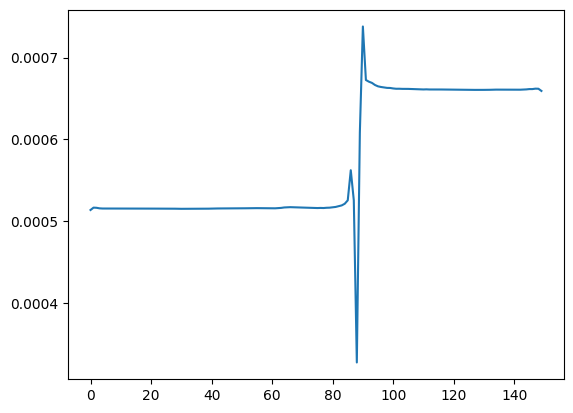

In [9]:
sp = config_dict["sim_params"]
detector_x = util.detector_x_vector(sp["detector_size"], sp["detector_pixel_size_x"])
plt.plot(wf[0])
print(wf[0])
print(detector_x)

## History

To see the interference pattern in empty space, we can record slices throughout the simulation and then plot them. `run_single_simulation` takes an optional argument `history_dz` defining the resolution with which we record the history.

Note that the history is not necessarily recorded with a constant z-spacing. Inside gratings and samples, one slice is recorded for every step. The history also records a list of z-coordinates at which the slices were recorded, which we can use for plotting.

In [ ]:
multisim.run_single_simulation(sim_path, 1, scratch_dir, save_keypoints_path=None, history_dz=0.02)

In [ ]:
# Path to the directory for the source with index 1
source_dir = multisim.get_sub_dir(sim_path, 1)

hist_x = np.load(source_dir / "history_x.npy")
hist_z = np.load(source_dir / "history_z.npy")
hist = np.load(source_dir / "history.npy")
plt.pcolormesh(
    hist_z,
    hist_x,
    hist,
    cmap="Greys_r",
    vmin=0,
    vmax=1e-6,
    shading="nearest",
)
plt.xlabel("z (m)")
plt.ylabel("x (m)")